In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
import cv2
import os

In [ ]:
!pip install keras==2.9
import tensorflow
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.9.0 which is incompatible.


In [ ]:
#!pip install tensorflow
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from collections import Counter
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from keras.wrappers.scikit_learn import KerasRegressor
#from keras.wrappers.scikit_learn  import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from keras.metrics import mean_squared_error
import keras.backend as K

def r2_metric(y_true, y_pred):
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    r2 = 1 - ss_res / (ss_tot + K.epsilon())
    return r2

In [ ]:
def CNNClassifier(num_epochs=2, layers=1, dropout=0.15):
  def create_model():
    model = Sequential()
    model.add(Reshape((128, 536, 1)))

    for i in range(layers):
      model.add(Conv2D(32, (3, 3), padding='same'))
      model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1))

    # initiate RMSprop optimizer
    opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(optimizer='rmsprop',
                      loss='mean_squared_error',
                      metrics=[r2_metric])
    return model
  return KerasClassifier(build_fn=create_model, epochs=num_epochs, batch_size=10, verbose=2)

In [ ]:
airfoil=pd.read_json("airfoil.json")

In [ ]:
airfoil["Family"].unique()

array(['NASA', 'Uncategorized', 'Ayers', 'Drela', 'Althaus', 'Midic',
       'Selig et. al.', 'Zutter', 'Boeing', 'Egglestone', 'Baron',
       'Clark', 'Pflug', 'Delft', 'Taylor', 'Yost', 'Eiffel', 'Mauk',
       'Eppler', 'Aguerre', 'Wortmann', 'Riblett 30-series',
       'Riblett 35-series', 'Riblett 37-series', 'Riblett 40-series',
       'Gulfstream', 'Gottingen', 'Horeni - Lnenka', 'Meyer', 'Habbe',
       'Horten', 'Quabeck', 'Siegmann', 'Joukowsky', 'Leinauer',
       'Lockheed', 'Marske', 'Molfino', 'Hepperle', 'Scherrer', 'Barth',
       'NACA', 'NACA/Munk', 'NACA 4-digit', 'NACA 4-digit modified',
       'NACA 5-digit', 'NACA 63-series', 'NACA 64-series',
       'NACA 65-series', 'NACA 66-series', 'NACA 67-series', 'Mathis',
       'NPL', 'Onera', 'Wick', 'RAE', 'RAF', 'Girsberger', 'Ritz',
       'Sielemann', 'Sikorsky', 'Lutz', 'Platon', 'TsAGI B', 'TsAGI',
       'USA', 'Sickinger'], dtype=object)

In [ ]:
if "Data Sources" in airfoil.columns:
  airfoil.drop(columns = ["Data Sources"], inplace = True)
if "CdCl01" in airfoil.columns:
  airfoil.drop(columns = ["CdCl01"], inplace = True)
if "CdCl04" in airfoil.columns:
  airfoil.drop(columns = ["CdCl04"], inplace = True)
if "CdCl06" in airfoil.columns:
  airfoil.drop(columns = ["CdCl06"], inplace = True)
if "Link" in airfoil.columns:
  airfoil.drop(columns = ["Link"], inplace = True)

In [ ]:
display(airfoil['Camber'])

0       0.6
1       3.2
2       3.8
3       1.4
4       1.6
       ... 
6311    1.2
6312    1.4
6313    1.4
6314    1.5
6315    1.6
Name: Camber, Length: 6316, dtype: object

In [ ]:
counter = 0
sum = 0
for i in airfoil['Camber']:
  if i != "-":
    sum = sum + float(i)
    counter =  counter + 1
airfoil['Camber'].replace(to_replace= "-", value = sum/counter, inplace = True)
airfoil['Camber'] = airfoil['Camber'].astype(dtype = "float64", copy = False)

counter = 0
sum = 0
for i in airfoil['Cl Max']:
  if i != "-":
    sum = sum + float(i)
    counter =  counter + 1
airfoil['Cl Max'].replace(to_replace= "-", value = sum/counter, inplace = True)
airfoil['Cl Max'] = airfoil['Cl Max'].astype(dtype = "float64", copy = False)

counter = 0
sum = 0
for i in airfoil['LD Max']:
  if i != "-":
    sum = sum + float(i)
    counter =  counter + 1
airfoil['LD Max'].replace(to_replace= "-", value = sum/counter, inplace = True)
airfoil['LD Max'] = airfoil['LD Max'].astype(dtype = "float64", copy = False)

In [ ]:
le = LabelEncoder()

Family_categorical_features = airfoil['Family']
le.fit(Family_categorical_features)
Family_categorical_features = le.transform(Family_categorical_features)

airfoil['Family']= Family_categorical_features

In [ ]:
airfoil.head(25)

,Name,Family,Thickness,x Thickness,Camber,Cl Max,LD Max
0,63A108 MOD C,39,7.7,30.1,0.6,1.02,64.0
1,A18,62,7.3,30.1,3.2,1.40,84.0
2,A18 (SMOOTHED),62,7.3,26.5,3.8,1.31,85.0
3,A6014-S,2,6.0,30.1,1.4,0.70,88.0
4,A6016-S,2,6.0,30.1,1.6,0.77,89.0
5,A6018-S,2,6.0,31.9,1.8,0.77,96.0
6,A6020-S,2,6.0,31.9,2.0,0.80,98.0
7,A6516-S,2,6.5,30.1,1.6,0.70,89.0
8,A6518-S,2,6.5,31.9,1.8,0.82,105.0
9,A6520-S,2,6.6,31.9,2.0,0.85,107.0


In [ ]:
X = airfoil[["Family", "Thickness", "x Thickness", "Camber", "Cl Max"]]
Y = airfoil [["LD Max"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .25, random_state = 1)


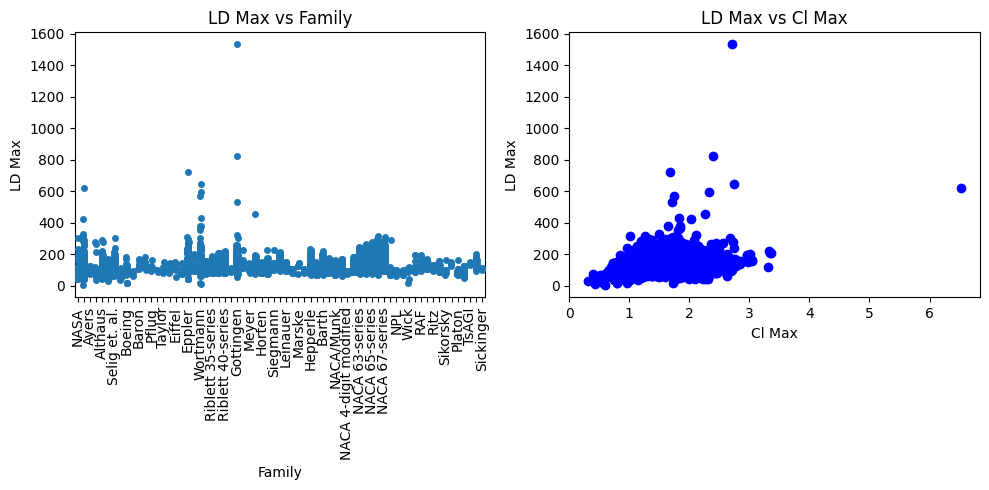

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Use Seaborn stripplot on the first subplot
g = sns.stripplot(x="Family", y="LD Max", data=airfoil, ax=axes[0])
axes[0].set_title('LD Max vs Family')
g.tick_params(axis='x', rotation=90)
for index, label in enumerate(g.get_xticklabels()):
  if index % 2 == 0:
    label.set_visible(True)
  else:
    label.set_visible(False)
# Use Matplotlib scatter plot on the second subplot
axes[1].scatter(airfoil["Cl Max"], airfoil["LD Max"], color='blue')
axes[1].set_title('LD Max vs Cl Max')
axes[1].set_xlabel('Cl Max')
axes[1].set_ylabel('LD Max')

# Adjust layout
plt.tight_layout()
plt.show()

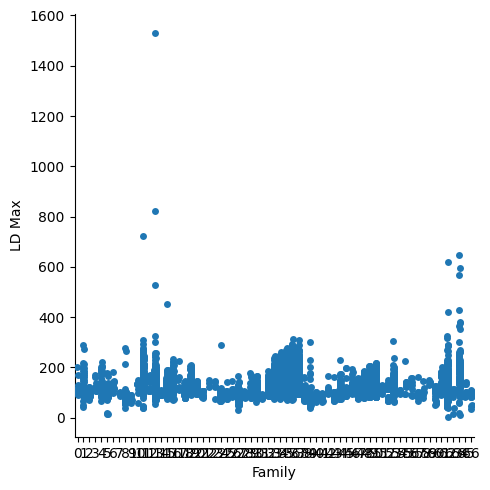

In [ ]:
sns.catplot(x="Family", y="LD Max", data=airfoil);

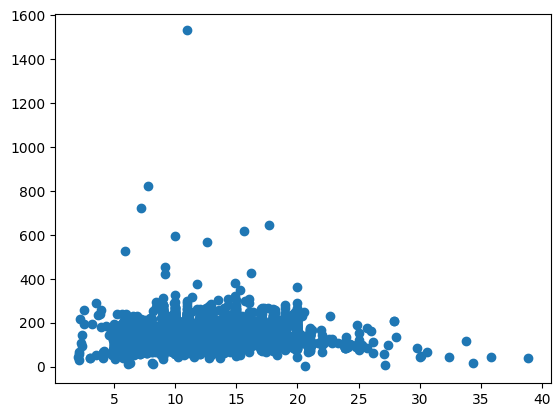

In [ ]:
plt.scatter(airfoil["Thickness"], airfoil["LD Max"])

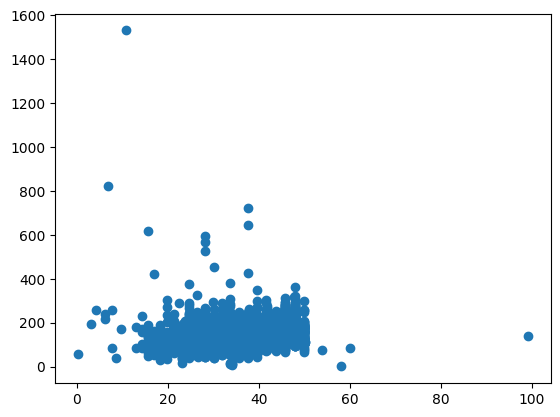

In [ ]:
plt.scatter(airfoil["x Thickness"], airfoil["LD Max"])

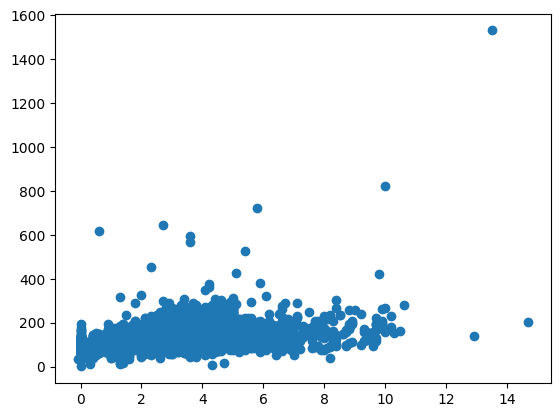

In [ ]:
plt.scatter(airfoil["Camber"], airfoil["LD Max"])

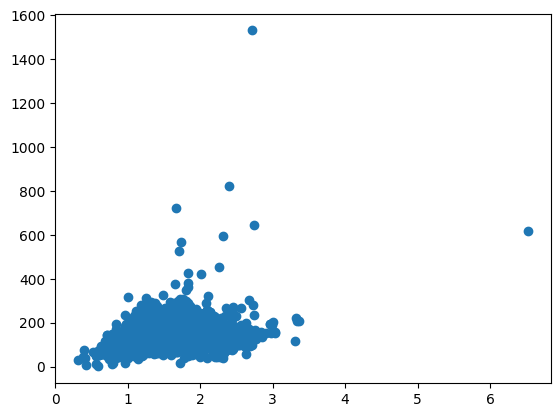

In [ ]:
plt.scatter(airfoil["Cl Max"], airfoil["LD Max"])

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  tf.Tensor(
[3348.13844958  228.22754058   21.77092432 ...  557.18644933  102.59866189
  483.68068183], shape=(1579,), dtype=float64)
mean_absolute_error :  25.331974523113693


In [ ]:
regr = MLPRegressor(random_state=1, hidden_layer_sizes = (5, 10)).fit(X_train, y_train)
predictions2 = regr.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions2))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions2))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean_squared_error :  tf.Tensor(
[ 962.82799934 1712.51524602 3535.52114338 ... 1479.32505066 2518.78828327
 4730.03680893], shape=(1579,), dtype=float64)
mean_absolute_error :  25.35021581473239


In [ ]:
import random

# Function to generate a random tuple with random elements
def generate_random_tuple():
    tuple_length = random.randint(1, 10)  # Generate a random tuple length between 1 and 5
    random_elements = [random.randint(1, 15) for _ in range(tuple_length)]  # Generate random elements
    return tuple(random_elements)

# Create a list of random tuples
random_tuple_list = [generate_random_tuple() for _ in range(100)]

print(random_tuple_list)

[(7,), (1, 11, 5, 15, 14, 14, 11, 11), (1, 11, 9, 8, 7), (13, 2, 2, 14, 10, 10), (4,), (14, 15, 14, 5, 13, 9, 4), (12, 8), (10, 7, 12, 9, 14, 11, 6, 14, 12), (10, 9, 9, 14, 9, 9, 2, 10), (6, 12, 4, 12, 13, 10, 2, 7), (11, 8, 15, 10), (14, 13), (7, 12, 1, 1, 1, 2, 10, 10, 1), (11, 14, 1, 2, 13, 1, 9, 2), (4,), (7, 13, 4, 4, 7, 13, 15, 5, 5, 6), (8, 10, 6, 3, 12), (14, 9, 13, 4, 1, 5, 9, 4), (15, 15, 15, 10, 15), (6,), (1, 12, 1, 6, 4, 6, 14), (8, 15, 4, 11), (6, 12, 13, 14), (14, 12, 13, 5, 4, 10, 7, 4, 10, 8), (5, 12, 3, 3, 6, 7, 7, 5, 1), (5,), (13, 12, 12, 8, 2, 11, 1, 12, 3), (11, 11, 12, 2, 15, 5, 15, 15, 10), (15,), (14, 12, 8), (5, 8, 13, 11, 9, 5, 2, 6, 1, 13), (10, 3, 5, 8, 6, 12, 2, 13, 1), (4, 11, 10), (2, 11, 4, 11, 5), (6, 10, 15, 4, 15), (4, 11, 12), (4, 15, 15, 14), (13, 12, 1), (7, 3, 5, 12, 14, 5, 5, 4), (7, 4, 11), (4,), (15, 14, 3, 12, 9), (12, 10, 5, 7, 9), (3, 3, 2, 13), (8, 4, 11), (10, 7, 12, 14, 3, 10, 14, 12, 8), (1, 9, 1, 14, 5, 2, 5, 6, 5, 8), (13, 9), (12, 6,

In [ ]:
%%timeit
for i in range (1000000):
  x = 0

31.9 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
w = 0
z = 0
layer1 =[]
for layer in random_tuple_list:
  regr = MLPRegressor(random_state=1, hidden_layer_sizes = layer, alpha = 0.0005).fit(X_train, y_train)
  predictions2 = regr.predict(X_test)
  if w == 0 or w > mean_squared_error(y_test, predictions2):
    w = mean_squared_error(y_test, predictions2)
    z = mean_absolute_error(y_test, predictions2)
    layer1 = layer
print (w)
print (z)
print (layer1)

NameError: ignored

In [ ]:
!unzip cropped.zip

Streaming output truncated to the last 5000 lines.
  inflating: cropped/NACA67-417 A=0.8.png  
  inflating: cropped/NACA64-419 A=0.6.png  
  inflating: cropped/NACA32107.png   
  inflating: cropped/NACA65(4)-421 A=0.5.png  
  inflating: cropped/NACA32113.png   
  inflating: cropped/NACA66(215)-216 A=0.png  
  inflating: cropped/NACA65-209 A=0.6.png  
  inflating: cropped/NACA63-614 A=0.8.png  
  inflating: cropped/HORTEN 14.00% THICK 0.00% CAMBER.png  
  inflating: cropped/NACA24017.png   
  inflating: cropped/NACA64-312.png  
  inflating: cropped/NACA67-112 A=0.2.png  
  inflating: cropped/HORTEN 15.00% THICK 5.00% CAMBER.png  
  inflating: cropped/GLENN MARTIN 3.png  
  inflating: cropped/NACA67-720 A=0.5.png  
  inflating: cropped/GOE 493.png     
  inflating: cropped/NACA63-715 A=0.5.png  
  inflating: cropped/NACA64A614.png  
  inflating: cropped/GA 40A020.png   
  inflating: cropped/NACA65A413.png  
  inflating: cropped/NACA63-311 A=0.2.png  
  inflating: cropped/AV-1.7-8.png    

In [ ]:
folder_path = '/content/cropped'
image_list = []
target_height = 128

for filename in os.listdir(folder_path):
  img = cv2.imread(os.path.join(folder_path, filename))
  if img is not None:
      # Calculate aspect ratio
      aspect_ratio = img.shape[1] / img.shape[0]  # width / height
      new_width = int(target_height * aspect_ratio)
      new_height = target_height

      # Resize image
      img_resized = cv2.resize(img, (new_width, new_height))

      # Convert image to grayscale
      img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

      image_list.append(img_gray)
image_array = np.array(image_list)
print (image_array.shape)

(6147, 128, 536)


In [ ]:
image_array = image_array.astype('float32')

# Assuming your image shape is (128, 536)
# Add channel dimension to input images
image_array = np.expand_dims(image_array, axis=-1)  # Add channel dimension

In [ ]:
# Create a dictionary to map filenames to labels
filename_to_label = dict(zip(airfoil['Name'], airfoil['LD Max']))
print (filename_to_label)

{'63A108 MOD C': 64.0, 'A18': 84.0, 'A18 (SMOOTHED)': 85.0, 'A6014-S': 88.0, 'A6016-S': 89.0, 'A6018-S': 96.0, 'A6020-S': 98.0, 'A6516-S': 89.0, 'A6518-S': 105.0, 'A6520-S': 107.0, 'A6522-S': 111.0, 'A7018-S': 102.0, 'A7020-S': 104.0, 'A7022-S': 110.0, 'A7024-S': 119.0, 'A7520-S': 105.0, 'A7522-S': 108.0, 'A7524-S': 123.0, 'A7526-S': 122.0, 'ABRIAL17': 103.0, 'AG03 (FLAT AFT BOTTOM)': 90.0, 'AG04': 86.0, 'AG08': 81.0, 'AG09': 76.0, 'AG10': 64.0, 'AG11': 85.0, 'AG12': 91.0, 'AG13': 91.0, 'AG14': 92.0, 'AG16': 94.0, 'AG17': 94.0, 'AG18': 94.0, 'AG19': 94.0, 'AG24': 103.0, 'AG25': 102.0, 'AG26': 101.0, 'AG27': 98.0, 'AG34': 89.0, 'AG34NORM': 85.0, 'AG35': 85.0, 'AG35-R': 86.0, 'AG3516': 96.0, 'AG36': 80.0, 'AG3617': 90.0, 'AG37': 72.0, 'AG3718': 84.0, 'AG38': 65.0, 'AG3819': 76.0, 'AG40D-02R': 99.0, 'AG44CT -02F': 103.0, 'AG455CT -02F ROT.': 95.0, 'AG455CT-02R': 95.0, 'AG45C -03F': 96.0, 'AG45CT -02F': 99.0, 'AG46C -03F': 90.0, 'AG46CT -02F ROT.': 91.0, 'AG47C -03F': 85.0, 'AG47CT -02F RO

In [ ]:
label_list = []
for filename in os.listdir(folder_path):
  label = filename_to_label[filename[:-4]]  # Remove '.png' extension
  label_list.append(label)
label_array = np.array(label_list)
print (label_array.shape)

(6147,)


# Forbidden Section: Do not access, data overload.

In [ ]:
for i in range (1316):
   print ("\"" + airfoil.loc[i, 'Name'] + "\": [" + str(airfoil.loc[i, 'Family'])+", " +
          str(airfoil.loc[i, 'Thickness'])+", " + str(airfoil.loc[i, 'x Thickness']) +
          ", " + str(airfoil.loc[i, 'Camber']) +", " + str(airfoil.loc[i, 'Cl Max']) + "],")

"63A108 MOD C": [39, 7.7, 30.1, 0.6, 1.02],
"A18": [62, 7.3, 30.1, 3.2, 1.4],
"A18 (SMOOTHED)": [62, 7.3, 26.5, 3.8, 1.31],
"A6014-S": [2, 6.0, 30.1, 1.4, 0.7],
"A6016-S": [2, 6.0, 30.1, 1.6, 0.77],
"A6018-S": [2, 6.0, 31.9, 1.8, 0.77],
"A6020-S": [2, 6.0, 31.9, 2.0, 0.8],
"A6516-S": [2, 6.5, 30.1, 1.6, 0.7],
"A6518-S": [2, 6.5, 31.9, 1.8, 0.82],
"A6520-S": [2, 6.6, 31.9, 2.0, 0.85],
"A6522-S": [2, 6.5, 31.9, 2.1, 0.86],
"A7018-S": [2, 7.0, 30.1, 1.8, 0.87],
"A7020-S": [2, 7.0, 31.9, 1.9, 0.92],
"A7022-S": [2, 7.0, 31.9, 2.2, 0.88],
"A7024-S": [2, 7.0, 31.9, 2.4, 0.93],
"A7520-S": [2, 7.5, 30.1, 2.0, 0.93],
"A7522-S": [2, 7.5, 31.9, 2.2, 0.92],
"A7524-S": [2, 7.6, 31.9, 2.3, 1.03],
"A7526-S": [2, 7.5, 31.9, 2.6, 1.03],
"ABRIAL17": [62, 10.0, 24.8, 3.2, 1.11],
"AG03 (FLAT AFT BOTTOM)": [8, 6.2, 24.7, 2.0, 1.01],
"AG04": [8, 6.4, 21.4, 1.7, 0.96],
"AG08": [8, 5.8, 21.4, 1.8, 0.95],
"AG09": [8, 4.9, 18.4, 1.8, 0.92],
"AG10": [8, 4.7, 15.6, 1.6, 0.95],
"AG11": [8, 5.8, 26.5, 2.2, 1.14],
"A

In [ ]:
filename_to_geodat2 = {
"63A108 MOD C": [39, 7.7, 30.1, 0.6, 1.02],
"A18": [62, 7.3, 30.1, 3.2, 1.4],
"A18 (SMOOTHED)": [62, 7.3, 26.5, 3.8, 1.31],
"A6014-S": [2, 6.0, 30.1, 1.4, 0.7],
"A6016-S": [2, 6.0, 30.1, 1.6, 0.77],
"A6018-S": [2, 6.0, 31.9, 1.8, 0.77],
"A6020-S": [2, 6.0, 31.9, 2.0, 0.8],
"A6516-S": [2, 6.5, 30.1, 1.6, 0.7],
"A6518-S": [2, 6.5, 31.9, 1.8, 0.82],
"A6520-S": [2, 6.6, 31.9, 2.0, 0.85],
"A6522-S": [2, 6.5, 31.9, 2.1, 0.86],
"A7018-S": [2, 7.0, 30.1, 1.8, 0.87],
"A7020-S": [2, 7.0, 31.9, 1.9, 0.92],
"A7022-S": [2, 7.0, 31.9, 2.2, 0.88],
"A7024-S": [2, 7.0, 31.9, 2.4, 0.93],
"A7520-S": [2, 7.5, 30.1, 2.0, 0.93],
"A7522-S": [2, 7.5, 31.9, 2.2, 0.92],
"A7524-S": [2, 7.6, 31.9, 2.3, 1.03],
"A7526-S": [2, 7.5, 31.9, 2.6, 1.03],
"ABRIAL17": [62, 10.0, 24.8, 3.2, 1.11],
"AG03 (FLAT AFT BOTTOM)": [8, 6.2, 24.7, 2.0, 1.01],
"AG04": [8, 6.4, 21.4, 1.7, 0.96],
"AG08": [8, 5.8, 21.4, 1.8, 0.95],
"AG09": [8, 4.9, 18.4, 1.8, 0.92],
"AG10": [8, 4.7, 15.6, 1.6, 0.95],
"AG11": [8, 5.8, 26.5, 2.2, 1.14],
"AG12": [8, 6.2, 21.4, 1.8, 0.97],
"AG13": [8, 5.8, 21.4, 2.0, 0.97],
"AG14": [8, 5.4, 19.9, 2.1, 0.97],
"AG16": [8, 7.1, 23.1, 1.9, 0.99],
"AG17": [8, 6.5, 21.4, 2.0, 0.99],
"AG18": [8, 5.9, 21.4, 2.2, 0.99],
"AG19": [8, 5.4, 19.9, 2.3, 0.99],
"AG24": [8, 8.4, 26.5, 2.2, 1.11],
"AG25": [8, 7.6, 24.7, 2.4, 1.09],
"AG26": [8, 6.8, 23.1, 2.6, 1.09],
"AG27": [8, 6.1, 21.4, 2.7, 1.09],
"AG34": [8, 9.3, 28.3, 1.6, 1.27],
"AG34NORM": [8, 9.3, 28.2, 2.2, 1.09],
"AG35": [8, 8.7, 28.3, 1.5, 1.2],
"AG35-R": [8, 8.7, 28.2, 2.4, 1.2],
"AG3516": [8, 8.5, 24.7, 2.6, 1.23],
"AG36": [8, 8.2, 26.5, 1.5, 1.14],
"AG3617": [8, 7.9, 24.7, 2.6, 1.17],
"AG37": [8, 7.7, 26.5, 1.6, 1.19],
"AG3718": [8, 7.2, 23.1, 2.7, 1.23],
"AG38": [8, 7.0, 28.3, 1.6, 1.17],
"AG3819": [8, 6.3, 21.5, 2.8, 1.22],
"AG40D-02R": [8, 8.0, 26.5, 2.1, 1.08],
"AG44CT -02F": [8, 7.3, 24.7, 2.0, 1.09],
"AG455CT -02F ROT.": [8, 6.5, 23.1, 1.9, 1.04],
"AG455CT-02R": [8, 6.5, 23.1, 1.9, 1.04],
"AG45C -03F": [8, 6.9, 23.1, 2.6, 1.08],
"AG45CT -02F": [8, 6.9, 23.1, 1.9, 1.05],
"AG46C -03F": [8, 6.0, 23.1, 2.3, 1.0],
"AG46CT -02F ROT.": [8, 6.1, 23.1, 1.7, 1.0],
"AG47C -03F": [8, 5.1, 23.1, 2.0, 0.92],
"AG47CT -02F ROT.": [8, 5.0, 21.4, 1.3, 0.92],
"AH 63-K-127/24": [1, 12.7, 39.7, 3.8, 1.38],
"AH 79-100 A": [1, 10.0, 28.2, 3.6, 1.41],
"AH 79-100 B": [1, 10.0, 31.9, 6.4, 1.8],
"AH 79-100 C": [1, 9.9, 31.9, 6.7, 1.83],
"AH 79-K-132/20": [1, 13.2, 39.7, 3.7, 1.31],
"AH 79-K-135/20 B": [1, 13.5, 39.7, 3.1, 1.32],
"AH 79-K-143/18": [1, 14.3, 41.7, 2.9, 1.37],
"AH 80-129": [1, 12.9, 41.7, 4.1, 1.16],
"AH 80-136": [1, 13.6, 35.8, 3.4, 1.22],
"AH 80-140": [1, 14.0, 30.1, 4.4, 1.67],
"AH 81-131": [1, 13.1, 41.7, 2.8, 1.02],
"AH 81-K-144 W-F KLAPPE": [1, 22.0, 17.0, 1.1, 1.82],
"AH 81-K-144/17": [1, 14.5, 39.7, 4.2, 1.46],
"AH 82-150 A": [1, 15.0, 41.7, 3.3, 1.44],
"AH 82-150 F": [1, 15.0, 43.8, 3.6, 1.35],
"AH 83-150 Q": [1, 15.0, 39.7, 4.1, 1.66],
"AH 83-159": [1, 16.0, 41.7, 3.8, 1.49],
"AH 85-L-120/17": [1, 12.1, 43.8, 0.0, 0.86],
"AH 88-K-130/20": [1, 13.0, 43.8, 3.9, 1.41],
"AH 88-K-136/16": [1, 13.6, 43.8, 3.0, 1.24],
"AH 93-156": [1, 15.7, 39.7, 3.8, 1.55],
"AH 93-157": [1, 15.7, 39.7, 3.6, 1.59],
"AH 93-K-130/15": [1, 13.1, 41.7, 3.6, 1.27],
"AH 93-K-131/15": [1, 13.1, 41.7, 3.6, 1.28],
"AH 93-K-132/15": [1, 13.2, 41.7, 3.5, 1.28],
"AH 93-W-145": [1, 14.5, 33.8, 3.9, 1.62],
"AH 93-W-174": [1, 17.4, 33.8, 3.9, 1.79],
"AH 93-W-215": [1, 21.2, 33.8, 3.1, 2.05],
"AH 93-W-257": [1, 25.7, 32.0, 1.8, 1.96],
"AH 93-W-300": [1, 30.0, 28.3, 1.1, 2.0],
"AH 94-145": [1, 14.6, 37.7, 5.5, 1.88],
"AH 94-156": [1, 15.6, 39.7, 3.8, 1.52],
"AH 94-W-301": [1, 30.1, 30.2, 1.1, 1.84],
"AH 95-160": [1, 16.0, 37.7, 5.5, 1.97],
"AH-6-40-7": [1, 6.9, 19.9, 5.5, 1.7],
"AH-7-47-6": [1, 5.9, 23.1, 6.2, 1.8],
"AH21 7% VERSION": [62, 9.0, 35.8, 2.3, 1.32],
"AH21 9% VERSION": [62, 7.0, 35.8, 1.8, 1.07],
"AIR 100-2 ACRO MM 576 1999": [62, 10.0, 30.1, 1.4, 1.16],
"AMES A-01": [39, 10.3, 31.9, 1.4, 1.25],
"AMES A-02": [39, 7.7, 30.1, 0.6, 1.02],
"AMES A-03": [39, 10.0, 37.7, 1.2, 1.16],
"AMI 43": [27, 8.2, 24.7, 3.7, 1.33],
"AMSOIL1 RUTAN CANARD": [62, 11.6, 39.7, 2.1, 1.49],
"AMSOIL2 RUTAN WING": [62, 11.8, 39.7, 1.0, 1.34],
"APEX 16": [62, 12.9, 37.7, 2.7, 1.49],
"AQUILA 9.3% SMOOTHED": [62, 9.4, 30.1, 4.0, 1.46],
"ARA-D 10%": [62, 10.0, 24.8, 4.0, 1.83],
"ARA-D 13%": [62, 13.0, 24.8, 3.6, 1.93],
"ARA-D 20%": [62, 20.0, 26.6, 3.8, 2.23],
"ARA-D 6%": [62, 6.0, 19.9, 5.0, 1.56],
"AS5045 (15%)": [53, 15.0, 37.7, 1.0, 1.42],
"AS5046 (16%)": [53, 16.0, 37.7, 1.0, 1.52],
"AS5048 (18%)": [53, 18.0, 39.7, 1.0, 1.66],
"ATR72SM": [62, 14.5, 24.7, 2.9, 1.74],
"AUGUST 160": [62, 16.0, 24.7, 5.4, 1.9],
"AV-1.7-8": [62, 7.9, 24.7, 1.7, 1.03],
"AVISTAR": [62, 14.5, 33.8, 2.3, 1.42],
"AVX-NITRO": [62, 7.4, 23.1, 2.6, 1.26],
"AVX-PLANEUR": [62, 7.9, 26.5, 2.7, 1.21],
"AZ2002MID": [66, 9.0, 24.8, 1.6, 1.04],
"AZ2002ROOT": [66, 9.0, 24.8, 1.6, 0.99],
"AZ2002TIP": [66, 9.0, 23.1, 1.6, 1.15],
"AZ2003MID": [66, 8.5, 24.7, 1.5, 0.99],
"AZ2003ROOT": [66, 8.5, 24.7, 1.7, 0.98],
"AZ2003TIP": [66, 8.0, 21.4, 1.3, 0.99],
"AZ2004_9": [66, 9.0, 24.7, 1.4, 0.98],
"AZ2005MID": [66, 8.5, 24.7, 1.4, 0.95],
"AZ2005ROOT": [66, 8.0, 24.7, 1.7, 0.91],
"AZ2005TIP": [66, 8.8, 24.7, 1.3, 0.96],
"AZ2007_8_1.2_TIP": [66, 8.0, 26.5, 1.2, 0.98],
"AZ2007_8_1.3_MID": [66, 8.0, 26.5, 1.3, 0.98],
"AZ2007_8_1.4_ROOT": [66, 8.0, 26.5, 1.4, 0.99],
"AZCOMBAT1": [66, 10.0, 26.5, 1.8, 1.05],
"B-29 ROOT": [5, 22.0, 31.9, 1.8, 1.92],
"B-29 TIP": [5, 9.0, 31.9, 2.2, 1.11],
"BAMBINO 6": [62, 12.0, 37.7, 3.0, 1.1],
"BC30": [62, 6.3, 21.5, 2.7, 1.19],
"BC50": [62, 7.2, 23.1, 2.6, 1.22],
"BC70": [62, 7.9, 24.7, 2.5, 1.15],
"BE50 (ORIGINAL)": [62, 7.3, 23.1, 3.5, 1.44],
"BE50 (SMOOTHED)": [62, 7.3, 21.5, 4.0, 1.36],
"BE5030FVNC2": [9, 5.0, 18.4, 2.9, 0.8],
"BE5045FVNC2": [9, 5.0, 18.4, 4.4, 1.0],
"BE5655FVNC2": [9, 5.6, 18.4, 5.4, 1.17],
"BE6568  6.5% T/C 7.5% CAMBER SUITABLE FOR F1A TOWLINE GLIDER CATEGORY": [9, 6.5, 17.0, 6.5, 1.77],
"BE6699 (6.6% MAX T/C 9.9% MAX CAMBER) CLMAX 2.1 AT RE 100000 TRANSITION FREE": [9, 6.6, 17.0, 9.6, 2.2],
"BELL 540 (MODIFIED NACA 0012)": [62, 9.7, 23.1, 0.0, 1.07],
"BERGEY BW-3 (SMOOTHED)": [62, 5.0, 7.8, 5.6, 1.52],
"BOEING 103": [5, 12.7, 31.9, 3.6, 1.84],
"BOEING 106": [5, 13.1, 31.9, 3.3, 1.7],
"BOEING 707 .08 SPAN": [5, 11.4, 24.7, 0.2, 1.02],
"BOEING 707 .19 SPAN": [5, 12.2, 31.9, 0.7, 1.12],
"BOEING 707 .40 SPAN": [5, 9.7, 33.8, 1.9, 1.15],
"BOEING 707 .54 SPAN": [5, 9.0, 41.7, 1.7, 1.08],
"BOEING 707 .99 SPAN": [5, 9.0, 41.7, 1.8, 1.01],
"BOEING 737 MIDSPAN": [5, 10.0, 37.7, 1.4, 1.07],
"BOEING 737 MIDSPAN": [5, 12.6, 28.2, 0.7, 1.49],
"BOEING 737 OUTBOARD": [5, 10.8, 39.7, 1.6, 1.19],
"BOEING 737 ROOT": [5, 15.4, 19.9, 0.2, 1.56],
"BOEING BACXXX": [5, 11.3, 35.8, 1.4, 1.25],
"BOEING J": [5, 10.1, 39.7, 1.7, 1.17],
"BOEING VERTOL V(1.95)3009-1.25": [5, 9.0, 30.1, 1.3, 1.32],
"BOEING VERTOL V13006-.7": [5, 6.0, 30.1, 0.9, 0.9],
"BOEING VERTOL V43012-1.58": [5, 12.0, 30.1, 3.7, 1.66],
"BOEING VERTOL V43015-2.48": [5, 15.0, 30.1, 3.7, 1.8],
"BOEING-VERTOL V23010-1.58": [5, 10.2, 28.2, 1.8, 1.37],
"BOEING-VERTOL VR-1": [5, 11.0, 35.8, 1.5, 1.29],
"BOEING-VERTOL VR-11X": [5, 11.0, 37.7, 2.4, 1.45],
"BOEING-VERTOL VR-12": [5, 10.6, 33.8, 2.3, 1.35],
"BOEING-VERTOL VR-13": [5, 9.4, 33.8, 2.0, 1.24],
"BOEING-VERTOL VR-14": [5, 8.0, 33.8, 1.7, 1.09],
"BOEING-VERTOL VR-15": [5, 8.0, 35.8, 1.3, 1.06],
"BOEING-VERTOL VR-5": [5, 12.0, 35.8, 3.4, 1.41],
"BOEING-VERTOL VR-7": [5, 12.0, 33.8, 3.1, 1.48],
"BOEING-VERTOL VR-7 WITH TAB": [5, 12.0, 33.8, 3.1, 1.44],
"BOEING-VERTOL VR-8": [5, 8.1, 33.8, 1.3, 0.8],
"BOEING-VERTOL VR-8 WITH TAB": [5, 8.2, 34.2, 1.3, 0.79],
"BOEING-VERTOL VR-9": [5, 6.1, 33.8, 0.3, 0.56],
"BORGE-B3": [62, 11.7, 30.1, 1.8, 1.3],
"CAL1215J": [62, 11.7, 30.1, 2.2, 1.28],
"CAL2263M": [62, 11.7, 31.9, 3.6, 1.56],
"CAL4014L": [62, 10.0, 26.5, 2.0, 1.49],
"CAP 21": [62, 15.6, 15.6, 0.6, 6.53],
"CAST 10-2/DOA 2": [62, 12.2, 43.8, 1.5, 1.35],
"CB2012": [3, 12.0, 30.1, 2.0, 1.32],
"CB2195": [3, 9.5, 33.8, 2.1, 1.35],
"CB2195-25D": [3, 9.5, 24.7, 2.0, 1.26],
"CB2513": [3, 13.0, 30.1, 2.5, 1.46],
"CB2514": [3, 14.0, 30.1, 2.5, 1.53],
"CB2515": [3, 15.0, 30.1, 2.5, 1.61],
"CB3013": [3, 13.0, 30.1, 3.0, 1.51],
"CB3512": [3, 12.0, 30.1, 3.5, 1.49],
"CH10 (SMOOTHED)": [62, 12.8, 31.9, 10.2, 2.34],
"CHEN": [62, 12.5, 26.5, 7.8, 1.81],
"CJ3209": [62, 9.4, 26.5, 2.0, 0.94],
"CLARK K": [6, 11.7, 30.1, 3.3, 1.7],
"CLARK V": [6, 11.7, 33.8, 3.4, 1.66],
"CLARK W": [6, 11.3, 26.5, 3.8, 1.69],
"CLARK X": [6, 11.7, 30.1, 3.3, 1.58],
"CLARK Y": [6, 11.7, 28.2, 3.4, 1.52],
"CLARK YH": [6, 11.9, 30.1, 1.9, 1.46],
"CLARK YM-15": [6, 15.0, 30.1, 3.6, 1.93],
"CLARK YM-18": [6, 18.0, 30.1, 3.6, 2.17],
"CLARK YS": [6, 11.7, 30.1, 2.3, 1.34],
"CLARK Z": [6, 11.7, 30.1, 4.1, 1.82],
"CLARK-Y 11.7% SMOOTHED": [6, 11.7, 30.1, 3.5, 1.62],
"COANDA 1": [62, 5.7, 31.9, 2.8, 1.11],
"COANDA 2": [62, 6.0, 26.5, 2.6, 1.13],
"COANDA 3": [62, 7.0, 35.8, 2.5, 1.2],
"CODY ROBERTSON CR 001 R/C HAND-LAUNCH LOW REYNOLDS NUMBER AIRFOIL (SMOOTHED)": [62, 7.3, 26.5, 4.1, 1.38],
"CRISTAL_CB85_15_7": [62, 15.7, 39.7, 3.5, 1.55],
"CURTIS C-72": [62, 11.7, 28.3, 2.4, 1.72],
"CURTIS CR-1": [62, 12.2, 24.7, 4.7, 1.72],
"CYRANO II P-30": [62, 7.1, 33.8, 2.1, 0.94],
"D.G.A. 1138": [62, 6.9, 35.8, 2.1, 1.2],
"D6213-S": [2, 6.2, 26.5, 1.3, 0.91],
"D6214-S": [2, 6.2, 26.5, 1.4, 0.91],
"D6515-S": [2, 6.6, 26.5, 1.5, 0.84],
"D6516-S": [2, 6.5, 26.5, 1.6, 0.94],
"D7016-S": [2, 7.1, 26.5, 1.6, 0.97],
"D7017-S": [2, 7.1, 28.2, 1.7, 0.89],
"D7517-S": [2, 7.5, 26.5, 1.7, 1.04],
"D7518-S": [2, 7.6, 26.5, 1.8, 1.05],
"D8018-S": [2, 8.0, 26.5, 1.8, 0.95],
"D8019-S": [2, 8.0, 26.5, 1.9, 1.05],
"DA5206": [2, 5.2, 23.1, 0.6, 0.64],
"DA5512": [2, 5.5, 23.1, 1.2, 0.72],
"DA6016": [2, 6.0, 23.1, 1.6, 0.91],
"DA6515": [2, 6.5, 23.1, 1.5, 0.93],
"DA7017": [2, 7.0, 23.1, 1.7, 1.13],
"DA7520": [2, 7.5, 23.1, 2.0, 1.04],
"DA8000": [2, 8.0, 26.5, 0.0, 0.81],
"DA8015": [2, 8.0, 23.1, 1.5, 1.07],
"DA8024": [2, 8.0, 23.1, 2.4, 1.16],
"DA8523": [2, 8.5, 23.1, 2.3, 1.21],
"DA9021": [2, 9.0, 21.4, 2.1, 1.15],
"DAE-11": [8, 12.8, 33.8, 6.6, 1.86],
"DAE-21": [8, 11.8, 31.9, 6.6, 1.95],
"DAE-31": [8, 11.1, 30.1, 6.8, 1.96],
"DAE-51": [8, 9.4, 30.1, 4.0, 1.48],
"DALE HOUSE DH4009 (SMOOTHED) USED ON THE STORM R/C AEROBATIC AIRCRAFT": [62, 8.9, 43.8, 0.2, 0.77],
"DAVIS": [62, 11.2, 30.1, 3.7, 1.58],
"DAVIS (SMOOTHED)": [62, 5.9, 30.1, 5.9, 1.5],
"DAVIS BASIC B-24 WING": [62, 15.9, 30.1, 2.5, 1.54],
"DAYTON-WRIGHT 6": [62, 13.6, 28.3, 4.1, 1.87],
"DAYTON-WRIGHT T-1": [62, 13.5, 26.5, 3.1, 1.87],
"DD928416": [62, 8.4, 30.1, 1.6, 1.02],
"DEES OKAY230": [62, 17.1, 37.7, 3.9, 1.86],
"DEFIANT CANARD BL110": [62, 14.7, 30.1, 3.8, 1.54],
"DEFIANT CANARD BL145": [62, 11.5, 28.2, 2.4, 1.55],
"DEFIANT CANARD BL20": [62, 20.9, 28.2, 4.5, 2.17],
"DF101": [62, 11.0, 28.2, 2.3, 1.29],
"DF102": [62, 11.0, 28.2, 2.4, 1.38],
"DF103": [62, 11.2, 28.2, 2.2, 1.22],
"DFVLR R-4": [62, 13.4, 37.7, 2.1, 1.47],
"DORMOY": [62, 9.0, 30.1, 2.1, 1.24],
"DORNIER A-5": [62, 16.2, 41.7, 2.6, 1.89],
"DOUGLAS LA203A": [62, 15.7, 35.8, 5.5, 2.12],
"DP1.68/8.37_DS": [42, 8.4, 37.7, 1.7, 0.85],
"DP1.72/8.16_DS": [42, 8.2, 37.7, 1.7, 0.85],
"DP1.72/8.32_DS": [42, 8.3, 35.8, 1.7, 0.94],
"DP1.77/8.23_DS": [42, 8.2, 37.7, 1.8, 0.84],
"DP1.79/8.37_DS": [42, 8.4, 37.7, 1.8, 0.92],
"DP1.82/8.21_DS": [42, 8.2, 39.7, 1.8, 0.83],
"DP1.87/9.07_DS": [42, 9.1, 39.7, 1.9, 0.82],
"DP1.89/7.83": [42, 7.8, 24.7, 1.9, 1.12],
"DP2.00/8.55_DS": [42, 8.6, 39.7, 2.0, 0.71],
"DP2.05/8.65_DS": [42, 8.7, 39.7, 2.0, 0.89],
"DP2.06/8.67_DS": [42, 8.7, 39.7, 2.1, 0.78],
"DP2.47/9.48_DS": [42, 9.5, 39.7, 2.5, 0.88],
"DRAGONFLY CANARD": [62, 19.3, 37.7, 6.6, 1.91],
"DS19": [62, 8.5, 28.2, 1.9, 1.19],
"DS21": [62, 8.6, 28.2, 1.8, 1.16],
"DSMA-523A": [62, 11.0, 35.8, 2.3, 1.42],
"DSMA-523B": [62, 11.0, 35.8, 2.0, 1.46],
"DU 86-084/18": [7, 8.5, 35.8, 1.2, 0.91],
"DU 86-137/25": [7, 13.7, 39.7, 0.2, 1.09],
"DU06-W-200_VAWT": [7, 19.8, 30.1, 0.5, 1.58],
"E. BAMBINO 7": [62, 6.0, 39.7, 2.5, 0.99],
"EDGE_ROOT": [58, 6.4, 21.4, 1.9, 1.03],
"EDGE_TIP": [58, 4.9, 15.6, 1.2, 0.97],
"EH 0.0/9.0": [65, 9.0, 30.1, 0.0, 0.81],
"EH 1.0/7.0": [65, 7.0, 30.1, 1.0, 0.74],
"EH 1.0/9.0": [65, 9.0, 30.1, 1.0, 0.91],
"EH 1.5/9.0": [65, 9.0, 30.1, 1.5, 0.95],
"EH 2.0/10": [65, 10.1, 30.1, 2.0, 1.05],
"EH 2.0/12": [65, 12.0, 30.1, 2.0, 1.2],
"EH 2.0/7.0": [65, 7.0, 30.1, 2.0, 0.83],
"EH 2.5/10": [65, 10.0, 30.1, 2.5, 0.83],
"EH 3.0/12": [65, 12.0, 30.1, 2.9, 0.97],
"EIFFEL 10 (WRIGHT) - 1903 WRIGHT FLYER AIRFOIL": [10, 5.1, 0.2, 3.5, 0.85],
"EIFFEL 13 (BLERIOT 11)": [10, 5.2, 99.3, 12.9, 1.5],
"EIFFEL 33": [10, 6.8, 19.9, 5.5, 1.41],
"EIFFEL 36": [10, 7.4, 30.1, 5.3, 1.67],
"EIFFEL 371 (MONGE)": [10, 14.4, 31.9, 3.3, 1.76],
"EIFFEL 385 (S.T. AE)": [10, 13.5, 23.1, 2.3, 1.9],
"EIFFEL 400": [10, 14.5, 28.2, 3.3, 1.69],
"EIFFEL 428 (BLERIOT)": [10, 9.0, 31.9, 3.6, 1.43],
"EIFFEL 430 (LACHASSGNE)": [10, 9.7, 15.6, 3.6, 1.77],
"ELINA": [62, 9.5, 30.1, 3.0, 1.15],
"EM 925 20103 181 N": [25, 10.7, 28.2, 1.9, 1.39],
"EM CY 1016 1510": [25, 10.0, 31.9, 1.5, 1.14],
"EM CY 1016 2012": [25, 12.0, 31.9, 2.0, 1.37],
"EM CY 1016 20145": [25, 14.5, 31.9, 2.0, 1.55],
"EM CY 1021 18104": [25, 10.4, 31.9, 1.8, 1.24],
"EM CY 1021 2010 X5 FERTIG": [25, 10.0, 31.9, 2.0, 1.22],
"EM CY 1024 2010": [25, 9.8, 30.1, 2.2, 1.23],
"EM CY 1025 20098": [25, 9.8, 31.9, 2.0, 1.19],
"EM J18 1 3015": [25, 15.0, 31.9, 3.1, 1.67],
"EM J18 2010": [25, 10.0, 30.1, 2.0, 1.21],
"EM J18 2010 26 51": [25, 10.0, 26.5, 2.0, 1.3],
"EM J18 2010 27 48": [25, 10.0, 26.5, 2.0, 1.27],
"EM J18 2310": [25, 10.0, 30.1, 2.3, 1.25],
"EM J18 2510 26 51": [25, 10.0, 26.5, 2.5, 1.37],
"EM J18 2515 DRW R0,8": [25, 15.0, 31.9, 2.5, 1.54],
"EM J18 2610 27 48": [25, 10.0, 26.5, 2.6, 1.34],
"EM J18 3010 26 51": [25, 10.0, 26.5, 3.0, 1.45],
"EM J18 3012 DRW R1,2": [25, 12.0, 31.9, 3.1, 1.5],
"EM J18 3013": [25, 13.0, 30.1, 3.0, 1.58],
"EM J18 3015 DRW R0,8": [25, 15.0, 31.9, 3.0, 1.62],
"EM J18 3212": [25, 12.0, 30.1, 3.2, 1.53],
"EM J18 3510 26 51": [25, 10.0, 26.5, 3.5, 1.52],
"EM J19 3010": [25, 10.0, 30.1, 3.0, 1.39],
"EM J20 2510": [25, 10.0, 28.2, 2.4, 1.33],
"EM J8 2010 DRW": [25, 10.0, 31.9, 2.0, 1.21],
"EM J8 2510 DRW": [25, 10.0, 31.9, 2.5, 1.28],
"EM J8 3010 DRW": [25, 10.0, 31.9, 3.0, 1.34],
"EM L3 2510": [25, 9.9, 26.5, 2.5, 1.35],
"EM L3 3012": [25, 12.0, 26.5, 3.0, 1.61],
"EM L5 2010": [25, 10.0, 30.1, 2.1, 1.22],
"EM S104 20107": [25, 10.7, 30.1, 2.0, 1.26],
"EM S14 2511": [25, 11.0, 33.8, 2.5, 1.32],
"EM S5 1811 121": [25, 11.1, 31.9, 1.9, 1.24],
"EMX-07": [62, 9.9, 28.3, 2.5, 1.11],
"EPPLER 1098": [11, 19.0, 37.7, 3.7, 1.67],
"EPPLER 1200": [11, 17.0, 37.7, 3.4, 1.86],
"EPPLER 1210": [11, 15.9, 21.4, 5.2, 2.17],
"EPPLER 1211": [11, 18.0, 21.4, 4.4, 2.2],
"EPPLER 1212": [11, 17.7, 21.4, 3.2, 1.99],
"EPPLER 1212MOD": [11, 17.7, 21.5, 2.6, 1.94],
"EPPLER 1213": [11, 17.4, 21.4, 2.1, 1.8],
"EPPLER 1214": [11, 19.8, 24.7, 2.1, 1.93],
"EPPLER 1230": [11, 17.5, 30.1, 3.6, 1.91],
"EPPLER 1233": [11, 18.9, 30.1, 4.4, 2.13],
"EPPLER 168": [11, 12.4, 26.5, 0.0, 1.1],
"EPPLER 169": [11, 14.4, 26.5, 0.0, 1.2],
"EPPLER 171": [11, 12.3, 33.8, 0.0, 0.97],
"EPPLER 174": [11, 8.9, 31.9, 3.6, 1.29],
"EPPLER 176": [11, 8.8, 31.9, 3.2, 1.16],
"EPPLER 178": [11, 8.7, 31.9, 2.8, 1.08],
"EPPLER 180": [11, 8.6, 31.9, 2.4, 1.05],
"EPPLER 182": [11, 8.5, 31.9, 1.5, 0.91],
"EPPLER 184": [11, 8.3, 31.9, 1.1, 0.8],
"EPPLER 186": [11, 10.3, 30.1, 1.2, 0.88],
"EPPLER 193": [11, 10.2, 31.9, 3.4, 1.31],
"EPPLER 193MOD": [11, 11.9, 31.9, 4.1, 1.49],
"EPPLER 195": [11, 11.8, 31.9, 3.1, 1.32],
"EPPLER 197": [11, 13.5, 33.8, 2.8, 1.35],
"EPPLER 201": [11, 11.9, 31.9, 3.0, 1.34],
"EPPLER 203": [11, 13.6, 31.9, 2.6, 1.38],
"EPPLER 205": [11, 10.5, 30.1, 3.0, 1.25],
"EPPLER 207": [11, 12.0, 31.9, 2.5, 1.29],
"EPPLER 209": [11, 13.7, 31.9, 2.1, 1.36],
"EPPLER 210": [11, 13.6, 31.9, 4.2, 1.7],
"EPPLER 211": [11, 11.0, 33.8, 2.4, 1.31],
"EPPLER 212": [11, 10.6, 28.2, 2.7, 1.38],
"EPPLER 214": [11, 11.1, 31.9, 4.1, 1.56],
"EPPLER 216": [11, 10.4, 28.2, 4.9, 1.74],
"EPPLER 220": [11, 11.5, 35.8, 2.6, 1.18],
"EPPLER 221": [11, 9.4, 28.2, 2.1, 1.09],
"EPPLER 222": [11, 10.2, 30.1, 2.4, 1.27],
"EPPLER 224": [11, 10.2, 30.1, 1.9, 1.21],
"EPPLER 226": [11, 10.2, 30.0, 0.7, 1.03],
"EPPLER 228": [11, 10.1, 30.1, 0.3, 0.91],
"EPPLER 230": [11, 10.0, 30.0, 0.2, 0.8],
"EPPLER 231": [11, 12.3, 39.7, 2.5, 1.22],
"EPPLER 266": [11, 17.3, 39.7, 3.0, 1.51],
"EPPLER 297": [11, 11.4, 37.7, 0.0, 0.79],
"EPPLER 325": [11, 12.6, 31.9, 1.8, 1.1],
"EPPLER 326": [11, 12.9, 31.9, 2.1, 1.21],
"EPPLER 327": [11, 13.1, 31.9, 2.6, 1.33],
"EPPLER 328": [11, 13.3, 31.9, 3.0, 1.44],
"EPPLER 329": [11, 13.5, 31.9, 3.5, 1.54],
"EPPLER 330": [11, 11.0, 30.1, 2.1, 1.06],
"EPPLER 331": [11, 11.3, 30.1, 2.7, 1.18],
"EPPLER 332": [11, 11.5, 30.1, 3.1, 1.3],
"EPPLER 333": [11, 11.8, 30.1, 3.5, 1.42],
"EPPLER 334": [11, 11.9, 30.1, 4.0, 1.53],
"EPPLER 335": [11, 12.6, 30.1, 2.3, 1.17],
"EPPLER 336": [11, 12.8, 30.1, 2.8, 1.29],
"EPPLER 337": [11, 13.1, 30.1, 3.2, 1.4],
"EPPLER 338": [11, 13.3, 30.1, 3.7, 1.52],
"EPPLER 339": [11, 13.6, 30.1, 4.0, 1.61],
"EPPLER 340": [11, 13.7, 30.1, 2.6, 2.1],
"EPPLER 341": [11, 14.0, 30.1, 3.0, 1.4],
"EPPLER 342": [11, 14.3, 30.1, 3.5, 1.51],
"EPPLER 343": [11, 14.5, 30.1, 4.0, 1.6],
"EPPLER 344": [11, 14.7, 30.1, 4.3, 1.73],
"EPPLER 360": [11, 12.2, 35.8, 1.6, 1.36],
"EPPLER 361": [11, 12.1, 35.8, 1.7, 1.35],
"EPPLER 374": [11, 10.9, 35.8, 2.4, 1.17],
"EPPLER 376": [11, 2.5, 4.2, 9.0, 2.1],
"EPPLER 377": [11, 3.9, 7.8, 8.8, 1.66],
"EPPLER 377MOD": [11, 3.8, 6.2, 9.2, 1.59],
"EPPLER 378": [11, 4.1, 8.7, 8.2, 1.78],
"EPPLER 379": [11, 2.2, 6.2, 8.1, 2.44],
"EPPLER 385": [11, 8.4, 30.0, 5.6, 1.59],
"EPPLER 387": [11, 9.1, 31.9, 3.6, 1.28],
"EPPLER 392": [11, 10.2, 31.9, 4.1, 1.4],
"EPPLER 393": [11, 11.5, 31.9, 4.0, 1.45],
"EPPLER 395": [11, 12.3, 30.1, 5.2, 1.66],
"EPPLER 396": [11, 13.1, 30.1, 5.5, 1.73],
"EPPLER 397": [11, 13.5, 31.9, 5.3, 1.69],
"EPPLER 398": [11, 14.2, 30.1, 5.3, 1.76],
"EPPLER 399": [11, 14.8, 30.1, 5.2, 1.78],
"EPPLER 403": [11, 15.0, 37.7, 3.0, 1.5],
"EPPLER 407": [11, 14.4, 39.7, 3.5, 1.47],
"EPPLER 417": [11, 14.2, 39.7, 2.9, 1.41],
"EPPLER 420": [11, 14.3, 24.7, 10.6, 2.73],
"EPPLER 421": [11, 14.5, 24.7, 8.5, 2.43],
"EPPLER 422": [11, 14.0, 24.7, 7.1, 2.13],
"EPPLER 423": [11, 12.5, 24.7, 10.0, 2.56],
"EPPLER 426": [11, 10.8, 23.1, 0.4, 1.25],
"EPPLER 428": [11, 11.2, 19.9, 0.4, 1.27],
"EPPLER 431": [11, 15.1, 39.7, 4.2, 1.72],
"EPPLER 432": [11, 16.0, 37.7, 4.5, 1.8],
"EPPLER 433": [11, 14.2, 41.7, 3.9, 1.66],
"EPPLER 434": [11, 13.3, 37.7, 4.3, 1.58],
"EPPLER 435": [11, 16.2, 37.7, 4.3, 1.85],
"EPPLER 471": [11, 6.3, 28.2, 4.7, 1.32],
"EPPLER 472": [11, 12.1, 18.4, 0.0, 1.28],
"EPPLER 473": [11, 16.2, 21.4, 0.0, 1.42],
"EPPLER 474": [11, 14.1, 21.4, 0.0, 1.32],
"EPPLER 475": [11, 15.0, 21.4, 0.0, 1.38],
"EPPLER 476": [11, 16.7, 33.8, 0.0, 1.21],
"EPPLER 477": [11, 15.4, 31.9, 0.0, 1.14],
"EPPLER 478": [11, 15.7, 24.7, 0.0, 1.32],
"EPPLER 479": [11, 16.6, 24.7, 0.0, 1.44],
"EPPLER 485": [11, 12.5, 33.8, 1.1, 1.18],
"EPPLER 49": [11, 7.2, 37.7, 5.8, 1.67],
"EPPLER 502": [11, 15.7, 43.8, 1.5, 1.1],
"EPPLER 520": [11, 15.0, 35.8, 0.0, 1.07],
"EPPLER 521": [11, 13.8, 35.8, 0.0, 1.01],
"EPPLER 540": [11, 16.9, 43.8, 1.6, 1.28],
"EPPLER 541": [11, 16.6, 45.8, 1.7, 1.23],
"EPPLER 542": [11, 16.9, 41.7, 1.9, 1.32],
"EPPLER 543": [11, 17.2, 41.7, 1.9, 1.36],
"EPPLER 544": [11, 17.5, 41.7, 1.9, 1.39],
"EPPLER 545": [11, 17.5, 39.7, 1.8, 1.44],
"EPPLER 546": [11, 16.3, 39.7, 1.8, 1.35],
"EPPLER 547": [11, 17.4, 37.7, 2.0, 1.43],
"EPPLER 548": [11, 17.4, 35.8, 2.2, 1.45],
"EPPLER 549": [11, 18.1, 37.7, 2.0, 1.53],
"EPPLER 550": [11, 18.2, 35.8, 2.2, 1.55],
"EPPLER 551": [11, 18.3, 33.8, 2.8, 1.61],
"EPPLER 552": [11, 18.5, 33.8, 2.5, 1.64],
"EPPLER 553": [11, 18.1, 31.9, 2.9, 1.68],
"EPPLER 554": [11, 18.3, 31.9, 2.6, 1.7],
"EPPLER 555": [11, 16.0, 31.9, 2.6, 1.6],
"EPPLER 556": [11, 16.0, 31.9, 3.1, 1.69],
"EPPLER 557": [11, 16.0, 30.1, 3.6, 1.79],
"EPPLER 558": [11, 16.0, 26.4, 4.0, 1.8],
"EPPLER 559": [11, 16.1, 26.5, 4.4, 1.92],
"EPPLER 560": [11, 16.1, 24.7, 4.9, 2.0],
"EPPLER 561": [11, 16.9, 26.5, 5.0, 2.06],
"EPPLER 562": [11, 15.0, 26.5, 4.1, 1.84],
"EPPLER 58": [11, 5.6, 21.5, 6.5, 1.73],
"EPPLER 580": [11, 16.1, 35.8, 4.1, 1.82],
"EPPLER 582": [11, 14.8, 39.7, 4.2, 1.63],
"EPPLER 583": [11, 16.5, 39.7, 4.5, 1.72],
"EPPLER 584": [11, 16.6, 39.7, 4.5, 1.72],
"EPPLER 585": [11, 14.6, 39.7, 4.2, 1.64],
"EPPLER 587": [11, 16.7, 39.7, 4.2, 1.78],
"EPPLER 591": [11, 15.7, 24.7, 6.6, 2.46],
"EPPLER 593": [11, 11.3, 26.5, 4.7, 1.68],
"EPPLER 598": [11, 11.2, 26.5, 4.5, 1.67],
"EPPLER 603": [11, 19.0, 39.7, 3.7, 1.8],
"EPPLER 604": [11, 18.8, 39.7, 3.4, 1.79],
"EPPLER 61": [11, 5.7, 24.7, 6.7, 1.59],
"EPPLER 62": [11, 5.6, 26.5, 5.2, 1.39],
"EPPLER 625": [11, 13.0, 30.1, 2.9, 1.44],
"EPPLER 63": [11, 4.3, 21.4, 5.5, 1.41],
"EPPLER 635": [11, 11.7, 28.2, 2.9, 1.2],
"EPPLER 636": [11, 11.9, 28.2, 3.2, 1.28],
"EPPLER 637": [11, 12.1, 28.2, 3.6, 1.41],
"EPPLER 638": [11, 12.4, 28.2, 4.4, 1.51],
"EPPLER 639": [11, 12.6, 30.1, 4.8, 1.59],
"EPPLER 64": [11, 8.5, 30.0, 3.1, 1.3],
"EPPLER 642": [11, 15.1, 39.7, 3.0, 1.45],
"EPPLER 654": [11, 17.2, 37.7, 4.9, 1.94],
"EPPLER 655": [11, 17.3, 37.7, 3.9, 1.79],
"EPPLER 656": [11, 16.2, 37.7, 4.8, 1.81],
"EPPLER 657": [11, 15.6, 39.7, 4.6, 1.76],
"EPPLER 66": [11, 10.1, 30.1, 4.1, 1.52],
"EPPLER 662": [11, 15.0, 41.7, 4.1, 1.71],
"EPPLER 664": [11, 16.6, 43.8, 2.5, 1.56],
"EPPLER 668": [11, 13.9, 37.7, 4.0, 1.6],
"EPPLER 67": [11, 11.6, 31.9, 3.7, 1.49],
"EPPLER 678": [11, 15.1, 39.7, 5.0, 1.87],
"EPPLER 68": [11, 13.1, 33.8, 3.3, 1.53],
"EPPLER 682": [11, 15.3, 41.7, 2.9, 1.45],
"EPPLER 694": [11, 15.5, 41.7, 4.7, 1.81],
"EPPLER 71": [11, 5.2, 24.7, 4.6, 1.28],
"EPPLER 715": [11, 15.1, 31.9, 2.8, 1.37],
"EPPLER 748": [11, 19.8, 28.2, 4.6, 2.14],
"EPPLER 793": [11, 15.6, 26.5, 4.2, 1.91],
"EPPLER 817 HYDROFOIL": [11, 11.0, 33.8, 2.9, 1.02],
"EPPLER 818 HYDROFOIL": [11, 9.4, 33.8, 2.8, 0.84],
"EPPLER 836 HYDROFOIL": [11, 12.7, 41.7, 0.0, 0.89],
"EPPLER 837 HYDROFOIL": [11, 16.1, 37.7, 0.0, 1.09],
"EPPLER 838 HYDROFOIL": [11, 18.4, 39.7, 0.0, 1.14],
"EPPLER 850": [11, 8.0, 35.8, 1.8, 0.72],
"EPPLER 851": [11, 9.0, 35.8, 2.4, 0.87],
"EPPLER 852": [11, 10.1, 35.8, 2.8, 1.03],
"EPPLER 853": [11, 11.6, 35.8, 3.0, 1.23],
"EPPLER 854": [11, 13.4, 33.8, 3.3, 1.42],
"EPPLER 855": [11, 15.7, 31.9, 3.5, 1.68],
"EPPLER 856": [11, 18.2, 31.9, 4.1, 1.93],
"EPPLER 857": [11, 20.4, 30.1, 5.0, 2.19],
"EPPLER 858": [11, 22.7, 28.2, 4.6, 2.49],
"EPPLER 862 STRUT": [11, 32.4, 28.3, 0.0, 2.2],
"EPPLER 863 STRUT": [11, 35.8, 30.2, 0.0, 2.28],
"EPPLER 864 STRUT": [11, 38.9, 30.2, 0.0, 2.31],
"EPPLER 874 HYDROFOIL": [11, 7.9, 28.2, 0.9, 0.68],
"EPPLER 904": [11, 9.0, 45.8, 1.3, 0.69],
"EPPLER 908": [11, 9.0, 43.8, 2.7, 0.86],
"EPPLER E193GU-K24": [11, 10.2, 31.9, 3.5, 1.1],
"EPPLER EA 6(-1)-009": [11, 9.0, 30.1, 0.0, 1.13],
"EPPLER EA 6(-1)-012": [11, 12.0, 31.9, 0.0, 1.34],
"EPPLER EA 8(-1)-006": [11, 6.0, 33.8, 0.0, 0.89],
"EPPLER EB380": [11, 9.9, 31.9, 2.9, 1.3],
"EPPLER EC 86(-3)-914": [11, 14.3, 33.8, 4.4, 1.76],
"EPPLER STE 87(-3)-914": [11, 14.6, 35.7, 3.8, 1.74],
"EPPLER STE 871-514": [11, 13.9, 45.7, 1.9, 1.57],
"EPPLER STF 863-615": [11, 14.7, 45.7, 3.3, 1.45],
"ESA40": [62, 10.7, 28.3, 2.0, 1.22],
"EUROPA DYKINS 12%": [62, 12.0, 41.7, 1.7, 1.31],
"FAD04": [0, 10.5, 28.2, 1.4, 1.37],
"FAD05": [0, 7.0, 24.7, 2.6, 1.21],
"FAD05_CNC": [0, 7.2, 24.7, 2.4, 1.22],
"FAD06": [0, 6.7, 26.5, 1.8, 0.94],
"FAD07": [0, 8.0, 26.5, 0.0, 0.9],
"FAD13": [0, 9.2, 26.5, 2.0, 1.18],
"FAD14": [0, 10.0, 28.2, 2.1, 1.22],
"FAD15": [0, 8.0, 26.5, 2.0, 1.09],
"FAD16": [0, 7.9, 24.7, 1.6, 1.09],
"FAD17": [0, 7.3, 24.7, 1.2, 0.87],
"FAD18": [0, 8.2, 26.5, 1.8, 1.13],
"FAD21": [0, 10.1, 26.5, 3.8, 1.43],
"FAD23": [0, 10.0, 26.5, 2.7, 1.26],
"FAD24": [0, 11.9, 28.2, 2.7, 1.55],
"FAGE & COLLINS 1": [62, 8.2, 31.9, 2.8, 1.52],
"FAGE & COLLINS 2": [62, 8.2, 30.1, 3.2, 1.42],
"FAGE & COLLINS 3": [62, 10.1, 30.1, 4.2, 1.62],
"FAGE & COLLINS 4": [62, 12.7, 30.1, 4.4, 1.97],
"FALCON (CARL GOLDBERG FALCON 56 MK II R/C POWERPLANE)": [62, 13.7, 31.9, 1.6, 1.37],
"FAUVEL 14%": [62, 14.0, 24.7, 2.5, 1.63],
"FLYING WING PEE WEE 30": [62, 7.0, 30.3, 2.6666402284264064, 0.93],
"FRASER_F4FRAS15": [62, 15.0, 30.1, 4.4, 1.76],
"FX 049-915": [64, 14.9, 33.8, 5.9, 1.84],
"FX 05-188": [64, 18.8, 39.7, 2.6, 1.83],
"FX 05-191": [64, 19.1, 39.7, 2.6, 1.82],
"FX 05-H-126": [64, 12.6, 35.8, 4.4, 1.39],
"FX 057-816": [64, 16.2, 37.7, 5.1, 1.83],
"FX 08-S-176": [64, 17.6, 37.7, 5.7, 1.71],
"FX 082-512": [64, 11.8, 24.7, 4.2, 1.65],
"FX 2": [64, 20.5, 45.8, 3.8, 1.85],
"FX 3": [64, 20.0, 47.9, 4.2, 1.84],
"FX 38-153": [64, 15.5, 43.8, 2.1, 1.69],
"FX 60-100": [64, 10.0, 28.2, 3.6, 2.32],
"FX 60-100 (126)": [64, 10.1, 30.1, 3.6, 1.48],
"FX 60-100 10.0% SMOOTHED": [64, 10.0, 28.2, 3.4, 1.44],
"FX 60-126": [64, 12.6, 28.2, 3.6, 1.74],
"FX 60-126/1": [64, 12.6, 28.2, 4.0, 1.67],
"FX 60-157": [64, 15.7, 39.7, 2.7, 1.81],
"FX 60-160": [64, 15.6, 37.7, 3.1, 1.73],
"FX 60-177": [64, 17.7, 37.7, 2.7, 2.75],
"FX 61-140": [64, 14.0, 33.8, 2.5, 1.48],
"FX 61-147": [64, 14.8, 33.8, 3.2, 1.7],
"FX 61-163": [64, 16.4, 35.8, 2.6, 1.65],
"FX 61-168": [64, 16.8, 35.8, 3.0, 1.76],
"FX 61-184": [64, 18.4, 37.7, 3.1, 1.8],
"FX 62-K-131": [64, 13.1, 39.7, 3.9, 1.74],
"FX 62-K-153/20": [64, 15.3, 39.7, 4.1, 1.81],
"FX 63-100": [64, 10.0, 28.2, 4.4, 1.76],
"FX 63-110": [64, 11.0, 28.2, 4.4, 1.84],
"FX 63-120": [64, 12.0, 30.1, 5.2, 2.07],
"FX 63-137": [64, 13.7, 30.1, 6.0, 2.18],
"FX 63-137 13.7% SMOOTHED": [64, 13.7, 30.1, 5.7, 2.21],
"FX 63-143": [64, 14.3, 33.8, 3.1, 1.5],
"FX 63-145": [64, 14.5, 30.1, 4.0, 1.78],
"FX 63-147": [64, 14.8, 35.8, 3.1, 2.56],
"FX 63-158": [64, 15.8, 33.8, 3.8, 1.87],
"FX 66-17A-175": [64, 17.5, 31.9, 4.2, 1.47],
"FX 66-17AII-182": [64, 18.8, 35.8, 3.7, 1.59],
"FX 66-17AII-182": [64, 18.2, 35.8, 3.8, 1.59],
"FX 66-182": [64, 18.2, 35.8, 3.8, 1.61],
"FX 66-H-60": [64, 6.0, 23.1, 1.7, 0.77],
"FX 66-H-80": [64, 8.0, 28.2, 2.5, 0.92],
"FX 66-S-161": [64, 16.1, 31.9, 3.9, 1.54],
"FX 66-S-171": [64, 17.1, 33.8, 3.9, 1.59],
"FX 66-S-196": [64, 19.6, 37.7, 3.8, 1.64],
"FX 66-S-196 V1": [64, 19.6, 37.7, 4.0, 1.68],
"FX 67-K-150/17": [64, 15.0, 41.7, 4.8, 1.35],
"FX 67-K-170/17": [64, 17.0, 41.7, 5.1, 1.58],
"FX 68-H-120": [64, 11.8, 26.5, 2.3, 1.16],
"FX 69-274": [64, 27.4, 33.8, 3.2, 2.18],
"FX 69-H-083": [64, 8.4, 35.8, 2.4, 1.05],
"FX 69-H-098": [64, 9.9, 28.2, 1.7, 1.24],
"FX 69-PR-281": [64, 28.1, 21.4, 5.6, 2.85],
"FX 71-089A": [64, 8.9, 23.1, 0.0, 1.2],
"FX 71-120": [64, 12.0, 24.7, 0.0, 1.41],
"FX 71-L-150/20": [64, 15.0, 33.8, 0.0, 1.14],
"FX 71-L-150/25": [64, 15.0, 33.8, 0.0, 1.15],
"FX 71-L-150/30": [64, 15.0, 33.8, 0.0, 1.16],
"FX 72-LS-160": [64, 16.0, 37.7, 8.2, 2.46],
"FX 72-MS-150A": [64, 15.0, 35.8, 8.3, 2.09],
"FX 72-MS-150B": [64, 15.0, 35.8, 9.7, 3.32],
"FX 73-170": [64, 17.1, 41.7, 4.4, 1.73],
"FX 73-170 A": [64, 17.1, 41.7, 5.6, 1.76],
"FX 73-CL1-152": [64, 15.2, 23.1, 6.1, 2.09],
"FX 73-CL2-152": [64, 15.2, 23.1, 6.6, 2.52],
"FX 73-CL3-152": [64, 15.2, 23.1, 8.0, 2.4],
"FX 73-K-170/22": [64, 17.1, 39.7, 4.6, 1.71],
"FX 74-080": [64, 8.2, 43.8, 4.3, 1.12],
"FX 74-130 WP1": [64, 13.0, 45.8, 3.8, 1.45],
"FX 74-130 WP2": [64, 13.0, 45.8, 3.9, 1.35],
"FX 74-130 WP2 MOD": [64, 12.9, 43.8, 3.9, 1.35],
"FX 74-CL5-140 MOD (SMOOTHED)": [64, 13.1, 28.2, 9.7, 2.34],
"FX 74-CL6-140": [64, 14.1, 30.1, 7.1, 2.07],
"FX 74_CL5_140": [64, 14.0, 30.1, 9.9, 2.45],
"FX 75-141": [64, 14.1, 35.8, 3.4, 1.7],
"FX 75-193": [64, 19.3, 41.7, 3.7, 1.74],
"FX 75-VG-166/22": [64, 16.7, 43.8, 2.4, 1.48],
"FX 76-100": [64, 10.1, 28.2, 0.0, 1.04],
"FX 76-120": [64, 12.1, 28.2, 0.0, 1.2],
"FX 76-MP-120": [64, 12.1, 33.8, 7.6, 2.01],
"FX 76-MP-140": [64, 14.1, 33.8, 7.1, 2.2],
"FX 76-MP-160": [64, 16.1, 33.8, 6.1, 2.27],
"FX 77-080": [64, 8.0, 26.5, 0.0, 0.93],
"FX 77-W-121": [64, 12.1, 30.1, 4.6, 1.29],
"FX 77-W-153": [64, 15.2, 28.2, 4.5, 1.59],
"FX 77-W-258": [64, 26.2, 32.0, 4.3, 2.33],
"FX 77-W-270": [64, 27.2, 34.2, 4.3, 0.43],
"FX 77-W-270S": [64, 27.1, 32.1, 4.3, 2.63],
"FX 77-W-343": [64, 34.4, 34.2, 4.7, 1.72],
"FX 78-K-140 A/20": [64, 14.1, 43.8, 4.4, 1.28],
"FX 78-K-140/20": [64, 14.1, 43.8, 4.4, 1.2],
"FX 78-K-150/20": [64, 15.1, 43.8, 4.3, 1.34],
"FX 78-K-161": [64, 16.2, 41.7, 2.8, 1.29],
"FX 78-PK-188/20": [64, 18.8, 43.8, 2.4, 1.43],
"FX 79-K-144/17": [64, 14.4, 41.7, 2.8, 1.33],
"FX 79-L-100": [64, 10.1, 33.8, 0.0, 0.97],
"FX 79-L-120": [64, 12.1, 33.8, 0.0, 1.11],
"FX 79-W-151 A": [64, 15.2, 33.8, 3.8, 1.44],
"FX 80-080": [64, 8.1, 41.7, 2.2, 1.09],
"FX 83-W-108": [64, 10.9, 30.1, 4.2, 1.6],
"FX 83-W-160": [64, 16.1, 35.8, 3.9, 1.87],
"FX 83-W-227": [64, 22.6, 33.8, 3.4, 2.13],
"FX 84-W-097": [64, 9.7, 31.9, 2.8, 1.22],
"FX 84-W-127": [64, 12.8, 33.8, 3.7, 1.52],
"FX 84-W-140": [64, 14.1, 35.8, 4.2, 1.66],
"FX 84-W-150": [64, 15.0, 35.8, 4.2, 1.73],
"FX 84-W-175": [64, 17.6, 35.8, 4.4, 1.92],
"FX 84-W-218": [64, 22.0, 33.8, 3.2, 2.16],
"FX L V-152": [64, 15.3, 35.7, 0.0, 1.17],
"FX LIII-142 K 25": [64, 14.2, 31.9, 0.0, 1.14],
"FX M2": [64, 8.4, 19.9, 4.8, 2.45],
"FX S 02-196": [64, 19.6, 35.8, 3.7, 1.88],
"FX S 02/1-158": [64, 15.8, 31.9, 3.5, 1.43],
"FX S 03-182": [64, 18.2, 41.7, 2.9, 1.51],
"GA 30-010": [47, 10.0, 30.1, 0.0, 1.06],
"GA 30-011": [47, 11.0, 30.1, 0.0, 1.12],
"GA 30-012": [47, 12.0, 30.1, 0.0, 1.19],
"GA 30-013": [47, 13.0, 30.1, 0.0, 1.26],
"GA 30-014": [47, 14.0, 30.1, 0.0, 1.33],
"GA 30-015": [47, 15.0, 30.1, 0.0, 1.41],
"GA 30-016": [47, 16.0, 30.1, 0.0, 1.49],
"GA 30-017": [47, 17.0, 30.1, 0.0, 1.56],
"GA 30-018": [47, 18.0, 30.1, 0.0, 1.64],
"GA 30-019": [47, 19.0, 30.1, 0.0, 1.71],
"GA 30-020": [47, 20.0, 30.1, 0.0, 1.77],
"GA 30-210": [47, 10.0, 30.1, 1.8, 1.34],
"GA 30-211": [47, 11.0, 30.1, 1.8, 1.39],
"GA 30-212": [47, 12.0, 30.1, 1.8, 1.46],
"GA 30-213": [47, 13.0, 30.1, 1.8, 1.53],
"GA 30-214": [47, 14.0, 30.1, 1.8, 1.61],
"GA 30-215": [47, 15.0, 30.1, 1.8, 1.69],
"GA 30-216": [47, 16.0, 30.1, 1.8, 1.76],
"GA 30-217": [47, 17.0, 30.1, 1.8, 1.83],
"GA 30-218": [47, 18.0, 30.1, 1.8, 1.91],
"GA 30-219": [47, 19.0, 30.1, 1.8, 1.98],
"GA 30-220": [47, 20.0, 30.1, 1.8, 2.06],
"GA 30-310": [47, 10.0, 30.1, 2.5, 1.41],
"GA 30-311": [47, 11.0, 30.1, 2.5, 1.46],
"GA 30-312": [47, 12.0, 30.1, 2.5, 1.53],
"GA 30-313": [47, 13.0, 30.1, 2.5, 1.6],
"GA 30-314": [47, 14.0, 30.1, 2.5, 1.68],
"GA 30-315": [47, 15.0, 30.1, 2.5, 1.75],
"GA 30-316": [47, 16.0, 30.1, 2.5, 1.83],
"GA 30-317": [47, 17.0, 30.1, 2.5, 1.91],
"GA 30-318": [47, 18.0, 30.1, 2.5, 1.98],
"GA 30-319": [47, 19.0, 30.1, 2.5, 2.06],
"GA 30-320": [47, 20.0, 30.1, 2.5, 2.13],
"GA 30-410": [47, 10.0, 30.1, 3.3, 1.48],
"GA 30-411": [47, 11.0, 30.1, 3.3, 1.54],
"GA 30-412": [47, 12.0, 30.1, 3.3, 1.61],
"GA 30-413": [47, 13.0, 30.1, 3.3, 1.69],
"GA 30-413.5": [47, 13.5, 30.1, 3.3, 1.72],
"GA 30-414": [47, 14.0, 30.1, 3.3, 1.76],
"GA 30-415": [47, 15.0, 30.1, 3.3, 1.83],
"GA 30-416": [47, 16.0, 30.1, 3.3, 1.91],
"GA 30-417": [47, 17.0, 30.1, 3.3, 1.99],
"GA 30-418": [47, 18.0, 30.1, 3.3, 2.06],
"GA 30-419": [47, 19.0, 30.1, 3.3, 2.14],
"GA 30-420": [47, 20.0, 30.1, 3.3, 2.21],
"GA 30-610": [47, 10.0, 30.1, 4.5, 1.59],
"GA 30-611": [47, 11.0, 30.1, 4.5, 1.66],
"GA 30-612": [47, 12.0, 30.1, 4.5, 1.73],
"GA 30-613": [47, 13.0, 30.1, 4.5, 1.81],
"GA 30-614": [47, 14.0, 30.1, 4.5, 1.9],
"GA 30-615": [47, 15.0, 30.1, 4.5, 1.98],
"GA 30-616": [47, 14.0, 30.1, 4.5, 2.06],
"GA 30-617": [47, 16.0, 30.1, 4.5, 2.13],
"GA 30-618": [47, 18.0, 30.1, 4.5, 2.21],
"GA 30-619": [47, 17.0, 30.1, 4.5, 2.28],
"GA 30-620": [47, 19.0, 30.1, 4.5, 2.35],
"GA 30A010": [47, 10.0, 30.1, 0.0, 1.07],
"GA 30A011": [47, 11.0, 30.1, 0.0, 1.14],
"GA 30A012": [47, 12.0, 30.1, 0.0, 1.2],
"GA 30A013": [47, 13.0, 30.1, 0.0, 1.27],
"GA 30A014": [47, 14.0, 30.1, 0.0, 1.34],
"GA 30A015": [47, 15.0, 30.1, 0.0, 1.41],
"GA 30A016": [47, 16.0, 30.1, 0.0, 1.48],
"GA 30A017": [47, 17.0, 30.1, 0.0, 1.56],
"GA 30A018": [47, 18.0, 30.1, 0.0, 1.63],
"GA 30A019": [47, 19.0, 30.1, 0.0, 1.71],
"GA 30A020": [47, 20.0, 30.1, 0.0, 1.77],
"GA 30A210": [47, 10.0, 30.1, 1.8, 1.35],
"GA 30A211": [47, 10.0, 30.1, 1.8, 1.41],
"GA 30A212": [47, 12.0, 30.1, 1.8, 1.47],
"GA 30A213": [47, 11.0, 30.1, 1.8, 1.54],
"GA 30A214": [47, 13.0, 30.1, 1.8, 1.61],
"GA 30A215": [47, 15.0, 30.1, 1.8, 1.69],
"GA 30A216": [47, 16.0, 30.1, 1.8, 1.76],
"GA 30A217": [47, 16.0, 30.1, 1.8, 1.83],
"GA 30A218": [47, 18.0, 30.1, 1.8, 1.91],
"GA 30A219": [47, 19.0, 30.1, 1.8, 1.98],
"GA 30A220": [47, 19.0, 30.1, 1.8, 2.06],
"GA 30A310": [47, 20.0, 30.1, 1.8, 1.41],
"GA 30A311": [47, 11.0, 30.1, 2.5, 1.49],
"GA 30A312": [47, 12.0, 30.1, 2.5, 1.54],
"GA 30A313": [47, 11.0, 30.1, 2.5, 1.61],
"GA 30A314": [47, 13.0, 30.1, 2.5, 1.68],
"GA 30A315": [47, 15.0, 30.1, 2.5, 1.75],
"GA 30A316": [47, 14.0, 30.1, 2.5, 1.83],
"GA 30A317": [47, 16.0, 30.1, 2.5, 1.91],
"GA 30A318": [47, 18.0, 30.1, 2.5, 1.98],
"GA 30A319": [47, 19.0, 30.1, 2.5, 2.06],
"GA 30A320": [47, 19.0, 30.1, 2.5, 2.13],
"GA 30A410": [47, 20.0, 30.1, 2.5, 1.48],
"GA 30A411": [47, 10.0, 30.1, 3.3, 1.57],
"GA 30A412": [47, 12.0, 30.1, 3.3, 1.62],
"GA 30A413": [47, 11.0, 30.1, 3.3, 1.69],
"GA 30A414": [47, 13.0, 30.1, 3.3, 1.76],
"GA 30A415": [47, 15.0, 30.1, 3.3, 1.84],
"GA 30A416": [47, 14.0, 30.1, 3.3, 1.91],
"GA 30A417": [47, 16.0, 30.1, 3.3, 1.99],
"GA 30A418": [47, 18.0, 30.1, 3.3, 2.06],
"GA 30A419": [47, 17.0, 30.1, 3.3, 2.14],
"GA 30A420": [47, 19.0, 30.1, 3.3, 2.21],
"GA 30A610": [47, 20.0, 30.1, 3.3, 1.6],
"GA 30A611": [47, 10.0, 30.1, 4.5, 1.68],
"GA 30A612": [47, 12.0, 30.1, 4.5, 1.74],
"GA 30A613": [47, 11.0, 30.1, 4.5, 1.82],
"GA 30A614": [47, 13.0, 30.1, 4.5, 1.91],
"GA 30A615": [47, 15.0, 30.1, 4.5, 1.99],
"GA 30A616": [47, 14.0, 30.1, 4.5, 2.06],
"GA 30A617": [47, 16.0, 30.1, 4.5, 2.13],
"GA 30A618": [47, 18.0, 30.1, 4.5, 2.21],
"GA 30A619": [47, 17.0, 30.1, 4.5, 2.28],
"GA 30A620": [47, 19.0, 30.1, 4.5, 2.36],
"GA 30U-612": [47, 12.0, 30.1, 4.5, 1.73],
"GA 30U-615": [47, 15.0, 30.1, 4.5, 1.98],
"GA 30U-618": [47, 18.0, 30.1, 4.5, 2.2],
"GA 35-010": [48, 10.0, 33.8, 0.0, 0.9],
"GA 35-011": [48, 11.0, 33.8, 0.0, 0.95],
"GA 35-012": [48, 12.0, 33.8, 0.0, 1.01],
"GA 35-013": [48, 13.0, 33.8, 0.0, 1.07],
"GA 35-014": [48, 14.0, 33.8, 0.0, 1.12],
"GA 35-015": [48, 15.0, 33.8, 0.0, 1.19],
"GA 35-016": [48, 16.0, 33.8, 0.0, 1.25],
"GA 35-017": [48, 17.0, 33.8, 0.0, 1.31],
"GA 35-018": [48, 18.0, 33.8, 0.0, 1.38],
"GA 35-019": [48, 19.0, 33.8, 0.0, 1.44],
"GA 35-020": [48, 20.0, 33.8, 0.0, 1.51],
"GA 35-210": [48, 20.0, 30.1, 4.5, 1.15],
"GA 35-211": [48, 10.0, 33.8, 1.8, 1.23],
"GA 35-212": [48, 12.0, 33.8, 1.8, 1.27],
"GA 35-213": [48, 11.0, 33.8, 1.8, 1.34],
"GA 35-214": [48, 13.0, 33.8, 1.8, 1.4],
"GA 35-215": [48, 15.0, 33.8, 1.8, 1.46],
"GA 35-216": [48, 14.0, 33.8, 1.8, 1.52],
"GA 35-217": [48, 17.0, 33.8, 1.8, 1.59],
"GA 35-218": [48, 18.0, 33.8, 1.8, 1.65],
"GA 35-219": [48, 17.0, 33.8, 1.8, 1.71],
"GA 35-220": [48, 20.0, 33.8, 1.8, 1.78],
"GA 35-310": [48, 20.0, 33.8, 1.8, 1.22],
"GA 35-311": [48, 10.0, 33.8, 2.5, 1.29],
"GA 35-312": [48, 12.0, 33.8, 2.5, 1.34],
"GA 35-313": [48, 11.0, 33.8, 2.5, 1.41],
"GA 35-314": [48, 13.0, 33.8, 2.5, 1.47],
"GA 35-315": [48, 15.0, 33.8, 2.5, 1.53],
"GA 35-316": [48, 14.0, 33.8, 2.5, 1.59],
"GA 35-317": [48, 16.0, 33.8, 2.5, 1.66],
"GA 35-318": [48, 18.0, 33.8, 2.5, 1.72],
"GA 35-319": [48, 17.0, 33.8, 2.5, 1.78],
"GA 35-320": [48, 19.0, 33.8, 2.5, 1.85],
"GA 35-410": [48, 20.0, 33.8, 2.5, 1.28],
"GA 35-411": [48, 10.0, 33.8, 3.3, 1.36],
"GA 35-412": [48, 12.0, 33.8, 3.3, 1.4],
"GA 35-413": [48, 11.0, 33.8, 3.3, 1.47],
"GA 35-414": [48, 13.0, 33.8, 3.3, 1.54],
"GA 35-415": [48, 15.0, 33.8, 3.3, 1.61],
"GA 35-416": [48, 14.0, 33.8, 3.3, 1.67],
"GA 35-417": [48, 17.0, 33.8, 3.3, 1.73],
"GA 35-418": [48, 18.0, 33.8, 3.3, 1.8],
"GA 35-419": [48, 17.0, 33.8, 3.3, 1.86],
"GA 35-420": [48, 19.0, 33.8, 3.3, 1.93],
"GA 35-610": [48, 20.0, 33.8, 3.3, 1.41],
"GA 35-611": [48, 10.0, 33.8, 4.5, 1.45],
"GA 35-612": [48, 12.0, 33.8, 4.5, 1.52],
"GA 35-613": [48, 11.0, 33.8, 4.5, 1.59],
"GA 35-614": [48, 13.0, 33.8, 4.5, 1.66],
"GA 35-615": [48, 15.0, 33.8, 4.5, 1.73],
"GA 35-616": [48, 14.0, 33.8, 4.5, 1.8],
"GA 35-617": [48, 16.0, 33.8, 4.5, 1.87],
"GA 35-618": [48, 18.0, 33.8, 4.5, 1.94],
"GA 35-619": [48, 17.0, 33.8, 4.5, 2.01],
"GA 35-620": [48, 19.0, 33.8, 4.5, 2.07],
"GA 35A010": [48, 10.0, 35.8, 0.0, 0.89],
"GA 35A011": [48, 11.0, 35.8, 0.0, 0.95],
"GA 35A012": [48, 12.0, 35.8, 0.0, 1.03],
"GA 35A013": [48, 13.0, 35.8, 0.0, 1.08],
"GA 35A014": [48, 14.0, 35.8, 0.0, 1.14],
"GA 35A015": [48, 15.0, 35.8, 0.0, 1.19],
"GA 35A016": [48, 16.0, 35.8, 0.0, 1.25],
"GA 35A017": [48, 17.0, 35.8, 0.0, 1.32],
"GA 35A018": [48, 18.0, 35.8, 0.0, 1.38],
"GA 35A019": [48, 19.0, 35.8, 0.0, 1.45],
"GA 35A020": [48, 20.0, 35.8, 0.0, 1.51],
"GA 35A210": [48, 20.0, 33.8, 4.5, 1.15],
"GA 35A211": [48, 10.0, 35.8, 1.8, 1.24],
"GA 35A212": [48, 12.0, 35.8, 1.8, 1.31],
"GA 35A213": [48, 13.0, 35.8, 1.8, 1.35],
"GA 35A214": [48, 13.0, 35.8, 1.8, 1.41],
"GA 35A215": [48, 15.0, 35.8, 1.8, 1.47],
"GA 35A216": [48, 16.0, 35.8, 1.8, 1.53],
"GA 35A217": [48, 16.0, 35.8, 1.8, 1.59],
"GA 35A218": [48, 18.0, 35.8, 1.8, 1.65],
"GA 35A219": [48, 17.0, 35.8, 1.8, 1.72],
"GA 35A220": [48, 19.0, 35.8, 1.8, 1.78],
"GA 35A310": [48, 20.0, 35.8, 1.8, 1.22],
"GA 35A311": [48, 10.0, 35.8, 2.5, 1.3],
"GA 35A312": [48, 12.0, 35.8, 2.5, 1.37],
"GA 35A313": [48, 13.0, 35.8, 2.5, 1.42],
"GA 35A314": [48, 14.0, 35.8, 2.5, 1.48],
"GA 35A315": [48, 15.0, 35.8, 2.5, 1.53],
"GA 35A316": [48, 16.0, 35.8, 2.5, 1.6],
"GA 35A317": [48, 17.0, 35.8, 2.5, 1.66],
"GA 35A318": [48, 18.0, 35.8, 2.5, 1.72],
"GA 35A319": [48, 19.0, 35.8, 2.5, 1.79],
"GA 35A320": [48, 20.0, 35.8, 2.5, 1.85],
"GA 35A410": [48, 10.0, 35.8, 3.3, 1.28],
"GA 35A411": [48, 11.0, 35.8, 3.3, 1.37],
"GA 35A412": [48, 12.0, 35.8, 3.3, 1.43],
"GA 35A413": [48, 13.0, 35.8, 3.3, 1.49],
"GA 35A414": [48, 14.0, 35.8, 3.3, 1.55],
"GA 35A415": [48, 15.0, 35.8, 3.3, 1.61],
"GA 35A416": [48, 16.0, 35.8, 3.3, 1.68],
"GA 35A417": [48, 17.0, 35.8, 3.3, 1.74],
"GA 35A418": [48, 18.0, 35.8, 3.3, 1.8],
"GA 35A419": [48, 19.0, 35.8, 3.3, 1.87],
"GA 35A420": [48, 20.0, 35.8, 3.3, 1.93],
"GA 35A610": [48, 10.0, 35.8, 4.5, 1.41],
"GA 35A611": [48, 11.0, 35.8, 4.5, 1.5],
"GA 35A612": [48, 12.0, 35.8, 4.5, 1.55],
"GA 35A613": [48, 13.0, 35.8, 4.5, 1.6],
"GA 35A614": [48, 14.0, 35.8, 4.5, 1.67],
"GA 35A615": [48, 15.0, 35.8, 4.5, 1.74],
"GA 35A616": [48, 16.0, 35.8, 4.5, 1.81],
"GA 35A617": [48, 17.0, 35.8, 4.5, 1.89],
"GA 35A618": [48, 18.0, 35.8, 4.5, 1.95],
"GA 35A619": [48, 19.0, 35.8, 4.5, 2.01],
"GA 35A620": [48, 20.0, 35.8, 4.5, 2.08],
"GA 37-010": [49, 10.0, 37.7, 0.0, 0.88],
"GA 37-011": [49, 11.0, 37.7, 0.0, 0.95],
"GA 37-012": [49, 12.0, 37.7, 0.0, 1.0],
"GA 37-013": [49, 13.0, 37.7, 0.0, 1.06],
"GA 37-014": [49, 14.0, 37.7, 0.0, 1.12],
"GA 37-015": [49, 15.0, 37.7, 0.0, 1.19],
"GA 37-016": [49, 16.0, 37.7, 0.0, 1.25],
"GA 37-017": [49, 17.0, 37.7, 0.0, 1.31],
"GA 37-018": [49, 18.0, 37.7, 0.0, 1.38],
"GA 37-019": [49, 19.0, 37.7, 0.0, 1.44],
"GA 37-020": [49, 20.0, 37.7, 0.0, 1.51],
"GA 37-210": [49, 10.0, 37.7, 1.8, 1.14],
"GA 37-211": [49, 11.0, 37.7, 1.8, 1.22],
"GA 37-212": [49, 12.0, 37.7, 1.8, 1.27],
"GA 37-213": [49, 13.0, 37.7, 1.8, 1.33],
"GA 37-214": [49, 14.0, 37.7, 1.8, 1.4],
"GA 37-215": [49, 15.0, 37.7, 1.8, 1.46],
"GA 37-216": [49, 16.0, 37.7, 1.8, 1.52],
"GA 37-217": [49, 17.0, 37.7, 1.8, 1.58],
"GA 37-218": [49, 18.0, 37.7, 1.8, 1.65],
"GA 37-219": [49, 19.0, 37.7, 1.8, 1.71],
"GA 37-220": [49, 20.0, 37.7, 1.8, 1.77],
"GA 37-310": [49, 10.0, 37.7, 2.5, 1.2],
"GA 37-311": [49, 11.0, 37.7, 2.5, 1.28],
"GA 37-312": [49, 12.0, 37.7, 2.5, 1.33],
"GA 37-313": [49, 13.0, 37.7, 2.5, 1.4],
"GA 37-314": [49, 14.0, 37.7, 2.5, 1.47],
"GA 37-315": [49, 15.0, 37.7, 2.5, 1.53],
"GA 37-316": [49, 16.0, 37.7, 2.5, 1.59],
"GA 37-317": [49, 17.0, 37.7, 2.5, 1.65],
"GA 37-318": [49, 18.0, 37.7, 2.5, 1.71],
"GA 37-319": [49, 19.0, 37.7, 2.5, 1.78],
"GA 37-320": [49, 20.0, 37.7, 2.5, 1.84],
"GA 37-410": [49, 10.0, 37.7, 3.3, 1.27],
"GA 37-411": [49, 11.0, 37.7, 3.3, 1.35],
"GA 37-412": [49, 12.0, 37.7, 3.3, 1.39],
"GA 37-413": [49, 13.0, 37.7, 3.3, 1.46],
"GA 37-414": [49, 14.0, 37.7, 3.3, 1.53],
"GA 37-415": [49, 15.0, 37.7, 3.3, 1.6],
"GA 37-416": [49, 16.0, 37.7, 3.3, 1.67],
"GA 37-417": [49, 17.0, 37.7, 3.3, 1.73],
"GA 37-418": [49, 18.0, 37.7, 3.3, 1.79],
"GA 37-419": [49, 19.0, 37.7, 3.3, 1.85],
"GA 37-420": [49, 20.0, 37.7, 3.3, 1.92],
"GA 37-610": [49, 10.0, 37.7, 4.5, 1.4],
"GA 37-611": [49, 11.0, 37.7, 4.5, 1.45],
"GA 37-612": [49, 12.0, 37.7, 4.5, 1.51],
"GA 37-613": [49, 13.0, 37.7, 4.5, 1.58],
"GA 37-614": [49, 14.0, 37.7, 4.5, 1.65],
"GA 37-615": [49, 15.0, 37.7, 4.5, 1.72],
"GA 37-616": [49, 16.0, 37.7, 4.5, 1.79],
"GA 37-617": [49, 17.0, 37.7, 4.5, 1.86],
"GA 37-618": [49, 18.0, 37.7, 4.5, 1.93],
"GA 37-619": [49, 19.0, 37.7, 4.5, 2.0],
"GA 37-620": [49, 20.0, 37.7, 4.5, 2.06],
"GA 37A010": [49, 10.0, 37.7, 0.0, 0.85],
"GA 37A011": [49, 11.0, 37.7, 0.0, 0.95],
"GA 37A012": [49, 12.0, 37.7, 0.0, 1.03],
"GA 37A013": [49, 13.0, 37.7, 0.0, 1.08],
"GA 37A014": [49, 14.0, 37.7, 0.0, 1.13],
"GA 37A015": [49, 15.0, 37.7, 0.0, 1.19],
"GA 37A016": [49, 16.0, 37.7, 0.0, 1.25],
"GA 37A017": [49, 17.0, 37.7, 0.0, 1.32],
"GA 37A018": [49, 18.0, 37.7, 0.0, 1.38],
"GA 37A019": [49, 19.0, 37.7, 0.0, 1.45],
"GA 37A020": [49, 20.0, 37.7, 0.0, 1.51],
"GA 37A210": [49, 10.0, 37.7, 1.8, 1.13],
"GA 37A211": [49, 11.0, 37.7, 1.8, 1.22],
"GA 37A212": [49, 12.0, 37.7, 1.8, 1.3],
"GA 37A213": [49, 13.0, 37.7, 1.8, 1.34],
"GA 37A214": [49, 14.0, 37.7, 1.8, 1.41],
"GA 37A215": [49, 15.0, 37.7, 1.8, 1.47],
"GA 37A216": [49, 16.0, 37.7, 1.8, 1.53],
"GA 37A217": [49, 17.0, 37.7, 1.8, 1.59],
"GA 37A218": [49, 18.0, 37.7, 1.8, 1.65],
"GA 37A219": [49, 19.0, 37.7, 1.8, 1.72],
"GA 37A220": [49, 20.0, 37.7, 1.8, 1.78],
"GA 37A310": [49, 10.0, 37.7, 2.5, 1.2],
"GA 37A311": [49, 11.0, 37.7, 2.5, 1.28],
"GA 37A312": [49, 12.0, 37.7, 2.5, 1.36],
"GA 37A313": [49, 13.0, 37.7, 2.5, 1.41],
"GA 37A314": [49, 14.0, 37.7, 2.5, 1.47],
"GA 37A315": [49, 15.0, 37.7, 2.5, 1.53],
"GA 37A316": [49, 16.0, 37.7, 2.5, 1.59],
"GA 37A317": [49, 17.0, 37.7, 2.5, 1.66],
"GA 37A318": [49, 18.0, 37.7, 2.5, 1.72],
"GA 37A319": [49, 19.0, 37.7, 2.5, 1.78],
"GA 37A320": [49, 20.0, 37.7, 2.5, 1.85],
"GA 37A410": [49, 10.0, 37.7, 3.3, 1.27],
"GA 37A411": [49, 11.0, 37.7, 3.3, 1.35],
"GA 37A412": [49, 12.0, 37.7, 3.3, 1.42],
"GA 37A413": [49, 13.0, 37.7, 3.3, 1.47],
"GA 37A414": [49, 14.0, 37.7, 3.3, 1.54],
"GA 37A415": [49, 15.0, 37.7, 3.3, 1.61],
"GA 37A416": [49, 16.0, 37.7, 3.3, 1.67],
"GA 37A417": [49, 17.0, 37.7, 3.3, 1.74],
"GA 37A418": [49, 18.0, 37.7, 3.3, 1.8],
"GA 37A419": [49, 19.0, 37.7, 3.3, 1.86],
"GA 37A420": [49, 20.0, 37.7, 3.3, 1.92],
"GA 37A610": [49, 10.0, 37.7, 4.5, 1.4],
"GA 37A611": [49, 11.0, 37.7, 4.5, 1.48],
"GA 37A612": [49, 12.0, 37.7, 4.5, 1.54],
"GA 37A613": [49, 13.0, 37.7, 4.5, 1.59],
"GA 37A614": [49, 14.0, 37.7, 4.5, 1.66],
"GA 37A615": [49, 15.0, 37.7, 4.5, 1.73],
"GA 37A616": [49, 16.0, 37.7, 4.5, 1.79],
"GA 37A617": [49, 17.0, 37.7, 4.5, 1.86],
"GA 37A618": [49, 18.0, 37.7, 4.5, 1.94],
"GA 37A619": [49, 19.0, 37.7, 4.5, 2.0],
"GA 37A620": [49, 20.0, 37.7, 4.5, 2.07],
"GA 40-010": [50, 10.0, 39.7, 0.0, 0.84],
"GA 40-011": [50, 11.0, 39.7, 0.0, 0.88],
"GA 40-012": [50, 12.0, 39.7, 0.0, 0.93],
"GA 40-013": [50, 13.0, 39.7, 0.0, 0.99],
"GA 40-014": [50, 14.0, 39.7, 0.0, 1.05],
"GA 40-015": [50, 15.0, 39.7, 0.0, 1.1],
"GA 40-016": [50, 16.0, 39.7, 0.0, 1.16],
"GA 40-017": [50, 17.0, 39.7, 0.0, 1.22],
"GA 40-018": [50, 18.0, 39.7, 0.0, 1.28],
"GA 40-019": [50, 19.0, 39.7, 0.0, 1.33],
"GA 40-020": [50, 20.0, 39.7, 0.0, 1.4],
"GA 40-210": [50, 10.0, 39.7, 1.8, 1.1],
"GA 40-211": [50, 11.0, 39.7, 1.8, 1.18],
"GA 40-212": [50, 12.0, 39.7, 1.8, 1.22],
"GA 40-213": [50, 13.0, 39.7, 1.8, 1.27],
"GA 40-214": [50, 14.0, 39.7, 1.8, 1.33],
"GA 40-215": [50, 15.0, 39.7, 1.8, 1.38],
"GA 40-216": [50, 16.0, 39.7, 1.8, 1.44],
"GA 40-217": [50, 17.0, 39.7, 1.8, 1.49],
"GA 40-218": [50, 18.0, 39.7, 1.8, 1.55],
"GA 40-219": [50, 19.0, 39.7, 1.8, 1.61],
"GA 40-220": [50, 20.0, 39.7, 1.8, 1.67],
"GA 40-310": [50, 10.0, 39.7, 2.5, 1.16],
"GA 40-311": [50, 11.0, 39.7, 2.5, 1.24],
"GA 40-312": [50, 12.0, 39.7, 2.5, 1.28],
"GA 40-313": [50, 13.0, 39.7, 2.5, 1.34],
"GA 40-314": [50, 14.0, 39.7, 2.5, 1.39],
"GA 40-315": [50, 15.0, 39.7, 2.5, 1.45],
"GA 40-316": [50, 16.0, 39.7, 2.5, 1.5],
"GA 40-317": [50, 17.0, 39.7, 2.5, 1.56],
"GA 40-318": [50, 18.0, 39.7, 2.5, 1.62],
"GA 40-319": [50, 19.0, 39.7, 2.5, 1.68],
"GA 40-320": [50, 20.0, 39.7, 2.5, 1.74],
"GA 40-410": [50, 10.0, 39.7, 3.3, 1.23],
"GA 40-411": [50, 11.0, 39.7, 3.3, 1.3],
"GA 40-412": [50, 12.0, 39.7, 3.3, 1.35],
"GA 40-413": [50, 13.0, 39.7, 3.3, 1.42],
"GA 40-414": [50, 14.0, 39.7, 3.3, 1.47],
"GA 40-415": [50, 15.0, 39.7, 3.3, 1.53],
"GA 40-416": [50, 16.0, 39.7, 3.3, 1.58],
"GA 40-417": [50, 17.0, 39.7, 3.3, 1.64],
"GA 40-418": [50, 18.0, 39.7, 3.3, 1.7],
"GA 40-419": [50, 19.0, 39.7, 3.3, 1.76],
"GA 40-420": [50, 20.0, 39.7, 3.3, 1.82],
"GA 40-610": [50, 10.0, 39.7, 4.5, 1.36],
"GA 40-611": [50, 11.0, 39.7, 4.5, 1.4],
"GA 40-612": [50, 12.0, 39.7, 4.5, 1.47],
"GA 40-613": [50, 13.0, 39.7, 4.5, 1.54],
"GA 40-614": [50, 14.0, 39.7, 4.5, 1.6],
"GA 40-615": [50, 15.0, 39.7, 4.5, 1.67],
"GA 40-616": [50, 16.0, 39.7, 4.5, 1.73],
"GA 40-617": [50, 17.0, 39.7, 4.5, 1.79],
"GA 40-618": [50, 18.0, 39.7, 4.5, 1.85],
"GA 40-619": [50, 19.0, 39.7, 4.5, 1.91],
"GA 40-620": [50, 20.0, 39.7, 4.5, 1.97],
"GA 40A010": [50, 10.0, 39.7, 0.0, 0.84],
"GA 40A011": [50, 11.0, 39.7, 0.0, 0.9],
"GA 40A012": [50, 12.0, 39.7, 0.0, 0.95],
"GA 40A013": [50, 13.0, 39.7, 0.0, 0.99],
"GA 40A014": [50, 14.0, 39.7, 0.0, 1.05],
"GA 40A015": [50, 15.0, 39.7, 0.0, 1.1],
"GA 40A016": [50, 16.0, 39.7, 0.0, 1.16],
"GA 40A017": [50, 17.0, 39.7, 0.0, 1.22],
"GA 40A018": [50, 18.0, 39.7, 0.0, 1.28],
"GA 40A019": [50, 19.0, 39.7, 0.0, 1.34],
"GA 40A020": [50, 20.0, 39.7, 0.0, 1.4],
"GA 40A210": [50, 10.0, 39.7, 1.8, 1.1],
"GA 40A211": [50, 11.0, 39.7, 1.8, 1.18],
"GA 40A212": [50, 12.0, 39.7, 1.8, 1.23],
"GA 40A213": [50, 13.0, 39.7, 1.8, 1.27],
"GA 40A214": [50, 14.0, 39.7, 1.8, 1.33],
"GA 40A215": [50, 15.0, 39.7, 1.8, 1.38],
"GA 40A216": [50, 16.0, 39.7, 1.8, 1.44],
"GA 40A217": [50, 17.0, 39.7, 1.8, 1.5],
"GA 40A218": [50, 18.0, 39.7, 1.8, 1.55],
"GA 40A219": [50, 19.0, 39.7, 1.8, 1.61],
"GA 40A220": [50, 20.0, 39.7, 1.8, 1.67],
"GA 40A310": [50, 10.0, 39.7, 2.5, 1.16],
"GA 40A311": [50, 11.0, 39.7, 2.5, 1.24],
"GA 40A312": [50, 12.0, 39.7, 2.5, 1.28],
"GA 40A313": [50, 13.0, 39.7, 2.5, 1.34],
"GA 40A314": [50, 14.0, 39.7, 2.5, 1.39],
"GA 40A315": [50, 15.0, 39.7, 2.5, 1.45],
"GA 40A316": [50, 16.0, 39.7, 2.5, 1.5],
"GA 40A317": [50, 17.0, 39.7, 2.5, 1.56],
"GA 40A318": [50, 18.0, 39.7, 2.5, 1.62],
"GA 40A319": [50, 19.0, 39.7, 2.5, 1.68],
"GA 40A320": [50, 20.0, 39.7, 2.5, 1.74],
"GA 40A410": [50, 10.0, 39.7, 3.3, 1.23],
"GA 40A411": [50, 11.0, 39.7, 3.3, 1.31],
"GA 40A412": [50, 12.0, 39.7, 3.3, 1.35],
"GA 40A413": [50, 13.0, 39.7, 3.3, 1.42],
"GA 40A414": [50, 14.0, 39.7, 3.3, 1.47],
"GA 40A415": [50, 15.0, 39.7, 3.3, 1.53],
"GA 40A416": [50, 16.0, 39.7, 3.3, 1.58],
"GA 40A417": [50, 17.0, 39.7, 3.3, 1.64],
"GA 40A418": [50, 18.0, 39.7, 3.3, 1.7],
"GA 40A419": [50, 19.0, 39.7, 3.3, 1.76],
"GA 40A420": [50, 20.0, 39.7, 3.3, 1.82],
"GA 40A610": [50, 10.0, 39.7, 4.5, 1.36],
"GA 40A611": [50, 11.0, 39.7, 4.5, 1.42],
"GA 40A612": [50, 12.0, 39.7, 4.5, 1.47],
"GA 40A613": [50, 13.0, 39.7, 4.5, 1.54],
"GA 40A614": [50, 14.0, 39.7, 4.5, 1.6],
"GA 40A615": [50, 15.0, 39.7, 4.5, 1.67],
"GA 40A616": [50, 16.0, 39.7, 4.5, 1.73],
"GA 40A617": [50, 17.0, 39.7, 4.5, 1.79],
"GA 40A618": [50, 18.0, 39.7, 4.5, 1.85],
"GA 40A619": [50, 19.0, 39.7, 4.5, 1.91],
"GA 40A620": [50, 20.0, 39.7, 4.5, 1.97],
"GEMINI (SMOOTHED)": [62, 15.4, 33.8, 2.2, 1.44],
"GIII BL0": [14, 11.0, 37.7, 0.7, 1.08],
"GIII BL126": [14, 8.8, 43.8, 1.2, 0.97],
"GIII BL145": [14, 8.3, 43.8, 1.3, 0.95],
"GIII BL167": [14, 8.3, 43.8, 1.3, 0.97],
"GIII BL207": [14, 8.3, 41.7, 1.3, 1.0],
"GIII BL288": [14, 8.5, 39.7, 1.3, 1.13],
"GIII BL332": [14, 8.5, 37.7, 1.4, 1.19],
"GIII BL369": [14, 8.5, 35.8, 1.5, 1.22],
"GIII BL387": [14, 8.5, 35.8, 1.6, 1.24],
"GIII BL430": [14, 8.5, 33.8, 1.9, 1.3],
"GIII BL45": [14, 10.5, 37.7, 0.8, 1.06],
"GIII BL450": [14, 8.4, 31.9, 2.1, 1.33],
"GIII BL75": [14, 9.9, 39.7, 0.9, 1.02],
"GIII BL86": [14, 9.7, 39.7, 1.0, 1.01],
"GLENN MARTIN 2": [62, 13.5, 21.5, 5.7, 1.99],
"GLENN MARTIN 3": [62, 13.8, 31.9, 4.4, 2.15],
"GLENN MARTIN 4": [62, 15.5, 31.9, 5.8, 2.33],
"GM15 (SMOOTHED)": [62, 6.7, 19.9, 4.8, 1.33],
"GOE 100 (SOPWITH)": [13, 6.6, 24.8, 3.6, 1.3],
"GOE 101": [13, 6.9, 28.2, 4.0, 1.4],
"GOE 10K": [13, 3.9, 47.9, 1.4, 0.98],
"GOE 113": [13, 6.7, 31.9, 3.1, 1.24],
"GOE 114 (MVA MK.1)": [13, 9.6, 28.2, 3.5, 1.06],
"GOE 115 (MVA MK.2)": [13, 9.8, 24.8, 3.8, 1.34],
"GOE 116 (MVA MK.3)": [13, 9.4, 35.8, 4.1, 1.31],
"GOE 117 (MVA MK.4)": [13, 9.0, 30.1, 4.6, 1.41],
"GOE 118 (MVA MK.7)": [13, 8.7, 31.9, 5.7, 1.47],
"GOE 11K": [13, 7.5, 47.9, 2.8, 1.37],
"GOE 121 (MVA H.1)": [13, 6.6, 19.9, 4.6, 1.5],
"GOE 122 (MVA H.2)": [13, 7.4, 24.8, 4.1, 1.48],
"GOE 123": [13, 5.4, 37.7, 5.7, 1.63],
"GOE 124 (MVA H.4)": [13, 8.0, 26.5, 5.6, 1.76],
"GOE 12K": [13, 11.1, 47.9, 4.1, 1.81],
"GOE 133 (MVA H.11)": [13, 7.9, 30.1, 4.3, 1.65],
"GOE 134 (MVA H.12)": [13, 9.4, 30.1, 4.1, 1.64],
"GOE 13K": [13, 14.8, 47.9, 5.5, 2.28],
"GOE 14": [13, 9.9, 26.5, 6.9, 2.13],
"GOE 140 (MVA H.17)": [13, 8.8, 26.5, 5.3, 1.69],
"GOE 142 (MVA H.19)": [13, 6.2, 24.7, 3.8, 1.3],
"GOE 143 (MVA H.20)": [13, 7.5, 23.1, 3.8, 1.5],
"GOE 144 (MVA H.21)": [13, 7.3, 18.4, 4.7, 1.53],
"GOE 147 (MVA H.6)": [13, 7.5, 15.6, 3.8, 1.46],
"GOE 14K": [13, 12.0, 49.9, 2.7, 1.53],
"GOE 15": [13, 9.0, 30.1, 7.8, 2.11],
"GOE 155 (SSW D.1)": [13, 7.0, 30.1, 5.3, 1.52],
"GOE 15K": [13, 15.0, 49.9, 3.4, 1.82],
"GOE 164 (MVA MK.10)": [13, 8.9, 18.4, 6.6, 1.94],
"GOE 165 (MVA MK.11)": [13, 12.2, 23.1, 5.8, 1.87],
"GOE 167 (V.KARMAN PROP.2)": [13, 10.1, 32.0, 4.6, 1.6],
"GOE 16K": [13, 18.2, 49.9, 4.1, 2.1],
"GOE 173 (ALBATROS 6020)": [13, 7.8, 23.1, 5.9, 1.76],
"GOE 174 (ALBATROS 5020)": [13, 8.6, 21.5, 5.6, 1.79],
"GOE 176 (ALBATROS 7020)": [13, 10.3, 19.9, 5.6, 1.87],
"GOE 177": [13, 7.7, 21.5, 5.1, 1.52],
"GOE 178": [13, 8.6, 26.5, 4.4, 1.52],
"GOE 180 (MVA H.26)": [13, 8.7, 28.3, 4.5, 1.66],
"GOE 182 (MVA H.27)": [13, 9.5, 18.4, 5.3, 1.75],
"GOE 184 (MVA H.29)": [13, 8.3, 21.5, 5.3, 1.71],
"GOE 188": [13, 8.9, 31.9, 4.4, 1.6],
"GOE 190 (MVA MK.18)": [13, 12.8, 21.5, 5.9, 2.03],
"GOE 195": [13, 8.6, 19.9, 5.1, 1.72],
"GOE 198 (L.F.G. 5294)": [13, 7.8, 21.5, 6.5, 1.94],
"GOE 199 (L.F.G. 5406)": [13, 7.3, 30.1, 5.2, 1.68],
"GOE 207 (AVIATIK V8)": [13, 8.8, 23.1, 6.6, 1.8],
"GOE 210 (DAIMLER)": [13, 6.6, 31.9, 4.3, 1.55],
"GOE 217 (MVA MK.12)": [13, 19.1, 26.5, 6.3, 2.54],
"GOE 222 (MVA H.33)": [13, 18.6, 28.3, 7.2, 2.46],
"GOE 223 (MVA H.34)": [13, 18.9, 30.1, 5.7, 2.16],
"GOE 225 (MVA H.35)": [13, 12.9, 23.1, 7.6, 2.29],
"GOE 226 (MVA H.36)": [13, 14.0, 23.1, 8.1, 2.35],
"GOE 227 (MVA H.37)": [13, 14.6, 24.8, 7.9, 2.34],
"GOE 228 (MVA H.38)": [13, 17.9, 28.3, 7.0, 2.42],
"GOE 229 (MVA H.39)": [13, 19.4, 30.1, 5.9, 2.21],
"GOE 233 (MVA CA4)": [13, 11.7, 21.5, 8.2, 2.19],
"GOE 234": [13, 14.3, 21.5, 9.2, 2.38],
"GOE 235": [13, 6.5, 23.1, 3.6, 1.39],
"GOE 238 (HANSA-BRANDENBURG)": [13, 9.8, 30.1, 5.5, 1.71],
"GOE 239 (MVA H.31)": [13, 11.3, 23.1, 6.0, 1.99],
"GOE 240 (KOLLER)": [13, 7.0, 24.8, 5.2, 1.63],
"GOE 241 (MVA PR.1)": [13, 18.9, 28.3, 8.4, 2.77],
"GOE 242 (MVA PR.2)": [13, 16.2, 30.1, 7.5, 2.39],
"GOE 243 (MVA PR.3)": [13, 19.2, 24.8, 8.4, 2.85],
"GOE 244 (MVA PR.4)": [13, 17.8, 23.1, 10.0, 3.04],
"GOE 255 (MVA CA.6)": [13, 18.6, 32.0, 4.9, 2.04],
"GOE 256 (JUNKERS E)": [13, 16.0, 31.9, 4.7, 2.04],
"GOE 257": [13, 8.8, 32.0, 4.1, 1.49],
"GOE 264": [13, 6.4, 21.5, 5.7, 1.6],
"GOE 265": [13, 7.7, 17.0, 7.3, 1.98],
"GOE 269": [13, 6.6, 26.5, 5.0, 1.65],
"GOE 274 (DAIMLER V)": [13, 8.7, 28.3, 4.9, 1.79],
"GOE 275 (DAIMLER VI)": [13, 7.8, 23.1, 4.7, 1.8],
"GOE 276 (DAIMLER VII)": [13, 7.3, 26.5, 4.0, 1.54],
"GOE 277 (DAIMLER VIII)": [13, 8.4, 24.8, 4.4, 1.61],
"GOE 278 (DAIMLER IX)": [13, 7.4, 28.3, 4.3, 1.6],
"GOE 279 (DAIMLER X)": [13, 7.4, 30.1, 4.7, 1.73],
"GOE 280 (DAIMLER XI)": [13, 7.9, 32.0, 4.5, 1.59],
"GOE 281 (DAIMLER XII)": [13, 8.0, 30.1, 4.6, 1.56],
"GOE 282 (DAIMLER XIII)": [13, 9.1, 23.1, 5.0, 1.76],
"GOE 284": [13, 17.6, 28.3, 5.1, 2.19],
"GOE 285": [13, 11.7, 28.3, 3.7, 1.75],
"GOE 286": [13, 9.4, 26.5, 4.1, 1.64],
"GOE 287": [13, 8.9, 33.9, 4.9, 1.5],
"GOE 288": [13, 17.5, 24.8, 5.6, 2.23],
"GOE 289 (MVA 289)": [13, 16.8, 28.2, 6.1, 2.14],
"GOE 290 (MVA 290)": [13, 17.6, 28.3, 3.9, 1.96],
"GOE 298": [13, 12.8, 19.9, 4.5, 1.94],
"GOE 300 (FRIEDRICHSHAFEN G20)": [13, 8.4, 30.1, 6.7, 2.08],
"GOE 301 (FRIEDRICHSHAFEN G 13)": [13, 9.9, 28.3, 6.5, 2.09],
"GOE 303 (FRIEDRICHSHAFEN G03)": [13, 9.8, 30.1, 5.9, 1.97],
"GOE 304 (FRIEDRICHSHAFEN G02)": [13, 9.0, 28.3, 6.3, 2.01],
"GOE 308 (MVA H.40)": [13, 8.1, 28.2, 5.1, 1.59],
"GOE 309 (MVA H.41)": [13, 8.4, 33.9, 4.7, 1.47],
"GOE 310 (MVA H.42)": [13, 8.2, 26.5, 4.8, 1.52],
"GOE 311 (MVA H.43)": [13, 8.5, 21.5, 6.1, 1.64],
"GOE 314 (HANSA-BRANDENBURG)": [13, 8.1, 26.5, 4.7, 1.68],
"GOE 315 (HANSA-BRANDENBURG III.5)": [13, 8.1, 31.9, 4.1, 1.53],
"GOE 316 (HANSA-BRANDENBURG IV.5)": [13, 9.1, 26.5, 4.3, 1.6],
"GOE 318 (HANSA-BRANDENBURG VI.5)": [13, 9.1, 28.3, 4.3, 1.48],
"GOE 319 (HANSA-BRANDENBURG II)": [13, 10.2, 30.1, 5.8, 1.99],
"GOE 320 (HANSA-BRANDENBURG II.1)": [13, 12.4, 24.8, 6.2, 2.19],
"GOE 321 (HANSA-BRANDENBURG III.1)": [13, 11.2, 30.1, 5.2, 1.82],
"GOE 322 (HANSA-BRANDENBURG IV.1)": [13, 13.1, 30.1, 6.1, 1.94],
"GOE 323 (HANSA-BRANDENBURG V.1)": [13, 11.0, 30.1, 5.2, 1.78],
"GOE 324 (HANSA-BRANDENBURG)": [13, 13.1, 28.3, 5.9, 2.01],
"GOE 325 (PFALZ 54)": [13, 8.3, 24.8, 4.7, 1.61],
"GOE 326 (PFALZ 55)": [13, 8.2, 28.3, 4.7, 1.63],
"GOE 328": [13, 8.2, 30.1, 4.4, 1.54],
"GOE 329 (PFALZ 58)": [13, 10.2, 30.1, 5.6, 1.79],
"GOE 330 (PFALZ 59)": [13, 10.2, 28.3, 5.8, 1.84],
"GOE 331 (PFALZ 60)": [13, 10.7, 33.9, 6.9, 2.14],
"GOE 332 (PFALZ 61)": [13, 11.8, 30.1, 6.4, 2.07],
"GOE 335 (D.F.W.)": [13, 6.9, 23.1, 4.8, 1.52],
"GOE 336 (MVA H.44)": [13, 9.0, 30.1, 5.4, 1.64],
"GOE 342": [13, 5.4, 19.9, 6.2, 1.77],
"GOE 344 (PFALZ 71)": [13, 7.2, 19.9, 2.7, 1.4],
"GOE 346 (FRIEDRICHSHAFEN-STAAKEN)": [13, 5.7, 39.7, 3.8, 1.41],
"GOE 358": [13, 10.9, 21.5, 5.7, 1.96],
"GOE 359": [13, 7.8, 26.5, 5.9, 1.71],
"GOE 360": [13, 9.7, 30.1, 5.9, 1.75],
"GOE 361": [13, 6.8, 19.9, 5.5, 1.62],
"GOE 362": [13, 6.6, 21.5, 5.3, 1.66],
"GOE 363": [13, 11.1, 21.5, 5.7, 1.94],
"GOE 364": [13, 10.8, 28.2, 6.5, 2.12],
"GOE 365": [13, 11.7, 31.9, 5.2, 1.91],
"GOE 366": [13, 13.1, 30.1, 7.3, 2.33],
"GOE 367": [13, 16.4, 33.9, 4.6, 2.04],
"GOE 368": [13, 7.7, 14.3, 3.8, 1.4],
"GOE 369": [13, 5.9, 28.2, 5.4, 1.71],
"GOE 370": [13, 4.7, 21.5, 5.7, 1.38],
"GOE 371": [13, 7.0, 28.2, 4.6, 1.54],
"GOE 372": [13, 6.2, 30.1, 4.3, 1.25],
"GOE 373": [13, 6.5, 26.5, 5.1, 1.59],
"GOE 374": [13, 6.5, 28.2, 4.5, 1.51],
"GOE 375": [13, 6.5, 24.8, 4.5, 1.61],
"GOE 376": [13, 6.6, 28.2, 5.0, 1.6],
"GOE 377": [13, 6.4, 30.1, 3.9, 1.36],
"GOE 379": [13, 6.5, 28.2, 5.3, 1.47],
"GOE 380": [13, 6.6, 28.2, 5.6, 1.61],
"GOE 381": [13, 6.4, 30.1, 5.8, 1.6],
"GOE 382": [13, 20.1, 30.1, 6.1, 2.37],
"GOE 383": [13, 20.2, 30.1, 5.0, 2.24],
"GOE 384": [13, 19.6, 30.1, 6.9, 2.44],
"GOE 385": [13, 9.9, 31.9, 4.2, 1.63],
"GOE 386": [13, 20.3, 28.3, 5.4, 2.5],
"GOE 387": [13, 14.9, 28.2, 5.5, 2.15],
"GOE 389": [13, 10.3, 28.3, 4.0, 1.6],
"GOE 390": [13, 20.3, 28.3, 6.9, 2.7],
"GOE 391": [13, 5.1, 41.7, 3.2, 1.22],
"GOE 392": [13, 10.1, 30.1, 4.9, 1.43],
"GOE 393": [13, 6.1, 19.9, 4.2, 1.39],
"GOE 394": [13, 6.1, 19.9, 5.9, 1.59],
"GOE 395": [13, 6.1, 19.9, 7.0, 1.75],
"GOE 396": [13, 4.7, 24.8, 5.8, 1.4],
"GOE 397": [13, 5.1, 30.1, 4.0, 1.25],
"GOE 398": [13, 13.8, 30.1, 4.9, 2.02],
"GOE 399": [13, 6.9, 30.1, 4.2, 1.42],
"GOE 400": [13, 6.1, 18.4, 4.9, 1.47],
"GOE 401": [13, 7.1, 28.2, 4.9, 1.63],
"GOE 402": [13, 6.8, 23.1, 5.8, 1.69],
"GOE 403": [13, 6.7, 26.5, 4.3, 1.29],
"GOE 404": [13, 13.2, 26.5, 5.0, 2.11],
"GOE 405": [13, 11.1, 30.1, 6.5, 1.98],
"GOE 406": [13, 11.7, 31.9, 5.6, 1.92],
"GOE 407": [13, 9.5, 31.9, 4.8, 1.74],
"GOE 408": [13, 7.8, 31.9, 4.2, 1.54],
"GOE 409": [13, 12.8, 35.8, 0.0, 1.3],
"GOE 410": [13, 16.1, 28.2, 0.0, 1.55],
"GOE 411": [13, 13.3, 33.8, 0.0, 1.06],
"GOE 412": [13, 13.2, 31.9, 5.1, 1.9],
"GOE 413": [13, 16.4, 26.5, 4.7, 2.2],
"GOE 414": [13, 13.6, 30.1, 5.3, 1.77],
"GOE 415": [13, 8.5, 23.1, 3.7, 1.45],
"GOE 416A": [13, 11.7, 30.1, 1.3, 1.26],
"GOE 417": [13, 6.0, 18.4, 6.1, 1.73],
"GOE 417A (GEW. PLATTE)": [13, 3.2, 3.1, 5.9, 1.51],
"GOE 418": [13, 12.7, 21.5, 5.1, 1.96],
"GOE 419": [13, 5.3, 33.8, 3.9, 1.18],
"GOE 420": [13, 18.7, 30.1, 4.3, 2.21],
"GOE 421": [13, 19.0, 28.3, 8.1, 2.6],
"GOE 422": [13, 17.1, 30.1, 6.5, 2.49],
"GOE 423": [13, 17.0, 37.7, 5.1, 2.03],
"GOE 424": [13, 20.2, 33.9, 4.8, 2.15],
"GOE 425": [13, 16.1, 31.9, 4.5, 1.92],
"GOE 426": [13, 13.6, 30.1, 4.6, 1.78],
"GOE 427": [13, 4.6, 23.1, 5.3, 1.45],
"GOE 428": [13, 8.0, 24.8, 5.2, 1.6],
"GOE 429": [13, 11.4, 26.5, 0.2, 1.24],
"GOE 430": [13, 13.4, 28.3, 4.8, 1.9],
"GOE 431": [13, 11.8, 21.5, 7.3, 2.13],
"GOE 432": [13, 7.7, 21.5, 4.3, 1.64],
"GOE 433": [13, 17.5, 26.5, 4.9, 2.26],
"GOE 434": [13, 22.8, 26.5, 5.2, 2.56],
"GOE 435": [13, 26.2, 28.3, 4.7, 2.63],
"GOE 436": [13, 11.0, 28.2, 3.8, 1.7],
"GOE 437": [13, 7.1, 28.2, 4.8, 1.46],
"GOE 438": [13, 11.0, 28.2, 3.8, 1.71],
"GOE 439": [13, 7.9, 26.5, 5.2, 1.61],
"GOE 440": [13, 15.4, 26.5, 9.7, 1.64],
"GOE 441": [13, 16.1, 26.5, 7.7, 2.47],
"GOE 442": [13, 7.7, 21.5, 4.3, 1.64],
"GOE 443": [13, 5.1, 33.8, 0.0, 0.64],
"GOE 444": [13, 5.6, 33.8, 0.0, 0.67],
"GOE 445": [13, 6.4, 37.7, 0.0, 0.73],
"GOE 446": [13, 12.9, 31.9, 6.3, 2.07],
"GOE 447": [13, 12.7, 30.1, 8.0, 2.22],
"GOE 448": [13, 12.9, 31.9, 10.5, 2.47],
"GOE 449": [13, 17.0, 33.8, 5.4, 2.23],
"GOE 450": [13, 8.9, 31.9, 5.2, 1.72],
"GOE 456": [13, 7.2, 28.2, 5.2, 1.44],
"GOE 457": [13, 7.9, 21.5, 4.2, 1.63],
"GOE 458": [13, 7.2, 28.2, 5.2, 1.44],
"GOE 459": [13, 12.7, 33.8, 0.0, 1.28],
"GOE 460": [13, 20.5, 31.9, 0.0, 1.8],
"GOE 462": [13, 11.0, 10.8, 13.5, 2.71],
"GOE 464": [13, 7.8, 7.0, 10.0, 2.4],
"GOE 474": [13, 7.0, 30.1, 2.9, 1.33],
"GOE 476": [13, 14.5, 30.1, 5.2, 2.11],
"GOE 477": [13, 10.1, 28.2, 4.9, 1.83],
"GOE 478": [13, 13.4, 30.1, 4.3, 2.0],
"GOE 479": [13, 11.6, 30.1, 4.0, 1.78],
"GOE 480": [13, 11.8, 28.2, 5.5, 2.0],
"GOE 481": [13, 13.6, 9.7, 8.8, 2.66],
"GOE 481A": [13, 15.3, 26.5, 5.5, 2.45],
"GOE 482": [13, 16.6, 26.5, 8.8, 2.54],
"GOE 483": [13, 5.5, 15.6, 5.9, 1.5],
"GOE 484": [13, 6.3, 30.1, 5.0, 1.58],
"GOE 488": [13, 6.8, 19.9, 3.1, 1.34],
"GOE 490": [13, 8.8, 21.5, 3.9, 1.52],
"GOE 491": [13, 4.9, 24.8, 2.9, 1.18],
"GOE 492": [13, 6.2, 35.8, 3.4, 1.14],
"GOE 493": [13, 15.1, 33.8, 3.4, 1.75],
"GOE 494": [13, 5.0, 21.5, 5.1, 1.34],
"GOE 495": [13, 6.9, 26.5, 5.0, 1.55],
"GOE 496": [13, 10.0, 24.8, 5.0, 1.8],
"GOE 497": [13, 12.8, 26.5, 5.3, 1.97],
"GOE 498": [13, 16.0, 26.5, 5.5, 2.17],
"GOE 499": [13, 6.8, 26.5, 5.9, 1.48],
"GOE 500": [13, 10.0, 26.5, 6.0, 1.83],
"GOE 501": [13, 12.9, 26.5, 6.3, 1.452651022673217],
"GOE 502": [13, 16.0, 26.5, 6.1, 1.452651022673217],
"GOE 503": [13, 15.6, 28.2, 7.0, 1.452651022673217],
"GOE 504": [13, 18.0, 30.1, 5.4, 1.452651022673217],
"GOE 505": [13, 14.1, 23.1, 5.9, 1.452651022673217],
"GOE 506": [13, 16.5, 28.2, 4.7, 1.452651022673217],
"GOE 507": [13, 8.6, 30.1, 2.9, 1.452651022673217],
"GOE 508": [13, 16.5, 31.9, 5.6, 1.452651022673217],
"GOE 509": [13, 11.2, 24.8, 5.2, 1.452651022673217],
"GOE 510": [13, 13.8, 23.1, 5.9, 2.02],
"GOE 511": [13, 16.7, 23.1, 8.0, 2.61],
"GOE 512": [13, 14.0, 21.5, 5.7, 2.1],
"GOE 513": [13, 16.8, 24.8, 5.3, 2.22],
"GOE 514": [13, 16.7, 23.1, 6.5, 2.28],
"GOE 515": [13, 8.4, 30.1, 2.8, 1.32],
"GOE 517": [13, 7.0, 31.9, 4.7, 1.63],
"GOE 518": [13, 18.0, 30.1, 7.3, 2.61],
"GOE 522": [13, 21.9, 28.2, 5.2, 2.56],
"GOE 523": [13, 16.6, 26.5, 9.7, 2.96],
"GOE 525": [13, 16.6, 26.5, 9.7, 2.96],
"GOE 526": [13, 12.3, 28.2, 4.1, 1.87],
"GOE 527": [13, 16.6, 30.1, 5.8, 2.26],
"GOE 528": [13, 12.5, 28.2, 6.2, 2.06],
"GOE 529": [13, 9.7, 28.2, 5.8, 1.75],
"GOE 530": [13, 12.9, 28.2, 5.1, 1.98],
"GOE 531": [13, 13.8, 19.9, 14.7, 3.01],
"GOE 532": [13, 12.6, 26.5, 4.9, 2.01],
"GOE 533": [13, 13.7, 28.2, 4.7, 2.01],
"GOE 534": [13, 14.1, 19.9, 5.2, 2.19],
"GOE 535": [13, 16.3, 24.8, 5.8, 2.31],
"GOE 546": [13, 10.4, 30.1, 3.6, 1.63],
"GOE 547": [13, 10.5, 33.8, 4.0, 1.59],
"GOE 548": [13, 12.0, 35.8, 2.3, 1.34],
"GOE 549": [13, 13.8, 30.1, 4.7, 1.72],
"GOE 550": [13, 13.0, 21.5, 4.3, 1.81],
"GOE 553": [13, 13.7, 28.2, 4.7, 1.99],
"GOE 559": [13, 11.2, 33.8, 3.5, 0.96],
"GOE 561": [13, 25.0, 30.1, 10.3, 3.04],
"GOE 562": [13, 14.1, 30.1, 6.3, 1.93],
"GOE 563": [13, 8.9, 30.1, 2.2, 1.33],
"GOE 564": [13, 8.2, 31.9, 2.7, 1.39],
"GOE 565": [13, 8.4, 26.5, 2.8, 1.42],
"GOE 566": [13, 8.7, 33.8, 2.6, 1.37],
"GOE 567": [13, 14.8, 28.2, 5.3, 1.99],
"GOE 570": [13, 33.8, 31.9, 9.7, 3.31],
"GOE 571": [13, 24.9, 30.1, 9.9, 2.99],
"GOE 572": [13, 18.6, 28.2, 8.3, 2.24],
"GOE 573": [13, 14.1, 30.1, 6.5, 1.92],
"GOE 574": [13, 10.3, 31.9, 5.0, 1.58],
"GOE 575": [13, 13.4, 30.1, 3.6, 2.06],
"GOE 584": [13, 12.7, 30.1, 5.0, 1.96],
"GOE 585": [13, 8.2, 21.5, 3.4, 1.52],
"GOE 587": [13, 5.8, 39.7, 3.0, 1.07],
"GOE 590": [13, 5.7, 31.9, 4.0, 1.14],
"GOE 591": [13, 11.2, 30.1, 5.1, 1.78],
"GOE 592": [13, 14.3, 31.9, 7.5, 2.41],
"GOE 593": [13, 11.9, 31.9, 4.1, 1.84],
"GOE 595": [13, 9.6, 31.9, 3.0, 1.43],
"GOE 596": [13, 9.7, 30.1, 4.0, 1.62],
"GOE 598": [13, 6.6, 37.7, 1.0, 0.89],
"GOE 599": [13, 10.0, 31.9, 1.5, 1.27],
"GOE 5K": [13, 3.7, 47.9, 1.5, 0.96],
"GOE 600": [13, 13.1, 31.9, 1.9, 1.45],
"GOE 601": [13, 16.1, 33.8, 2.5, 1.76],
"GOE 602": [13, 10.0, 30.1, 3.5, 1.48],
"GOE 602 MOD.": [13, 9.6, 28.2, 3.8, 1.49],
"GOE 604": [13, 17.9, 26.5, 5.4, 2.21],
"GOE 610 B": [13, 7.8, 37.7, 5.3, 1.6],
"GOE 610-B MOD.": [13, 7.7, 28.3, 5.7, 1.67],
"GOE 611": [13, 13.0, 33.9, 5.9, 2.03],
"GOE 612": [13, 15.1, 26.5, 5.0, 2.09],
"GOE 613": [13, 10.3, 30.1, 4.1, 1.65],
"GOE 614": [13, 18.8, 28.2, 6.2, 2.38],
"GOE 615": [13, 13.7, 28.2, 5.6, 2.14],
"GOE 617": [13, 13.9, 31.9, 2.2, 1.63],
"GOE 619": [13, 13.9, 23.1, 4.6, 1.93],
"GOE 620": [13, 17.5, 28.2, 5.9, 2.37],
"GOE 621": [13, 15.1, 26.5, 5.0, 2.08],
"GOE 622": [13, 8.0, 30.1, 2.5, 1.25],
"GOE 623": [13, 12.0, 30.1, 3.9, 1.7],
"GOE 624": [13, 16.0, 30.1, 5.3, 2.14],
"GOE 625": [13, 20.0, 30.1, 6.3, 2.51],
"GOE 626": [13, 16.7, 21.5, 5.1, 2.24],
"GOE 627": [13, 15.7, 30.1, 4.1, 2.12],
"GOE 628": [13, 16.9, 23.1, 5.7, 2.27],
"GOE 629": [13, 13.6, 28.2, 2.8, 1.72],
"GOE 630": [13, 12.6, 28.2, 7.7, 2.18],
"GOE 632": [13, 14.0, 31.9, 4.0, 1.74],
"GOE 633": [13, 13.9, 23.1, 4.0, 1.78],
"GOE 645": [13, 15.6, 23.1, 4.8, 2.03],
"GOE 646": [13, 18.4, 28.2, 4.5, 2.31],
"GOE 647": [13, 16.4, 23.1, 5.3, 2.21],
"GOE 648": [13, 15.2, 24.8, 3.9, 2.1],
"GOE 650": [13, 13.5, 23.1, 4.4, 1.96],
"GOE 652": [13, 17.1, 18.4, 9.3, 2.74],
"GOE 654": [13, 14.5, 28.2, 5.2, 1.99],
"GOE 655": [13, 14.0, 24.8, 4.4, 1.94],
"GOE 670": [13, 9.0, 31.9, 3.4, 1.54],
"GOE 673": [13, 10.8, 33.9, 2.8, 1.31],
"GOE 675": [13, 14.9, 28.3, 5.9, 2.2],
"GOE 676 (= M 12)": [13, 11.9, 33.8, 2.0, 1.41],
"GOE 677 (= M 6)": [13, 12.0, 33.9, 2.3, 1.38],
"GOE 679": [13, 18.3, 26.5, 4.5, 2.38],
"GOE 681": [13, 16.9, 24.8, 4.4, 2.13],
"GOE 682": [13, 10.7, 28.2, 4.3, 1.79],
"GOE 683": [13, 19.9, 30.1, 3.0, 1.97],
"GOE 685": [13, 13.2, 23.1, 4.2, 1.82],
"GOE 692": [13, 16.1, 32.0, 5.1, 2.16],
"GOE 693": [13, 12.0, 31.9, 3.7, 1.69],
"GOE 6K": [13, 7.5, 47.9, 3.1, 1.32],
"GOE 701": [13, 12.5, 28.2, 4.9, 1.9],
"GOE 702": [13, 16.9, 23.1, 5.1, 2.13],
"GOE 703": [13, 19.5, 33.8, 2.3, 1.95],
"GOE 704": [13, 12.9, 30.1, 2.1, 1.45],
"GOE 711": [13, 14.9, 32.0, 6.6, 2.18],
"GOE 723": [13, 11.6, 28.2, 4.5, 1.75],
"GOE 735": [13, 20.1, 28.2, 4.4, 2.12],
"GOE 738": [13, 15.4, 30.1, 2.1, 1.68],
"GOE 741": [13, 15.4, 28.2, 4.8, 1.9],
"GOE 744": [13, 14.6, 23.1, 7.0, 2.06],
"GOE 746": [13, 9.8, 28.2, 5.0, 1.41],
"GOE 758": [13, 13.8, 30.1, 4.7, 1.81],
"GOE 766": [13, 12.0, 26.5, 1.5, 1.46],
"GOE 767": [13, 12.0, 19.9, 1.5, 1.46],
"GOE 769": [13, 13.8, 19.9, 4.8, 2.14],
"GOE 770": [13, 21.0, 30.1, 4.0, 2.14],
"GOE 775": [13, 21.0, 30.1, 0.2, 1.8],
"GOE 776": [13, 25.0, 30.1, 0.3, 2.0],
"GOE 777": [13, 22.0, 30.1, 6.0, 2.37],
"GOE 780": [13, 12.0, 49.9, 1.0, 0.84],
"GOE 795": [13, 8.0, 31.9, 2.4, 1.06],
"GOE 795 SMOOTHED": [13, 8.0, 31.9, 2.4, 1.13],
"GOE 796": [13, 12.0, 31.9, 3.7, 1.64],
"GOE 797": [13, 16.0, 32.0, 5.1, 2.25],
"GOE 798": [13, 20.0, 32.0, 6.2, 2.6],
"GOE 7K": [13, 11.0, 49.9, 4.6, 1.69],
"GOE 801 (MVA 301)": [13, 9.8, 26.5, 6.2, 2.02],
"GOE 802": [13, 9.8, 26.5, 6.2, 2.02],
"GOE 803 (HACKLINGER)": [13, 6.3, 15.6, 6.7, 1.9],
"GOE 804 (EA 8)": [13, 6.0, 33.8, 6.2, 1.81],
"GOE 8K": [13, 14.9, 47.9, 6.1, 2.11],
"GOE 9K": [13, 2.5, 47.9, 0.9, 0.84],
"GRIFFITH 30% SUCTION AIRFOIL": [62, 30.6, 49.9, 0.0, 1.89],
"GRUMMAN K-2": [62, 10.3, 39.7, 2.5, 1.03],
"GRUMMAN K-3": [62, 17.3, 33.9, 1.3, 1.63],
"GS-1": [62, 14.0, 26.5, 4.2, 1.91],
"GU25-5(11)8": [62, 20.0, 41.7, 7.1, 2.08],
"HANDSEL": [62, 9.2, 31.9, 2.6, 1.38],
"HAWKER TEMPEST 37.5% SEMISPAN": [62, 14.5, 37.7, 1.0, 1.27],
"HAWKER TEMPEST 61% SEMISPAN": [62, 12.0, 37.7, 0.9, 1.07],
"HAWKER TEMPEST 96.77% SEMISPAN": [62, 10.0, 37.7, 1.0, 0.93],
"HG 40": [27, 15.0, 33.8, 3.0, 1.31],
"HG 41": [27, 15.1, 31.9, 2.8, 1.42],
"HG 42": [27, 14.9, 31.9, 2.5, 1.38],
"HG 43": [27, 15.0, 33.8, 2.3, 1.34],
"HL73-650": [17, 7.9, 37.7, 5.4, 1.42],
"HL74-351": [17, 11.9, 39.7, 2.7, 1.48],
"HL74-550": [17, 7.8, 39.7, 3.3, 1.15],
"HL743512": [17, 11.9, 39.7, 2.7, 1.5],
"HL75-541": [17, 14.4, 39.7, 5.6, 1.65],
"HL75-K-3": [17, 8.1, 37.7, 3.0, 1.14],
"HL80-133": [17, 13.4, 31.9, 3.2, 1.57],
"HM1001": [26, 8.7, 26.5, 2.2, 1.18],
"HM10011": [26, 10.0, 28.2, 1.4, 1.13],
"HM391-1": [26, 11.0, 26.5, 1.4, 1.13],
"HM391-2": [26, 10.4, 26.5, 1.3, 1.06],
"HM50": [26, 11.0, 26.5, 1.5, 1.11],
"HM50T": [26, 13.0, 26.5, 0.1, 1.15],
"HM51": [26, 7.5, 23.1, 2.0, 1.05],
"HM55": [26, 10.0, 26.5, 1.8, 1.2],
"HM56": [26, 10.0, 26.5, 1.8, 1.22],
"HN-003": [15, 10.8, 30.1, 2.4, 1.33],
"HN-032": [15, 7.8, 30.1, 1.7, 1.05],
"HN-033": [15, 8.0, 30.1, 1.9, 1.09],
"HN-034": [15, 8.0, 30.1, 1.8, 0.98],
"HN-035": [15, 8.0, 30.1, 1.9, 1.06],
"HN-036": [15, 7.8, 30.1, 1.7, 1.01],
"HN-038": [15, 8.0, 30.1, 1.8, 0.99],
"HN-1004": [15, 7.6, 30.1, 2.4, 1.08],
"HN-1015": [15, 8.5, 30.1, 1.7, 1.04],
"HN-1023": [15, 10.2, 30.1, 2.4, 1.27],
"HN-1027": [15, 7.5, 30.1, 2.5, 1.05],
"HN-1029": [15, 8.1, 30.1, 2.2, 1.08],
"HN-1032": [15, 8.1, 30.1, 2.0, 1.05],
"HN-1033": [15, 7.8, 30.1, 2.5, 1.11],
"HN-1033A": [15, 7.5, 28.2, 2.1, 1.04],
"HN-1036": [15, 8.5, 30.1, 1.8, 1.08],
"HN-1038": [15, 8.1, 30.1, 1.5, 1.01],
"HN-1051": [15, 8.5, 28.2, 2.0, 1.12],
"HN-1054": [15, 8.5, 30.1, 1.6, 1.07],
"HN-1069": [15, 8.5, 30.1, 2.0, 1.11],
"HN-1069A": [15, 12.0, 30.1, 1.9, 1.39],
"HN-1069B": [15, 11.1, 30.1, 1.8, 1.31],
"HN-1069C": [15, 10.0, 30.1, 1.8, 1.21],
"HN-1070": [15, 6.5, 26.5, 1.7, 0.93],
"HN-1091": [15, 11.9, 30.1, 2.2, 1.42],
"HN-1091A": [15, 11.6, 30.1, 2.1, 1.38],
"HN-1091B": [15, 10.8, 30.1, 2.0, 1.29],
"HN-153S": [15, 8.3, 30.1, 0.0, 0.82],
"HN-163": [15, 8.6, 30.1, 1.8, 1.05],
"HN-163TA": [15, 8.6, 30.1, 1.7, 1.04],
"HN-163TB": [15, 8.4, 30.1, 1.9, 1.04],
"HN-184": [15, 8.6, 30.1, 1.8, 1.05],
"HN-184M": [15, 8.6, 30.1, 2.4, 1.13],
"HN-188": [15, 10.4, 30.1, 2.4, 1.31],
"HN-203": [15, 10.8, 31.9, 2.3, 1.28],
"HN-211": [15, 8.1, 30.1, 1.7, 1.0],
"HN-216": [15, 8.1, 30.1, 1.9, 1.04],
"HN-216TA": [15, 8.3, 30.1, 1.8, 1.03],
"HN-217": [15, 8.1, 30.1, 2.3, 1.09],
"HN-227": [15, 9.0, 30.1, 2.4, 1.13],
"HN-239": [15, 8.1, 30.1, 2.1, 1.06],
"HN-274S": [15, 9.1, 26.5, 0.0, 0.85],
"HN-275S": [15, 10.3, 26.5, 0.0, 0.95],
"HN-276SA": [15, 8.8, 28.2, 0.3, 0.96],
"HN-304": [15, 10.8, 30.1, 2.4, 1.33],
"HN-304TA": [15, 11.1, 30.1, 2.4, 1.35],
"HN-309": [15, 10.9, 30.1, 2.1, 1.29],
"HN-30S": [15, 8.1, 30.1, 0.0, 0.8],
"HN-311S": [15, 7.6, 28.2, 0.0, 0.78],
"HN-312S": [15, 9.5, 28.2, 0.0, 0.97],
"HN-315S": [15, 8.0, 26.5, 0.0, 0.87],
"HN-316S": [15, 8.9, 26.5, 0.0, 0.95],
"HN-319": [15, 11.5, 30.1, 2.4, 1.38],
"HN-321": [15, 7.8, 31.9, 1.5, 1.0],
"HN-326": [15, 7.8, 26.5, 1.7, 1.06],
"HN-327": [15, 7.8, 26.5, 1.9, 1.07],
"HN-333": [15, 8.4, 30.1, 2.0, 1.07],
"HN-33S": [15, 8.6, 28.2, 0.0, 0.89],
"HN-350": [15, 7.8, 30.1, 1.9, 1.01],
"HN-350M01": [15, 9.0, 30.1, 1.9, 1.11],
"HN-350M02": [15, 8.8, 30.1, 2.3, 1.15],
"HN-352": [15, 8.0, 30.1, 1.5, 0.98],
"HN-354": [15, 7.9, 30.1, 1.9, 1.02],
"HN-354A": [15, 8.5, 30.1, 2.0, 1.09],
"HN-354E": [15, 8.1, 30.1, 1.9, 1.05],
"HN-354ES": [15, 8.1, 30.1, 1.5, 0.99],
"HN-354OC": [15, 8.6, 30.1, 2.6, 1.19],
"HN-354SM": [15, 8.4, 30.1, 2.3, 1.12],
"HN-354SR": [15, 8.1, 30.1, 1.6, 0.98],
"HN-360": [15, 8.3, 30.1, 2.1, 1.08],
"HN-374": [15, 8.1, 30.1, 2.0, 1.05],
"HN-380": [15, 9.2, 30.1, 2.3, 2.26],
"HN-409": [15, 10.5, 30.1, 2.5, 1.31],
"HN-411": [15, 11.2, 30.1, 2.4, 1.32],
"HN-417": [15, 8.0, 26.5, 2.3, 1.14],
"HN-418": [15, 8.5, 28.2, 2.5, 1.18],
"HN-419": [15, 7.8, 26.5, 2.4, 1.14],
"HN-424": [15, 8.8, 28.2, 2.6, 1.22],
"HN-436": [15, 8.5, 30.1, 1.7, 1.05],
"HN-446": [15, 7.8, 28.2, 1.7, 1.01],
"HN-450": [15, 8.3, 30.1, 1.9, 1.03],
"HN-450S": [15, 8.5, 30.1, 1.9, 1.05],
"HN-452": [15, 8.4, 30.1, 1.8, 1.03],
"HN-456": [15, 8.0, 30.1, 1.0, 0.89],
"HN-462": [15, 8.1, 30.1, 1.3, 0.96],
"HN-464": [15, 8.3, 30.1, 2.0, 1.06],
"HN-465": [15, 8.3, 30.1, 2.2, 1.09],
"HN-470": [15, 8.0, 30.1, 1.6, 1.0],
"HN-470JT": [15, 8.0, 30.1, 2.1, 1.05],
"HN-470S": [15, 8.0, 30.1, 0.0, 0.78],
"HN-474": [15, 11.1, 30.1, 2.1, 1.32],
"HN-475": [15, 11.9, 30.1, 2.4, 1.42],
"HN-477S": [15, 10.4, 26.5, 0.0, 0.96],
"HN-478S": [15, 11.3, 31.9, 0.0, 0.96],
"HN-480": [15, 8.0, 30.1, 1.7, 0.97],
"HN-483": [15, 7.8, 30.1, 1.8, 1.0],
"HN-484": [15, 7.7, 30.1, 1.5, 0.94],
"HN-507": [15, 8.2, 30.1, 2.1, 1.06],
"HN-707": [15, 8.2, 30.1, 1.9, 1.03],
"HN-785": [15, 7.9, 30.1, 1.9, 1.0],
"HN-785SR": [15, 7.9, 30.1, 1.5, 0.95],
"HN-801BASIC": [15, 8.5, 30.1, 2.0, 1.08],
"HN-802": [15, 7.6, 30.1, 2.4, 1.06],
"HN-803": [15, 7.6, 30.1, 1.7, 0.95],
"HN-805": [15, 7.9, 30.1, 1.5, 0.96],
"HN-808": [15, 10.3, 30.1, 2.0, 1.23],
"HN-832": [15, 11.3, 30.1, 2.4, 1.38],
"HN-832TA": [15, 11.5, 30.1, 2.4, 1.4],
"HN-838": [15, 8.1, 31.9, 1.8, 0.98],
"HN-839D": [15, 8.6, 30.1, 2.4, 1.16],
"HN-840S": [15, 9.9, 28.2, 0.0, 0.97],
"HN-951": [15, 10.8, 30.1, 1.9, 1.25],
"HN-955GS": [15, 10.8, 31.9, 2.5, 1.25],
"HN-956": [15, 13.1, 30.1, 2.3, 1.44],
"HN-959": [15, 12.0, 30.1, 2.3, 1.36],
"HN-961SA": [15, 10.1, 28.2, 0.3, 1.07],
"HN-968S": [15, 7.6, 28.2, 0.0, 0.79],
"HN-969GS": [15, 10.2, 30.1, 2.3, 1.23],
"HN-971": [15, 10.9, 30.1, 2.4, 1.35],
"HN-972": [15, 10.3, 30.1, 2.5, 1.31],
"HN-973": [15, 8.3, 30.1, 2.4, 1.14],
"HN-974": [15, 12.3, 31.9, 2.4, 1.36],
"HN-975": [15, 12.3, 31.9, 2.6, 1.39],
"HN-975TA": [15, 12.5, 31.9, 2.7, 1.41],
"HN-976S": [15, 11.2, 26.5, 0.0, 1.02],
"HN-978": [15, 7.5, 30.1, 2.1, 1.02],
"HN-979": [15, 7.5, 30.1, 2.1, 1.01],
"HN-979D": [15, 6.5, 30.1, 1.8, 0.87],
"HN-980": [15, 11.5, 31.9, 1.7, 1.22],
"HN-981": [15, 8.0, 31.9, 1.9, 1.01],
"HN-984": [15, 11.8, 31.9, 2.3, 1.37],
"HN-989": [15, 8.0, 30.1, 1.8, 0.98],
"HN-990": [15, 7.9, 30.1, 1.9, 1.02],
"HN-997A": [15, 7.5, 30.1, 2.5, 1.06],
"HN-997B": [15, 7.5, 30.1, 2.8, 1.1],
"HN-998": [15, 6.9, 30.1, 3.0, 1.07],
"HN-999": [15, 7.0, 30.1, 3.0, 1.08],
"HOBIE": [62, 8.5, 26.5, 4.0, 1.54],
"HOBIE SM": [62, 8.6, 24.7, 3.7, 1.26],
"HORSTMANN AND QUAST HQ-300 GD(MOD 2)": [62, 16.6, 37.8, 3.7, 1.77],
"HORTEN 10.00% THICK 0.00% CAMBER": [18, 10.0, 28.7, 0.0, 1.01],
"HORTEN 10.00% THICK 1.00% CAMBER": [18, 10.0, 28.7, 1.0, 1.1],
"HORTEN 10.00% THICK 10.00% CAMBER": [18, 10.0, 30.8, 9.3, 1.81],
"HORTEN 10.00% THICK 2.00% CAMBER": [18, 10.0, 28.8, 1.8, 1.17],
"HORTEN 10.00% THICK 3.00% CAMBER": [18, 10.0, 28.8, 2.8, 1.25],
"HORTEN 10.00% THICK 4.00% CAMBER": [18, 10.0, 28.9, 3.5, 1.33],
"HORTEN 10.00% THICK 5.00% CAMBER": [18, 10.0, 30.4, 4.6, 1.41],
"HORTEN 10.00% THICK 6.00% CAMBER": [18, 10.0, 30.5, 5.6, 1.49],
"HORTEN 10.00% THICK 7.00% CAMBER": [18, 10.0, 30.6, 6.6, 1.57],
"HORTEN 10.00% THICK 8.00% CAMBER": [18, 10.0, 30.6, 7.3, 1.65],
"HORTEN 10.00% THICK 9.00% CAMBER": [18, 10.0, 30.7, 8.3, 1.73],
"HORTEN 11.00% THICK 0.00% CAMBER": [18, 11.0, 28.7, 0.0, 1.09],
"HORTEN 11.00% THICK 1.00% CAMBER": [18, 11.0, 28.8, 1.0, 1.17],
"HORTEN 11.00% THICK 10.00% CAMBER": [18, 11.0, 30.8, 9.3, 1.9],
"HORTEN 11.00% THICK 2.00% CAMBER": [18, 11.0, 28.8, 1.8, 1.25],
"HORTEN 11.00% THICK 3.00% CAMBER": [18, 11.0, 28.9, 2.8, 1.32],
"HORTEN 11.00% THICK 4.00% CAMBER": [18, 11.0, 28.9, 3.5, 1.41],
"HORTEN 11.00% THICK 5.00% CAMBER": [18, 11.0, 30.5, 4.5, 1.49],
"HORTEN 11.00% THICK 6.00% CAMBER": [18, 11.0, 30.5, 5.5, 1.57],
"HORTEN 11.00% THICK 7.00% CAMBER": [18, 11.0, 30.6, 6.2, 1.66],
"HORTEN 11.00% THICK 8.00% CAMBER": [18, 11.0, 30.7, 7.2, 1.75],
"HORTEN 11.00% THICK 9.00% CAMBER": [18, 11.0, 30.8, 8.3, 1.83],
"HORTEN 12.00% THICK 0.00% CAMBER": [18, 12.0, 28.7, 0.0, 1.16],
"HORTEN 12.00% THICK 1.00% CAMBER": [18, 12.0, 28.7, 0.7, 1.24],
"HORTEN 12.00% THICK 10.00% CAMBER": [18, 12.0, 30.9, 8.9, 2.0],
"HORTEN 12.00% THICK 2.00% CAMBER": [18, 12.0, 28.8, 1.7, 1.32],
"HORTEN 12.00% THICK 3.00% CAMBER": [18, 12.0, 28.9, 2.7, 1.4],
"HORTEN 12.00% THICK 4.00% CAMBER": [18, 12.0, 28.9, 3.5, 1.48],
"HORTEN 12.00% THICK 5.00% CAMBER": [18, 12.0, 30.5, 4.5, 1.56],
"HORTEN 12.00% THICK 6.00% CAMBER": [18, 12.0, 30.6, 5.2, 1.65],
"HORTEN 12.00% THICK 7.00% CAMBER": [18, 12.0, 30.7, 6.2, 1.74],
"HORTEN 12.00% THICK 8.00% CAMBER": [18, 12.0, 30.7, 7.2, 1.83],
"HORTEN 12.00% THICK 9.00% CAMBER": [18, 12.0, 30.8, 8.2, 1.91],
"HORTEN 13.00% THICK 0.00% CAMBER": [18, 13.0, 28.7, 0.0, 1.23],
"HORTEN 13.00% THICK 1.00% CAMBER": [18, 13.0, 28.7, 0.7, 1.31],
"HORTEN 13.00% THICK 10.00% CAMBER": [18, 13.0, 31.0, 8.8, 2.08],
"HORTEN 13.00% THICK 2.00% CAMBER": [18, 13.0, 28.8, 1.7, 1.39],
"HORTEN 13.00% THICK 3.00% CAMBER": [18, 13.0, 28.9, 2.4, 1.47],
"HORTEN 13.00% THICK 4.00% CAMBER": [18, 13.0, 28.9, 3.4, 1.55],
"HORTEN 13.00% THICK 5.00% CAMBER": [18, 13.0, 29.0, 4.4, 1.64],
"HORTEN 13.00% THICK 6.00% CAMBER": [18, 13.0, 30.6, 5.1, 1.72],
"HORTEN 13.00% THICK 7.00% CAMBER": [18, 13.0, 30.7, 6.1, 1.82],
"HORTEN 13.00% THICK 8.00% CAMBER": [18, 13.0, 30.8, 7.1, 1.91],
"HORTEN 13.00% THICK 9.00% CAMBER": [18, 13.0, 30.9, 7.8, 2.0],
"HORTEN 14.00% THICK 0.00% CAMBER": [18, 14.0, 28.7, 0.0, 1.3],
"HORTEN 14.00% THICK 1.00% CAMBER": [18, 14.0, 28.7, 0.7, 1.38],
"HORTEN 14.00% THICK 10.00% CAMBER": [18, 14.0, 31.1, 8.7, 2.16],
"HORTEN 14.00% THICK 2.00% CAMBER": [18, 14.0, 28.8, 1.7, 1.46],
"HORTEN 14.00% THICK 3.00% CAMBER": [18, 14.0, 28.9, 2.4, 1.54],
"HORTEN 14.00% THICK 4.00% CAMBER": [18, 14.0, 29.0, 3.4, 1.63],
"HORTEN 14.00% THICK 5.00% CAMBER": [18, 14.0, 29.0, 4.1, 1.72],
"HORTEN 14.00% THICK 6.00% CAMBER": [18, 14.0, 30.7, 5.1, 1.8],
"HORTEN 14.00% THICK 7.00% CAMBER": [18, 14.0, 30.8, 6.1, 1.9],
"HORTEN 14.00% THICK 8.00% CAMBER": [18, 14.0, 30.8, 6.7, 1.99],
"HORTEN 14.00% THICK 9.00% CAMBER": [18, 14.0, 31.0, 7.7, 2.08],
"HORTEN 15.00% THICK 0.00% CAMBER": [18, 15.0, 28.7, 0.0, 1.37],
"HORTEN 15.00% THICK 1.00% CAMBER": [18, 15.0, 28.7, 0.7, 1.45],
"HORTEN 15.00% THICK 10.00% CAMBER": [18, 15.0, 31.1, 8.7, 2.23],
"HORTEN 15.00% THICK 2.00% CAMBER": [18, 15.0, 28.8, 1.7, 1.53],
"HORTEN 15.00% THICK 3.00% CAMBER": [18, 15.0, 28.9, 2.3, 1.62],
"HORTEN 15.00% THICK 4.00% CAMBER": [18, 15.0, 29.0, 3.3, 1.7],
"HORTEN 15.00% THICK 5.00% CAMBER": [18, 15.0, 29.1, 4.0, 1.79],
"HORTEN 15.00% THICK 6.00% CAMBER": [18, 15.0, 30.7, 5.0, 1.87],
"HORTEN 15.00% THICK 7.00% CAMBER": [18, 15.0, 30.8, 5.6, 1.97],
"HORTEN 15.00% THICK 8.00% CAMBER": [18, 15.0, 30.9, 6.6, 2.06],
"HORTEN 15.00% THICK 9.00% CAMBER": [18, 15.0, 31.0, 7.7, 2.15],
"HORTEN 16.00% THICK 0.00% CAMBER": [18, 16.0, 28.7, 0.0, 1.44],
"HORTEN 16.00% THICK 1.00% CAMBER": [18, 16.0, 28.7, 0.6, 1.52],
"HORTEN 16.00% THICK 10.00% CAMBER": [18, 16.0, 31.2, 8.1, 2.31],
"HORTEN 16.00% THICK 2.00% CAMBER": [18, 16.0, 28.8, 1.6, 1.6],
"HORTEN 16.00% THICK 3.00% CAMBER": [18, 16.0, 28.9, 2.3, 1.69],
"HORTEN 16.00% THICK 4.00% CAMBER": [18, 16.0, 29.0, 3.3, 1.77],
"HORTEN 16.00% THICK 5.00% CAMBER": [18, 16.0, 29.1, 3.9, 1.85],
"HORTEN 16.00% THICK 6.00% CAMBER": [18, 16.0, 30.8, 5.0, 1.94],
"HORTEN 16.00% THICK 7.00% CAMBER": [18, 16.0, 30.9, 5.6, 2.03],
"HORTEN 16.00% THICK 8.00% CAMBER": [18, 16.0, 31.0, 6.6, 2.13],
"HORTEN 16.00% THICK 9.00% CAMBER": [18, 16.0, 31.1, 7.6, 2.22],
"HORTEN 17.00% THICK 0.00% CAMBER": [18, 17.0, 28.7, 0.0, 1.52],
"HORTEN 17.00% THICK 1.00% CAMBER": [18, 17.0, 28.7, 0.6, 1.59],
"HORTEN 17.00% THICK 10.00% CAMBER": [18, 17.0, 31.3, 8.0, 2.37],
"HORTEN 17.00% THICK 2.00% CAMBER": [18, 17.0, 28.8, 1.6, 1.67],
"HORTEN 17.00% THICK 3.00% CAMBER": [18, 17.0, 28.9, 2.2, 1.75],
"HORTEN 17.00% THICK 4.00% CAMBER": [18, 17.0, 29.0, 2.9, 1.84],
"HORTEN 17.00% THICK 5.00% CAMBER": [18, 17.0, 29.1, 3.9, 1.92],
"HORTEN 17.00% THICK 6.00% CAMBER": [18, 17.0, 29.2, 4.5, 2.01],
"HORTEN 17.00% THICK 7.00% CAMBER": [18, 17.0, 30.9, 5.5, 2.1],
"HORTEN 17.00% THICK 8.00% CAMBER": [18, 17.0, 31.1, 6.5, 2.2],
"HORTEN 17.00% THICK 9.00% CAMBER": [18, 17.0, 31.1, 7.0, 2.28],
"HORTEN 18.00% THICK 0.00% CAMBER": [18, 18.0, 28.7, 0.0, 1.59],
"HORTEN 18.00% THICK 1.00% CAMBER": [18, 18.0, 28.7, 0.6, 1.66],
"HORTEN 18.00% THICK 10.00% CAMBER": [18, 18.0, 31.4, 8.0, 2.42],
"HORTEN 18.00% THICK 2.00% CAMBER": [18, 18.0, 28.8, 1.6, 1.74],
"HORTEN 18.00% THICK 3.00% CAMBER": [18, 18.0, 28.9, 2.2, 1.82],
"HORTEN 18.00% THICK 4.00% CAMBER": [18, 18.0, 29.0, 2.8, 1.9],
"HORTEN 18.00% THICK 5.00% CAMBER": [18, 18.0, 29.2, 3.8, 1.99],
"HORTEN 18.00% THICK 6.00% CAMBER": [18, 18.0, 29.3, 4.4, 2.07],
"HORTEN 18.00% THICK 7.00% CAMBER": [18, 18.0, 31.0, 5.4, 2.16],
"HORTEN 18.00% THICK 8.00% CAMBER": [18, 18.0, 31.1, 5.9, 2.25],
"HORTEN 18.00% THICK 9.00% CAMBER": [18, 18.0, 31.2, 7.0, 2.33],
"HORTEN 19.00% THICK 0.00% CAMBER": [18, 19.0, 28.7, 0.0, 1.66],
"HORTEN 19.00% THICK 1.00% CAMBER": [18, 19.0, 28.8, 0.6, 1.73],
"HORTEN 19.00% THICK 10.00% CAMBER": [18, 19.0, 31.4, 7.9, 2.44],
"HORTEN 19.00% THICK 2.00% CAMBER": [18, 19.0, 28.8, 1.2, 1.81],
"HORTEN 19.00% THICK 3.00% CAMBER": [18, 19.0, 28.9, 2.2, 1.89],
"HORTEN 19.00% THICK 4.00% CAMBER": [18, 19.0, 29.0, 2.7, 1.96],
"HORTEN 19.00% THICK 5.00% CAMBER": [18, 19.0, 29.1, 3.8, 2.04],
"HORTEN 19.00% THICK 6.00% CAMBER": [18, 19.0, 29.3, 4.3, 2.13],
"HORTEN 19.00% THICK 7.00% CAMBER": [18, 19.0, 31.0, 5.3, 2.21],
"HORTEN 19.00% THICK 8.00% CAMBER": [18, 19.0, 31.2, 5.9, 2.3],
"HORTEN 19.00% THICK 9.00% CAMBER": [18, 19.0, 31.3, 6.9, 2.38],
"HORTEN 20.00% THICK 0.00% CAMBER": [18, 20.0, 28.7, 0.0, 1.73],
"HORTEN 20.00% THICK 1.00% CAMBER": [18, 20.0, 28.8, 0.6, 1.8],
"HORTEN 20.00% THICK 10.00% CAMBER": [18, 20.0, 31.5, 7.2, 2.46],
"HORTEN 20.00% THICK 2.00% CAMBER": [18, 20.0, 28.8, 1.1, 1.87],
"HORTEN 20.00% THICK 3.00% CAMBER": [18, 20.0, 29.0, 2.1, 1.94],
"HORTEN 20.00% THICK 4.00% CAMBER": [18, 20.0, 29.1, 2.7, 2.01],
"HORTEN 20.00% THICK 5.00% CAMBER": [18, 20.0, 29.2, 3.2, 2.09],
"HORTEN 20.00% THICK 6.00% CAMBER": [18, 20.0, 29.4, 4.2, 2.17],
"HORTEN 20.00% THICK 7.00% CAMBER": [18, 20.0, 29.4, 4.8, 2.25],
"HORTEN 20.00% THICK 8.00% CAMBER": [18, 20.0, 31.2, 5.8, 2.34],
"HORTEN 20.00% THICK 9.00% CAMBER": [18, 20.0, 31.3, 6.8, 2.41],
"HORTEN 9.00% THICK 0.00% CAMBER": [18, 9.0, 28.7, 0.0, 0.93],
"HORTEN 9.00% THICK 1.00% CAMBER": [18, 9.0, 28.7, 1.0, 1.02],
"HORTEN 9.00% THICK 10.00% CAMBER": [18, 9.0, 30.7, 9.4, 1.73],
"HORTEN 9.00% THICK 2.00% CAMBER": [18, 9.0, 28.8, 1.8, 1.1],
"HORTEN 9.00% THICK 3.00% CAMBER": [18, 9.0, 28.8, 2.8, 1.17],
"HORTEN 9.00% THICK 4.00% CAMBER": [18, 9.0, 28.9, 3.8, 1.25],
"HORTEN 9.00% THICK 5.00% CAMBER": [18, 9.0, 30.4, 4.6, 1.33],
"HORTEN 9.00% THICK 6.00% CAMBER": [18, 9.0, 30.5, 5.6, 1.41],
"HORTEN 9.00% THICK 7.00% CAMBER": [18, 9.0, 30.5, 6.6, 1.49],
"HORTEN 9.00% THICK 8.00% CAMBER": [18, 9.0, 30.6, 7.6, 1.57],
"HORTEN 9.00% THICK 9.00% CAMBER": [18, 9.0, 30.6, 8.4, 1.65],
"HORTEN II TROPFEN SYMMETRIC 10%": [18, 10.0, 30.1, 0.0, 1.03],
"HQ 0/10": [44, 10.0, 33.8, 0.0, 0.87],
"HQ 0/7": [44, 7.0, 33.8, 0.0, 0.61],
"HQ 0/9": [44, 8.1, 33.8, 0.0, 0.71],
"HQ 1.0/10": [44, 10.0, 33.8, 1.0, 1.03],
"HQ 1.0/12": [44, 12.0, 33.8, 1.0, 1.18],
"HQ 1.0/8": [44, 8.0, 33.8, 1.0, 0.87],
"HQ 1.0/9": [44, 9.0, 33.8, 1.0, 0.95],
"HQ 1.5/10": [44, 10.0, 33.8, 1.5, 1.11],
"HQ 1.5/11": [44, 11.0, 33.8, 1.5, 1.24],
"HQ 1.5/12": [44, 12.0, 33.8, 1.5, 1.27],
"HQ 1.5/8": [44, 8.0, 33.8, 1.5, 0.94],
"HQ 1.5/8.5": [44, 8.6, 33.8, 1.5, 1.1],
"HQ 1.5/9": [44, 9.0, 33.8, 1.5, 1.03],
"HQ 1.5/9 B": [44, 9.0, 35.8, 1.5, 1.12],
"HQ 2.0/10": [44, 10.0, 33.8, 2.0, 1.18],
"HQ 2.0/12": [44, 12.0, 33.8, 2.0, 1.33],
"HQ 2.0/8": [44, 8.0, 33.8, 2.0, 1.02],
"HQ 2.0/9": [44, 9.0, 33.8, 2.0, 1.1],
"HQ 2.1/9.5": [44, 9.5, 33.8, 2.1, 1.35],
"HQ 2.5/10": [44, 10.0, 33.8, 2.5, 1.2],
"HQ 2.5/11": [44, 11.0, 33.8, 2.5, 1.34],
"HQ 2.5/12": [44, 12.0, 33.8, 2.5, 1.37],
"HQ 2.5/8": [44, 8.0, 33.8, 2.5, 1.05],
"HQ 2.5/9": [44, 9.0, 33.8, 2.5, 1.13],
"HQ 2.5/9 B": [44, 9.0, 33.8, 2.5, 1.38],
"HQ 2.5/9.0 SMOOTHED BY EPPLER": [44, 9.0, 33.8, 2.5, 1.38],
"HQ 3.0/10": [44, 10.0, 35.8, 3.0, 1.31],
"HQ 3.0/11": [44, 11.0, 35.8, 3.0, 1.39],
"HQ 3.0/12": [44, 12.0, 35.8, 3.0, 1.47],
"HQ 3.0/13": [44, 13.0, 35.8, 3.0, 1.53],
"HQ 3.0/14": [44, 14.0, 35.8, 3.0, 1.6],
"HQ 3.0/15": [44, 15.0, 35.8, 3.0, 1.67],
"HQ 3.0/8": [44, 8.0, 33.8, 3.0, 1.16],
"HQ 3.0/9": [44, 9.0, 33.8, 3.0, 1.24],
"HQ 3.5/10": [44, 10.0, 33.8, 3.5, 1.37],
"HQ 3.5/12": [44, 12.0, 33.8, 3.5, 1.53],
"HQ 3.5/13": [44, 13.0, 33.8, 3.5, 1.59],
"HQ 3.5/14": [44, 14.0, 35.8, 3.5, 1.79],
"HQ 3.5/18": [44, 18.0, 35.8, 3.5, 2.03],
"HQ 3.5/8": [44, 8.0, 33.8, 3.5, 1.22],
"HQ 3.5/9": [44, 9.0, 33.8, 3.5, 1.3],
"HQ-2.0/9 9.0% SMOOTHED": [44, 9.0, 33.8, 2.0, 1.2],
"HS 1.7/9": [55, 9.0, 31.9, 1.7, 1.19],
"HS 2.0/8.0": [55, 8.0, 28.2, 2.0, 0.97],
"HS 3.0/8": [55, 8.0, 30.1, 3.0, 1.11],
"HS 3.0/9.0": [55, 9.0, 30.1, 3.0, 1.21],
"HS 3.4.12B": [55, 12.0, 30.1, 3.4, 1.39],
"HS 3.5/12": [55, 12.0, 30.1, 3.5, 1.46],
"HS 510": [55, 8.8, 28.2, 2.2, 1.1],
"HS 520": [55, 8.8, 28.2, 2.1, 1.15],
"HS 522": [55, 8.7, 28.2, 2.0, 1.14],
"HS 602": [55, 10.2, 28.2, 3.0, 1.36],
"HSNLF(1)-0213": [39, 13.3, 43.8, 1.4, 1.29],
"HT05": [8, 4.8, 17.0, 0.0, 0.7],
"HT08": [8, 5.0, 19.9, 0.0, 0.71],
"HT12": [8, 5.0, 18.4, 0.0, 0.72],
"HT13": [8, 6.5, 18.4, 0.0, 0.87],
"HT14": [8, 7.5, 19.9, 0.0, 0.93],
"HT21": [8, 5.1, 19.9, -0.1, 0.75],
"HT22": [8, 5.1, 19.9, 1.1, 0.98],
"HT23": [8, 6.5, 21.4, 1.1, 1.04],
"HUGHES HELICOPTERS HH-02": [62, 9.6, 30.1, 2.0, 1.1],
"I.S.A. 571": [62, 7.4, 26.5, 3.3, 1.49],
"I.S.A. 960": [62, 9.5, 28.3, 3.9, 1.68],
"I.S.A. 961": [62, 9.3, 24.8, 4.1, 1.72],
"I.S.A. 962": [62, 9.6, 21.5, 4.0, 1.83],
"J5012  12%": [62, 12.0, 33.8, 0.0, 1.15],
"JEDESLSKY EJ1": [62, 13.0, 35.8, 2.2, 1.23],
"JEDESLSKY EJ85": [62, 6.5, 14.3, 8.0, 2.07],
"JN-153": [62, 17.6, 28.2, 8.4, 2.36],
"JOUKOWSKY 10.00% THICK 0.00% CAMBER": [19, 10.0, 24.9, 0.0, 1.05],
"JOUKOWSKY 10.00% THICK 1.00% CAMBER": [19, 10.0, 24.8, 1.0, 1.17],
"JOUKOWSKY 10.00% THICK 10.00% CAMBER": [19, 10.0, 23.7, 9.9, 2.17],
"JOUKOWSKY 10.00% THICK 2.00% CAMBER": [19, 10.0, 24.7, 2.0, 1.28],
"JOUKOWSKY 10.00% THICK 3.00% CAMBER": [19, 10.0, 24.6, 3.0, 1.39],
"JOUKOWSKY 10.00% THICK 4.00% CAMBER": [19, 10.0, 24.5, 3.9, 1.5],
"JOUKOWSKY 10.00% THICK 5.00% CAMBER": [19, 10.0, 24.4, 4.9, 1.61],
"JOUKOWSKY 10.00% THICK 6.00% CAMBER": [19, 10.0, 24.3, 5.9, 1.72],
"JOUKOWSKY 10.00% THICK 7.00% CAMBER": [19, 10.0, 24.1, 6.9, 1.83],
"JOUKOWSKY 10.00% THICK 8.00% CAMBER": [19, 10.0, 24.0, 7.9, 1.94],
"JOUKOWSKY 10.00% THICK 9.00% CAMBER": [19, 10.0, 23.8, 8.9, 2.05],
"JOUKOWSKY 11.00% THICK 0.00% CAMBER": [19, 11.0, 24.8, 0.0, 1.12],
"JOUKOWSKY 11.00% THICK 1.00% CAMBER": [19, 11.0, 24.7, 1.0, 1.25],
"JOUKOWSKY 11.00% THICK 10.00% CAMBER": [19, 11.0, 23.5, 9.9, 2.26],
"JOUKOWSKY 11.00% THICK 2.00% CAMBER": [19, 11.0, 24.6, 2.0, 1.37],
"JOUKOWSKY 11.00% THICK 3.00% CAMBER": [19, 11.0, 24.5, 3.0, 1.48],
"JOUKOWSKY 11.00% THICK 4.00% CAMBER": [19, 11.0, 25.7, 3.9, 1.59],
"JOUKOWSKY 11.00% THICK 5.00% CAMBER": [19, 11.0, 24.2, 4.9, 1.7],
"JOUKOWSKY 11.00% THICK 6.00% CAMBER": [19, 11.0, 24.1, 5.9, 1.81],
"JOUKOWSKY 11.00% THICK 7.00% CAMBER": [19, 11.0, 23.9, 6.9, 1.92],
"JOUKOWSKY 11.00% THICK 8.00% CAMBER": [19, 11.0, 23.8, 7.9, 2.03],
"JOUKOWSKY 11.00% THICK 9.00% CAMBER": [19, 11.0, 23.7, 8.9, 2.15],
"JOUKOWSKY 12.00% THICK 0.00% CAMBER": [19, 12.0, 26.0, 0.0, 1.2],
"JOUKOWSKY 12.00% THICK 1.00% CAMBER": [19, 12.0, 25.9, 1.0, 1.32],
"JOUKOWSKY 12.00% THICK 10.00% CAMBER": [19, 12.0, 23.3, 9.8, 2.35],
"JOUKOWSKY 12.00% THICK 2.00% CAMBER": [19, 12.0, 25.8, 2.0, 1.44],
"JOUKOWSKY 12.00% THICK 3.00% CAMBER": [19, 12.0, 25.6, 2.9, 1.56],
"JOUKOWSKY 12.00% THICK 4.00% CAMBER": [19, 12.0, 25.5, 3.9, 1.67],
"JOUKOWSKY 12.00% THICK 5.00% CAMBER": [19, 12.0, 25.4, 4.9, 1.79],
"JOUKOWSKY 12.00% THICK 6.00% CAMBER": [19, 12.0, 25.3, 5.9, 1.9],
"JOUKOWSKY 12.00% THICK 7.00% CAMBER": [19, 12.0, 25.1, 6.9, 2.01],
"JOUKOWSKY 12.00% THICK 8.00% CAMBER": [19, 12.0, 25.0, 7.9, 2.12],
"JOUKOWSKY 12.00% THICK 9.00% CAMBER": [19, 12.0, 23.5, 8.8, 2.24],
"JOUKOWSKY 13.00% THICK 0.00% CAMBER": [19, 13.0, 25.8, 0.0, 1.27],
"JOUKOWSKY 13.00% THICK 1.00% CAMBER": [19, 13.0, 25.7, 1.0, 1.39],
"JOUKOWSKY 13.00% THICK 10.00% CAMBER": [19, 13.0, 24.5, 9.8, 2.44],
"JOUKOWSKY 13.00% THICK 2.00% CAMBER": [19, 13.0, 25.6, 2.0, 1.52],
"JOUKOWSKY 13.00% THICK 3.00% CAMBER": [19, 13.0, 25.5, 2.9, 1.64],
"JOUKOWSKY 13.00% THICK 4.00% CAMBER": [19, 13.0, 25.3, 3.9, 1.75],
"JOUKOWSKY 13.00% THICK 5.00% CAMBER": [19, 13.0, 25.2, 4.9, 1.87],
"JOUKOWSKY 13.00% THICK 6.00% CAMBER": [19, 13.0, 25.1, 5.9, 1.98],
"JOUKOWSKY 13.00% THICK 7.00% CAMBER": [19, 13.0, 24.9, 6.9, 2.1],
"JOUKOWSKY 13.00% THICK 8.00% CAMBER": [19, 13.0, 24.8, 7.8, 2.21],
"JOUKOWSKY 13.00% THICK 9.00% CAMBER": [19, 13.0, 24.6, 8.8, 2.33],
"JOUKOWSKY 14.00% THICK 0.00% CAMBER": [19, 14.0, 25.6, 0.0, 1.34],
"JOUKOWSKY 14.00% THICK 1.00% CAMBER": [19, 14.0, 25.5, 1.0, 1.47],
"JOUKOWSKY 14.00% THICK 10.00% CAMBER": [19, 14.0, 24.3, 9.8, 2.52],
"JOUKOWSKY 14.00% THICK 2.00% CAMBER": [19, 14.0, 25.4, 1.9, 1.59],
"JOUKOWSKY 14.00% THICK 3.00% CAMBER": [19, 14.0, 25.3, 2.9, 1.71],
"JOUKOWSKY 14.00% THICK 4.00% CAMBER": [19, 14.0, 25.2, 3.9, 1.83],
"JOUKOWSKY 14.00% THICK 5.00% CAMBER": [19, 14.0, 25.0, 4.9, 1.95],
"JOUKOWSKY 14.00% THICK 6.00% CAMBER": [19, 14.0, 24.9, 5.9, 2.06],
"JOUKOWSKY 14.00% THICK 7.00% CAMBER": [19, 14.0, 24.7, 6.8, 2.18],
"JOUKOWSKY 14.00% THICK 8.00% CAMBER": [19, 14.0, 24.6, 7.8, 2.29],
"JOUKOWSKY 14.00% THICK 9.00% CAMBER": [19, 14.0, 24.4, 8.8, 2.41],
"JOUKOWSKY 15.00% THICK 0.00% CAMBER": [19, 15.0, 25.5, 0.0, 1.42],
"JOUKOWSKY 15.00% THICK 1.00% CAMBER": [19, 15.0, 25.4, 1.0, 1.54],
"JOUKOWSKY 15.00% THICK 10.00% CAMBER": [19, 15.0, 24.1, 9.7, 2.6],
"JOUKOWSKY 15.00% THICK 2.00% CAMBER": [19, 15.0, 25.2, 1.9, 1.66],
"JOUKOWSKY 15.00% THICK 3.00% CAMBER": [19, 15.0, 25.1, 2.9, 1.78],
"JOUKOWSKY 15.00% THICK 4.00% CAMBER": [19, 15.0, 25.0, 3.9, 1.9],
"JOUKOWSKY 15.00% THICK 5.00% CAMBER": [19, 15.0, 24.8, 4.9, 2.02],
"JOUKOWSKY 15.00% THICK 6.00% CAMBER": [19, 15.0, 24.7, 5.9, 2.14],
"JOUKOWSKY 15.00% THICK 7.00% CAMBER": [19, 15.0, 24.5, 6.8, 2.25],
"JOUKOWSKY 15.00% THICK 8.00% CAMBER": [19, 15.0, 24.4, 7.8, 2.37],
"JOUKOWSKY 15.00% THICK 9.00% CAMBER": [19, 15.0, 24.2, 8.8, 2.49],
"JOUKOWSKY 16.00% THICK 0.00% CAMBER": [19, 16.0, 25.3, 0.0, 1.49],
"JOUKOWSKY 16.00% THICK 1.00% CAMBER": [19, 16.0, 25.2, 1.0, 1.61],
"JOUKOWSKY 16.00% THICK 10.00% CAMBER": [19, 16.0, 23.9, 9.7, 2.68],
"JOUKOWSKY 16.00% THICK 2.00% CAMBER": [19, 16.0, 25.1, 1.9, 1.73],
"JOUKOWSKY 16.00% THICK 3.00% CAMBER": [19, 16.0, 24.9, 2.9, 1.85],
"JOUKOWSKY 16.00% THICK 4.00% CAMBER": [19, 16.0, 24.8, 3.9, 1.97],
"JOUKOWSKY 16.00% THICK 5.00% CAMBER": [19, 16.0, 24.6, 4.9, 2.1],
"JOUKOWSKY 16.00% THICK 6.00% CAMBER": [19, 16.0, 24.5, 5.8, 2.21],
"JOUKOWSKY 16.00% THICK 7.00% CAMBER": [19, 16.0, 24.4, 6.8, 2.33],
"JOUKOWSKY 16.00% THICK 8.00% CAMBER": [19, 16.0, 24.2, 7.8, 2.45],
"JOUKOWSKY 16.00% THICK 9.00% CAMBER": [19, 16.0, 24.0, 8.7, 2.57],
"JOUKOWSKY 17.00% THICK 0.00% CAMBER": [19, 17.0, 25.1, 0.0, 1.57],
"JOUKOWSKY 17.00% THICK 1.00% CAMBER": [19, 17.0, 25.0, 1.0, 1.69],
"JOUKOWSKY 17.00% THICK 10.00% CAMBER": [19, 17.0, 23.7, 9.7, 2.76],
"JOUKOWSKY 17.00% THICK 2.00% CAMBER": [19, 17.0, 26.3, 1.9, 1.8],
"JOUKOWSKY 17.00% THICK 3.00% CAMBER": [19, 17.0, 26.1, 2.9, 1.93],
"JOUKOWSKY 17.00% THICK 4.00% CAMBER": [19, 17.0, 26.0, 3.8, 2.04],
"JOUKOWSKY 17.00% THICK 5.00% CAMBER": [19, 17.0, 25.8, 4.9, 2.17],
"JOUKOWSKY 17.00% THICK 6.00% CAMBER": [19, 17.0, 25.7, 5.8, 2.29],
"JOUKOWSKY 17.00% THICK 7.00% CAMBER": [19, 17.0, 25.6, 6.8, 2.4],
"JOUKOWSKY 17.00% THICK 8.00% CAMBER": [19, 17.0, 24.0, 7.7, 2.52],
"JOUKOWSKY 17.00% THICK 9.00% CAMBER": [19, 17.0, 23.8, 8.7, 2.64],
"JOUKOWSKY 18.00% THICK 0.00% CAMBER": [19, 18.0, 26.3, 0.0, 1.64],
"JOUKOWSKY 18.00% THICK 1.00% CAMBER": [19, 18.0, 26.2, 1.0, 1.75],
"JOUKOWSKY 18.00% THICK 10.00% CAMBER": [19, 18.0, 23.5, 9.6, 2.84],
"JOUKOWSKY 18.00% THICK 2.00% CAMBER": [19, 18.0, 26.1, 1.9, 1.87],
"JOUKOWSKY 18.00% THICK 3.00% CAMBER": [19, 18.0, 25.9, 2.9, 1.99],
"JOUKOWSKY 18.00% THICK 4.00% CAMBER": [19, 18.0, 25.8, 3.8, 2.12],
"JOUKOWSKY 18.00% THICK 5.00% CAMBER": [19, 18.0, 25.7, 4.8, 2.24],
"JOUKOWSKY 18.00% THICK 6.00% CAMBER": [19, 18.0, 25.5, 5.8, 2.36],
"JOUKOWSKY 18.00% THICK 7.00% CAMBER": [19, 18.0, 25.4, 6.7, 2.48],
"JOUKOWSKY 18.00% THICK 8.00% CAMBER": [19, 18.0, 25.2, 7.7, 2.6],
"JOUKOWSKY 18.00% THICK 9.00% CAMBER": [19, 18.0, 25.1, 8.7, 2.72],
"JOUKOWSKY 19.00% THICK 0.00% CAMBER": [19, 19.0, 26.1, 0.0, 1.71],
"JOUKOWSKY 19.00% THICK 1.00% CAMBER": [19, 19.0, 26.0, 1.0, 1.83],
"JOUKOWSKY 19.00% THICK 10.00% CAMBER": [19, 19.0, 24.7, 9.6, 2.91],
"JOUKOWSKY 19.00% THICK 2.00% CAMBER": [19, 19.0, 25.9, 1.9, 1.94],
"JOUKOWSKY 19.00% THICK 3.00% CAMBER": [19, 19.0, 25.8, 2.9, 2.06],
"JOUKOWSKY 19.00% THICK 4.00% CAMBER": [19, 19.0, 25.6, 3.8, 2.19],
"JOUKOWSKY 19.00% THICK 5.00% CAMBER": [19, 19.0, 25.5, 4.8, 2.31],
"JOUKOWSKY 19.00% THICK 6.00% CAMBER": [19, 19.0, 25.3, 5.8, 2.43],
"JOUKOWSKY 19.00% THICK 7.00% CAMBER": [19, 19.0, 25.2, 6.7, 2.55],
"JOUKOWSKY 19.00% THICK 8.00% CAMBER": [19, 19.0, 25.0, 7.7, 2.67],
"JOUKOWSKY 19.00% THICK 9.00% CAMBER": [19, 19.0, 24.9, 8.6, 2.79],
"JOUKOWSKY 20.00% THICK 0.00% CAMBER": [19, 20.0, 26.0, 0.0, 1.77],
"JOUKOWSKY 20.00% THICK 1.00% CAMBER": [19, 20.0, 25.8, 0.9, 1.89],
"JOUKOWSKY 20.00% THICK 10.00% CAMBER": [19, 20.0, 24.5, 9.6, 2.98],
"JOUKOWSKY 20.00% THICK 2.00% CAMBER": [19, 20.0, 25.7, 1.9, 2.01],
"JOUKOWSKY 20.00% THICK 3.00% CAMBER": [19, 20.0, 25.6, 2.8, 2.13],
"JOUKOWSKY 20.00% THICK 4.00% CAMBER": [19, 20.0, 25.4, 3.8, 2.25],
"JOUKOWSKY 20.00% THICK 5.00% CAMBER": [19, 20.0, 25.3, 4.8, 2.38],
"JOUKOWSKY 20.00% THICK 6.00% CAMBER": [19, 20.0, 25.1, 5.7, 2.5],
"JOUKOWSKY 20.00% THICK 7.00% CAMBER": [19, 20.0, 25.0, 6.7, 2.61],
"JOUKOWSKY 20.00% THICK 8.00% CAMBER": [19, 20.0, 24.8, 7.7, 2.74],
"JOUKOWSKY 20.00% THICK 9.00% CAMBER": [19, 20.0, 24.7, 8.6, 2.86],
"JOUKOWSKY 9.00% THICK 0.00% CAMBER": [19, 9.0, 25.1, 0.0, 0.97],
"JOUKOWSKY 9.00% THICK 1.00% CAMBER": [19, 9.0, 25.0, 1.0, 1.09],
"JOUKOWSKY 9.00% THICK 10.00% CAMBER": [19, 9.0, 23.9, 9.9, 2.07],
"JOUKOWSKY 9.00% THICK 2.00% CAMBER": [19, 9.0, 24.9, 2.0, 1.2],
"JOUKOWSKY 9.00% THICK 3.00% CAMBER": [19, 9.0, 24.8, 3.0, 1.31],
"JOUKOWSKY 9.00% THICK 4.00% CAMBER": [19, 9.0, 24.7, 4.0, 1.41],
"JOUKOWSKY 9.00% THICK 5.00% CAMBER": [19, 9.0, 24.6, 4.9, 1.52],
"JOUKOWSKY 9.00% THICK 6.00% CAMBER": [19, 9.0, 24.5, 5.9, 1.63],
"JOUKOWSKY 9.00% THICK 7.00% CAMBER": [19, 9.0, 24.3, 6.9, 1.74],
"JOUKOWSKY 9.00% THICK 8.00% CAMBER": [19, 9.0, 24.2, 7.9, 1.85],
"JOUKOWSKY 9.00% THICK 9.00% CAMBER": [19, 9.0, 24.0, 8.9, 1.96],
"JWL 082 7.8/1.6": [20, 7.8, 24.7, 1.6, 1.07],
"JWL029 9/0": [20, 9.0, 24.7, 0.0, 1.02],
"JWL030 7.5/0.9": [20, 7.5, 19.9, 0.9, 1.05],
"JWL031 8/0.7": [20, 8.0, 19.9, 0.7, 1.06],
"JWL041 11/3.5": [20, 11.4, 28.2, 3.6, 1.5],
"JWL042 8.6/2.5": [20, 8.6, 28.2, 2.5, 1.2],
"JWL043 8.8/2.1": [20, 8.6, 28.2, 2.5, 1.2],
"JWL044 10/2.5": [20, 10.6, 28.2, 2.5, 1.36],
"JWL045 9.2/2.7": [20, 9.2, 30.1, 2.8, 1.3],
"JWL046 9.2/2.6": [20, 9.2, 26.5, 2.6, 1.33],
"JWL065 7.9/1.7": [20, 8.0, 26.5, 1.7, 1.02],
"JWL066 8.7/1.9": [20, 8.7, 30.1, 2.0, 1.08],
"JWL067 11.5/1.7": [20, 11.5, 31.9, 1.7, 1.09],
"JWL068 9.5/1.7": [20, 9.5, 31.9, 1.7, 0.99],
"JWL069 11/0": [20, 11.0, 31.9, 0.0, 0.96],
"JWL074 8.5/1.2": [20, 8.5, 26.5, 1.2, 1.01],
"JWL075 8.8/1.76": [20, 8.9, 26.5, 1.8, 1.09],
"JWL076 10/3": [20, 10.3, 26.5, 3.0, 1.27],
"JWL077 10/2": [20, 10.3, 26.5, 2.0, 1.21],
"JWL078 8/1": [20, 8.3, 26.5, 1.2, 0.99],
"JWL079 9.7/2.7": [20, 9.7, 26.5, 2.7, 1.22],
"JWL080 8.1/1.7": [20, 8.1, 24.7, 1.5, 1.07],
"JWL081 11/1.3": [20, 11.0, 26.5, 1.3, 1.2],
"JWL097 7.7/1.6": [20, 7.7, 30.1, 1.6, 1.0],
"JWL106 9/0": [20, 9.0, 26.5, 0.1, 0.92],
"K3311 (ORIGINAL)": [62, 11.0, 31.9, 3.3, 1.48],
"K3311 (SMOOTHED)": [62, 11.0, 31.9, 3.2, 1.4],
"KC-135 BL124.32": [5, 13.0, 39.7, 1.0, 1.25],
"KC-135 BL200.76": [5, 10.6, 39.7, 1.3, 1.12],
"KC-135 BL351.6": [5, 9.0, 41.7, 1.7, 1.07],
"KC-135 BL52.44": [5, 15.5, 35.8, 0.8, 1.43],
"KENNEDY AND MARSDEN": [62, 27.9, 31.9, 7.7, 3.34],
"LA2573A": [62, 13.7, 28.2, 3.2, 1.57],
"LDS-2": [62, 12.0, 33.8, 2.2, 1.48],
"LISSAMAN 7769": [62, 11.0, 28.2, 4.4, 1.56],
"LNV109A": [62, 13.0, 23.1, 6.0, 1.89],
"LOCKHEED C-141 BL0": [21, 13.0, 39.7, 1.1, 1.35],
"LOCKHEED C-141 BL113.6": [21, 12.6, 39.7, 1.1, 1.33],
"LOCKHEED C-141 BL426.57": [21, 11.0, 39.7, 1.3, 1.25],
"LOCKHEED C-141 BL610.61": [21, 10.8, 39.7, 1.5, 1.32],
"LOCKHEED C-141 BL761.11": [21, 10.5, 39.7, 1.8, 1.39],
"LOCKHEED C-141 BL958.89": [21, 10.0, 39.7, 2.3, 1.47],
"LOCKHEED C-5A BL0": [21, 13.1, 39.7, 0.7, 1.29],
"LOCKHEED C-5A BL1256": [21, 10.8, 39.7, 1.4, 1.41],
"LOCKHEED C-5A BL488.2": [21, 11.5, 39.7, 1.2, 1.32],
"LOCKHEED C-5A BL576": [21, 11.1, 39.7, 1.4, 1.32],
"LOCKHEED C-5A BL758.6": [21, 11.1, 39.7, 1.4, 1.37],
"LOCKHEED L-188 ROOT": [21, 14.0, 39.7, 2.0, 1.56],
"LOCKHEED L-188 TIP": [21, 12.0, 39.7, 2.7, 1.5],
"LOCKHEED-GEORGIA SUPERCRITICAL": [21, 10.0, 31.9, 1.5, 1.27],
"LRN1007": [62, 7.3, 41.7, 5.9, 1.24],
"LS(1)-0013": [39, 12.9, 39.7, 0.0, 1.22],
"LS(1)-0413 (GA(W)-2)": [39, 12.9, 39.7, 2.1, 1.69],
"LS(1)-0413MOD": [39, 13.0, 33.8, 2.0, 1.69],
"LS(1)-0417 (GA(W)-1)": [39, 17.0, 39.8, 2.2, 1.93],
"LS(1)-0417MOD": [39, 17.0, 30.1, 2.3, 1.98],
"LS(1)-0421": [39, 20.9, 39.8, 2.1, 2.18],
"LS(1)-0421MOD": [39, 21.0, 32.0, 2.1, 2.3],
"LWK 79-100": [62, 10.0, 28.2, 0.0, 1.0],
"LWK 80-080": [62, 8.1, 41.7, 0.0, 0.75],
"LWK 80-100": [62, 10.1, 41.7, 0.0, 0.89],
"LWK 80-120/K25": [62, 12.1, 41.7, 0.0, 1.03],
"LWK 80-150/K25": [62, 15.0, 41.7, 0.0, 1.27],
"M 7372": [27, 7.3, 18.4, 7.2, 1.86],
"M 77": [27, 7.0, 24.7, 7.0, 1.68],
"MA409 (ORIGINAL)": [62, 6.8, 24.7, 2.6, 1.21],
"MA409 (SMOOTHED)": [62, 6.7, 24.7, 3.3, 1.16],
"MARSDEN": [62, 27.9, 31.9, 6.7, 3.36],
"MARSKE MONARCH (NACA 43012A)": [23, 12.2, 23.1, 3.4, 1.64],
"MARSKE PIONEER IA (NACA 23112/43012A HYBRID)": [23, 12.1, 28.2, 2.7, 1.55],
"MARSKE PIONEER IID ROOT (NACA 431012A/24112 HYBRID)": [23, 12.1, 28.2, 2.8, 1.55],
"MARSKE PIONEER IID TIP (NACA 431012A*.833 HYBRID)": [23, 10.2, 21.5, 2.8, 1.45],
"MARSKE XM-1D (F14-3.0)": [23, 14.0, 24.7, 3.0, 1.69],
"MB253515 15.0% SMOOTHED": [62, 15.0, 35.8, 2.5, 1.42],
"MB7136": [28, 7.0, 26.5, 1.2, 0.97],
"MB714": [28, 7.0, 26.5, 1.4, 1.0],
"MC813": [28, 8.0, 26.5, 1.3, 0.98],
"MD8135": [28, 8.0, 28.2, 1.4, 0.92],
"MD814": [28, 8.0, 26.5, 1.4, 0.99],
"MG05": [62, 9.0, 26.5, 0.0, 0.77],
"MG06": [62, 7.4, 24.7, 1.9, 1.03],
"MG08": [62, 8.7, 28.2, 2.0, 1.06],
"MH 102 16.99%": [16, 17.0, 26.5, 3.0, 1.79],
"MH 104 15.28%": [16, 15.3, 28.2, 2.0, 1.32],
"MH 106 13.07%": [16, 13.1, 26.5, 1.0, 1.09],
"MH 108 11.98%": [16, 12.0, 24.7, 1.1, 1.09],
"MH 110 10.01%": [16, 10.0, 24.7, 1.1, 0.91],
"MH 112 16.2%": [16, 16.3, 30.1, 7.4, 2.57],
"MH 113 14.62%": [16, 14.7, 30.1, 7.1, 2.29],
"MH 114 13.02%": [16, 13.1, 30.1, 6.6, 2.09],
"MH 115 11.06%": [16, 11.1, 28.2, 5.6, 1.79],
"MH 116 9.84%": [16, 9.9, 31.9, 4.1, 1.36],
"MH 117 9.8%": [16, 9.8, 28.2, 2.7, 1.25],
"MH 120 8.0% ": [16, 8.1, 33.8, 2.7, 1.01],
"MH 121 8.76%": [16, 8.8, 35.8, 3.1, 0.98],
"MH 122 9.32%": [16, 9.3, 35.8, 3.5, 1.16],
"MH 126": [16, 17.9, 30.1, 3.3, 1.94],
"MH 150 23.89%": [16, 24.0, 28.2, 5.1, 2.49],
"MH 16": [16, 12.1, 41.7, 1.5, 1.12],
"MH 17": [16, 12.1, 43.8, 1.4, 0.98],
"MH 18 11.16%": [16, 11.2, 35.8, 2.8, 1.04],
"MH 18B": [16, 11.7, 39.7, 1.9, 1.02],
"MH 20 9.01%": [16, 9.0, 31.9, 2.0, 0.88],
"MH 200 12.97%": [16, 13.0, 37.7, 2.1, 1.32],
"MH 201 13.08%": [16, 13.1, 35.8, 2.6, 1.57],
"MH 22 7.2%": [16, 7.2, 28.2, 1.8, 0.78],
"MH 23 8%": [16, 8.0, 35.8, 1.3, 0.82],
"MH 24 9.01%": [16, 9.0, 37.7, 1.3, 0.89],
"MH 25 9.98%": [16, 10.0, 39.7, 1.4, 0.95],
"MH 26 10.99%": [16, 11.0, 41.7, 1.5, 0.99],
"MH 27 11.99%": [16, 12.0, 43.8, 1.5, 1.04],
"MH 28": [16, 10.1, 41.7, 1.3, 0.95],
"MH 30 7.84%": [16, 7.8, 30.1, 1.7, 0.93],
"MH 31": [16, 8.0, 26.5, 1.2, 1.06],
"MH 32 8.7%": [16, 8.7, 30.1, 2.4, 1.07],
"MH 33": [16, 7.3, 30.1, 1.0, 0.85],
"MH 34": [16, 8.5, 31.9, 1.1, 0.97],
"MH 38 9.68%": [16, 9.7, 30.1, 4.0, 1.22],
"MH 42 8.94%": [16, 8.9, 30.1, 1.9, 1.0],
"MH 43 8.5%": [16, 8.5, 30.1, 1.7, 0.94],
"MH 44 9.66%": [16, 9.7, 28.2, 1.6, 1.04],
"MH 45 9.85%": [16, 9.9, 26.5, 1.7, 1.2],
"MH 46 9.1%": [16, 9.1, 28.2, 1.5, 0.97],
"MH 49": [16, 10.5, 30.1, 0.8, 0.89],
"MH 50": [16, 8.0, 35.8, 0.0, 0.77],
"MH 51": [16, 8.0, 30.1, 0.4, 0.86],
"MH 52": [16, 9.0, 35.8, 0.0, 0.87],
"MH 53": [16, 9.4, 39.7, 0.4, 0.71],
"MH 54": [16, 8.0, 35.8, 0.6, 0.82],
"MH 60 10.08%": [16, 10.1, 26.5, 1.8, 1.18],
"MH 61 10.26%": [16, 10.3, 30.1, 1.5, 0.91],
"MH 62 9.3%": [16, 9.3, 26.5, 1.6, 1.06],
"MH 64 8.59%": [16, 8.6, 26.5, 1.5, 0.95],
"MH 70 11.08%": [16, 11.1, 28.2, 3.2, 1.48],
"MH 78 14.47%": [16, 14.5, 21.4, 2.8, 1.74],
"MH 80 12.72%": [16, 12.7, 23.1, 3.0, 1.87],
"MH 81 13%": [16, 13.0, 23.1, 3.5, 2.17],
"MH 82 13.31%": [16, 13.3, 23.1, 4.1, 2.29],
"MH 83 13.29%": [16, 13.3, 21.4, 5.2, 1.85],
"MH 84 13.69%": [16, 13.7, 19.9, 4.9, 2.54],
"MH 91 14.98%": [16, 15.0, 28.2, 1.7, 1.52],
"MH 92 15.49%": [16, 15.5, 28.2, 1.7, 1.53],
"MH 93 15.98%": [16, 16.0, 28.2, 1.6, 1.55],
"MH 94 16.03%": [16, 16.0, 31.9, 1.5, 1.85],
"MH 95 15.86%": [16, 15.9, 33.8, 1.5, 1.8],
"MID 010": [27, 4.1, 18.4, 1.2, 0.72],
"MID 011-0": [27, 2.1, 18.4, 0.0, 0.31],
"MID 011-3": [27, 2.1, 18.4, 3.0, 0.65],
"MID 011-4": [27, 2.1, 18.4, 3.8, 0.75],
"MID 012": [27, 2.4, 21.4, 3.8, 0.75],
"MID 012 ROOT": [27, 2.4, 21.5, 1.5, 0.72],
"MID 013": [27, 2.3, 21.4, 5.0, 0.88],
"MID 015": [27, 4.0, 15.6, 1.5, 0.72],
"MID 020": [27, 4.2, 19.9, 2.0, 0.75],
"MID 021": [27, 3.5, 19.9, 2.3, 0.6],
"MID 022": [27, 4.2, 19.9, 3.0, 0.84],
"MID 027": [27, 5.1, 21.5, 2.5, 0.88],
"MID 101": [27, 7.7, 19.9, 4.5, 1.35],
"MID 101TIP": [27, 7.0, 19.9, 3.5, 1.22],
"MID 103": [27, 7.0, 19.9, 4.1, 1.3],
"MID 103 C3": [27, 7.0, 19.9, 3.0, 1.16],
"MID 103B C45": [27, 7.3, 19.9, 4.5, 1.38],
"MID 104": [27, 7.7, 21.5, 4.5, 1.36],
"MID 105": [27, 7.5, 23.1, 4.0, 1.3],
"MID 106": [27, 7.5, 23.1, 4.4, 0.52],
"MID 107": [27, 10.0, 26.5, 4.0, 1.47],
"MID 108A": [27, 8.5, 26.5, 3.5, 1.26],
"MID 108B": [27, 8.5, 26.5, 3.0, 1.13],
"MID 110": [27, 6.4, 13.1, 7.0, 1.8],
"MID 111": [27, 6.0, 14.3, 6.9, 1.77],
"MID 112": [27, 6.6, 15.6, 6.9, 1.75],
"MID 113": [27, 6.1, 15.6, 5.4, 1.58],
"MID 114": [27, 6.6, 15.6, 6.1, 1.67],
"MID 115": [27, 6.3, 15.6, 6.3, 1.67],
"MID 115-7": [27, 7.0, 18.4, 6.1, 1.61],
"MID 116": [27, 6.6, 14.3, 5.6, 1.61],
"MID 117": [27, 7.7, 18.4, 4.9, 1.49],
"MID 118": [27, 7.5, 17.0, 6.9, 1.77],
"MID 120": [27, 5.0, 15.6, 5.0, 1.38],
"MID 122": [27, 5.0, 15.6, 6.0, 1.49],
"MID 151A": [27, 7.0, 19.9, 5.0, 1.39],
"MID 151B": [27, 7.0, 19.9, 5.5, 1.45],
"MID 151C": [27, 7.0, 19.9, 6.0, 1.5],
"MID 153A": [27, 6.3, 19.9, 5.0, 1.32],
"MID 153B": [27, 6.3, 19.9, 5.5, 1.38],
"MID 153C": [27, 6.3, 19.9, 6.0, 1.43],
"MID 173C": [27, 5.9, 15.6, 4.5, 1.62],
"MID 29": [27, 8.6, 26.5, 2.5, 1.2],
"MID 304": [27, 7.0, 24.7, 2.1, 1.11],
"MID 309": [27, 7.0, 23.1, 3.0, 1.21],
"MID 31": [27, 8.6, 28.2, 2.3, 1.08],
"MID 311": [27, 5.0, 19.9, 2.9, 1.04],
"MID 32": [27, 7.7, 26.5, 2.3, 1.08],
"MID 321A": [27, 9.0, 30.1, 3.2, 1.24],
"MID 321B": [27, 9.4, 30.1, 3.4, 1.29],
"MID 321C": [27, 10.0, 30.1, 3.5, 1.35],
"MID 321D": [27, 15.0, 30.1, 3.5, 1.74],
"MID 321E": [27, 15.0, 30.1, 5.0, 1.88],
"MID 322": [27, 9.0, 30.1, 3.1, 1.28],
"MID 327 12%": [27, 12.0, 28.2, 2.4, 1.41],
"MID 327 15%": [27, 15.0, 28.2, 2.4, 1.64],
"MID 327 18%": [27, 18.0, 28.2, 2.4, 1.85],
"MID 327 9%": [27, 9.0, 28.2, 2.4, 1.18],
"MID 33": [27, 6.8, 23.1, 2.4, 1.07],
"MID 34": [27, 6.2, 21.4, 2.4, 1.07],
"MID 343": [27, 11.0, 28.2, 3.1, 1.59],
"MID 36": [27, 7.5, 23.1, 2.3, 1.15],
"MID 37": [27, 6.9, 23.1, 2.3, 1.09],
"MID 371": [27, 9.6, 26.5, 2.0, 1.08],
"MID 371AW": [27, 15.0, 26.5, 2.0, 1.47],
"MID 38": [27, 6.5, 23.1, 2.1, 1.01],
"MID 39": [27, 6.0, 23.1, 1.9, 0.93],
"MID 393": [27, 15.0, 28.2, 5.1, 2.1],
"MID 393 UL": [27, 15.0, 28.2, 2.6, 1.79],
"MID 403": [27, 14.7, 30.1, 4.5, 1.89],
"MID 405E": [27, 12.5, 30.1, 7.0, 1.87],
"MID 405W2": [27, 12.9, 32.0, 7.0, 1.89],
"MID 406W2": [27, 15.3, 30.2, 6.4, 2.05],
"MID 415": [27, 15.0, 28.2, 3.9, 1.96],
"MID 44A": [27, 8.0, 23.1, 1.8, 1.13],
"MID 44B": [27, 7.2, 23.1, 1.8, 1.03],
"MID 44C": [27, 6.4, 23.1, 1.8, 0.96],
"MID 44D": [27, 6.1, 23.1, 1.8, 0.93],
"MID 44E": [27, 6.0, 23.1, 1.8, 0.91],
"MID 455": [27, 14.6, 26.5, 1.7, 1.46],
"MID 97F": [27, 7.5, 19.9, 4.6, 1.44],
"MID 97N": [27, 7.5, 19.9, 4.8, 1.44],
"MID H2A": [27, 6.6, 21.5, 1.5, 1.04],
"MID H2B": [27, 6.6, 21.5, 2.4, 1.14],
"MID H2D": [27, 6.2, 23.1, 2.0, 0.93],
"MILEY M06-13-128": [62, 12.9, 33.8, 5.1, 1.33],
"MJP711F-3": [28, 7.0, 28.2, 1.3, 0.78],
"MJP712": [28, 7.0, 28.2, 1.2, 0.87],
"MJZ1211": [28, 12.0, 28.2, 1.0, 1.23],
"MRC-16": [62, 13.9, 33.8, 3.2, 1.55],
"MRC-20": [62, 15.6, 37.7, 3.1, 1.7],
"MS(1)-0313": [39, 13.1, 37.8, 1.5, 1.64],
"MS(1)-0317": [39, 17.0, 37.8, 1.4, 1.94],
"MS1,9-8,7": [52, 8.8, 30.1, 2.0, 1.06],
"MS2-9,5": [52, 9.5, 30.1, 2.0, 1.13],
"MS2.5/11GPV": [52, 11.0, 31.9, 2.6, 1.3],
"MS2.5/13GPV": [52, 13.0, 31.9, 2.6, 1.45],
"MS2.5/15GPV": [52, 15.0, 31.9, 2.6, 1.59],
"MS3,3-11GP": [52, 11.0, 30.1, 3.2, 1.42],
"MS3,3-11GPT": [52, 11.0, 30.1, 3.2, 1.33],
"MS3,3-13GP": [52, 13.0, 30.1, 3.2, 1.56],
"MS3,3-15GP": [52, 15.0, 30.1, 3.2, 1.7],
"MS3-11RETRO": [52, 11.0, 28.3, 3.0, 1.38],
"MS3-13RETRO": [52, 12.8, 28.3, 3.2, 1.53],
"MS3-14RETRO": [52, 14.0, 28.3, 3.2, 1.62],
"MS3-15RETRO": [52, 15.0, 28.3, 3.0, 1.68],
"MS3/11GPV": [52, 11.0, 31.9, 3.1, 1.36],
"MS3/13GPV": [52, 13.0, 31.9, 3.1, 1.51],
"MS3/15GPV": [52, 15.0, 31.9, 3.1, 1.65],
"MS535-1": [52, 16.0, 24.8, 4.2, 2.17],
"MS535-2": [52, 14.0, 24.8, 4.2, 2.02],
"MS535-3V": [52, 12.0, 24.8, 3.5, 1.76],
"MSA812": [28, 8.0, 26.5, 1.2, 0.97],
"MU 8.5/1.73": [4, 8.5, 28.2, 1.8, 1.1],
"MUE 139": [62, 13.9, 21.4, 4.7, 1.96],
"MVE8.516": [28, 8.5, 26.5, 1.6, 1.04],
"MVE8516F3": [28, 8.5, 26.5, 1.6, 1.11],
"MVR120": [62, 8.8, 28.2, 2.2, 1.18],
"MVR22": [62, 10.0, 26.5, 3.0, 1.34],
"N-10": [62, 11.2, 28.3, 2.6, 1.68],
"N-11": [62, 11.0, 28.3, 3.5, 1.77],
"N-12": [62, 10.5, 30.1, 0.2, 1.16],
"N-13": [62, 11.8, 31.9, 0.1, 1.23],
"N-14": [62, 11.5, 33.8, 0.1, 1.24],
"N-22": [62, 12.4, 28.3, 2.9, 1.79],
"N-24": [62, 17.1, 28.3, 4.0, 2.21],
"N-9": [62, 8.5, 28.3, 2.0, 1.42],
"NACA 1-H-15": [29, 14.8, 45.8, 5.5, 1.66],
"NACA 11-H-09": [29, 9.0, 37.7, 4.5, 1.29],
"NACA 2-H-15": [29, 14.8, 45.8, 4.5, 1.43],
"NACA 2R112": [29, 12.0, 30.1, 2.0, 1.48],
"NACA 2R212": [29, 12.0, 30.1, 2.0, 1.42],
"NACA 5-H-10": [29, 9.9, 39.7, 2.3, 1.11],
"NACA 5-H-15": [29, 15.4, 37.7, 2.9, 1.35],
"NACA 5-H-20": [29, 19.9, 41.7, 4.5, 1.92],
"NACA 6-H-10": [29, 10.0, 39.7, 4.7, 1.3],
"NACA 6-H-15": [29, 15.6, 39.7, 4.5, 1.57],
"NACA 6-H-20": [29, 19.9, 41.7, 6.1, 1.97],
"NACA 66,2-(1.8)12 A=.6 P-51 TIP": [29, 12.0, 45.8, 1.3, 1.06],
"NACA 66,2-(1.8)15.5 A=.6 P-51 ROOT": [29, 15.5, 45.8, 1.3, 1.24],
"NACA 747A315": [29, 15.0, 39.7, 2.5, 1.32],
"NACA 747A415": [29, 15.0, 39.7, 3.0, 1.38],
"NACA 8-H-12": [29, 12.0, 31.9, 3.5, 1.32],
"NACA CYH": [29, 11.7, 30.1, 2.3, 1.5],
"NACA M1": [38, 6.2, 31.9, 0.0, 0.82],
"NACA M10": [38, 6.2, 33.8, 1.9, 1.04],
"NACA M11": [38, 8.2, 33.8, 1.9, 1.16],
"NACA M12": [38, 12.0, 33.9, 2.1, 1.47],
"NACA M13": [38, 6.2, 33.9, 3.9, 1.24],
"NACA M14": [38, 8.1, 35.8, 4.0, 1.38],
"NACA M15": [38, 12.0, 33.9, 3.9, 1.61],
"NACA M16": [38, 6.2, 33.9, 4.1, 1.18],
"NACA M17": [38, 8.1, 35.8, 4.1, 1.29],
"NACA M18": [38, 12.0, 31.9, 4.2, 1.55],
"NACA M19": [38, 6.2, 31.9, 6.0, 1.32],
"NACA M2": [38, 8.1, 33.8, 0.0, 0.99],
"NACA M20": [38, 8.2, 33.9, 6.2, 1.46],
"NACA M21": [38, 12.0, 33.9, 6.1, 1.72],
"NACA M22": [38, 6.3, 33.9, 6.3, 1.29],
"NACA M23": [38, 8.2, 35.8, 6.4, 1.42],
"NACA M24": [38, 12.0, 33.9, 6.3, 1.67],
"NACA M25": [38, 6.3, 33.9, 8.2, 1.48],
"NACA M26": [38, 8.3, 37.8, 8.3, 1.56],
"NACA M27": [38, 12.0, 33.9, 8.4, 1.85],
"NACA M3": [38, 11.9, 31.9, 0.0, 1.28],
"NACA M4": [38, 6.3, 33.8, 2.2, 1.02],
"NACA M5": [38, 8.3, 33.9, 2.1, 1.1],
"NACA M6": [38, 12.1, 33.9, 2.2, 1.41],
"NACA M6 (65%)": [38, 8.0, 31.9, 1.2, 0.81],
"NACA M6 (85%)": [38, 9.8, 33.8, 1.5, 1.08],
"NACA M7": [38, 6.2, 35.8, 5.0, 1.34],
"NACA M8": [38, 11.8, 14.3, 8.1, 2.09],
"NACA M9": [38, 10.4, 17.0, 7.3, 1.92],
"NACA/LANGLEY 0011SC SYMMETRICAL, SUPERCRITICAL": [29, 11.0, 39.7, 0.0, 1.18],
"NACA0006": [30, 6.0, 30.1, 0.0, 0.61],
"NACA0008": [30, 8.0, 30.1, 0.0, 0.85],
"NACA0008-34": [31, 8.0, 39.7, 0.0, 0.76],
"NACA0009": [30, 8.9, 30.1, 0.0, 0.94],
"NACA0010": [30, 9.9, 30.1, 0.0, 1.02],
"NACA0010-34": [31, 10.0, 39.7, 0.0, 0.88],
"NACA0010-34 A=0.8 C(LI)=0.2": [31, 10.0, 39.7, 1.3, 0.99],
"NACA0010-35": [31, 10.0, 49.9, 0.0, 0.82],
"NACA0010-64": [31, 10.0, 39.7, 0.0, 1.12],
"NACA0010-65": [31, 10.0, 49.9, 0.0, 1.1],
"NACA0010-66": [31, 10.0, 60.0, 0.0, 1.13],
"NACA0012": [30, 11.9, 30.1, 0.0, 1.17],
"NACA0012-34": [31, 12.0, 39.7, 0.0, 0.99],
"NACA0012-64": [31, 12.0, 39.7, 0.0, 1.27],
"NACA0012-64 A=0.8 C(LI)=0.2": [31, 11.0, 43.8, 1.8, 1.37],
"NACA0013": [30, 12.9, 30.1, 0.0, 1.24],
"NACA0015": [30, 14.9, 30.1, 0.0, 1.38],
"NACA0016": [30, 15.9, 30.1, 0.0, 1.44],
"NACA0017": [30, 16.9, 30.1, 0.0, 1.51],
"NACA0018": [30, 17.9, 30.1, 0.0, 1.58],
"NACA0021": [30, 20.9, 30.1, 0.0, 1.78],
"NACA0024": [30, 23.9, 30.1, 0.0, 1.94],
"NACA0025": [30, 24.8, 30.1, 0.0, 1.98],
"NACA0030": [30, 29.8, 30.1, 0.0, 2.14],
"NACA1408": [30, 8.0, 30.1, 1.0, 0.96],
"NACA1409": [30, 8.9, 30.1, 1.0, 1.05],
"NACA1410": [30, 9.9, 30.1, 1.0, 1.13],
"NACA1412": [30, 11.9, 30.1, 1.0, 1.29],
"NACA1415": [30, 14.9, 30.1, 1.0, 1.5],
"NACA1418": [30, 17.9, 30.0, 1.0, 1.7],
"NACA1420": [30, 19.9, 30.0, 1.0, 1.83],
"NACA1421": [30, 20.9, 30.0, 1.0, 1.9],
"NACA1424": [30, 23.9, 29.9, 0.4, 2.05],
"NACA2.4511": [30, 11.0, 30.1, 2.5, 1.41],
"NACA22005": [32, 5.0, 30.2, 1.4, 0.82],
"NACA22007": [32, 7.0, 30.2, 1.4, 1.01],
"NACA22009": [32, 8.9, 30.3, 1.3, 1.16],
"NACA22010": [32, 9.9, 30.3, 1.1, 1.22],
"NACA22010.5": [32, 10.4, 30.3, 1.1, 1.25],
"NACA22012": [32, 11.9, 30.3, 1.0, 1.34],
"NACA22013": [32, 12.9, 30.3, 1.0, 1.4],
"NACA22013.5": [32, 13.4, 30.3, 0.9, 1.43],
"NACA22014": [32, 13.9, 30.3, 0.9, 1.46],
"NACA22014.5": [32, 14.4, 30.4, 0.9, 1.49],
"NACA22015": [32, 14.9, 30.4, 0.9, 1.52],
"NACA22016": [32, 15.9, 30.4, 0.9, 1.57],
"NACA22016.5": [32, 16.4, 30.4, 0.4, 1.6],
"NACA22017": [32, 16.9, 30.4, 0.4, 1.62],
"NACA22018": [32, 17.9, 30.4, 0.4, 1.68],
"NACA22019": [32, 18.9, 30.4, 0.3, 1.73],
"NACA22021": [32, 20.9, 30.5, 0.3, 1.83],
"NACA22024": [32, 23.9, 30.5, 0.6, 1.96],
"NACA2206": [30, 6.0, 30.2, 1.9, 0.92],
"NACA2209": [30, 8.9, 30.2, 1.8, 1.2],
"NACA2210": [30, 9.9, 30.2, 1.8, 1.28],
"NACA22105": [32, 5.0, 30.2, 1.5, 0.82],
"NACA22107": [32, 7.0, 30.3, 1.5, 1.01],
"NACA22109": [32, 8.9, 30.3, 1.2, 1.15],
"NACA22110": [32, 9.9, 30.3, 1.2, 1.21],
"NACA22110.5": [32, 10.4, 30.3, 1.2, 1.24],
"NACA22112": [32, 11.9, 30.4, 1.1, 1.34],
"NACA22113": [32, 12.9, 30.4, 1.1, 1.4],
"NACA22113.5": [32, 13.4, 30.4, 1.1, 1.43],
"NACA22114": [32, 13.9, 30.4, 1.0, 1.45],
"NACA22114.5": [32, 14.4, 30.4, 1.0, 1.48],
"NACA22115": [32, 14.9, 30.4, 1.0, 1.51],
"NACA22116": [32, 15.9, 30.4, 0.6, 1.56],
"NACA22116.5": [32, 16.4, 30.4, 0.6, 1.59],
"NACA22117": [32, 16.9, 30.5, 0.6, 1.62],
"NACA22118": [32, 17.9, 30.5, 0.5, 1.67],
"NACA22119": [32, 18.9, 30.5, 0.5, 1.72],
"NACA2212": [30, 11.9, 30.2, 1.7, 1.42],
"NACA22121": [32, 20.9, 30.6, 0.5, 1.82],
"NACA22124": [32, 23.9, 30.6, 0.0, 1.94],
"NACA2213": [30, 12.9, 30.2, 1.7, 1.49],
"NACA2215": [30, 14.9, 30.2, 1.7, 1.62],
"NACA2216": [30, 15.9, 30.2, 1.6, 1.68],
"NACA2218": [30, 17.9, 30.2, 1.2, 1.81],
"NACA2219": [30, 18.9, 30.2, 1.1, 1.87],
"NACA2221": [30, 20.9, 30.2, 1.1, 1.99],
"NACA2224": [30, 23.9, 30.2, 0.9, 2.14],
"NACA23005": [32, 5.0, 30.2, 1.7, 0.82],
"NACA23007": [32, 7.0, 30.2, 1.7, 1.02],
"NACA23009": [32, 8.9, 30.3, 1.6, 1.17],
"NACA23010": [32, 9.9, 30.3, 1.6, 1.24],
"NACA23010.5": [32, 10.4, 30.3, 1.6, 1.27],
"NACA23012": [32, 11.9, 30.3, 1.3, 1.37],
"NACA23013": [32, 12.9, 30.3, 1.3, 1.43],
"NACA23013.5": [32, 13.4, 30.3, 1.2, 1.46],
"NACA23014": [32, 13.9, 30.3, 1.2, 1.49],
"NACA23014.5": [32, 14.4, 30.3, 1.2, 1.52],
"NACA23015": [32, 14.9, 30.4, 1.2, 1.55],
"NACA23015.9": [32, 15.8, 30.4, 1.1, 1.6],
"NACA23016": [32, 15.9, 30.4, 1.1, 1.61],
"NACA23016.5": [32, 16.4, 30.4, 1.1, 1.64],
"NACA23017": [32, 16.9, 30.4, 1.1, 1.67],
"NACA23017.424": [32, 17.3, 30.4, 1.1, 1.69],
"NACA23018": [32, 17.9, 30.4, 1.0, 1.73],
"NACA23018.87": [32, 18.8, 30.4, 1.0, 1.78],
"NACA23019": [32, 18.9, 30.4, 1.0, 1.78],
"NACA23021": [32, 20.9, 30.4, 0.5, 1.9],
"NACA23024": [32, 23.9, 30.5, 0.3, 2.03],
"NACA2309": [30, 8.9, 30.1, 1.8, 1.17],
"NACA2310": [30, 9.9, 30.1, 1.8, 1.26],
"NACA23105": [32, 5.0, 30.2, 1.9, 0.82],
"NACA23107": [32, 7.0, 30.3, 1.9, 1.02],
"NACA23109": [32, 8.9, 30.3, 1.8, 1.16],
"NACA23110": [32, 9.9, 30.3, 1.8, 1.22],
"NACA23110.5": [32, 10.4, 30.3, 1.6, 1.25],
"NACA23112": [32, 11.9, 30.4, 1.5, 1.34],
"NACA23113": [32, 12.9, 30.4, 1.5, 1.41],
"NACA23113.5": [32, 13.4, 30.4, 1.4, 1.44],
"NACA23114": [32, 13.9, 30.4, 1.4, 1.47],
"NACA23114.5": [32, 14.4, 30.4, 1.4, 1.5],
"NACA23115": [32, 14.9, 30.5, 1.4, 1.53],
"NACA23116": [32, 15.9, 30.5, 1.3, 1.6],
"NACA23116.5": [32, 16.4, 30.5, 1.3, 1.63],
"NACA23117": [32, 16.9, 30.5, 1.3, 1.66],
"NACA23118": [32, 17.9, 30.5, 1.3, 1.72],
"NACA23119": [32, 18.9, 30.5, 0.8, 1.77],
"NACA2312": [30, 11.9, 30.1, 1.7, 1.41],
"NACA23121": [32, 20.9, 30.6, 0.7, 1.88],
"NACA23124": [32, 23.9, 30.6, 0.5, 2.01],
"NACA2315": [30, 14.9, 30.1, 1.7, 1.61],
"NACA2317": [30, 16.9, 30.1, 1.6, 1.75],
"NACA2318": [30, 17.9, 30.1, 1.6, 1.81],
"NACA2321": [30, 20.9, 30.1, 1.5, 2.0],
"NACA2324": [30, 23.9, 30.0, 1.4, 2.16],
"NACA24005": [32, 5.0, 30.2, 2.0, 0.82],
"NACA24007": [32, 7.0, 30.2, 1.9, 1.02],
"NACA24009": [32, 8.9, 30.3, 1.9, 1.18],
"NACA24010": [32, 9.9, 30.3, 1.9, 1.26],
"NACA24010.5": [32, 10.4, 30.3, 1.8, 1.29],
"NACA24012": [32, 11.9, 30.3, 1.8, 1.38],
"NACA24013": [32, 12.9, 30.3, 1.8, 1.45],
"NACA24013.5": [32, 13.4, 30.3, 1.5, 1.48],
"NACA24014": [32, 13.9, 30.3, 1.4, 1.51],
"NACA24014.5": [32, 14.4, 30.3, 1.4, 1.54],
"NACA24015": [32, 14.9, 30.4, 1.4, 1.57],
"NACA24016": [32, 15.9, 30.4, 1.4, 1.64],
"NACA24016.5": [32, 16.4, 30.4, 1.3, 1.67],
"NACA24017": [32, 16.9, 30.4, 1.3, 1.7],
"NACA24018": [32, 17.9, 30.4, 1.3, 1.76],
"NACA24019": [32, 18.9, 30.4, 1.2, 1.82],
"NACA24021": [32, 20.9, 30.5, 1.1, 1.94],
"NACA24024": [32, 23.9, 30.4, 0.5, 2.07],
"NACA2408": [30, 8.0, 30.0, 2.0, 1.07],
"NACA2409": [30, 8.9, 30.0, 2.0, 1.16],
"NACA2410": [30, 9.9, 30.0, 2.0, 1.25],
"NACA24105": [32, 5.0, 30.3, 2.3, 0.82],
"NACA24107": [32, 7.0, 30.3, 2.3, 1.02],
"NACA24109": [32, 9.0, 30.4, 2.2, 1.16],
"NACA2411": [30, 10.9, 30.0, 1.7, 1.33],
"NACA24110": [32, 9.9, 30.4, 2.2, 1.23],
"NACA24110.5": [32, 10.4, 30.4, 2.2, 1.26],
"NACA24112": [32, 11.9, 30.4, 1.9, 1.36],
"NACA24113": [32, 12.9, 30.5, 1.8, 1.43],
"NACA24113.5": [32, 13.4, 30.5, 1.8, 1.46],
"NACA24114": [32, 13.9, 30.5, 1.8, 1.49],
"NACA24114.5": [32, 14.4, 30.5, 1.8, 1.53],
"NACA24115": [32, 14.9, 30.5, 1.8, 1.56],
"NACA24116": [32, 15.9, 30.5, 1.7, 1.63],
"NACA24116.5": [32, 16.4, 30.6, 1.7, 1.66],
"NACA24117": [32, 16.9, 30.6, 1.7, 1.69],
"NACA24118": [32, 17.9, 30.6, 1.6, 1.75],
"NACA24119": [32, 18.9, 29.2, 1.6, 1.81],
"NACA2412": [30, 11.9, 30.0, 1.7, 1.41],
"NACA24121": [32, 20.9, 30.6, 1.0, 1.92],
"NACA24124": [32, 23.9, 29.2, 0.8, 2.04],
"NACA2414": [30, 13.9, 29.9, 1.7, 1.55],
"NACA2415": [30, 14.9, 29.9, 1.7, 1.62],
"NACA2416": [30, 15.9, 29.9, 1.6, 1.69],
"NACA2417": [30, 16.9, 29.9, 1.6, 1.75],
"NACA2418": [30, 17.9, 29.9, 1.6, 1.82],
"NACA2421": [30, 20.9, 29.8, 1.5, 2.02],
"NACA2424": [30, 23.9, 29.8, 1.4, 2.18],
"NACA25005": [32, 5.0, 30.2, 2.2, 0.81],
"NACA25007": [32, 7.0, 30.2, 2.0, 1.01],
"NACA25009": [32, 8.9, 30.2, 2.0, 1.18],
"NACA25010": [32, 9.9, 30.2, 2.0, 1.26],
"NACA25010.5": [32, 10.4, 30.2, 2.0, 1.29],
"NACA25012": [32, 11.9, 30.3, 1.9, 1.39],
"NACA25013": [32, 12.9, 30.3, 1.9, 1.46],
"NACA25013.5": [32, 13.4, 30.3, 1.9, 1.49],
"NACA25014": [32, 13.9, 30.3, 1.9, 1.52],
"NACA25014.5": [32, 14.4, 30.3, 1.9, 1.56],
"NACA25015": [32, 14.9, 30.3, 1.9, 1.59],
"NACA25016": [32, 15.9, 30.3, 1.5, 1.65],
"NACA25016.5": [32, 16.4, 30.3, 1.4, 1.69],
"NACA25017": [32, 16.9, 30.3, 1.4, 1.72],
"NACA25018": [32, 17.9, 30.3, 1.4, 1.78],
"NACA25019": [32, 18.9, 30.3, 1.3, 1.85],
"NACA25021": [32, 20.9, 30.3, 1.2, 1.96],
"NACA25024": [32, 23.9, 30.3, 1.1, 2.1],
"NACA25105": [32, 5.0, 30.2, 2.6, 0.81],
"NACA25107": [32, 7.0, 30.2, 2.5, 1.01],
"NACA25109": [32, 8.9, 30.3, 2.5, 1.16],
"NACA25110": [32, 9.9, 30.3, 2.4, 1.23],
"NACA25110.5": [32, 10.4, 30.3, 2.4, 1.27],
"NACA25112": [32, 11.9, 30.3, 2.4, 1.37],
"NACA25113": [32, 12.9, 30.3, 2.4, 1.44],
"NACA25113.5": [32, 13.4, 30.3, 2.4, 1.48],
"NACA25114": [32, 13.9, 30.3, 2.0, 1.51],
"NACA25114.5": [32, 14.4, 30.3, 2.0, 1.55],
"NACA25115": [32, 14.9, 30.3, 2.0, 1.58],
"NACA25116": [32, 15.9, 30.4, 1.9, 1.65],
"NACA25116.5": [32, 16.4, 30.4, 1.9, 1.68],
"NACA25117": [32, 16.9, 30.4, 1.9, 1.72],
"NACA25118": [32, 17.9, 30.4, 1.9, 1.78],
"NACA25119": [32, 18.9, 30.4, 1.8, 1.84],
"NACA25121": [32, 20.9, 30.4, 1.7, 1.95],
"NACA25124": [32, 23.9, 30.4, 1.0, 2.08],
"NACA32005": [32, 5.0, 30.2, 2.4, 0.99],
"NACA32007": [32, 7.0, 30.3, 2.2, 1.16],
"NACA32009": [32, 8.9, 30.4, 2.1, 1.34],
"NACA32010": [32, 9.9, 30.4, 2.1, 1.41],
"NACA32010.5": [32, 10.4, 30.4, 2.1, 1.44],
"NACA32012": [32, 11.9, 30.5, 1.7, 1.52],
"NACA32013": [32, 12.9, 30.5, 1.7, 1.56],
"NACA32013.5": [32, 13.4, 30.5, 1.7, 1.59],
"NACA32014": [32, 13.9, 30.6, 1.6, 1.61],
"NACA32014.5": [32, 14.4, 30.6, 1.6, 1.64],
"NACA32015": [32, 14.9, 30.6, 1.6, 1.66],
"NACA32016": [32, 15.9, 30.6, 1.1, 1.7],
"NACA32016.5": [32, 16.4, 30.6, 1.1, 1.73],
"NACA32017": [32, 16.9, 30.7, 1.1, 1.75],
"NACA32018": [32, 17.9, 30.7, 1.1, 1.79],
"NACA32019": [32, 18.9, 30.7, 1.0, 1.84],
"NACA32021": [32, 20.9, 30.8, 1.0, 1.92],
"NACA32024": [32, 23.9, 30.9, 0.5, 2.03],
"NACA32105": [32, 5.0, 30.3, 2.7, 0.99],
"NACA32107": [32, 7.0, 30.3, 2.4, 1.14],
"NACA32109": [32, 8.9, 30.4, 2.4, 1.33],
"NACA32110": [32, 9.9, 30.5, 2.3, 1.4],
"NACA32110.5": [32, 10.4, 30.5, 2.0, 1.43],
"NACA32112": [32, 11.9, 30.6, 1.9, 1.51],
"NACA32113": [32, 12.9, 30.6, 1.9, 1.55],
"NACA32113.5": [32, 13.4, 30.6, 1.9, 1.58],
"NACA32114": [32, 13.9, 30.7, 1.9, 1.6],
"NACA32114.5": [32, 14.4, 30.7, 1.8, 1.62],
"NACA32115": [32, 14.9, 30.7, 1.8, 1.65],
"NACA32116": [32, 15.9, 30.7, 1.4, 1.7],
"NACA32116.5": [32, 16.4, 30.8, 1.3, 1.72],
"NACA32117": [32, 16.9, 30.8, 1.3, 1.74],
"NACA32118": [32, 17.9, 30.8, 1.3, 1.79],
"NACA32119": [32, 18.9, 30.9, 1.3, 1.83],
"NACA32121": [32, 20.9, 31.0, 1.3, 1.91],
"NACA32124": [32, 23.9, 31.1, 0.7, 2.01],
"NACA33005": [32, 5.0, 30.3, 3.0, 1.0],
"NACA33007": [32, 7.0, 30.3, 2.9, 1.18],
"NACA33009": [32, 8.9, 30.4, 2.7, 1.31],
"NACA33010": [32, 9.9, 30.4, 2.6, 1.39],
"NACA33010.5": [32, 10.4, 30.4, 2.6, 1.43],
"NACA33012": [32, 11.9, 30.5, 2.5, 1.52],
"NACA33013": [32, 12.9, 30.5, 2.2, 1.58],
"NACA33013.5": [32, 13.4, 30.5, 2.2, 1.61],
"NACA33014": [32, 13.9, 30.5, 2.1, 1.64],
"NACA33014.5": [32, 14.4, 30.5, 2.1, 1.66],
"NACA33015": [32, 14.9, 30.6, 2.1, 1.69],
"NACA33016": [32, 15.9, 30.6, 2.0, 1.74],
"NACA33016.5": [32, 16.4, 30.6, 2.0, 1.77],
"NACA33017": [32, 16.9, 30.6, 2.0, 1.8],
"NACA33018": [32, 17.9, 30.6, 1.9, 1.85],
"NACA33019": [32, 18.9, 30.7, 1.4, 1.91],
"NACA33021": [32, 20.9, 30.8, 1.3, 2.01],
"NACA33024": [32, 23.9, 30.8, 1.1, 2.13],
"NACA33105": [32, 5.0, 30.3, 3.3, 1.0],
"NACA33107": [32, 7.0, 30.4, 3.1, 1.15],
"NACA33109": [32, 9.0, 30.5, 3.0, 1.3],
"NACA33110": [32, 10.0, 30.5, 3.0, 1.4],
"NACA33110.5": [32, 10.4, 30.5, 2.9, 1.43],
"NACA33112": [32, 11.9, 29.1, 2.6, 1.51],
"NACA33113": [32, 12.9, 29.2, 2.5, 1.56],
"NACA33113.5": [32, 13.4, 29.2, 2.5, 1.59],
"NACA33114": [32, 13.9, 29.3, 2.5, 1.61],
"NACA33114.5": [32, 14.4, 29.3, 2.4, 1.64],
"NACA33115": [32, 14.9, 29.3, 2.4, 1.67],
"NACA33116": [32, 15.9, 29.4, 2.4, 1.73],
"NACA33116.5": [32, 16.4, 29.4, 2.3, 1.76],
"NACA33117": [32, 16.9, 29.4, 2.3, 1.78],
"NACA33118": [32, 17.9, 29.4, 1.8, 1.84],
"NACA33119": [32, 18.9, 29.5, 1.7, 1.89],
"NACA33121": [32, 20.9, 29.6, 1.6, 1.99],
"NACA33124": [32, 23.9, 29.7, 0.9, 2.1],
"NACA34005": [32, 5.0, 30.3, 3.4, 1.0],
"NACA34007": [32, 7.0, 30.3, 3.3, 1.19],
"NACA34009": [32, 9.0, 30.4, 3.1, 1.33],
"NACA34010": [32, 9.9, 30.4, 3.0, 1.4],
"NACA34010.5": [32, 10.4, 30.4, 3.0, 1.43],
"NACA34012": [32, 11.9, 30.5, 2.9, 1.52],
"NACA34013": [32, 12.9, 30.5, 2.9, 1.59],
"NACA34013.5": [32, 13.4, 30.5, 2.9, 1.62],
"NACA34014": [32, 13.9, 30.5, 2.9, 1.65],
"NACA34014.5": [32, 14.4, 30.5, 2.8, 1.68],
"NACA34015": [32, 14.9, 30.6, 2.4, 1.71],
"NACA34016": [32, 15.9, 30.6, 2.4, 1.78],
"NACA34016.5": [32, 16.4, 30.6, 2.4, 1.81],
"NACA34017": [32, 16.9, 30.6, 2.3, 1.84],
"NACA34018": [32, 17.9, 29.2, 2.3, 1.9],
"NACA34019": [32, 18.9, 29.3, 2.2, 1.95],
"NACA34021": [32, 20.9, 30.7, 2.1, 2.06],
"NACA34024": [32, 23.9, 30.8, 1.4, 2.19],
"NACA3409": [30, 9.0, 30.0, 2.8, 1.27],
"NACA3410": [30, 9.9, 29.9, 2.8, 1.36],
"NACA34105": [32, 5.0, 30.4, 3.9, 1.0],
"NACA34107": [32, 7.0, 30.4, 3.9, 1.15],
"NACA34109": [32, 9.0, 30.5, 3.6, 1.28],
"NACA34110": [32, 10.0, 30.6, 3.6, 1.36],
"NACA34110.5": [32, 10.5, 30.6, 3.6, 1.4],
"NACA34112": [32, 12.0, 30.7, 3.5, 1.49],
"NACA34113": [32, 12.9, 30.7, 3.5, 1.56],
"NACA34113.5": [32, 13.4, 30.7, 3.1, 1.6],
"NACA34114": [32, 13.9, 29.3, 3.1, 1.63],
"NACA34114.5": [32, 14.4, 29.3, 3.1, 1.66],
"NACA34115": [32, 14.9, 29.4, 3.0, 1.7],
"NACA34116": [32, 15.9, 29.4, 3.0, 1.76],
"NACA34116.5": [32, 16.4, 29.4, 2.9, 1.79],
"NACA34117": [32, 16.9, 29.5, 2.9, 1.82],
"NACA34118": [32, 17.9, 29.5, 2.9, 1.89],
"NACA34119": [32, 18.9, 29.5, 2.8, 1.94],
"NACA3412": [30, 11.9, 29.9, 2.7, 1.52],
"NACA34121": [32, 20.9, 29.6, 2.2, 2.04],
"NACA34124": [32, 23.9, 29.8, 2.0, 2.15],
"NACA3413": [30, 12.9, 29.9, 2.7, 1.6],
"NACA3414": [30, 13.9, 29.9, 2.7, 1.67],
"NACA3415": [30, 14.9, 29.9, 2.7, 1.74],
"NACA3418": [30, 17.9, 29.8, 2.6, 1.94],
"NACA3421": [30, 20.9, 29.7, 2.5, 2.14],
"NACA35005": [32, 5.0, 30.2, 3.6, 0.98],
"NACA35007": [32, 7.0, 30.3, 3.5, 1.18],
"NACA35009": [32, 8.9, 30.3, 3.5, 1.33],
"NACA35010": [32, 9.9, 30.3, 3.2, 1.41],
"NACA35010.5": [32, 10.4, 30.3, 3.2, 1.44],
"NACA35012": [32, 11.9, 30.4, 3.1, 1.54],
"NACA35013": [32, 12.9, 30.4, 3.1, 1.6],
"NACA35013.5": [32, 13.4, 30.4, 3.1, 1.64],
"NACA35014": [32, 13.9, 30.4, 3.0, 1.67],
"NACA35014.5": [32, 14.4, 30.4, 3.0, 1.7],
"NACA35015": [32, 14.9, 30.4, 3.0, 1.73],
"NACA35016": [32, 15.9, 30.5, 2.9, 1.8],
"NACA35016.5": [32, 16.4, 30.5, 2.9, 1.83],
"NACA35017": [32, 16.9, 30.4, 2.9, 1.86],
"NACA35018": [32, 17.9, 30.5, 2.4, 1.92],
"NACA35019": [32, 18.9, 30.5, 2.4, 1.99],
"NACA35021": [32, 20.9, 30.5, 2.2, 2.1],
"NACA35024": [32, 23.9, 30.5, 2.1, 2.23],
"NACA35105": [32, 5.0, 30.3, 4.3, 0.99],
"NACA35107": [32, 7.0, 30.3, 4.3, 1.15],
"NACA35109": [32, 9.0, 30.4, 4.0, 1.29],
"NACA35110": [32, 9.9, 30.4, 4.0, 1.37],
"NACA35110.5": [32, 10.4, 30.4, 4.0, 1.41],
"NACA35112": [32, 11.9, 30.5, 3.9, 1.51],
"NACA35113": [32, 12.9, 30.5, 3.9, 1.59],
"NACA35113.5": [32, 13.4, 30.5, 3.9, 1.62],
"NACA35114": [32, 13.9, 30.5, 3.8, 1.66],
"NACA35114.5": [32, 14.4, 30.5, 3.8, 1.69],
"NACA35115": [32, 14.9, 30.5, 3.4, 1.73],
"NACA35116": [32, 15.9, 30.6, 3.4, 1.79],
"NACA35116.5": [32, 16.4, 30.6, 3.3, 1.83],
"NACA35117": [32, 16.9, 30.6, 3.3, 1.86],
"NACA35118": [32, 17.9, 30.6, 3.2, 1.92],
"NACA35119": [32, 18.9, 30.7, 3.2, 1.98],
"NACA35121": [32, 20.9, 30.7, 3.1, 2.08],
"NACA35124": [32, 23.9, 30.8, 2.3, 2.19],
"NACA42005": [32, 5.0, 30.3, 3.0, 1.07],
"NACA42007": [32, 7.0, 30.3, 2.7, 1.21],
"NACA42009": [32, 8.9, 30.4, 2.7, 1.42],
"NACA42010": [32, 9.9, 30.5, 2.4, 1.49],
"NACA42010.5": [32, 10.4, 30.5, 2.3, 1.52],
"NACA42012": [32, 11.9, 30.6, 2.3, 1.6],
"NACA42013": [32, 12.9, 30.6, 2.2, 1.64],
"NACA42013.5": [32, 13.4, 30.6, 2.2, 1.67],
"NACA42014": [32, 13.9, 30.6, 1.8, 1.69],
"NACA42014.5": [32, 14.4, 30.7, 1.8, 1.71],
"NACA42015": [32, 14.9, 30.7, 1.7, 1.74],
"NACA42016": [32, 15.9, 30.7, 1.7, 1.78],
"NACA42016.5": [32, 16.4, 30.8, 1.7, 1.8],
"NACA42017": [32, 16.9, 30.8, 1.6, 1.82],
"NACA42018": [32, 17.9, 30.9, 1.6, 1.86],
"NACA42019": [32, 18.9, 30.9, 1.6, 1.9],
"NACA42021": [32, 20.9, 31.0, 1.1, 1.98],
"NACA42024": [32, 23.9, 31.2, 1.1, 2.08],
"NACA42105": [32, 5.0, 30.3, 3.2, 1.06],
"NACA42107": [32, 7.0, 30.4, 3.0, 1.21],
"NACA42109": [32, 9.0, 30.5, 2.7, 1.42],
"NACA42110": [32, 9.9, 30.5, 2.6, 1.48],
"NACA42110.5": [32, 10.4, 30.6, 2.6, 1.5],
"NACA42112": [32, 11.9, 30.7, 2.5, 1.58],
"NACA42113": [32, 12.9, 30.7, 2.5, 1.63],
"NACA42113.5": [32, 13.4, 30.7, 2.1, 1.65],
"NACA42114": [32, 13.9, 30.8, 2.0, 1.68],
"NACA42114.5": [32, 14.4, 30.8, 2.0, 1.7],
"NACA42115": [32, 14.9, 30.8, 2.0, 1.72],
"NACA42116": [32, 15.9, 30.9, 1.9, 1.77],
"NACA42116.5": [32, 16.4, 30.9, 1.9, 1.79],
"NACA42117": [32, 16.9, 31.0, 1.9, 1.81],
"NACA42118": [32, 17.9, 31.0, 1.9, 1.86],
"NACA42119": [32, 18.9, 31.0, 1.4, 1.9],
"NACA42121": [32, 20.9, 31.2, 1.3, 1.97],
"NACA42124": [32, 23.9, 31.3, 1.4, 2.06],
"NACA43012A": [32, 12.2, 23.1, 3.4, 1.64],
"NACA4312": [30, 11.9, 30.2, 3.7, 1.65],
"NACA43124": [32, 23.9, 30.0, 1.7, 2.15],
"NACA4315": [30, 14.9, 30.1, 3.3, 1.86],
"NACA4318": [30, 17.9, 30.2, 3.2, 2.06],
"NACA4321": [30, 21.0, 30.2, 3.1, 2.25],
"NACA4324": [30, 24.0, 30.2, 2.4, 2.42],
"NACA44005": [32, 5.0, 30.3, 4.1, 1.09],
"NACA44007": [32, 7.0, 30.4, 4.0, 1.27],
"NACA44009": [32, 9.0, 30.4, 3.8, 1.4],
"NACA44010": [32, 9.9, 30.5, 3.7, 1.48],
"NACA44010.5": [32, 10.4, 30.5, 3.7, 1.52],
"NACA44012": [32, 11.9, 29.1, 3.6, 1.62],
"NACA44013": [32, 12.9, 29.2, 3.3, 1.67],
"NACA44013.5": [32, 13.4, 29.2, 3.2, 1.7],
"NACA44014": [32, 13.9, 29.2, 3.2, 1.73],
"NACA44014.5": [32, 14.4, 29.2, 3.2, 1.76],
"NACA44015": [32, 14.9, 29.2, 3.2, 1.79],
"NACA44016": [32, 15.9, 29.3, 3.1, 1.85],
"NACA44016.5": [32, 16.4, 29.3, 3.1, 1.88],
"NACA44017": [32, 16.9, 29.3, 3.0, 1.91],
"NACA44018": [32, 17.9, 29.3, 3.0, 1.97],
"NACA44019": [32, 18.9, 29.4, 2.5, 2.02],
"NACA44021": [32, 20.9, 29.5, 2.3, 2.13],
"NACA44024": [32, 23.9, 29.6, 2.1, 2.25],
"NACA4409": [30, 9.0, 29.9, 3.8, 1.39],
"NACA4410": [30, 10.0, 29.9, 3.8, 1.48],
"NACA44105": [32, 5.0, 30.4, 4.8, 1.07],
"NACA44107": [32, 7.0, 30.5, 4.5, 1.2],
"NACA44109": [32, 9.0, 30.6, 4.5, 1.39],
"NACA44110": [32, 10.0, 30.7, 4.4, 1.46],
"NACA44110.5": [32, 10.5, 30.7, 4.4, 1.49],
"NACA44112": [32, 12.0, 30.8, 4.0, 1.58],
"NACA44113": [32, 13.0, 30.9, 4.0, 1.64],
"NACA44113.5": [32, 13.5, 29.4, 3.9, 1.67],
"NACA44114": [32, 14.0, 29.5, 3.9, 1.7],
"NACA44114.5": [32, 14.5, 29.5, 3.9, 1.74],
"NACA44115": [32, 15.0, 29.5, 3.9, 1.77],
"NACA44116": [32, 15.9, 29.6, 3.8, 1.84],
"NACA44116.5": [32, 16.4, 29.6, 3.4, 1.87],
"NACA44117": [32, 16.9, 29.6, 3.3, 1.9],
"NACA44118": [32, 17.9, 29.7, 3.2, 1.96],
"NACA44119": [32, 18.9, 29.8, 3.2, 2.01],
"NACA4412": [30, 11.9, 29.9, 3.7, 1.64],
"NACA44121": [32, 20.9, 29.9, 3.0, 2.1],
"NACA44124": [32, 23.9, 30.1, 2.2, 2.2],
"NACA4413": [30, 12.9, 29.8, 3.7, 1.72],
"NACA4415": [30, 14.9, 29.8, 3.7, 1.86],
"NACA4416": [30, 15.9, 29.8, 3.6, 1.94],
"NACA4418": [30, 18.0, 29.7, 3.2, 2.08],
"NACA4421": [30, 21.0, 29.6, 3.1, 2.29],
"NACA4424": [30, 24.0, 29.6, 3.0, 2.47],
"NACA45005": [32, 5.0, 30.2, 4.3, 1.07],
"NACA45007": [32, 7.0, 30.3, 4.3, 1.26],
"NACA45009": [32, 9.0, 30.3, 4.0, 1.41],
"NACA45010": [32, 9.9, 30.4, 3.9, 1.48],
"NACA45010.5": [32, 10.4, 30.4, 3.9, 1.51],
"NACA45012": [32, 11.9, 30.4, 3.9, 1.61],
"NACA45013": [32, 12.9, 30.5, 3.8, 1.68],
"NACA45013.5": [32, 13.4, 30.5, 3.8, 1.71],
"NACA45014": [32, 13.9, 30.5, 3.8, 1.74],
"NACA45014.5": [32, 14.4, 30.5, 3.8, 1.77],
"NACA45015": [32, 14.9, 30.5, 3.4, 1.81],
"NACA45016": [32, 15.9, 30.5, 3.3, 1.87],
"NACA45016.5": [32, 16.4, 30.5, 3.3, 1.9],
"NACA45017": [32, 16.9, 30.5, 3.2, 1.93],
"NACA45018": [32, 17.9, 30.6, 3.2, 2.0],
"NACA45019": [32, 18.9, 30.6, 3.1, 2.06],
"NACA45021": [32, 20.9, 30.6, 3.0, 2.17],
"NACA45024": [32, 23.9, 30.7, 2.3, 2.3],
"NACA45105": [32, 5.0, 30.3, 5.2, 1.06],
"NACA45107": [32, 7.0, 30.4, 5.2, 1.21],
"NACA45109": [32, 9.0, 30.4, 4.9, 1.36],
"NACA45110": [32, 10.0, 30.5, 4.9, 1.44],
"NACA45110.5": [32, 10.4, 30.5, 4.9, 1.48],
"NACA45112": [32, 11.9, 30.5, 4.8, 1.59],
"NACA45113": [32, 12.9, 30.6, 4.5, 1.66],
"NACA45113.5": [32, 13.4, 30.6, 4.4, 1.7],
"NACA45114": [32, 13.9, 30.6, 4.4, 1.73],
"NACA45114.5": [32, 14.4, 30.6, 4.4, 1.77],
"NACA45115": [32, 14.9, 30.6, 4.3, 1.8],
"NACA45116": [32, 15.9, 30.7, 4.3, 1.87],
"NACA45116.5": [32, 16.4, 30.7, 4.2, 1.9],
"NACA45117": [32, 16.9, 30.7, 4.2, 1.93],
"NACA45118": [32, 17.9, 30.7, 4.2, 2.0],
"NACA45119": [32, 18.9, 30.8, 3.6, 2.05],
"NACA45121": [32, 20.9, 30.9, 3.5, 2.14],
"NACA45124": [32, 23.9, 30.9, 3.2, 2.25],
"NACA5509": [30, 9.0, 29.8, 4.8, 1.5],
"NACA5510": [30, 10.0, 29.7, 4.8, 1.59],
"NACA5512": [30, 12.0, 29.7, 4.8, 1.76],
"NACA5514": [30, 14.0, 29.6, 4.7, 1.94],
"NACA5515": [30, 15.1, 29.6, 4.7, 2.02],
"NACA5518": [30, 18.1, 29.4, 4.3, 2.25],
"NACA5521": [30, 21.1, 29.3, 4.1, 2.45],
"NACA5524": [30, 24.1, 29.2, 4.0, 2.64],
"NACA6209": [30, 8.9, 30.3, 5.6, 1.71],
"NACA6210": [30, 9.9, 30.3, 5.5, 1.81],
"NACA6212": [30, 11.9, 30.4, 5.2, 1.99],
"NACA6215": [30, 14.9, 30.5, 5.0, 2.2],
"NACA6218": [30, 18.0, 30.6, 4.4, 2.37],
"NACA6221": [30, 21.0, 30.6, 3.7, 2.54],
"NACA6224": [30, 24.0, 30.8, 3.4, 2.69],
"NACA63(2)-615": [33, 15.0, 33.8, 3.3, 1.62],
"NACA63(2)A-015": [33, 15.0, 35.8, 1.7, 1.5],
"NACA63(3)-018": [33, 18.0, 33.8, 0.0, 1.36],
"NACA63(3)-218": [33, 18.0, 35.8, 1.1, 1.52],
"NACA63(3)-418": [33, 18.0, 33.8, 2.2, 1.68],
"NACA63(3)-618": [33, 18.0, 33.8, 3.3, 1.78],
"NACA63(4)-221": [33, 21.0, 33.8, 1.1, 1.69],
"NACA63(4)-421": [33, 21.0, 33.8, 2.2, 1.81],
"NACA63(420)-422": [33, 22.0, 33.8, 2.2, 1.91],
"NACA63(420)-517": [33, 17.0, 33.8, 2.8, 1.69],
"NACA63-009": [33, 9.0, 35.8, 0.0, 0.79],
"NACA63-012": [33, 12.0, 35.8, 0.0, 1.01],
"NACA63-012A": [33, 12.0, 35.8, 0.0, 1.07],
"NACA63-015": [33, 15.0, 33.8, 0.0, 1.2],
"NACA63-015A": [33, 15.0, 35.8, 0.0, 1.22],
"NACA63-018": [33, 18.0, 33.8, 0.0, 1.39],
"NACA63-021": [33, 21.0, 33.8, 0.0, 1.57],
"NACA63-109": [33, 9.0, 35.8, 0.5, 0.88],
"NACA63-109 A=0.0": [33, 9.0, 35.8, 0.6, 0.88],
"NACA63-109 A=0.2": [33, 9.0, 35.8, 0.6, 0.88],
"NACA63-109 A=0.5": [33, 9.0, 35.8, 0.7, 0.89],
"NACA63-109 A=0.6": [33, 9.0, 35.8, 0.7, 0.89],
"NACA63-109 A=0.8": [33, 9.0, 35.8, 0.6, 0.88],
"NACA63-110": [33, 10.0, 35.8, 0.5, 0.95],
"NACA63-110 A=0.0": [33, 10.0, 35.8, 0.5, 0.94],
"NACA63-110 A=0.2": [33, 10.0, 35.8, 0.6, 0.95],
"NACA63-110 A=0.5": [33, 10.0, 35.8, 0.7, 0.95],
"NACA63-110 A=0.6": [33, 10.0, 35.8, 0.7, 0.95],
"NACA63-110 A=0.8": [33, 10.0, 35.8, 0.6, 0.95],
"NACA63-111": [33, 11.0, 35.8, 0.5, 1.02],
"NACA63-111 A=0.0": [33, 11.0, 35.8, 0.5, 1.0],
"NACA63-111 A=0.2": [33, 11.0, 35.8, 0.6, 1.01],
"NACA63-111 A=0.5": [33, 11.0, 35.8, 0.7, 1.01],
"NACA63-111 A=0.6": [33, 11.0, 35.8, 0.7, 1.01],
"NACA63-111 A=0.8": [33, 11.0, 35.8, 0.6, 1.01],
"NACA63-112": [33, 12.0, 33.8, 0.5, 1.08],
"NACA63-112 A=0.0": [33, 12.0, 35.8, 0.5, 1.06],
"NACA63-112 A=0.2": [33, 12.0, 35.8, 0.6, 1.07],
"NACA63-112 A=0.5": [33, 12.0, 33.8, 0.7, 1.07],
"NACA63-112 A=0.6": [33, 12.0, 33.8, 0.6, 1.07],
"NACA63-112 A=0.8": [33, 12.0, 33.8, 0.6, 1.08],
"NACA63-113": [33, 13.0, 33.8, 0.5, 1.14],
"NACA63-113 A=0.0": [33, 13.0, 33.8, 0.5, 1.13],
"NACA63-113 A=0.2": [33, 13.0, 33.8, 0.6, 1.13],
"NACA63-113 A=0.5": [33, 13.0, 33.8, 0.6, 1.14],
"NACA63-113 A=0.6": [33, 13.0, 33.8, 0.6, 1.14],
"NACA63-113 A=0.8": [33, 13.0, 33.8, 0.6, 1.15],
"NACA63-114": [33, 14.0, 33.8, 0.5, 1.21],
"NACA63-114 A=0.0": [33, 14.0, 33.8, 0.5, 1.19],
"NACA63-114 A=0.2": [33, 14.0, 33.8, 0.5, 1.2],
"NACA63-114 A=0.5": [33, 14.0, 33.8, 0.6, 1.2],
"NACA63-114 A=0.6": [33, 14.0, 33.8, 0.6, 1.21],
"NACA63-114 A=0.8": [33, 14.0, 33.8, 0.6, 1.21],
"NACA63-115": [33, 15.0, 33.8, 0.4, 1.27],
"NACA63-115 A=0.0": [33, 15.0, 33.8, 0.5, 1.25],
"NACA63-115 A=0.2": [33, 15.0, 33.8, 0.5, 1.26],
"NACA63-115 A=0.5": [33, 15.0, 33.8, 0.6, 1.27],
"NACA63-115 A=0.6": [33, 15.0, 33.8, 0.6, 1.27],
"NACA63-115 A=0.8": [33, 15.0, 33.8, 0.6, 1.27],
"NACA63-116": [33, 16.0, 33.8, 0.4, 1.34],
"NACA63-116 A=0.0": [33, 16.0, 33.8, 0.5, 1.32],
"NACA63-116 A=0.2": [33, 16.0, 33.8, 0.5, 1.32],
"NACA63-116 A=0.5": [33, 16.0, 33.8, 0.6, 1.33],
"NACA63-116 A=0.6": [33, 16.0, 33.8, 0.6, 1.33],
"NACA63-116 A=0.8": [33, 16.0, 33.8, 0.6, 1.34],
"NACA63-117": [33, 17.0, 33.8, 0.4, 1.4],
"NACA63-117 A=0.0": [33, 17.0, 33.8, 0.4, 1.38],
"NACA63-117 A=0.2": [33, 17.0, 33.8, 0.5, 1.39],
"NACA63-117 A=0.5": [33, 17.0, 33.8, 0.6, 1.4],
"NACA63-117 A=0.6": [33, 17.0, 33.8, 0.6, 1.4],
"NACA63-117 A=0.8": [33, 17.0, 33.8, 0.5, 1.4],
"NACA63-118": [33, 18.0, 33.8, 0.4, 1.46],
"NACA63-118 A=0.0": [33, 18.0, 33.8, 0.4, 1.44],
"NACA63-118 A=0.2": [33, 18.0, 33.8, 0.5, 1.45],
"NACA63-118 A=0.5": [33, 18.0, 33.8, 0.6, 1.46],
"NACA63-118 A=0.6": [33, 18.0, 33.8, 0.6, 1.46],
"NACA63-118 A=0.8": [33, 18.0, 33.8, 0.5, 1.47],
"NACA63-119": [33, 19.0, 33.8, 0.4, 1.52],
"NACA63-119 A=0.0": [33, 19.0, 33.8, 0.4, 1.5],
"NACA63-119 A=0.2": [33, 19.0, 33.8, 0.5, 1.51],
"NACA63-119 A=0.5": [33, 19.0, 33.8, 0.6, 1.52],
"NACA63-119 A=0.6": [33, 19.0, 33.8, 0.6, 1.52],
"NACA63-119 A=0.8": [33, 19.0, 33.8, 0.5, 1.52],
"NACA63-120": [33, 20.0, 33.8, 0.4, 1.58],
"NACA63-120 A=0.0": [33, 20.0, 33.8, 0.4, 1.56],
"NACA63-120 A=0.2": [33, 20.0, 33.8, 0.5, 1.57],
"NACA63-120 A=0.5": [33, 20.0, 33.8, 0.6, 1.58],
"NACA63-120 A=0.6": [33, 20.0, 33.8, 0.6, 1.58],
"NACA63-120 A=0.8": [33, 20.0, 33.8, 0.5, 1.58],
"NACA63-209": [33, 9.0, 35.8, 1.0, 0.97],
"NACA63-209 A=0.0": [33, 9.0, 35.8, 1.1, 0.94],
"NACA63-209 A=0.2": [33, 9.0, 35.8, 1.3, 0.95],
"NACA63-209 A=0.5": [33, 9.0, 35.8, 1.4, 0.96],
"NACA63-209 A=0.6": [33, 9.0, 35.8, 1.4, 0.96],
"NACA63-209 A=0.8": [33, 9.0, 35.8, 1.3, 0.97],
"NACA63-210": [33, 10.0, 35.8, 1.0, 1.03],
"NACA63-210 A=0.0": [33, 10.0, 35.8, 1.1, 1.01],
"NACA63-210 A=0.2": [33, 10.0, 35.8, 1.2, 1.02],
"NACA63-210 A=0.5": [33, 10.0, 35.8, 1.4, 1.03],
"NACA63-210 A=0.6": [33, 10.0, 35.8, 1.4, 1.02],
"NACA63-210 A=0.8": [33, 10.0, 35.8, 1.3, 1.03],
"NACA63-211": [33, 11.0, 35.8, 1.0, 1.1],
"NACA63-211 A=0.0": [33, 11.0, 35.8, 1.1, 1.07],
"NACA63-211 A=0.2": [33, 11.0, 35.8, 1.2, 1.08],
"NACA63-211 A=0.5": [33, 11.0, 35.8, 1.4, 1.08],
"NACA63-211 A=0.6": [33, 11.0, 35.8, 1.3, 1.09],
"NACA63-211 A=0.8": [33, 11.0, 35.8, 1.2, 1.09],
"NACA63-212": [33, 12.0, 33.8, 1.0, 1.16],
"NACA63-212 A=0.0": [33, 12.0, 35.8, 1.1, 1.13],
"NACA63-212 A=0.2": [33, 12.0, 35.8, 1.2, 1.14],
"NACA63-212 A=0.5": [33, 12.0, 33.8, 1.3, 1.15],
"NACA63-212 A=0.6": [33, 12.0, 33.8, 1.3, 1.15],
"NACA63-212 A=0.8": [33, 12.0, 33.8, 1.2, 1.16],
"NACA63-213": [33, 13.0, 33.8, 1.0, 1.22],
"NACA63-213 A=0.0": [33, 13.0, 33.8, 1.0, 1.19],
"NACA63-213 A=0.2": [33, 13.0, 33.8, 1.2, 1.2],
"NACA63-213 A=0.5": [33, 13.0, 33.8, 1.3, 1.21],
"NACA63-213 A=0.6": [33, 13.0, 33.8, 1.3, 1.21],
"NACA63-213 A=0.8": [33, 13.0, 33.8, 1.2, 1.22],
"NACA63-214": [33, 14.0, 33.8, 0.9, 1.28],
"NACA63-214 A=0.0": [33, 14.0, 33.8, 1.0, 1.25],
"NACA63-214 A=0.2": [33, 14.0, 33.8, 1.1, 1.26],
"NACA63-214 A=0.5": [33, 14.0, 33.8, 1.3, 1.27],
"NACA63-214 A=0.6": [33, 14.0, 33.8, 1.3, 1.27],
"NACA63-214 A=0.8": [33, 14.0, 33.8, 1.2, 1.28],
"NACA63-215": [33, 15.0, 33.8, 0.9, 1.34],
"NACA63-215 A=0.0": [33, 15.0, 33.8, 1.0, 1.31],
"NACA63-215 A=0.2": [33, 15.0, 33.8, 1.1, 1.32],
"NACA63-215 A=0.5": [33, 15.0, 33.8, 1.3, 1.33],
"NACA63-215 A=0.6": [33, 15.0, 33.8, 1.3, 1.34],
"NACA63-215 A=0.8": [33, 15.0, 33.8, 1.2, 1.35],
"NACA63-215 MOD B": [33, 15.0, 31.9, 1.5, 1.57],
"NACA63-216": [33, 16.0, 33.8, 0.9, 1.41],
"NACA63-216 A=0.0": [33, 16.0, 33.8, 1.0, 1.37],
"NACA63-216 A=0.2": [33, 16.0, 33.8, 1.1, 1.38],
"NACA63-216 A=0.5": [33, 16.0, 33.8, 1.3, 1.4],
"NACA63-216 A=0.6": [33, 16.0, 33.8, 1.3, 1.4],
"NACA63-216 A=0.8": [33, 16.0, 33.8, 1.2, 1.41],
"NACA63-217": [33, 17.0, 33.8, 0.9, 1.47],
"NACA63-217 A=0.0": [33, 17.0, 33.8, 0.9, 1.43],
"NACA63-217 A=0.2": [33, 17.0, 33.8, 1.1, 1.44],
"NACA63-217 A=0.5": [33, 17.0, 33.8, 1.2, 1.46],
"NACA63-217 A=0.6": [33, 17.0, 33.8, 1.2, 1.46],
"NACA63-217 A=0.8": [33, 17.0, 33.8, 1.1, 1.47],
"NACA63-218": [33, 18.0, 33.8, 0.9, 1.53],
"NACA63-218 A=0.0": [33, 18.0, 33.8, 0.9, 1.49],
"NACA63-218 A=0.2": [33, 18.0, 33.8, 1.0, 1.5],
"NACA63-218 A=0.5": [33, 18.0, 33.8, 1.2, 1.52],
"NACA63-218 A=0.6": [33, 18.0, 33.8, 1.2, 1.52],
"NACA63-218 A=0.8": [33, 18.0, 33.8, 1.1, 1.53],
"NACA63-219": [33, 19.0, 33.8, 0.9, 1.59],
"NACA63-219 A=0.0": [33, 19.0, 33.8, 0.9, 1.55],
"NACA63-219 A=0.2": [33, 19.0, 33.8, 1.0, 1.56],
"NACA63-219 A=0.5": [33, 19.0, 33.8, 1.2, 1.58],
"NACA63-219 A=0.6": [33, 19.0, 33.8, 1.2, 1.59],
"NACA63-219 A=0.8": [33, 19.0, 33.8, 1.1, 1.59],
"NACA63-220": [33, 20.0, 33.8, 0.9, 1.65],
"NACA63-220 A=0.0": [33, 20.0, 33.8, 0.9, 1.61],
"NACA63-220 A=0.2": [33, 20.0, 33.8, 1.0, 1.62],
"NACA63-220 A=0.5": [33, 20.0, 33.8, 1.2, 1.64],
"NACA63-220 A=0.6": [33, 20.0, 33.8, 1.2, 1.65],
"NACA63-220 A=0.8": [33, 20.0, 33.8, 1.1, 1.65],
"NACA63-221": [33, 21.0, 33.8, 0.8, 1.7],
"NACA63-309": [33, 9.0, 35.8, 1.6, 1.04],
"NACA63-309 A=0.0": [33, 9.0, 35.8, 1.7, 1.0],
"NACA63-309 A=0.2": [33, 9.0, 35.8, 1.9, 1.01],
"NACA63-309 A=0.5": [33, 9.0, 35.8, 2.1, 1.03],
"NACA63-309 A=0.6": [33, 9.0, 35.8, 2.1, 1.03],
"NACA63-309 A=0.8": [33, 9.0, 35.8, 1.9, 1.04],
"NACA63-310": [33, 10.0, 35.8, 1.5, 1.11],
"NACA63-310 A=0.0": [33, 10.0, 35.8, 1.7, 1.06],
"NACA63-310 A=0.2": [33, 10.0, 35.8, 1.9, 1.08],
"NACA63-310 A=0.5": [33, 10.0, 35.8, 2.1, 1.1],
"NACA63-310 A=0.6": [33, 10.0, 35.8, 2.1, 1.1],
"NACA63-310 A=0.8": [33, 10.0, 35.8, 1.9, 1.11],
"NACA63-311": [33, 11.0, 35.8, 1.5, 1.18],
"NACA63-311 A=0.0": [33, 11.0, 35.8, 1.7, 1.12],
"NACA63-311 A=0.2": [33, 11.0, 35.8, 1.8, 1.14],
"NACA63-311 A=0.5": [33, 11.0, 35.8, 2.1, 1.16],
"NACA63-311 A=0.6": [33, 11.0, 35.8, 2.0, 1.16],
"NACA63-311 A=0.8": [33, 11.0, 35.8, 1.9, 1.17],
"NACA63-312": [33, 12.0, 33.8, 1.5, 1.24],
"NACA63-312 A=0.0": [33, 12.0, 35.8, 1.6, 1.18],
"NACA63-312 A=0.2": [33, 12.0, 35.8, 1.8, 1.2],
"NACA63-312 A=0.5": [33, 12.0, 33.8, 2.0, 1.22],
"NACA63-312 A=0.6": [33, 12.0, 33.8, 2.0, 1.22],
"NACA63-312 A=0.8": [33, 12.0, 33.8, 1.9, 1.23],
"NACA63-313": [33, 13.0, 33.8, 1.5, 1.3],
"NACA63-313 A=0.0": [33, 13.0, 33.8, 1.6, 1.24],
"NACA63-313 A=0.2": [33, 13.0, 33.8, 1.8, 1.26],
"NACA63-313 A=0.5": [33, 13.0, 33.8, 2.0, 1.28],
"NACA63-313 A=0.6": [33, 13.0, 33.8, 2.0, 1.29],
"NACA63-313 A=0.8": [33, 13.0, 33.8, 1.8, 1.3],
"NACA63-314": [33, 14.0, 33.8, 1.4, 1.36],
"NACA63-314 A=0.0": [33, 14.0, 33.8, 1.6, 1.3],
"NACA63-314 A=0.2": [33, 14.0, 33.8, 1.7, 1.32],
"NACA63-314 A=0.5": [33, 14.0, 33.8, 2.0, 1.34],
"NACA63-314 A=0.6": [33, 14.0, 33.8, 2.0, 1.35],
"NACA63-314 A=0.8": [33, 14.0, 33.8, 1.8, 1.36],
"NACA63-315": [33, 15.0, 33.8, 1.4, 1.42],
"NACA63-315 A=0.0": [33, 15.0, 33.8, 1.5, 1.36],
"NACA63-315 A=0.2": [33, 15.0, 33.8, 1.7, 1.38],
"NACA63-315 A=0.5": [33, 15.0, 33.8, 2.0, 1.4],
"NACA63-315 A=0.6": [33, 15.0, 33.8, 1.9, 1.41],
"NACA63-315 A=0.8": [33, 15.0, 33.8, 1.8, 1.42],
"NACA63-316": [33, 16.0, 33.8, 1.4, 1.48],
"NACA63-316 A=0.0": [33, 16.0, 33.9, 1.5, 1.42],
"NACA63-316 A=0.2": [33, 16.0, 33.8, 1.7, 1.44],
"NACA63-316 A=0.5": [33, 16.0, 33.8, 1.9, 1.46],
"NACA63-316 A=0.6": [33, 16.0, 33.8, 1.9, 1.47],
"NACA63-316 A=0.8": [33, 16.0, 33.8, 1.8, 1.48],
"NACA63-317": [33, 17.0, 33.8, 1.4, 1.54],
"NACA63-317 A=0.0": [33, 17.0, 33.9, 1.5, 1.49],
"NACA63-317 A=0.2": [33, 17.0, 33.8, 1.6, 1.5],
"NACA63-317 A=0.5": [33, 17.0, 33.8, 1.9, 1.52],
"NACA63-317 A=0.6": [33, 17.0, 33.8, 1.9, 1.53],
"NACA63-317 A=0.8": [33, 17.0, 33.8, 1.7, 1.54],
"NACA63-318": [33, 18.0, 33.8, 1.4, 1.6],
"NACA63-318 A=0.0": [33, 18.0, 33.9, 1.4, 1.54],
"NACA63-318 A=0.2": [33, 18.0, 33.9, 1.6, 1.56],
"NACA63-318 A=0.5": [33, 18.0, 33.8, 1.9, 1.58],
"NACA63-318 A=0.6": [33, 18.0, 33.8, 1.8, 1.59],
"NACA63-318 A=0.8": [33, 18.0, 33.8, 1.7, 1.6],
"NACA63-319": [33, 19.0, 33.8, 1.3, 1.66],
"NACA63-319 A=0.0": [33, 19.0, 33.9, 1.4, 1.6],
"NACA63-319 A=0.2": [33, 19.0, 33.9, 1.6, 1.62],
"NACA63-319 A=0.5": [33, 19.0, 33.8, 1.8, 1.64],
"NACA63-319 A=0.6": [33, 19.0, 33.8, 1.8, 1.65],
"NACA63-319 A=0.8": [33, 19.0, 33.8, 1.7, 1.66],
"NACA63-320": [33, 20.0, 33.8, 1.3, 1.71],
"NACA63-320 A=0.0": [33, 20.0, 33.9, 1.4, 1.66],
"NACA63-320 A=0.2": [33, 20.0, 33.9, 1.5, 1.68],
"NACA63-320 A=0.5": [33, 20.0, 33.8, 1.8, 1.7],
"NACA63-320 A=0.6": [33, 20.0, 33.8, 1.8, 1.71],
"NACA63-320 A=0.8": [33, 20.0, 33.8, 1.7, 1.72],
"NACA63-409": [33, 9.0, 35.8, 2.1, 1.11],
"NACA63-409 A=0.0": [33, 9.0, 35.8, 2.3, 1.06],
"NACA63-409 A=0.2": [33, 9.0, 35.8, 2.5, 1.07],
"NACA63-409 A=0.5": [33, 9.0, 35.8, 2.8, 1.09],
"NACA63-409 A=0.6": [33, 9.0, 35.8, 2.8, 1.1],
"NACA63-409 A=0.8": [33, 9.0, 35.8, 2.6, 1.11],
"NACA63-410": [33, 10.0, 35.8, 2.1, 1.19],
"NACA63-410 A=0.0": [33, 10.0, 35.8, 2.3, 1.12],
"NACA63-410 A=0.2": [33, 10.0, 35.8, 2.5, 1.13],
"NACA63-410 A=0.5": [33, 10.0, 35.8, 2.8, 1.16],
"NACA63-410 A=0.6": [33, 10.0, 35.8, 2.8, 1.16],
"NACA63-410 A=0.8": [33, 10.0, 35.8, 2.6, 1.18],
"NACA63-411": [33, 11.0, 35.8, 2.0, 1.25],
"NACA63-411 A=0.0": [33, 11.0, 35.8, 2.2, 1.18],
"NACA63-411 A=0.2": [33, 11.0, 35.8, 2.5, 1.19],
"NACA63-411 A=0.5": [33, 11.0, 35.8, 2.8, 1.22],
"NACA63-411 A=0.6": [33, 11.0, 35.8, 2.7, 1.23],
"NACA63-411 A=0.8": [33, 11.0, 35.8, 2.5, 1.25],
"NACA63-412": [33, 12.0, 33.8, 2.0, 1.32],
"NACA63-412 A=0.0": [33, 12.0, 35.8, 2.2, 1.24],
"NACA63-412 A=0.2": [33, 12.0, 35.8, 2.4, 1.25],
"NACA63-412 A=0.5": [33, 12.0, 33.8, 2.7, 1.28],
"NACA63-412 A=0.6": [33, 12.0, 33.8, 2.7, 1.29],
"NACA63-412 A=0.8": [33, 12.0, 33.8, 2.5, 1.31],
"NACA63-413": [33, 13.0, 33.8, 2.0, 1.38],
"NACA63-413 A=0.0": [33, 13.0, 33.9, 2.2, 1.3],
"NACA63-413 A=0.2": [33, 13.0, 33.9, 2.4, 1.31],
"NACA63-413 A=0.5": [33, 13.0, 33.8, 2.7, 1.34],
"NACA63-413 A=0.6": [33, 13.0, 33.8, 2.7, 1.35],
"NACA63-413 A=0.8": [33, 13.0, 33.8, 2.5, 1.37],
"NACA63-414": [33, 14.0, 33.8, 1.9, 1.43],
"NACA63-414 A=0.0": [33, 14.0, 33.9, 2.1, 1.36],
"NACA63-414 A=0.2": [33, 14.0, 33.9, 2.3, 1.38],
"NACA63-414 A=0.5": [33, 14.0, 33.8, 2.7, 1.4],
"NACA63-414 A=0.6": [33, 14.0, 33.8, 2.6, 1.41],
"NACA63-414 A=0.8": [33, 14.0, 33.8, 2.4, 1.44],
"NACA63-415": [33, 15.0, 33.8, 1.9, 1.49],
"NACA63-415 A=0.0": [33, 15.0, 33.9, 2.1, 1.43],
"NACA63-415 A=0.2": [33, 15.0, 33.9, 2.3, 1.44],
"NACA63-415 A=0.5": [33, 15.0, 33.8, 2.6, 1.47],
"NACA63-415 A=0.6": [33, 15.0, 33.8, 2.6, 1.48],
"NACA63-415 A=0.8": [33, 15.0, 33.8, 2.4, 1.5],
"NACA63-416": [33, 16.0, 33.8, 1.9, 1.55],
"NACA63-416 A=0.0": [33, 16.0, 33.9, 2.0, 1.49],
"NACA63-416 A=0.2": [33, 16.0, 33.9, 2.3, 1.51],
"NACA63-416 A=0.5": [33, 16.0, 33.9, 2.6, 1.53],
"NACA63-416 A=0.6": [33, 16.0, 33.8, 2.6, 1.54],
"NACA63-416 A=0.8": [33, 16.0, 33.8, 2.4, 1.56],
"NACA63-417": [33, 17.0, 33.8, 1.9, 1.61],
"NACA63-417 A=0.0": [33, 17.0, 33.9, 2.0, 1.55],
"NACA63-417 A=0.2": [33, 17.0, 33.9, 2.2, 1.57],
"NACA63-417 A=0.5": [33, 17.0, 33.9, 2.6, 1.59],
"NACA63-417 A=0.6": [33, 17.0, 33.8, 2.5, 1.6],
"NACA63-417 A=0.8": [33, 17.0, 33.8, 2.3, 1.62],
"NACA63-418": [33, 18.0, 33.8, 1.8, 1.67],
"NACA63-418 A=0.0": [33, 18.0, 33.9, 2.0, 1.61],
"NACA63-418 A=0.2": [33, 18.0, 33.9, 2.2, 1.63],
"NACA63-418 A=0.5": [33, 18.0, 33.9, 2.5, 1.65],
"NACA63-418 A=0.6": [33, 18.0, 33.9, 2.5, 1.66],
"NACA63-418 A=0.8": [33, 18.0, 33.8, 2.3, 1.68],
"NACA63-419": [33, 19.0, 33.8, 1.8, 1.72],
"NACA63-419 A=0.0": [33, 19.0, 33.9, 1.9, 1.66],
"NACA63-419 A=0.2": [33, 19.0, 33.9, 2.2, 1.69],
"NACA63-419 A=0.5": [33, 19.0, 33.9, 2.5, 1.71],
"NACA63-419 A=0.6": [33, 19.0, 33.9, 2.5, 1.72],
"NACA63-419 A=0.8": [33, 19.0, 33.8, 2.3, 1.73],
"NACA63-420": [33, 20.0, 33.8, 1.8, 1.78],
"NACA63-420 A=0.0": [33, 20.0, 33.9, 1.9, 1.72],
"NACA63-420 A=0.2": [33, 20.0, 33.9, 2.1, 1.74],
"NACA63-420 A=0.5": [33, 20.0, 33.9, 2.5, 1.77],
"NACA63-420 A=0.6": [33, 20.0, 33.9, 2.4, 1.78],
"NACA63-420 A=0.8": [33, 20.0, 33.9, 2.2, 1.79],
"NACA63-421": [33, 21.0, 33.8, 1.7, 1.83],
"NACA63-509": [33, 9.0, 35.8, 2.6, 1.18],
"NACA63-509 A=0.0": [33, 9.0, 35.8, 2.9, 1.12],
"NACA63-509 A=0.2": [33, 9.0, 35.8, 3.2, 1.14],
"NACA63-509 A=0.5": [33, 9.0, 35.8, 3.6, 1.16],
"NACA63-509 A=0.6": [33, 9.0, 35.8, 3.5, 1.17],
"NACA63-509 A=0.8": [33, 9.0, 35.8, 3.2, 1.18],
"NACA63-510": [33, 10.0, 35.8, 2.6, 1.25],
"NACA63-510 A=0.0": [33, 10.0, 35.8, 2.9, 1.18],
"NACA63-510 A=0.2": [33, 10.0, 35.8, 3.1, 1.2],
"NACA63-510 A=0.5": [33, 10.0, 35.8, 3.5, 1.22],
"NACA63-510 A=0.6": [33, 10.0, 35.8, 3.5, 1.23],
"NACA63-510 A=0.8": [33, 10.0, 35.8, 3.2, 1.25],
"NACA63-511": [33, 11.0, 35.8, 2.6, 1.33],
"NACA63-511 A=0.0": [33, 11.0, 35.8, 2.8, 1.24],
"NACA63-511 A=0.2": [33, 11.0, 35.8, 3.1, 1.26],
"NACA63-511 A=0.5": [33, 11.0, 35.8, 3.5, 1.28],
"NACA63-511 A=0.6": [33, 11.0, 35.8, 3.4, 1.29],
"NACA63-511 A=0.8": [33, 11.0, 35.8, 3.2, 1.31],
"NACA63-512": [33, 12.0, 33.8, 2.5, 1.39],
"NACA63-512 A=0.0": [33, 12.0, 35.8, 2.8, 1.3],
"NACA63-512 A=0.2": [33, 12.0, 35.8, 3.1, 1.32],
"NACA63-512 A=0.5": [33, 12.0, 33.8, 3.4, 1.34],
"NACA63-512 A=0.6": [33, 12.0, 33.8, 3.4, 1.35],
"NACA63-512 A=0.8": [33, 12.0, 33.8, 3.1, 1.37],
"NACA63-513": [33, 13.0, 33.8, 2.5, 1.45],
"NACA63-513 A=0.0": [33, 13.0, 33.9, 2.7, 1.37],
"NACA63-513 A=0.2": [33, 13.0, 33.9, 3.0, 1.39],
"NACA63-513 A=0.5": [33, 13.0, 33.9, 3.4, 1.41],
"NACA63-513 A=0.6": [33, 13.0, 33.8, 3.4, 1.42],
"NACA63-513 A=0.8": [33, 13.0, 33.8, 3.1, 1.44],
"NACA63-514": [33, 14.0, 33.8, 2.4, 1.51],
"NACA63-514 A=0.0": [33, 14.0, 33.9, 2.7, 1.44],
"NACA63-514 A=0.2": [33, 14.0, 33.9, 3.0, 1.45],
"NACA63-514 A=0.5": [33, 14.0, 33.9, 3.4, 1.47],
"NACA63-514 A=0.6": [33, 14.0, 33.9, 3.3, 1.48],
"NACA63-514 A=0.8": [33, 14.0, 33.8, 3.1, 1.5],
"NACA63-515": [33, 15.0, 33.8, 2.4, 1.57],
"NACA63-515 A=0.0": [33, 15.0, 33.9, 2.6, 1.5],
"NACA63-515 A=0.2": [33, 15.0, 33.9, 2.9, 1.51],
"NACA63-515 A=0.5": [33, 15.0, 33.9, 3.3, 1.54],
"NACA63-515 A=0.6": [33, 15.0, 33.9, 3.3, 1.55],
"NACA63-515 A=0.8": [33, 15.0, 33.8, 3.0, 1.57],
"NACA63-516": [33, 16.0, 33.8, 2.4, 1.63],
"NACA63-516 A=0.0": [33, 16.0, 33.9, 2.6, 1.55],
"NACA63-516 A=0.2": [33, 16.0, 33.9, 2.9, 1.57],
"NACA63-516 A=0.5": [33, 16.0, 33.9, 3.3, 1.6],
"NACA63-516 A=0.6": [33, 16.0, 33.9, 3.2, 1.61],
"NACA63-516 A=0.8": [33, 16.0, 33.9, 3.0, 1.64],
"NACA63-517": [33, 17.0, 33.8, 2.3, 1.68],
"NACA63-517 A=0.0": [33, 17.0, 33.9, 2.5, 1.61],
"NACA63-517 A=0.2": [33, 17.0, 33.9, 2.8, 1.63],
"NACA63-517 A=0.5": [33, 17.0, 33.9, 3.2, 1.67],
"NACA63-517 A=0.6": [33, 17.0, 33.9, 3.2, 1.68],
"NACA63-517 A=0.8": [33, 17.0, 33.9, 2.9, 1.7],
"NACA63-518": [33, 18.0, 33.9, 2.3, 1.74],
"NACA63-518 A=0.0": [33, 18.0, 33.9, 2.5, 1.67],
"NACA63-518 A=0.2": [33, 18.0, 33.9, 2.8, 1.69],
"NACA63-518 A=0.5": [33, 18.0, 33.9, 3.2, 1.73],
"NACA63-518 A=0.6": [33, 18.0, 33.9, 3.2, 1.74],
"NACA63-518 A=0.8": [33, 18.0, 33.9, 2.9, 1.75],
"NACA63-519": [33, 19.0, 33.9, 2.3, 1.8],
"NACA63-519 A=0.0": [33, 19.0, 33.9, 2.4, 1.72],
"NACA63-519 A=0.2": [33, 19.0, 33.9, 2.7, 1.75],
"NACA63-519 A=0.5": [33, 19.0, 33.9, 3.2, 1.78],
"NACA63-519 A=0.6": [33, 19.0, 33.9, 3.1, 1.79],
"NACA63-519 A=0.8": [33, 19.0, 33.9, 2.9, 1.81],
"NACA63-520": [33, 20.0, 33.9, 2.3, 1.85],
"NACA63-520 A=0.0": [33, 20.0, 33.9, 2.4, 1.77],
"NACA63-520 A=0.2": [33, 20.0, 33.9, 2.7, 1.8],
"NACA63-520 A=0.5": [33, 20.0, 33.9, 3.1, 1.84],
"NACA63-520 A=0.6": [33, 20.0, 33.9, 3.1, 1.85],
"NACA63-520 A=0.8": [33, 20.0, 33.9, 2.8, 1.87],
"NACA63-609": [33, 9.0, 35.8, 3.1, 1.25],
"NACA63-609 A=0.0": [33, 9.0, 35.8, 3.5, 1.19],
"NACA63-609 A=0.2": [33, 9.0, 35.8, 3.8, 1.2],
"NACA63-609 A=0.5": [33, 9.0, 35.8, 4.3, 1.23],
"NACA63-609 A=0.6": [33, 9.0, 35.8, 4.2, 1.24],
"NACA63-609 A=0.8": [33, 9.0, 35.8, 3.9, 1.25],
"NACA63-610": [33, 10.0, 35.8, 3.1, 1.32],
"NACA63-610 A=0.0": [33, 10.0, 35.8, 3.5, 1.25],
"NACA63-610 A=0.2": [33, 10.0, 35.8, 3.8, 1.26],
"NACA63-610 A=0.5": [33, 10.0, 35.8, 4.2, 1.29],
"NACA63-610 A=0.6": [33, 10.0, 35.8, 4.2, 1.3],
"NACA63-610 A=0.8": [33, 10.0, 35.8, 3.8, 1.31],
"NACA63-611": [33, 11.0, 35.8, 3.1, 1.39],
"NACA63-611 A=0.0": [33, 11.0, 35.8, 3.4, 1.31],
"NACA63-611 A=0.2": [33, 11.0, 35.8, 3.7, 1.33],
"NACA63-611 A=0.5": [33, 11.0, 33.9, 4.2, 1.35],
"NACA63-611 A=0.6": [33, 11.0, 33.8, 4.1, 1.36],
"NACA63-611 A=0.8": [33, 11.0, 35.8, 3.8, 1.38],
"NACA63-612": [33, 12.0, 33.8, 3.0, 1.46],
"NACA63-612 A=0.0": [33, 12.0, 35.8, 3.4, 1.38],
"NACA63-612 A=0.2": [33, 12.0, 35.8, 3.7, 1.39],
"NACA63-612 A=0.5": [33, 12.0, 33.9, 4.2, 1.42],
"NACA63-612 A=0.6": [33, 12.0, 33.9, 4.1, 1.43],
"NACA63-612 A=0.8": [33, 12.0, 33.8, 3.8, 1.45],
"NACA63-613": [33, 13.0, 33.8, 3.0, 1.52],
"NACA63-613 A=0.0": [33, 13.0, 33.9, 3.3, 1.45],
"NACA63-613 A=0.2": [33, 13.0, 33.9, 3.6, 1.46],
"NACA63-613 A=0.5": [33, 13.0, 33.9, 4.1, 1.48],
"NACA63-613 A=0.6": [33, 13.0, 33.9, 4.1, 1.49],
"NACA63-613 A=0.8": [33, 13.0, 33.9, 3.7, 1.51],
"NACA63-614": [33, 14.0, 33.8, 3.0, 1.58],
"NACA63-614 A=0.0": [33, 14.0, 33.9, 3.3, 1.5],
"NACA63-614 A=0.2": [33, 14.0, 33.9, 3.6, 1.52],
"NACA63-614 A=0.5": [33, 14.0, 33.9, 4.1, 1.55],
"NACA63-614 A=0.6": [33, 14.0, 33.9, 4.0, 1.56],
"NACA63-614 A=0.8": [33, 14.0, 33.9, 3.7, 1.58],
"NACA63-615": [33, 15.0, 33.9, 2.9, 1.64],
"NACA63-615 A=0.0": [33, 15.0, 33.9, 3.2, 1.56],
"NACA63-615 A=0.2": [33, 15.0, 33.9, 3.5, 1.58],
"NACA63-615 A=0.5": [33, 15.0, 33.9, 4.0, 1.61],
"NACA63-615 A=0.6": [33, 15.0, 33.9, 4.0, 1.62],
"NACA63-615 A=0.8": [33, 15.0, 33.9, 3.7, 1.65],
"NACA63-616": [33, 16.0, 33.9, 2.9, 1.7],
"NACA63-616 A=0.0": [33, 16.0, 33.9, 3.1, 1.62],
"NACA63-616 A=0.2": [33, 16.0, 33.9, 3.5, 1.64],
"NACA63-616 A=0.5": [33, 16.0, 33.9, 4.0, 1.68],
"NACA63-616 A=0.6": [33, 16.0, 33.9, 3.9, 1.69],
"NACA63-616 A=0.8": [33, 16.0, 33.9, 3.6, 1.71],
"NACA63-617": [33, 17.0, 33.9, 2.8, 1.76],
"NACA63-617 A=0.0": [33, 17.0, 33.9, 3.1, 1.68],
"NACA63-617 A=0.2": [33, 17.0, 33.9, 3.4, 1.7],
"NACA63-617 A=0.5": [33, 17.0, 33.9, 3.9, 1.74],
"NACA63-617 A=0.6": [33, 17.0, 33.9, 3.9, 1.75],
"NACA63-617 A=0.8": [33, 17.0, 33.9, 3.6, 1.78],
"NACA63-618": [33, 18.0, 33.9, 2.8, 1.81],
"NACA63-618 A=0.0": [33, 18.0, 33.9, 3.0, 1.72],
"NACA63-618 A=0.2": [33, 18.0, 33.9, 3.4, 1.76],
"NACA63-618 A=0.5": [33, 18.0, 33.9, 3.9, 1.8],
"NACA63-618 A=0.6": [33, 18.0, 33.9, 3.8, 1.81],
"NACA63-618 A=0.8": [33, 18.0, 33.9, 3.5, 1.83],
"NACA63-619": [33, 19.0, 33.9, 2.8, 1.87],
"NACA63-619 A=0.0": [33, 19.0, 33.9, 3.0, 1.77],
"NACA63-619 A=0.2": [33, 19.0, 33.9, 3.3, 1.8],
"NACA63-619 A=0.5": [33, 19.0, 33.9, 3.8, 1.85],
"NACA63-619 A=0.6": [33, 19.0, 33.9, 3.8, 1.87],
"NACA63-619 A=0.8": [33, 19.0, 33.9, 3.5, 1.89],
"NACA63-620": [33, 20.0, 33.9, 2.7, 1.93],
"NACA63-620 A=0.0": [33, 20.0, 33.9, 2.9, 1.82],
"NACA63-620 A=0.2": [33, 20.0, 33.9, 3.3, 1.85],
"NACA63-620 A=0.5": [33, 20.0, 33.9, 3.8, 1.91],
"NACA63-620 A=0.6": [33, 20.0, 33.9, 3.7, 1.93],
"NACA63-620 A=0.8": [33, 20.0, 33.9, 3.4, 1.94],
"NACA63-709": [33, 9.0, 35.8, 3.7, 1.32],
"NACA63-709 A=0.0": [33, 9.0, 35.8, 4.1, 1.26],
"NACA63-709 A=0.2": [33, 9.0, 35.8, 4.5, 1.27],
"NACA63-709 A=0.5": [33, 9.0, 35.8, 5.0, 1.3],
"NACA63-709 A=0.6": [33, 9.0, 35.8, 4.9, 1.31],
"NACA63-709 A=0.8": [33, 9.0, 35.8, 4.5, 1.32],
"NACA63-710": [33, 10.0, 35.8, 3.6, 1.39],
"NACA63-710 A=0.0": [33, 10.0, 35.8, 4.1, 1.32],
"NACA63-710 A=0.2": [33, 10.0, 35.8, 4.4, 1.34],
"NACA63-710 A=0.5": [33, 10.0, 35.8, 5.0, 1.36],
"NACA63-710 A=0.6": [33, 10.0, 35.8, 4.9, 1.37],
"NACA63-710 A=0.8": [33, 10.0, 35.8, 4.5, 1.39],
"NACA63-711": [33, 11.0, 35.8, 3.6, 1.46],
"NACA63-711 A=0.0": [33, 11.0, 35.8, 4.0, 1.39],
"NACA63-711 A=0.2": [33, 11.0, 35.8, 4.4, 1.4],
"NACA63-711 A=0.5": [33, 11.0, 33.9, 4.9, 1.43],
"NACA63-711 A=0.6": [33, 11.0, 33.9, 4.9, 1.44],
"NACA63-711 A=0.8": [33, 11.0, 33.9, 4.5, 1.46],
"NACA63-712": [33, 12.0, 33.8, 3.6, 1.53],
"NACA63-712 A=0.0": [33, 12.0, 35.8, 4.0, 1.46],
"NACA63-712 A=0.2": [33, 12.0, 35.8, 4.3, 1.47],
"NACA63-712 A=0.5": [33, 12.0, 33.9, 4.9, 1.49],
"NACA63-712 A=0.6": [33, 12.0, 33.9, 4.8, 1.5],
"NACA63-712 A=0.8": [33, 12.0, 33.9, 4.4, 1.52],
"NACA63-713": [33, 13.0, 33.9, 3.5, 1.6],
"NACA63-713 A=0.0": [33, 13.0, 33.9, 3.9, 1.52],
"NACA63-713 A=0.2": [33, 13.0, 33.9, 4.3, 1.53],
"NACA63-713 A=0.5": [33, 13.0, 33.9, 4.8, 1.56],
"NACA63-713 A=0.6": [33, 13.0, 33.9, 4.8, 1.57],
"NACA63-713 A=0.8": [33, 13.0, 33.9, 4.4, 1.59],
"NACA63-714": [33, 14.0, 33.9, 3.5, 1.66],
"NACA63-714 A=0.0": [33, 14.0, 33.9, 3.8, 1.58],
"NACA63-714 A=0.2": [33, 14.0, 33.9, 4.2, 1.6],
"NACA63-714 A=0.5": [33, 14.0, 33.9, 4.8, 1.63],
"NACA63-714 A=0.6": [33, 14.0, 33.9, 4.7, 1.64],
"NACA63-714 A=0.8": [33, 14.0, 33.9, 4.3, 1.66],
"NACA63-715": [33, 15.0, 33.9, 3.4, 1.72],
"NACA63-715 A=0.0": [33, 15.0, 33.9, 3.8, 1.63],
"NACA63-715 A=0.2": [33, 15.0, 33.9, 4.2, 1.66],
"NACA63-715 A=0.5": [33, 15.0, 33.9, 4.7, 1.69],
"NACA63-715 A=0.6": [33, 15.0, 33.9, 4.7, 1.7],
"NACA63-715 A=0.8": [33, 15.0, 33.9, 4.3, 1.73],
"NACA63-716": [33, 16.0, 33.9, 3.4, 1.78],
"NACA63-716 A=0.0": [33, 16.0, 33.9, 3.7, 1.68],
"NACA63-716 A=0.2": [33, 16.0, 33.9, 4.1, 1.71],
"NACA63-716 A=0.5": [33, 16.0, 33.9, 4.7, 1.75],
"NACA63-716 A=0.6": [33, 16.0, 33.9, 4.6, 1.76],
"NACA63-716 A=0.8": [33, 16.0, 33.9, 4.2, 1.79],
"NACA63-717": [33, 17.0, 33.9, 3.3, 1.84],
"NACA63-717 A=0.0": [33, 17.0, 33.9, 3.6, 1.73],
"NACA63-717 A=0.2": [33, 17.0, 33.9, 4.0, 1.76],
"NACA63-717 A=0.5": [33, 17.0, 33.9, 4.6, 1.81],
"NACA63-717 A=0.6": [33, 17.0, 33.9, 4.6, 1.82],
"NACA63-717 A=0.8": [33, 17.0, 33.9, 4.2, 1.86],
"NACA63-718": [33, 18.0, 33.9, 3.3, 1.89],
"NACA63-718 A=0.0": [33, 18.0, 33.9, 3.6, 1.78],
"NACA63-718 A=0.2": [33, 18.0, 33.9, 4.0, 1.81],
"NACA63-718 A=0.5": [33, 18.0, 33.9, 4.5, 1.87],
"NACA63-718 A=0.6": [33, 18.0, 33.9, 4.5, 1.88],
"NACA63-718 A=0.8": [33, 18.0, 33.9, 4.1, 1.91],
"NACA63-719": [33, 19.0, 33.9, 3.3, 1.95],
"NACA63-719 A=0.0": [33, 19.0, 33.9, 3.5, 1.84],
"NACA63-719 A=0.2": [33, 19.0, 33.9, 3.9, 1.87],
"NACA63-719 A=0.5": [33, 19.0, 33.9, 4.5, 1.92],
"NACA63-719 A=0.6": [33, 19.0, 33.9, 4.4, 1.94],
"NACA63-719 A=0.8": [33, 19.0, 33.9, 4.1, 1.97],
"NACA63-720": [33, 20.0, 33.9, 3.2, 2.0],
"NACA63-720 A=0.0": [33, 20.0, 33.9, 3.5, 1.9],
"NACA63-720 A=0.2": [33, 20.0, 33.9, 3.9, 1.92],
"NACA63-720 A=0.5": [33, 20.0, 33.9, 4.4, 1.97],
"NACA63-720 A=0.6": [33, 20.0, 33.9, 4.4, 1.99],
"NACA63-720 A=0.8": [33, 20.0, 33.9, 4.0, 2.02],
"NACA63A010": [33, 10.0, 35.8, 0.0, 0.95],
"NACA63A011": [33, 11.0, 35.8, 0.0, 0.95],
"NACA63A012": [33, 12.0, 35.8, 0.0, 1.01],
"NACA63A013": [33, 13.0, 35.8, 0.0, 1.08],
"NACA63A014": [33, 14.0, 35.8, 0.0, 1.14],
"NACA63A015": [33, 15.0, 35.8, 0.0, 1.2],
"NACA63A016": [33, 16.0, 35.8, 0.0, 1.25],
"NACA63A017": [33, 17.0, 35.8, 0.0, 1.31],
"NACA63A018": [33, 18.0, 35.8, 0.0, 1.37],
"NACA63A109": [33, 9.0, 35.8, 0.6, 0.9],
"NACA63A110": [33, 10.0, 35.8, 0.6, 0.96],
"NACA63A111": [33, 11.0, 35.8, 0.6, 1.02],
"NACA63A112": [33, 12.0, 35.8, 0.6, 1.09],
"NACA63A113": [33, 13.0, 35.8, 0.6, 1.15],
"NACA63A114": [33, 14.0, 35.8, 0.6, 1.21],
"NACA63A115": [33, 15.0, 35.8, 0.6, 1.27],
"NACA63A116": [33, 16.0, 35.8, 0.5, 1.33],
"NACA63A117": [33, 17.0, 35.8, 0.5, 1.39],
"NACA63A118": [33, 18.0, 35.8, 0.5, 1.45],
"NACA63A119": [33, 19.0, 35.8, 0.5, 1.5],
"NACA63A120": [33, 20.0, 35.8, 0.5, 1.56],
"NACA63A209": [33, 9.0, 35.8, 1.2, 0.98],
"NACA63A210": [33, 10.0, 35.8, 1.2, 1.04],
"NACA63A211": [33, 11.0, 35.8, 1.2, 1.1],
"NACA63A212": [33, 12.0, 35.8, 1.2, 1.16],
"NACA63A213": [33, 13.0, 35.8, 1.2, 1.23],
"NACA63A214": [33, 14.0, 35.8, 1.2, 1.29],
"NACA63A215": [33, 15.0, 35.8, 1.1, 1.35],
"NACA63A216": [33, 16.0, 35.8, 1.1, 1.41],
"NACA63A217": [33, 17.0, 35.8, 1.1, 1.46],
"NACA63A218": [33, 18.0, 35.8, 1.1, 1.52],
"NACA63A219": [33, 19.0, 35.8, 1.1, 1.57],
"NACA63A220": [33, 20.0, 35.8, 1.1, 1.63],
"NACA63A309": [33, 9.0, 35.8, 1.9, 1.06],
"NACA63A310": [33, 10.0, 35.8, 1.9, 1.12],
"NACA63A311": [33, 11.0, 35.8, 1.8, 1.18],
"NACA63A312": [33, 12.0, 35.8, 1.8, 1.24],
"NACA63A313": [33, 13.0, 35.8, 1.8, 1.3],
"NACA63A314": [33, 14.0, 35.8, 1.8, 1.36],
"NACA63A315": [33, 15.0, 35.8, 1.8, 1.42],
"NACA63A316": [33, 16.0, 35.8, 1.7, 1.48],
"NACA63A317": [33, 17.0, 35.8, 1.7, 1.54],
"NACA63A318": [33, 18.0, 35.8, 1.7, 1.59],
"NACA63A319": [33, 19.0, 35.8, 1.7, 1.65],
"NACA63A320": [33, 20.0, 35.8, 1.6, 1.7],
"NACA63A409": [33, 9.0, 35.8, 2.5, 1.13],
"NACA63A410": [33, 10.0, 35.8, 2.5, 1.2],
"NACA63A411": [33, 11.0, 35.8, 2.5, 1.26],
"NACA63A412": [33, 12.0, 35.8, 2.4, 1.32],
"NACA63A413": [33, 13.0, 35.8, 2.4, 1.38],
"NACA63A414": [33, 14.0, 35.8, 2.4, 1.44],
"NACA63A415": [33, 15.0, 35.8, 2.4, 1.5],
"NACA63A416": [33, 16.0, 35.8, 2.3, 1.56],
"NACA63A417": [33, 17.0, 35.8, 2.3, 1.61],
"NACA63A418": [33, 18.0, 35.8, 2.3, 1.67],
"NACA63A419": [33, 19.0, 35.8, 2.2, 1.73],
"NACA63A420": [33, 20.0, 35.8, 2.2, 1.78],
"NACA63A509": [33, 9.0, 35.8, 3.2, 1.2],
"NACA63A510": [33, 10.0, 35.8, 3.1, 1.27],
"NACA63A511": [33, 11.0, 35.8, 3.1, 1.33],
"NACA63A512": [33, 12.0, 35.8, 3.1, 1.39],
"NACA63A513": [33, 13.0, 35.8, 3.0, 1.45],
"NACA63A514": [33, 14.0, 35.8, 3.0, 1.52],
"NACA63A515": [33, 15.0, 35.8, 3.0, 1.58],
"NACA63A516": [33, 16.0, 35.8, 2.9, 1.64],
"NACA63A517": [33, 17.0, 35.8, 2.9, 1.7],
"NACA63A518": [33, 18.0, 35.8, 2.9, 1.75],
"NACA63A519": [33, 19.0, 35.8, 2.8, 1.81],
"NACA63A520": [33, 20.0, 35.8, 2.8, 1.86],
"NACA63A609": [33, 9.0, 35.8, 3.8, 1.28],
"NACA63A610": [33, 10.0, 35.8, 3.8, 1.34],
"NACA63A611": [33, 11.0, 35.8, 3.7, 1.4],
"NACA63A612": [33, 12.0, 35.8, 3.7, 1.46],
"NACA63A613": [33, 13.0, 35.8, 3.7, 1.53],
"NACA63A614": [33, 14.0, 35.8, 3.6, 1.59],
"NACA63A615": [33, 15.0, 35.8, 3.6, 1.65],
"NACA63A616": [33, 16.0, 35.8, 3.5, 1.72],
"NACA63A617": [33, 17.0, 35.8, 3.5, 1.78],
"NACA63A618": [33, 18.0, 35.8, 3.5, 1.83],
"NACA63A619": [33, 19.0, 35.8, 3.4, 1.89],
"NACA63A620": [33, 20.0, 35.8, 3.4, 1.94],
"NACA63A709": [33, 9.0, 35.8, 4.4, 1.35],
"NACA63A710": [33, 10.0, 35.8, 4.4, 1.41],
"NACA63A711": [33, 11.0, 35.8, 4.4, 1.48],
"NACA63A712": [33, 12.0, 35.8, 4.3, 1.54],
"NACA63A713": [33, 13.0, 35.8, 4.3, 1.61],
"NACA63A714": [33, 14.0, 35.8, 4.2, 1.68],
"NACA63A715": [33, 15.0, 35.8, 4.2, 1.74],
"NACA63A716": [33, 16.0, 35.8, 4.2, 1.8],
"NACA63A717": [33, 17.0, 35.8, 4.1, 1.86],
"NACA63A718": [33, 18.0, 35.8, 4.1, 1.92],
"NACA63A719": [33, 19.0, 35.8, 4.0, 1.97],
"NACA63A720": [33, 20.0, 35.8, 4.0, 2.03],
"NACA64(1)-112": [34, 12.0, 37.7, 0.6, 1.1],
"NACA64(1)-212": [34, 12.0, 37.7, 1.1, 1.17],
"NACA64(1)-212 MOD A": [34, 12.0, 39.7, 2.5, 1.61],
"NACA64(1)-212 MOD B": [34, 12.0, 35.8, 1.5, 1.43],
"NACA64(2)-015A": [34, 15.0, 37.7, 0.0, 1.2],
"NACA64(2)-215": [34, 15.0, 37.7, 1.1, 1.31],
"NACA64(2)-415": [34, 15.0, 37.7, 2.2, 1.44],
"NACA64(3)-218": [34, 18.0, 37.7, 1.1, 1.46],
"NACA64(3)-418": [34, 18.0, 37.7, 2.2, 1.59],
"NACA64(3)-618": [34, 18.0, 37.7, 3.3, 1.72],
"NACA64(4)-221": [34, 21.0, 35.8, 1.1, 1.63],
"NACA64(4)-421": [34, 21.0, 35.8, 2.2, 1.75],
"NACA64-009": [34, 9.0, 37.7, 0.0, 0.75],
"NACA64-012": [34, 12.0, 37.7, 0.0, 0.99],
"NACA64-012A": [34, 12.0, 37.7, 0.0, 1.05],
"NACA64-015": [34, 15.0, 37.7, 0.0, 1.19],
"NACA64-018": [34, 18.0, 37.7, 0.0, 1.36],
"NACA64-021": [34, 21.0, 35.8, 0.0, 1.54],
"NACA64-109": [34, 9.0, 37.7, 0.5, 0.86],
"NACA64-109 A=0.0": [34, 9.0, 37.7, 0.6, 0.86],
"NACA64-109 A=0.2": [34, 9.0, 37.7, 0.6, 0.87],
"NACA64-109 A=0.5": [34, 9.0, 37.7, 0.7, 0.86],
"NACA64-109 A=0.6": [34, 9.0, 37.7, 0.7, 0.87],
"NACA64-109 A=0.8": [34, 9.0, 37.7, 0.6, 0.87],
"NACA64-110": [34, 10.0, 37.7, 0.5, 0.94],
"NACA64-110 A=0.0": [34, 10.0, 37.7, 0.5, 0.93],
"NACA64-110 A=0.2": [34, 10.0, 37.7, 0.6, 0.93],
"NACA64-110 A=0.5": [34, 10.0, 37.7, 0.7, 0.94],
"NACA64-110 A=0.6": [34, 10.0, 37.7, 0.7, 0.94],
"NACA64-110 A=0.8": [34, 10.0, 37.7, 0.6, 0.94],
"NACA64-111": [34, 11.0, 37.7, 0.5, 1.0],
"NACA64-111 A=0.0": [34, 11.0, 37.7, 0.5, 0.99],
"NACA64-111 A=0.2": [34, 11.0, 37.7, 0.6, 0.99],
"NACA64-111 A=0.5": [34, 11.0, 37.7, 0.7, 1.0],
"NACA64-111 A=0.6": [34, 11.0, 37.7, 0.7, 1.0],
"NACA64-111 A=0.8": [34, 11.0, 37.7, 0.6, 1.0],
"NACA64-112": [34, 12.0, 37.7, 0.5, 1.06],
"NACA64-112 A=0.0": [34, 12.0, 37.7, 0.5, 1.05],
"NACA64-112 A=0.2": [34, 12.0, 37.7, 0.6, 1.06],
"NACA64-112 A=0.5": [34, 12.0, 37.7, 0.7, 1.06],
"NACA64-112 A=0.6": [34, 12.0, 37.7, 0.6, 1.06],
"NACA64-112 A=0.8": [34, 12.0, 37.7, 0.6, 1.07],
"NACA64-113": [34, 13.0, 37.7, 0.5, 1.13],
"NACA64-113 A=0.0": [34, 13.0, 37.7, 0.5, 1.11],
"NACA64-113 A=0.2": [34, 13.0, 37.7, 0.6, 1.12],
"NACA64-113 A=0.5": [34, 13.0, 37.7, 0.6, 1.12],
"NACA64-113 A=0.6": [34, 13.0, 37.7, 0.6, 1.13],
"NACA64-113 A=0.8": [34, 13.0, 37.7, 0.6, 1.13],
"NACA64-114": [34, 14.0, 37.7, 0.5, 1.2],
"NACA64-114 A=0.0": [34, 14.0, 37.7, 0.5, 1.18],
"NACA64-114 A=0.2": [34, 14.0, 37.7, 0.5, 1.18],
"NACA64-114 A=0.5": [34, 14.0, 37.7, 0.6, 1.19],
"NACA64-114 A=0.6": [34, 14.0, 37.7, 0.6, 1.19],
"NACA64-114 A=0.8": [34, 14.0, 37.7, 0.6, 1.2],
"NACA64-115": [34, 15.0, 37.7, 0.4, 1.26],
"NACA64-115 A=0.0": [34, 15.0, 37.7, 0.5, 1.24],
"NACA64-115 A=0.2": [34, 15.0, 37.7, 0.5, 1.25],
"NACA64-115 A=0.5": [34, 15.0, 37.7, 0.6, 1.25],
"NACA64-115 A=0.6": [34, 15.0, 37.7, 0.6, 1.26],
"NACA64-115 A=0.8": [34, 15.0, 37.7, 0.6, 1.26],
"NACA64-116": [34, 16.0, 37.7, 0.4, 1.32],
"NACA64-116 A=0.0": [34, 16.0, 37.7, 0.4, 1.3],
"NACA64-116 A=0.2": [34, 16.0, 37.7, 0.5, 1.31],
"NACA64-116 A=0.5": [34, 16.0, 37.7, 0.6, 1.32],
"NACA64-116 A=0.6": [34, 16.0, 37.7, 0.6, 1.32],
"NACA64-116 A=0.8": [34, 16.0, 37.7, 0.5, 1.32],
"NACA64-117": [34, 17.0, 37.7, 0.4, 1.38],
"NACA64-117 A=0.0": [34, 17.0, 37.7, 0.4, 1.36],
"NACA64-117 A=0.2": [34, 17.0, 37.7, 0.5, 1.37],
"NACA64-117 A=0.5": [34, 17.0, 37.7, 0.6, 1.37],
"NACA64-117 A=0.6": [34, 17.0, 37.7, 0.6, 1.38],
"NACA64-117 A=0.8": [34, 17.0, 37.7, 0.5, 1.38],
"NACA64-118": [34, 18.0, 37.7, 0.4, 1.43],
"NACA64-118 A=0.0": [34, 18.0, 37.7, 0.4, 1.42],
"NACA64-118 A=0.2": [34, 18.0, 37.7, 0.5, 1.42],
"NACA64-118 A=0.5": [34, 18.0, 37.7, 0.6, 1.43],
"NACA64-118 A=0.6": [34, 18.0, 37.7, 0.6, 1.43],
"NACA64-118 A=0.8": [34, 18.0, 37.7, 0.5, 1.43],
"NACA64-119": [34, 19.0, 35.8, 0.4, 1.49],
"NACA64-119 A=0.0": [34, 19.0, 35.8, 0.4, 1.47],
"NACA64-119 A=0.2": [34, 19.0, 35.8, 0.5, 1.48],
"NACA64-119 A=0.5": [34, 19.0, 35.8, 0.6, 1.48],
"NACA64-119 A=0.6": [34, 19.0, 35.8, 0.6, 1.49],
"NACA64-119 A=0.8": [34, 19.0, 35.8, 0.5, 1.49],
"NACA64-120": [34, 20.0, 35.8, 0.4, 1.54],
"NACA64-120 A=0.0": [34, 20.0, 35.8, 0.4, 1.52],
"NACA64-120 A=0.2": [34, 20.0, 35.8, 0.4, 1.53],
"NACA64-120 A=0.5": [34, 20.0, 35.8, 0.5, 1.54],
"NACA64-120 A=0.6": [34, 20.0, 35.8, 0.5, 1.54],
"NACA64-120 A=0.8": [34, 20.0, 35.8, 0.5, 1.54],
"NACA64-209": [34, 9.0, 37.7, 1.0, 0.95],
"NACA64-209 A=0.0": [34, 9.0, 37.7, 1.1, 0.93],
"NACA64-209 A=0.2": [34, 9.0, 37.7, 1.3, 0.94],
"NACA64-209 A=0.5": [34, 9.0, 37.7, 1.4, 0.95],
"NACA64-209 A=0.6": [34, 9.0, 37.7, 1.4, 0.95],
"NACA64-209 A=0.8": [34, 9.0, 37.7, 1.3, 0.95],
"NACA64-210": [34, 10.0, 37.7, 1.0, 1.02],
"NACA64-210 A=0.0": [34, 10.0, 37.7, 1.1, 1.0],
"NACA64-210 A=0.2": [34, 10.0, 37.7, 1.2, 1.01],
"NACA64-210 A=0.5": [34, 10.0, 37.7, 1.4, 1.01],
"NACA64-210 A=0.6": [34, 10.0, 37.7, 1.4, 1.01],
"NACA64-210 A=0.8": [34, 10.0, 37.7, 1.3, 1.02],
"NACA64-211": [34, 11.0, 37.7, 1.0, 1.08],
"NACA64-211 A=0.0": [34, 11.0, 37.7, 1.1, 1.06],
"NACA64-211 A=0.2": [34, 11.0, 37.7, 1.2, 1.06],
"NACA64-211 A=0.5": [34, 11.0, 37.7, 1.4, 1.07],
"NACA64-211 A=0.6": [34, 11.0, 37.7, 1.4, 1.07],
"NACA64-211 A=0.8": [34, 11.0, 37.7, 1.2, 1.08],
"NACA64-212": [34, 12.0, 37.7, 1.0, 1.14],
"NACA64-212 A=0.0": [34, 12.0, 37.7, 1.1, 1.12],
"NACA64-212 A=0.2": [34, 12.0, 37.7, 1.2, 1.12],
"NACA64-212 A=0.5": [34, 12.0, 37.7, 1.3, 1.13],
"NACA64-212 A=0.6": [34, 12.0, 37.7, 1.3, 1.14],
"NACA64-212 A=0.8": [34, 12.0, 37.7, 1.2, 1.14],
"NACA64-213": [34, 13.0, 37.7, 1.0, 1.21],
"NACA64-213 A=0.0": [34, 13.0, 37.7, 1.0, 1.18],
"NACA64-213 A=0.2": [34, 13.0, 37.7, 1.2, 1.18],
"NACA64-213 A=0.5": [34, 13.0, 37.7, 1.3, 1.19],
"NACA64-213 A=0.6": [34, 13.0, 37.7, 1.3, 1.2],
"NACA64-213 A=0.8": [34, 13.0, 37.7, 1.2, 1.2],
"NACA64-214": [34, 14.0, 37.7, 0.9, 1.27],
"NACA64-214 A=0.0": [34, 14.0, 37.7, 1.0, 1.24],
"NACA64-214 A=0.2": [34, 14.0, 37.7, 1.1, 1.24],
"NACA64-214 A=0.5": [34, 14.0, 37.7, 1.3, 1.25],
"NACA64-214 A=0.6": [34, 14.0, 37.7, 1.3, 1.26],
"NACA64-214 A=0.8": [34, 14.0, 37.7, 1.2, 1.27],
"NACA64-215": [34, 15.0, 37.7, 0.9, 1.33],
"NACA64-215 A=0.0": [34, 15.0, 37.7, 1.0, 1.29],
"NACA64-215 A=0.2": [34, 15.0, 37.7, 1.1, 1.3],
"NACA64-215 A=0.5": [34, 15.0, 37.7, 1.3, 1.32],
"NACA64-215 A=0.6": [34, 15.0, 37.7, 1.3, 1.32],
"NACA64-215 A=0.8": [34, 15.0, 37.7, 1.2, 1.33],
"NACA64-216": [34, 16.0, 37.7, 0.9, 1.39],
"NACA64-216 A=0.0": [34, 16.0, 37.7, 1.0, 1.35],
"NACA64-216 A=0.2": [34, 16.0, 37.7, 1.1, 1.36],
"NACA64-216 A=0.5": [34, 16.0, 37.7, 1.3, 1.38],
"NACA64-216 A=0.6": [34, 16.0, 37.7, 1.2, 1.38],
"NACA64-216 A=0.8": [34, 16.0, 37.7, 1.1, 1.39],
"NACA64-217": [34, 17.0, 37.7, 0.9, 1.45],
"NACA64-217 A=0.0": [34, 17.0, 37.7, 0.9, 1.41],
"NACA64-217 A=0.2": [34, 17.0, 37.7, 1.1, 1.42],
"NACA64-217 A=0.5": [34, 17.0, 37.7, 1.2, 1.44],
"NACA64-217 A=0.6": [34, 17.0, 37.7, 1.2, 1.45],
"NACA64-217 A=0.8": [34, 17.0, 37.7, 1.1, 1.45],
"NACA64-218": [34, 18.0, 37.7, 0.9, 1.5],
"NACA64-218 A=0.0": [34, 18.0, 37.7, 0.9, 1.47],
"NACA64-218 A=0.2": [34, 18.0, 37.7, 1.0, 1.48],
"NACA64-218 A=0.5": [34, 18.0, 37.7, 1.2, 1.5],
"NACA64-218 A=0.6": [34, 18.0, 37.7, 1.2, 1.5],
"NACA64-218 A=0.8": [34, 18.0, 37.7, 1.1, 1.5],
"NACA64-219": [34, 19.0, 35.8, 0.8, 1.55],
"NACA64-219 A=0.0": [34, 19.0, 35.8, 0.9, 1.52],
"NACA64-219 A=0.2": [34, 19.0, 35.8, 1.0, 1.53],
"NACA64-219 A=0.5": [34, 19.0, 35.8, 1.2, 1.55],
"NACA64-219 A=0.6": [34, 19.0, 35.8, 1.2, 1.55],
"NACA64-219 A=0.8": [34, 19.0, 35.8, 1.1, 1.56],
"NACA64-220": [34, 20.0, 35.8, 0.8, 1.61],
"NACA64-220 A=0.0": [34, 20.0, 35.8, 0.8, 1.57],
"NACA64-220 A=0.2": [34, 20.0, 35.8, 1.0, 1.59],
"NACA64-220 A=0.5": [34, 20.0, 35.8, 1.1, 1.6],
"NACA64-220 A=0.6": [34, 20.0, 35.8, 1.1, 1.61],
"NACA64-220 A=0.8": [34, 20.0, 35.8, 1.1, 1.61],
"NACA64-221": [34, 21.0, 35.8, 0.8, 1.66],
"NACA64-309": [34, 9.0, 37.7, 1.6, 1.03],
"NACA64-309 A=0.0": [34, 9.0, 37.7, 1.7, 0.99],
"NACA64-309 A=0.2": [34, 9.0, 37.7, 1.9, 1.0],
"NACA64-309 A=0.5": [34, 9.0, 37.7, 2.1, 1.01],
"NACA64-309 A=0.6": [34, 9.0, 37.7, 2.1, 1.02],
"NACA64-309 A=0.8": [34, 9.0, 37.7, 1.9, 1.02],
"NACA64-310": [34, 10.0, 37.7, 1.5, 1.1],
"NACA64-310 A=0.0": [34, 10.0, 37.7, 1.7, 1.05],
"NACA64-310 A=0.2": [34, 10.0, 37.7, 1.9, 1.07],
"NACA64-310 A=0.5": [34, 10.0, 37.7, 2.1, 1.08],
"NACA64-310 A=0.6": [34, 10.0, 37.7, 2.1, 1.09],
"NACA64-310 A=0.8": [34, 10.0, 37.7, 1.9, 1.1],
"NACA64-311": [34, 11.0, 37.7, 1.5, 1.16],
"NACA64-311 A=0.0": [34, 11.0, 37.7, 1.7, 1.11],
"NACA64-311 A=0.2": [34, 11.0, 37.7, 1.8, 1.13],
"NACA64-311 A=0.5": [34, 11.0, 37.7, 2.1, 1.15],
"NACA64-311 A=0.6": [34, 11.0, 37.7, 2.1, 1.15],
"NACA64-311 A=0.8": [34, 11.0, 37.7, 1.9, 1.16],
"NACA64-312": [34, 12.0, 37.7, 1.5, 1.22],
"NACA64-312 A=0.0": [34, 12.0, 37.7, 1.6, 1.17],
"NACA64-312 A=0.2": [34, 12.0, 37.7, 1.8, 1.19],
"NACA64-312 A=0.5": [34, 12.0, 37.7, 2.0, 1.21],
"NACA64-312 A=0.6": [34, 12.0, 37.7, 2.0, 1.21],
"NACA64-312 A=0.8": [34, 12.0, 37.7, 1.9, 1.22],
"NACA64-313": [34, 13.0, 37.7, 1.5, 1.28],
"NACA64-313 A=0.0": [34, 13.0, 37.8, 1.6, 1.23],
"NACA64-313 A=0.2": [34, 13.0, 37.7, 1.8, 1.25],
"NACA64-313 A=0.5": [34, 13.0, 37.7, 2.0, 1.26],
"NACA64-313 A=0.6": [34, 13.0, 37.7, 2.0, 1.27],
"NACA64-313 A=0.8": [34, 13.0, 37.7, 1.8, 1.28],
"NACA64-314": [34, 14.0, 37.7, 1.4, 1.34],
"NACA64-314 A=0.0": [34, 14.0, 37.8, 1.6, 1.29],
"NACA64-314 A=0.2": [34, 14.0, 37.7, 1.7, 1.31],
"NACA64-314 A=0.5": [34, 14.0, 37.7, 2.0, 1.32],
"NACA64-314 A=0.6": [34, 14.0, 37.7, 2.0, 1.33],
"NACA64-314 A=0.8": [34, 14.0, 37.7, 1.8, 1.34],
"NACA64-315": [34, 15.0, 37.7, 1.4, 1.4],
"NACA64-315 A=0.0": [34, 15.0, 37.8, 1.5, 1.35],
"NACA64-315 A=0.2": [34, 15.0, 37.8, 1.7, 1.37],
"NACA64-315 A=0.5": [34, 15.0, 37.7, 1.9, 1.38],
"NACA64-315 A=0.6": [34, 15.0, 37.7, 1.9, 1.39],
"NACA64-315 A=0.8": [34, 15.0, 37.7, 1.8, 1.4],
"NACA64-316": [34, 16.0, 37.7, 1.4, 1.46],
"NACA64-316 A=0.0": [34, 16.0, 37.8, 1.5, 1.41],
"NACA64-316 A=0.2": [34, 16.0, 37.8, 1.7, 1.42],
"NACA64-316 A=0.5": [34, 16.0, 37.7, 1.9, 1.44],
"NACA64-316 A=0.6": [34, 16.0, 37.7, 1.9, 1.45],
"NACA64-316 A=0.8": [34, 16.0, 37.7, 1.7, 1.47],
"NACA64-317": [34, 17.0, 37.7, 1.4, 1.52],
"NACA64-317 A=0.0": [34, 17.0, 37.8, 1.4, 1.47],
"NACA64-317 A=0.2": [34, 17.0, 37.8, 1.6, 1.48],
"NACA64-317 A=0.5": [34, 17.0, 37.7, 1.9, 1.5],
"NACA64-317 A=0.6": [34, 17.0, 37.7, 1.9, 1.51],
"NACA64-317 A=0.8": [34, 17.0, 37.7, 1.7, 1.52],
"NACA64-318": [34, 18.0, 37.7, 1.3, 1.57],
"NACA64-318 A=0.0": [34, 18.0, 37.8, 1.4, 1.52],
"NACA64-318 A=0.2": [34, 18.0, 37.8, 1.6, 1.54],
"NACA64-318 A=0.5": [34, 18.0, 37.8, 1.8, 1.56],
"NACA64-318 A=0.6": [34, 18.0, 37.7, 1.8, 1.57],
"NACA64-318 A=0.8": [34, 18.0, 37.7, 1.7, 1.58],
"NACA64-319": [34, 19.0, 35.8, 1.3, 1.62],
"NACA64-319 A=0.0": [34, 19.0, 35.8, 1.4, 1.58],
"NACA64-319 A=0.2": [34, 19.0, 35.8, 1.5, 1.59],
"NACA64-319 A=0.5": [34, 19.0, 35.8, 1.8, 1.62],
"NACA64-319 A=0.6": [34, 19.0, 35.8, 1.8, 1.62],
"NACA64-319 A=0.8": [34, 19.0, 35.8, 1.6, 1.63],
"NACA64-320": [34, 20.0, 35.8, 1.3, 1.68],
"NACA64-320 A=0.0": [34, 20.0, 35.8, 1.3, 1.63],
"NACA64-320 A=0.2": [34, 20.0, 35.8, 1.5, 1.65],
"NACA64-320 A=0.5": [34, 20.0, 35.8, 1.8, 1.67],
"NACA64-320 A=0.6": [34, 20.0, 35.8, 1.8, 1.68],
"NACA64-320 A=0.8": [34, 20.0, 35.8, 1.6, 1.68],
"NACA64-409": [34, 9.0, 37.7, 2.1, 1.1],
"NACA64-409 A=0.0": [34, 9.0, 37.7, 2.3, 1.05],
"NACA64-409 A=0.2": [34, 9.0, 37.7, 2.5, 1.06],
"NACA64-409 A=0.5": [34, 9.0, 37.7, 2.8, 1.08],
"NACA64-409 A=0.6": [34, 9.0, 37.7, 2.8, 1.09],
"NACA64-409 A=0.8": [34, 9.0, 37.7, 2.6, 1.09],
"NACA64-410": [34, 10.0, 37.7, 2.1, 1.17],
"NACA64-410 A=0.0": [34, 10.0, 37.8, 2.3, 1.11],
"NACA64-410 A=0.2": [34, 10.0, 37.7, 2.5, 1.12],
"NACA64-410 A=0.5": [34, 10.0, 37.7, 2.8, 1.15],
"NACA64-410 A=0.6": [34, 10.0, 37.7, 2.8, 1.15],
"NACA64-410 A=0.8": [34, 10.0, 37.7, 2.6, 1.17],
"NACA64-411": [34, 11.0, 37.7, 2.0, 1.24],
"NACA64-411 A=0.0": [34, 11.0, 37.8, 2.2, 1.17],
"NACA64-411 A=0.2": [34, 11.0, 37.7, 2.5, 1.18],
"NACA64-411 A=0.5": [34, 11.0, 37.7, 2.8, 1.21],
"NACA64-411 A=0.6": [34, 11.0, 37.7, 2.7, 1.22],
"NACA64-411 A=0.8": [34, 11.0, 37.7, 2.5, 1.23],
"NACA64-412": [34, 12.0, 37.7, 2.0, 1.3],
"NACA64-412 A=0.0": [34, 12.0, 37.8, 2.2, 1.23],
"NACA64-412 A=0.2": [34, 12.0, 37.8, 2.4, 1.24],
"NACA64-412 A=0.5": [34, 12.0, 37.7, 2.7, 1.27],
"NACA64-412 A=0.6": [34, 12.0, 37.7, 2.7, 1.28],
"NACA64-412 A=0.8": [34, 12.0, 37.7, 2.5, 1.3],
"NACA64-413": [34, 13.0, 37.7, 2.0, 1.36],
"NACA64-413 A=0.0": [34, 13.0, 37.8, 2.2, 1.29],
"NACA64-413 A=0.2": [34, 13.0, 37.8, 2.4, 1.31],
"NACA64-413 A=0.5": [34, 13.0, 37.7, 2.7, 1.33],
"NACA64-413 A=0.6": [34, 13.0, 37.7, 2.7, 1.34],
"NACA64-413 A=0.8": [34, 13.0, 37.7, 2.5, 1.36],
"NACA64-414": [34, 14.0, 37.7, 1.9, 1.42],
"NACA64-414 A=0.0": [34, 14.0, 37.8, 2.1, 1.35],
"NACA64-414 A=0.2": [34, 14.0, 37.8, 2.3, 1.37],
"NACA64-414 A=0.5": [34, 14.0, 37.8, 2.7, 1.39],
"NACA64-414 A=0.6": [34, 14.0, 37.8, 2.6, 1.4],
"NACA64-414 A=0.8": [34, 14.0, 37.7, 2.4, 1.42],
"NACA64-415": [34, 15.0, 37.7, 1.9, 1.47],
"NACA64-415 A=0.0": [34, 15.0, 37.8, 2.1, 1.42],
"NACA64-415 A=0.2": [34, 15.0, 37.8, 2.3, 1.43],
"NACA64-415 A=0.5": [34, 15.0, 37.8, 2.6, 1.45],
"NACA64-415 A=0.6": [34, 15.0, 37.8, 2.6, 1.46],
"NACA64-415 A=0.8": [34, 15.0, 37.7, 2.4, 1.48],
"NACA64-416": [34, 16.0, 37.7, 1.9, 1.53],
"NACA64-416 A=0.0": [34, 16.0, 37.8, 2.0, 1.47],
"NACA64-416 A=0.2": [34, 16.0, 37.8, 2.3, 1.49],
"NACA64-416 A=0.5": [34, 16.0, 37.8, 2.6, 1.51],
"NACA64-416 A=0.6": [34, 16.0, 37.8, 2.6, 1.52],
"NACA64-416 A=0.8": [34, 16.0, 37.8, 2.4, 1.54],
"NACA64-417": [34, 17.0, 37.7, 1.8, 1.59],
"NACA64-417 A=0.0": [34, 17.0, 37.8, 2.0, 1.53],
"NACA64-417 A=0.2": [34, 17.0, 37.8, 2.2, 1.54],
"NACA64-417 A=0.5": [34, 17.0, 37.8, 2.5, 1.57],
"NACA64-417 A=0.6": [34, 17.0, 37.8, 2.5, 1.58],
"NACA64-417 A=0.8": [34, 17.0, 37.8, 2.3, 1.59],
"NACA64-418": [34, 18.0, 37.8, 1.8, 1.65],
"NACA64-418 A=0.0": [34, 18.0, 37.8, 1.9, 1.58],
"NACA64-418 A=0.2": [34, 18.0, 37.8, 2.2, 1.6],
"NACA64-418 A=0.5": [34, 18.0, 37.8, 2.5, 1.63],
"NACA64-418 A=0.6": [34, 18.0, 37.8, 2.5, 1.64],
"NACA64-418 A=0.8": [34, 18.0, 37.8, 2.3, 1.65],
"NACA64-419": [34, 19.0, 35.8, 1.8, 1.7],
"NACA64-419 A=0.0": [34, 19.0, 35.8, 1.9, 1.63],
"NACA64-419 A=0.2": [34, 19.0, 35.8, 2.1, 1.65],
"NACA64-419 A=0.5": [34, 19.0, 35.8, 2.5, 1.68],
"NACA64-419 A=0.6": [34, 19.0, 35.8, 2.4, 1.69],
"NACA64-419 A=0.8": [34, 19.0, 35.8, 2.2, 1.71],
"NACA64-420": [34, 20.0, 35.8, 1.7, 1.75],
"NACA64-420 A=0.0": [34, 20.0, 35.8, 1.8, 1.68],
"NACA64-420 A=0.2": [34, 20.0, 35.8, 2.1, 1.71],
"NACA64-420 A=0.5": [34, 20.0, 35.8, 2.4, 1.74],
"NACA64-420 A=0.6": [34, 20.0, 35.8, 2.4, 1.75],
"NACA64-420 A=0.8": [34, 20.0, 35.8, 2.2, 1.76],
"NACA64-421": [34, 21.0, 35.8, 1.7, 1.79],
"NACA64-509": [34, 9.0, 37.7, 2.6, 1.17],
"NACA64-509 A=0.0": [34, 9.0, 37.8, 2.9, 1.11],
"NACA64-509 A=0.2": [34, 9.0, 37.7, 3.2, 1.13],
"NACA64-509 A=0.5": [34, 9.0, 37.7, 3.6, 1.15],
"NACA64-509 A=0.6": [34, 9.0, 37.7, 3.5, 1.16],
"NACA64-509 A=0.8": [34, 9.0, 37.7, 3.2, 1.17],
"NACA64-510": [34, 10.0, 37.7, 2.6, 1.24],
"NACA64-510 A=0.0": [34, 10.0, 37.8, 2.9, 1.17],
"NACA64-510 A=0.2": [34, 10.0, 37.8, 3.2, 1.19],
"NACA64-510 A=0.5": [34, 10.0, 37.7, 3.5, 1.21],
"NACA64-510 A=0.6": [34, 10.0, 37.7, 3.5, 1.22],
"NACA64-510 A=0.8": [34, 10.0, 37.7, 3.2, 1.23],
"NACA64-511": [34, 11.0, 37.7, 2.6, 1.31],
"NACA64-511 A=0.0": [34, 11.0, 37.8, 2.8, 1.23],
"NACA64-511 A=0.2": [34, 11.0, 37.8, 3.1, 1.25],
"NACA64-511 A=0.5": [34, 11.0, 37.8, 3.5, 1.27],
"NACA64-511 A=0.6": [34, 11.0, 37.7, 3.4, 1.28],
"NACA64-511 A=0.8": [34, 11.0, 37.7, 3.2, 1.3],
"NACA64-512": [34, 12.0, 37.7, 2.5, 1.38],
"NACA64-512 A=0.0": [34, 12.0, 37.8, 2.8, 1.3],
"NACA64-512 A=0.2": [34, 12.0, 37.8, 3.1, 1.31],
"NACA64-512 A=0.5": [34, 12.0, 37.8, 3.4, 1.33],
"NACA64-512 A=0.6": [34, 12.0, 37.8, 3.4, 1.34],
"NACA64-512 A=0.8": [34, 12.0, 37.7, 3.1, 1.36],
"NACA64-513": [34, 13.0, 37.7, 2.5, 1.44],
"NACA64-513 A=0.0": [34, 13.0, 37.8, 2.7, 1.36],
"NACA64-513 A=0.2": [34, 13.0, 37.8, 3.0, 1.37],
"NACA64-513 A=0.5": [34, 13.0, 37.8, 3.4, 1.4],
"NACA64-513 A=0.6": [34, 13.0, 37.8, 3.4, 1.41],
"NACA64-513 A=0.8": [34, 13.0, 37.8, 3.1, 1.43],
"NACA64-514": [34, 14.0, 37.7, 2.4, 1.49],
"NACA64-514 A=0.0": [34, 14.0, 37.8, 2.7, 1.42],
"NACA64-514 A=0.2": [34, 14.0, 37.8, 3.0, 1.44],
"NACA64-514 A=0.5": [34, 14.0, 37.8, 3.4, 1.46],
"NACA64-514 A=0.6": [34, 14.0, 37.8, 3.3, 1.47],
"NACA64-514 A=0.8": [34, 14.0, 37.8, 3.1, 1.49],
"NACA64-515": [34, 15.0, 37.8, 2.4, 1.55],
"NACA64-515 A=0.0": [34, 15.0, 37.8, 2.6, 1.48],
"NACA64-515 A=0.2": [34, 15.0, 37.8, 2.9, 1.5],
"NACA64-515 A=0.5": [34, 15.0, 37.8, 3.3, 1.53],
"NACA64-515 A=0.6": [34, 15.0, 37.8, 3.3, 1.53],
"NACA64-515 A=0.8": [34, 15.0, 37.8, 3.0, 1.55],
"NACA64-516": [34, 16.0, 37.8, 2.4, 1.6],
"NACA64-516 A=0.0": [34, 16.0, 37.8, 2.6, 1.54],
"NACA64-516 A=0.2": [34, 16.0, 37.8, 2.9, 1.56],
"NACA64-516 A=0.5": [34, 16.0, 37.8, 3.3, 1.58],
"NACA64-516 A=0.6": [34, 16.0, 37.8, 3.2, 1.59],
"NACA64-516 A=0.8": [34, 16.0, 37.8, 3.0, 1.61],
"NACA64-517": [34, 17.0, 37.8, 2.3, 1.66],
"NACA64-517 A=0.0": [34, 17.0, 37.8, 2.5, 1.59],
"NACA64-517 A=0.2": [34, 17.0, 37.8, 2.8, 1.61],
"NACA64-517 A=0.5": [34, 17.0, 37.8, 3.2, 1.64],
"NACA64-517 A=0.6": [34, 17.0, 37.8, 3.2, 1.65],
"NACA64-517 A=0.8": [34, 17.0, 37.8, 2.9, 1.67],
"NACA64-518": [34, 18.0, 37.8, 2.3, 1.72],
"NACA64-518 A=0.0": [34, 18.0, 37.8, 2.5, 1.64],
"NACA64-518 A=0.2": [34, 18.0, 37.8, 2.8, 1.66],
"NACA64-518 A=0.5": [34, 18.0, 37.8, 3.2, 1.7],
"NACA64-518 A=0.6": [34, 18.0, 37.8, 3.1, 1.71],
"NACA64-518 A=0.8": [34, 18.0, 37.8, 2.9, 1.73],
"NACA64-519": [34, 19.0, 35.8, 2.2, 1.77],
"NACA64-519 A=0.0": [34, 19.0, 37.8, 2.4, 1.69],
"NACA64-519 A=0.2": [34, 19.0, 35.8, 2.7, 1.72],
"NACA64-519 A=0.5": [34, 19.0, 35.8, 3.1, 1.75],
"NACA64-519 A=0.6": [34, 19.0, 35.8, 3.1, 1.76],
"NACA64-519 A=0.8": [34, 19.0, 35.8, 2.8, 1.78],
"NACA64-520": [34, 20.0, 35.8, 2.2, 1.82],
"NACA64-520 A=0.0": [34, 20.0, 35.8, 2.3, 1.74],
"NACA64-520 A=0.2": [34, 20.0, 35.8, 2.6, 1.77],
"NACA64-520 A=0.5": [34, 20.0, 35.8, 3.1, 1.8],
"NACA64-520 A=0.6": [34, 20.0, 35.8, 3.0, 1.82],
"NACA64-520 A=0.8": [34, 20.0, 35.8, 2.8, 1.83],
"NACA64-609": [34, 9.0, 37.7, 3.1, 1.24],
"NACA64-609 A=0.0": [34, 9.0, 37.8, 3.5, 1.18],
"NACA64-609 A=0.2": [34, 9.0, 37.8, 3.8, 1.2],
"NACA64-609 A=0.5": [34, 9.0, 37.7, 4.3, 1.22],
"NACA64-609 A=0.6": [34, 9.0, 37.7, 4.2, 1.23],
"NACA64-609 A=0.8": [34, 9.0, 37.7, 3.9, 1.24],
"NACA64-610": [34, 10.0, 37.7, 3.1, 1.31],
"NACA64-610 A=0.0": [34, 10.0, 37.8, 3.5, 1.24],
"NACA64-610 A=0.2": [34, 10.0, 37.8, 3.8, 1.25],
"NACA64-610 A=0.5": [34, 10.0, 37.8, 4.2, 1.28],
"NACA64-610 A=0.6": [34, 10.0, 37.8, 4.2, 1.29],
"NACA64-610 A=0.8": [34, 10.0, 37.7, 3.9, 1.3],
"NACA64-611": [34, 11.0, 37.7, 3.1, 1.38],
"NACA64-611 A=0.0": [34, 11.0, 37.8, 3.4, 1.3],
"NACA64-611 A=0.2": [34, 11.0, 37.8, 3.8, 1.32],
"NACA64-611 A=0.5": [34, 11.0, 37.8, 4.2, 1.34],
"NACA64-611 A=0.6": [34, 11.0, 37.8, 4.1, 1.35],
"NACA64-611 A=0.8": [34, 11.0, 37.8, 3.8, 1.37],
"NACA64-612": [34, 12.0, 37.7, 3.0, 1.45],
"NACA64-612 A=0.0": [34, 12.0, 37.8, 3.4, 1.37],
"NACA64-612 A=0.2": [34, 12.0, 37.8, 3.7, 1.38],
"NACA64-612 A=0.5": [34, 12.0, 37.8, 4.2, 1.41],
"NACA64-612 A=0.6": [34, 12.0, 37.8, 4.1, 1.41],
"NACA64-612 A=0.8": [34, 12.0, 37.8, 3.8, 1.43],
"NACA64-613": [34, 13.0, 37.8, 3.0, 1.51],
"NACA64-613 A=0.0": [34, 13.0, 37.8, 3.3, 1.43],
"NACA64-613 A=0.2": [34, 13.0, 37.8, 3.6, 1.45],
"NACA64-613 A=0.5": [34, 13.0, 37.8, 4.1, 1.47],
"NACA64-613 A=0.6": [34, 13.0, 37.8, 4.1, 1.48],
"NACA64-613 A=0.8": [34, 13.0, 37.8, 3.7, 1.5],
"NACA64-614": [34, 14.0, 37.8, 3.0, 1.57],
"NACA64-614 A=0.0": [34, 14.0, 37.8, 3.3, 1.49],
"NACA64-614 A=0.2": [34, 14.0, 37.8, 3.6, 1.51],
"NACA64-614 A=0.5": [34, 14.0, 37.8, 4.1, 1.54],
"NACA64-614 A=0.6": [34, 14.0, 37.8, 4.0, 1.55],
"NACA64-614 A=0.8": [34, 14.0, 37.8, 3.7, 1.57],
"NACA64-615": [34, 15.0, 37.8, 2.9, 1.63],
"NACA64-615 A=0.0": [34, 15.0, 37.8, 3.2, 1.55],
"NACA64-615 A=0.2": [34, 15.0, 37.8, 3.5, 1.57],
"NACA64-615 A=0.5": [34, 15.0, 37.8, 4.0, 1.6],
"NACA64-615 A=0.6": [34, 15.0, 37.8, 4.0, 1.61],
"NACA64-615 A=0.8": [34, 15.0, 37.8, 3.6, 1.63],
"NACA64-616": [34, 16.0, 37.8, 2.9, 1.68],
"NACA64-616 A=0.0": [34, 16.0, 37.8, 3.1, 1.6],
"NACA64-616 A=0.2": [34, 16.0, 37.8, 3.5, 1.63],
"NACA64-616 A=0.5": [34, 16.0, 37.8, 3.9, 1.66],
"NACA64-616 A=0.6": [34, 16.0, 37.8, 3.9, 1.67],
"NACA64-616 A=0.8": [34, 16.0, 37.8, 3.6, 1.69],
"NACA64-617": [34, 17.0, 37.8, 2.8, 1.74],
"NACA64-617 A=0.0": [34, 17.0, 37.8, 3.1, 1.66],
"NACA64-617 A=0.2": [34, 17.0, 37.8, 3.4, 1.68],
"NACA64-617 A=0.5": [34, 17.0, 37.8, 3.9, 1.71],
"NACA64-617 A=0.6": [34, 17.0, 37.8, 3.9, 1.72],
"NACA64-617 A=0.8": [34, 17.0, 37.8, 3.5, 1.75],
"NACA64-618": [34, 18.0, 37.8, 2.8, 1.79],
"NACA64-618 A=0.0": [34, 18.0, 37.8, 3.0, 1.71],
"NACA64-618 A=0.2": [34, 18.0, 37.8, 3.4, 1.73],
"NACA64-618 A=0.5": [34, 18.0, 35.8, 3.8, 1.77],
"NACA64-618 A=0.6": [34, 18.0, 35.8, 3.8, 1.78],
"NACA64-618 A=0.8": [34, 18.0, 37.8, 3.5, 1.8],
"NACA64-619": [34, 19.0, 35.8, 2.7, 1.84],
"NACA64-619 A=0.0": [34, 19.0, 37.8, 2.9, 1.76],
"NACA64-619 A=0.2": [34, 19.0, 37.8, 3.3, 1.79],
"NACA64-619 A=0.5": [34, 19.0, 35.8, 3.8, 1.82],
"NACA64-619 A=0.6": [34, 19.0, 35.8, 3.7, 1.83],
"NACA64-619 A=0.8": [34, 19.0, 35.8, 3.4, 1.86],
"NACA64-620": [34, 20.0, 35.8, 2.7, 1.89],
"NACA64-620 A=0.0": [34, 20.0, 35.9, 2.9, 1.81],
"NACA64-620 A=0.2": [34, 20.0, 35.9, 3.2, 1.84],
"NACA64-620 A=0.5": [34, 20.0, 35.8, 3.7, 1.88],
"NACA64-620 A=0.6": [34, 20.0, 35.8, 3.7, 1.89],
"NACA64-620 A=0.8": [34, 20.0, 35.8, 3.4, 1.91],
"NACA64-709": [34, 9.0, 37.7, 3.7, 1.31],
"NACA64-709 A=0.0": [34, 9.0, 37.8, 4.1, 1.25],
"NACA64-709 A=0.2": [34, 9.0, 37.8, 4.5, 1.27],
"NACA64-709 A=0.5": [34, 9.0, 37.8, 5.0, 1.29],
"NACA64-709 A=0.6": [34, 9.0, 37.8, 4.9, 1.3],
"NACA64-709 A=0.8": [34, 9.0, 37.7, 4.6, 1.31],
"NACA64-710": [34, 10.0, 37.7, 3.6, 1.38],
"NACA64-710 A=0.0": [34, 10.0, 37.8, 4.1, 1.32],
"NACA64-710 A=0.2": [34, 10.0, 37.8, 4.5, 1.33],
"NACA64-710 A=0.5": [34, 10.0, 37.8, 5.0, 1.35],
"NACA64-710 A=0.6": [34, 10.0, 37.8, 4.9, 1.36],
"NACA64-710 A=0.8": [34, 10.0, 37.8, 4.5, 1.38],
"NACA64-711": [34, 11.0, 37.8, 3.6, 1.45],
"NACA64-711 A=0.0": [34, 11.0, 37.8, 4.0, 1.38],
"NACA64-711 A=0.2": [34, 11.0, 37.8, 4.4, 1.4],
"NACA64-711 A=0.5": [34, 11.0, 37.8, 4.9, 1.42],
"NACA64-711 A=0.6": [34, 11.0, 37.8, 4.9, 1.42],
"NACA64-711 A=0.8": [34, 11.0, 37.8, 4.5, 1.44],
"NACA64-712": [34, 12.0, 37.8, 3.6, 1.52],
"NACA64-712 A=0.0": [34, 12.0, 37.8, 4.0, 1.45],
"NACA64-712 A=0.2": [34, 12.0, 37.8, 4.3, 1.46],
"NACA64-712 A=0.5": [34, 12.0, 37.8, 4.9, 1.48],
"NACA64-712 A=0.6": [34, 12.0, 37.8, 4.8, 1.49],
"NACA64-712 A=0.8": [34, 12.0, 37.8, 4.4, 1.51],
"NACA64-713": [34, 13.0, 37.8, 3.5, 1.58],
"NACA64-713 A=0.0": [34, 13.0, 37.8, 3.9, 1.51],
"NACA64-713 A=0.2": [34, 13.0, 37.8, 4.3, 1.52],
"NACA64-713 A=0.5": [34, 13.0, 37.8, 4.8, 1.55],
"NACA64-713 A=0.6": [34, 13.0, 37.8, 4.8, 1.56],
"NACA64-713 A=0.8": [34, 13.0, 37.8, 4.4, 1.58],
"NACA64-714": [34, 14.0, 37.8, 3.5, 1.65],
"NACA64-714 A=0.0": [34, 14.0, 37.8, 3.8, 1.56],
"NACA64-714 A=0.2": [34, 14.0, 37.8, 4.2, 1.58],
"NACA64-714 A=0.5": [34, 14.0, 37.8, 4.8, 1.61],
"NACA64-714 A=0.6": [34, 14.0, 37.8, 4.7, 1.62],
"NACA64-714 A=0.8": [34, 14.0, 37.8, 4.3, 1.65],
"NACA64-715": [34, 15.0, 37.8, 3.4, 1.71],
"NACA64-715 A=0.0": [34, 15.0, 37.8, 3.8, 1.62],
"NACA64-715 A=0.2": [34, 15.0, 37.8, 4.2, 1.64],
"NACA64-715 A=0.5": [34, 15.0, 37.8, 4.7, 1.68],
"NACA64-715 A=0.6": [34, 15.0, 37.8, 4.6, 1.69],
"NACA64-715 A=0.8": [34, 15.0, 37.8, 4.3, 1.71],
"NACA64-716": [34, 16.0, 37.8, 3.4, 1.76],
"NACA64-716 A=0.0": [34, 16.0, 37.8, 3.7, 1.67],
"NACA64-716 A=0.2": [34, 16.0, 37.8, 4.1, 1.7],
"NACA64-716 A=0.5": [34, 16.0, 37.8, 4.6, 1.73],
"NACA64-716 A=0.6": [34, 16.0, 37.8, 4.6, 1.75],
"NACA64-716 A=0.8": [34, 16.0, 37.8, 4.2, 1.77],
"NACA64-717": [34, 17.0, 37.8, 3.3, 1.81],
"NACA64-717 A=0.0": [34, 17.0, 37.8, 3.6, 1.72],
"NACA64-717 A=0.2": [34, 17.0, 37.8, 4.0, 1.75],
"NACA64-717 A=0.5": [34, 17.0, 37.8, 4.6, 1.79],
"NACA64-717 A=0.6": [34, 17.0, 37.8, 4.5, 1.8],
"NACA64-717 A=0.8": [34, 17.0, 37.8, 4.2, 1.83],
"NACA64-718": [34, 18.0, 37.8, 3.3, 1.86],
"NACA64-718 A=0.0": [34, 18.0, 37.8, 3.6, 1.77],
"NACA64-718 A=0.2": [34, 18.0, 37.8, 4.0, 1.8],
"NACA64-718 A=0.5": [34, 18.0, 35.8, 4.5, 1.84],
"NACA64-718 A=0.6": [34, 18.0, 35.8, 4.5, 1.85],
"NACA64-718 A=0.8": [34, 18.0, 35.8, 4.1, 1.88],
"NACA64-719": [34, 19.0, 35.8, 3.2, 1.91],
"NACA64-719 A=0.0": [34, 19.0, 37.8, 3.5, 1.83],
"NACA64-719 A=0.2": [34, 19.0, 37.8, 3.9, 1.86],
"NACA64-719 A=0.5": [34, 19.0, 35.8, 4.5, 1.9],
"NACA64-719 A=0.6": [34, 19.0, 35.8, 4.4, 1.91],
"NACA64-719 A=0.8": [34, 19.0, 35.8, 4.1, 1.93],
"NACA64-720": [34, 20.0, 35.8, 3.2, 1.97],
"NACA64-720 A=0.0": [34, 20.0, 35.9, 3.4, 1.88],
"NACA64-720 A=0.2": [34, 20.0, 35.9, 3.8, 1.91],
"NACA64-720 A=0.5": [34, 20.0, 35.8, 4.4, 1.95],
"NACA64-720 A=0.6": [34, 20.0, 35.8, 4.3, 1.96],
"NACA64-720 A=0.8": [34, 20.0, 35.8, 4.0, 1.99],
"NACA6409": [30, 9.0, 28.3, 5.8, 1.62],
"NACA6410": [30, 10.0, 28.3, 5.8, 1.72],
"NACA6412": [30, 12.0, 29.7, 5.5, 1.87],
"NACA6415": [30, 15.1, 29.6, 5.4, 2.12],
"NACA6418": [30, 18.1, 29.6, 5.3, 2.34],
"NACA6421": [30, 21.1, 29.4, 4.6, 2.54],
"NACA6424": [30, 24.1, 29.3, 4.5, 2.71],
"NACA64A-010": [34, 10.0, 39.7, 0.0, 0.87],
"NACA64A010": [34, 10.0, 39.3, 0.0, 1.19],
"NACA64A109": [34, 9.0, 37.7, 0.6, 0.88],
"NACA64A110": [34, 10.0, 37.7, 0.6, 0.95],
"NACA64A111": [34, 11.0, 37.7, 0.6, 1.01],
"NACA64A112": [34, 12.0, 37.7, 0.6, 1.07],
"NACA64A113": [34, 13.0, 37.7, 0.6, 1.14],
"NACA64A114": [34, 14.0, 37.7, 0.6, 1.2],
"NACA64A115": [34, 15.0, 37.7, 0.6, 1.25],
"NACA64A116": [34, 16.0, 37.7, 0.5, 1.31],
"NACA64A117": [34, 17.0, 37.7, 0.5, 1.37],
"NACA64A118": [34, 18.0, 37.7, 0.5, 1.43],
"NACA64A119": [34, 19.0, 37.7, 0.5, 1.48],
"NACA64A120": [34, 20.0, 37.7, 0.5, 1.53],
"NACA64A209": [34, 9.0, 37.7, 1.2, 0.96],
"NACA64A210": [34, 10.0, 37.7, 1.2, 1.03],
"NACA64A211": [34, 11.0, 37.7, 1.2, 1.08],
"NACA64A212": [34, 12.0, 37.7, 1.2, 1.15],
"NACA64A213": [34, 13.0, 37.7, 1.2, 1.21],
"NACA64A214": [34, 14.0, 37.7, 1.2, 1.27],
"NACA64A215": [34, 15.0, 37.7, 1.2, 1.33],
"NACA64A216": [34, 16.0, 37.7, 1.1, 1.39],
"NACA64A217": [34, 17.0, 37.7, 1.1, 1.44],
"NACA64A218": [34, 18.0, 37.7, 1.1, 1.5],
"NACA64A219": [34, 19.0, 37.7, 1.1, 1.55],
"NACA64A220": [34, 20.0, 37.7, 1.1, 1.6],
"NACA64A309": [34, 9.0, 37.7, 1.9, 1.05],
"NACA64A310": [34, 10.0, 37.7, 1.9, 1.11],
"NACA64A311": [34, 11.0, 37.7, 1.8, 1.16],
"NACA64A312": [34, 12.0, 37.7, 1.8, 1.22],
"NACA64A313": [34, 13.0, 37.7, 1.8, 1.28],
"NACA64A314": [34, 14.0, 37.7, 1.8, 1.34],
"NACA64A315": [34, 15.0, 37.7, 1.8, 1.4],
"NACA64A316": [34, 16.0, 37.7, 1.7, 1.46],
"NACA64A317": [34, 17.0, 37.7, 1.7, 1.51],
"NACA64A318": [34, 18.0, 37.7, 1.7, 1.57],
"NACA64A319": [34, 19.0, 37.7, 1.7, 1.62],
"NACA64A320": [34, 20.0, 37.7, 1.7, 1.67],
"NACA64A409": [34, 9.0, 37.7, 2.5, 1.12],
"NACA64A410": [34, 10.0, 37.7, 2.5, 1.19],
"NACA64A411": [34, 11.0, 37.7, 2.5, 1.24],
"NACA64A412": [34, 12.0, 37.7, 2.4, 1.3],
"NACA64A413": [34, 13.0, 37.7, 2.4, 1.36],
"NACA64A414": [34, 14.0, 37.7, 2.4, 1.42],
"NACA64A415": [34, 15.0, 37.7, 2.4, 1.48],
"NACA64A416": [34, 16.0, 37.7, 2.3, 1.53],
"NACA64A417": [34, 17.0, 37.8, 2.3, 1.59],
"NACA64A418": [34, 18.0, 37.8, 2.3, 1.65],
"NACA64A419": [34, 19.0, 37.8, 2.3, 1.7],
"NACA64A420": [34, 20.0, 37.8, 2.2, 1.75],
"NACA64A509": [34, 9.0, 37.7, 3.2, 1.19],
"NACA64A510": [34, 10.0, 37.7, 3.1, 1.25],
"NACA64A511": [34, 11.0, 37.7, 3.1, 1.31],
"NACA64A512": [34, 12.0, 37.7, 3.1, 1.38],
"NACA64A513": [34, 13.0, 37.7, 3.0, 1.44],
"NACA64A514": [34, 14.0, 37.8, 3.0, 1.5],
"NACA64A515": [34, 15.0, 37.8, 3.0, 1.55],
"NACA64A516": [34, 16.0, 37.8, 2.9, 1.61],
"NACA64A517": [34, 17.0, 37.8, 2.9, 1.67],
"NACA64A518": [34, 18.0, 37.8, 2.9, 1.73],
"NACA64A519": [34, 19.0, 37.8, 2.9, 1.78],
"NACA64A520": [34, 20.0, 37.8, 2.8, 1.83],
"NACA64A609": [34, 9.0, 37.7, 3.8, 1.26],
"NACA64A610": [34, 10.0, 37.7, 3.8, 1.32],
"NACA64A611": [34, 11.0, 37.8, 3.7, 1.39],
"NACA64A612": [34, 12.0, 37.8, 3.7, 1.45],
"NACA64A613": [34, 13.0, 37.8, 3.7, 1.51],
"NACA64A614": [34, 14.0, 37.8, 3.6, 1.57],
"NACA64A615": [34, 15.0, 37.8, 3.6, 1.63],
"NACA64A616": [34, 16.0, 37.8, 3.6, 1.69],
"NACA64A617": [34, 17.0, 37.8, 3.5, 1.75],
"NACA64A618": [34, 18.0, 37.8, 3.5, 1.81],
"NACA64A619": [34, 19.0, 37.8, 3.5, 1.86],
"NACA64A620": [34, 20.0, 37.8, 3.4, 1.91],
"NACA64A709": [34, 9.0, 37.7, 4.4, 1.34],
"NACA64A710": [34, 10.0, 37.8, 4.4, 1.4],
"NACA64A711": [34, 11.0, 37.8, 4.4, 1.46],
"NACA64A712": [34, 12.0, 37.8, 4.3, 1.52],
"NACA64A713": [34, 13.0, 37.8, 4.3, 1.59],
"NACA64A714": [34, 14.0, 37.8, 4.3, 1.65],
"NACA64A715": [34, 15.0, 37.8, 4.2, 1.72],
"NACA64A716": [34, 16.0, 37.8, 4.2, 1.78],
"NACA64A717": [34, 17.0, 37.8, 4.1, 1.83],
"NACA64A718": [34, 18.0, 37.8, 4.1, 1.89],
"NACA64A719": [34, 19.0, 37.8, 4.1, 1.94],
"NACA64A720": [34, 20.0, 37.8, 4.0, 2.0],
"NACA65(1)-212": [35, 12.0, 39.7, 1.1, 1.13],
"NACA65(1)-212 A=0.6": [35, 12.0, 39.7, 1.5, 1.12],
"NACA65(1)-412": [35, 12.0, 41.7, 2.2, 1.28],
"NACA65(2)-215": [35, 15.0, 39.7, 1.1, 1.27],
"NACA65(2)-415": [35, 15.0, 39.7, 2.2, 1.4],
"NACA65(2)-415 A=0.5": [35, 15.0, 39.7, 3.0, 1.4],
"NACA65(215)-114": [35, 14.0, 39.7, 0.6, 1.16],
"NACA65(3)-218": [35, 18.0, 39.7, 1.1, 1.41],
"NACA65(4)-221": [35, 21.0, 39.7, 1.1, 1.56],
"NACA65(4)-421": [35, 21.0, 39.7, 2.2, 1.68],
"NACA65(4)-421 A=0.5": [35, 21.0, 39.7, 3.0, 1.68],
"NACA65(421)-420": [35, 20.0, 39.7, 2.2, 1.61],
"NACA65-009": [35, 9.0, 41.7, 0.0, 0.7],
"NACA65-012": [35, 12.0, 41.7, 0.0, 0.94],
"NACA65-015": [35, 15.0, 39.7, 0.0, 1.13],
"NACA65-018": [35, 18.0, 39.7, 0.0, 1.3],
"NACA65-021": [35, 21.0, 39.7, 0.0, 1.46],
"NACA65-109": [35, 9.0, 41.7, 0.5, 0.82],
"NACA65-109 A=0.0": [35, 9.0, 41.7, 0.6, 0.82],
"NACA65-109 A=0.2": [35, 9.0, 41.7, 0.6, 0.82],
"NACA65-109 A=0.5": [35, 9.0, 41.7, 0.7, 0.81],
"NACA65-109 A=0.6": [35, 9.0, 41.7, 0.7, 0.81],
"NACA65-109 A=0.8": [35, 9.0, 41.7, 0.6, 0.81],
"NACA65-110": [35, 10.0, 41.7, 0.5, 0.89],
"NACA65-110 A=0.0": [35, 10.0, 41.7, 0.5, 0.89],
"NACA65-110 A=0.2": [35, 10.0, 41.7, 0.6, 0.89],
"NACA65-110 A=0.5": [35, 10.0, 41.7, 0.7, 0.88],
"NACA65-110 A=0.6": [35, 10.0, 41.7, 0.7, 0.88],
"NACA65-110 A=0.8": [35, 10.0, 41.7, 0.6, 0.89],
"NACA65-111": [35, 11.0, 41.7, 0.5, 0.96],
"NACA65-111 A=0.0": [35, 11.0, 41.7, 0.5, 0.95],
"NACA65-111 A=0.2": [35, 11.0, 41.7, 0.6, 0.95],
"NACA65-111 A=0.5": [35, 11.0, 41.7, 0.7, 0.95],
"NACA65-111 A=0.6": [35, 11.0, 41.7, 0.7, 0.95],
"NACA65-111 A=0.8": [35, 11.0, 41.7, 0.6, 0.96],
"NACA65-112": [35, 12.0, 41.7, 0.5, 1.02],
"NACA65-112 A=0.0": [35, 12.0, 41.7, 0.5, 1.01],
"NACA65-112 A=0.2": [35, 12.0, 41.7, 0.6, 1.01],
"NACA65-112 A=0.5": [35, 12.0, 41.7, 0.7, 1.01],
"NACA65-112 A=0.6": [35, 12.0, 41.7, 0.7, 1.01],
"NACA65-112 A=0.8": [35, 12.0, 41.7, 0.6, 1.02],
"NACA65-113": [35, 13.0, 39.7, 0.5, 1.08],
"NACA65-113 A=0.0": [35, 13.0, 39.7, 0.5, 1.06],
"NACA65-113 A=0.2": [35, 13.0, 39.7, 0.6, 1.07],
"NACA65-113 A=0.5": [35, 13.0, 39.7, 0.7, 1.07],
"NACA65-113 A=0.6": [35, 13.0, 39.7, 0.6, 1.07],
"NACA65-113 A=0.8": [35, 13.0, 39.7, 0.6, 1.08],
"NACA65-114": [35, 14.0, 39.7, 0.5, 1.14],
"NACA65-114 A=0.0": [35, 14.0, 39.7, 0.5, 1.12],
"NACA65-114 A=0.2": [35, 14.0, 39.7, 0.6, 1.13],
"NACA65-114 A=0.5": [35, 14.0, 39.7, 0.6, 1.13],
"NACA65-114 A=0.6": [35, 14.0, 39.7, 0.6, 1.13],
"NACA65-114 A=0.8": [35, 14.0, 39.7, 0.6, 1.14],
"NACA65-115": [35, 15.0, 39.7, 0.5, 1.2],
"NACA65-115 A=0.0": [35, 15.0, 39.7, 0.5, 1.18],
"NACA65-115 A=0.2": [35, 15.0, 39.7, 0.5, 1.19],
"NACA65-115 A=0.5": [35, 15.0, 39.7, 0.6, 1.19],
"NACA65-115 A=0.6": [35, 15.0, 39.7, 0.6, 1.19],
"NACA65-115 A=0.8": [35, 15.0, 39.7, 0.6, 1.2],
"NACA65-116": [35, 16.0, 39.7, 0.4, 1.26],
"NACA65-116 A=0.0": [35, 16.0, 39.7, 0.5, 1.24],
"NACA65-116 A=0.2": [35, 16.0, 39.7, 0.5, 1.25],
"NACA65-116 A=0.5": [35, 16.0, 39.7, 0.6, 1.25],
"NACA65-116 A=0.6": [35, 16.0, 39.7, 0.6, 1.25],
"NACA65-116 A=0.8": [35, 16.0, 39.7, 0.6, 1.26],
"NACA65-117": [35, 17.0, 39.7, 0.4, 1.32],
"NACA65-117 A=0.0": [35, 17.0, 39.7, 0.5, 1.3],
"NACA65-117 A=0.2": [35, 17.0, 39.7, 0.5, 1.3],
"NACA65-117 A=0.5": [35, 17.0, 39.7, 0.6, 1.31],
"NACA65-117 A=0.6": [35, 17.0, 39.7, 0.6, 1.31],
"NACA65-117 A=0.8": [35, 17.0, 39.7, 0.6, 1.32],
"NACA65-118": [35, 18.0, 39.7, 0.4, 1.37],
"NACA65-118 A=0.0": [35, 18.0, 39.7, 0.4, 1.35],
"NACA65-118 A=0.2": [35, 18.0, 39.7, 0.5, 1.36],
"NACA65-118 A=0.5": [35, 18.0, 39.7, 0.6, 1.37],
"NACA65-118 A=0.6": [35, 18.0, 39.7, 0.6, 1.37],
"NACA65-118 A=0.8": [35, 18.0, 39.7, 0.5, 1.37],
"NACA65-119": [35, 19.0, 39.7, 0.4, 1.42],
"NACA65-119 A=0.0": [35, 19.0, 39.7, 0.4, 1.41],
"NACA65-119 A=0.2": [35, 19.0, 39.7, 0.5, 1.41],
"NACA65-119 A=0.5": [35, 19.0, 39.7, 0.6, 1.42],
"NACA65-119 A=0.6": [35, 19.0, 39.7, 0.6, 1.42],
"NACA65-119 A=0.8": [35, 19.0, 39.7, 0.5, 1.42],
"NACA65-120": [35, 20.0, 39.7, 0.4, 1.47],
"NACA65-120 A=0.0": [35, 20.0, 39.7, 0.4, 1.46],
"NACA65-120 A=0.2": [35, 20.0, 39.7, 0.5, 1.46],
"NACA65-120 A=0.5": [35, 20.0, 39.7, 0.6, 1.47],
"NACA65-120 A=0.6": [35, 20.0, 39.7, 0.6, 1.47],
"NACA65-120 A=0.8": [35, 20.0, 39.7, 0.5, 1.47],
"NACA65-209": [35, 9.0, 41.7, 1.0, 0.9],
"NACA65-209 A=0.0": [35, 9.0, 41.7, 1.2, 0.9],
"NACA65-209 A=0.2": [35, 9.0, 41.7, 1.3, 0.9],
"NACA65-209 A=0.5": [35, 9.0, 41.7, 1.4, 0.91],
"NACA65-209 A=0.6": [35, 9.0, 41.7, 1.4, 0.91],
"NACA65-209 A=0.8": [35, 9.0, 41.7, 1.3, 0.91],
"NACA65-210": [35, 10.0, 41.7, 1.0, 0.98],
"NACA65-210 A=0.0": [35, 10.0, 41.7, 1.1, 0.96],
"NACA65-210 A=0.2": [35, 10.0, 41.7, 1.2, 0.97],
"NACA65-210 A=0.5": [35, 10.0, 41.7, 1.4, 0.98],
"NACA65-210 A=0.6": [35, 10.0, 41.7, 1.4, 0.97],
"NACA65-210 A=0.8": [35, 10.0, 41.7, 1.3, 0.98],
"NACA65-211": [35, 11.0, 41.7, 1.0, 1.04],
"NACA65-211 A=0.0": [35, 11.0, 41.7, 1.1, 1.02],
"NACA65-211 A=0.2": [35, 11.0, 41.7, 1.2, 1.03],
"NACA65-211 A=0.5": [35, 11.0, 41.7, 1.4, 1.03],
"NACA65-211 A=0.6": [35, 11.0, 41.7, 1.4, 1.03],
"NACA65-211 A=0.8": [35, 11.0, 41.7, 1.3, 1.03],
"NACA65-212": [35, 12.0, 41.7, 1.0, 1.09],
"NACA65-212 A=0.0": [35, 12.0, 41.7, 1.1, 1.07],
"NACA65-212 A=0.2": [35, 12.0, 41.7, 1.2, 1.08],
"NACA65-212 A=0.5": [35, 12.0, 41.7, 1.4, 1.09],
"NACA65-212 A=0.6": [35, 12.0, 41.7, 1.3, 1.09],
"NACA65-212 A=0.8": [35, 12.0, 41.7, 1.2, 1.09],
"NACA65-213": [35, 13.0, 39.7, 1.0, 1.15],
"NACA65-213 A=0.0": [35, 13.0, 39.7, 1.1, 1.13],
"NACA65-213 A=0.2": [35, 13.0, 39.7, 1.2, 1.14],
"NACA65-213 A=0.5": [35, 13.0, 39.7, 1.3, 1.14],
"NACA65-213 A=0.6": [35, 13.0, 39.7, 1.3, 1.15],
"NACA65-213 A=0.8": [35, 13.0, 39.7, 1.2, 1.15],
"NACA65-214": [35, 14.0, 39.7, 1.0, 1.21],
"NACA65-214 A=0.0": [35, 14.0, 39.7, 1.0, 1.19],
"NACA65-214 A=0.2": [35, 14.0, 39.7, 1.2, 1.19],
"NACA65-214 A=0.5": [35, 14.0, 39.7, 1.3, 1.2],
"NACA65-214 A=0.6": [35, 14.0, 39.7, 1.3, 1.2],
"NACA65-214 A=0.8": [35, 14.0, 39.7, 1.2, 1.21],
"NACA65-215": [35, 15.0, 39.7, 0.9, 1.27],
"NACA65-215 A=0.0": [35, 15.0, 39.7, 1.0, 1.24],
"NACA65-215 A=0.2": [35, 15.0, 39.7, 1.1, 1.25],
"NACA65-215 A=0.5": [35, 15.0, 39.7, 1.3, 1.26],
"NACA65-215 A=0.6": [35, 15.0, 39.7, 1.3, 1.26],
"NACA65-215 A=0.8": [35, 15.0, 39.7, 1.2, 1.27],
"NACA65-216": [35, 16.0, 39.7, 0.9, 1.33],
"NACA65-216 A=0.0": [35, 16.0, 39.7, 1.0, 1.29],
"NACA65-216 A=0.2": [35, 16.0, 39.7, 1.1, 1.3],
"NACA65-216 A=0.5": [35, 16.0, 39.7, 1.3, 1.31],
"NACA65-216 A=0.6": [35, 16.0, 39.7, 1.3, 1.32],
"NACA65-216 A=0.8": [35, 16.0, 39.7, 1.2, 1.33],
"NACA65-217": [35, 17.0, 39.7, 0.9, 1.38],
"NACA65-217 A=0.0": [35, 17.0, 39.7, 1.0, 1.35],
"NACA65-217 A=0.2": [35, 17.0, 39.7, 1.1, 1.36],
"NACA65-217 A=0.5": [35, 17.0, 39.7, 1.3, 1.37],
"NACA65-217 A=0.6": [35, 17.0, 39.7, 1.3, 1.38],
"NACA65-217 A=0.8": [35, 17.0, 39.7, 1.2, 1.39],
"NACA65-218": [35, 18.0, 39.7, 0.9, 1.44],
"NACA65-218 A=0.0": [35, 18.0, 39.7, 0.9, 1.4],
"NACA65-218 A=0.2": [35, 18.0, 39.7, 1.1, 1.41],
"NACA65-218 A=0.5": [35, 18.0, 39.7, 1.2, 1.43],
"NACA65-218 A=0.6": [35, 18.0, 39.7, 1.2, 1.43],
"NACA65-218 A=0.8": [35, 18.0, 39.7, 1.1, 1.44],
"NACA65-219": [35, 19.0, 39.7, 0.9, 1.49],
"NACA65-219 A=0.0": [35, 19.0, 39.7, 0.9, 1.46],
"NACA65-219 A=0.2": [35, 19.0, 39.7, 1.0, 1.47],
"NACA65-219 A=0.5": [35, 19.0, 39.7, 1.2, 1.49],
"NACA65-219 A=0.6": [35, 19.0, 39.7, 1.2, 1.49],
"NACA65-219 A=0.8": [35, 19.0, 39.7, 1.1, 1.5],
"NACA65-220": [35, 20.0, 39.7, 0.9, 1.54],
"NACA65-220 A=0.0": [35, 20.0, 39.7, 0.9, 1.51],
"NACA65-220 A=0.2": [35, 20.0, 39.7, 1.0, 1.52],
"NACA65-220 A=0.5": [35, 20.0, 39.7, 1.2, 1.54],
"NACA65-220 A=0.6": [35, 20.0, 39.7, 1.2, 1.54],
"NACA65-220 A=0.8": [35, 20.0, 39.7, 1.1, 1.55],
"NACA65-221": [35, 21.0, 39.7, 0.9, 1.59],
"NACA65-309": [35, 9.0, 41.7, 1.6, 0.99],
"NACA65-309 A=0.0": [35, 9.0, 41.7, 1.7, 0.96],
"NACA65-309 A=0.2": [35, 9.0, 41.7, 1.9, 0.97],
"NACA65-309 A=0.5": [35, 9.0, 41.7, 2.1, 0.98],
"NACA65-309 A=0.6": [35, 9.0, 41.7, 2.1, 0.98],
"NACA65-309 A=0.8": [35, 9.0, 41.7, 1.9, 0.99],
"NACA65-310": [35, 10.0, 41.7, 1.5, 1.06],
"NACA65-310 A=0.0": [35, 10.0, 41.7, 1.7, 1.02],
"NACA65-310 A=0.2": [35, 10.0, 41.7, 1.9, 1.03],
"NACA65-310 A=0.5": [35, 10.0, 41.7, 2.1, 1.05],
"NACA65-310 A=0.6": [35, 10.0, 41.7, 2.1, 1.05],
"NACA65-310 A=0.8": [35, 10.0, 41.7, 1.9, 1.06],
"NACA65-311": [35, 11.0, 41.7, 1.5, 1.12],
"NACA65-311 A=0.0": [35, 11.0, 41.8, 1.7, 1.08],
"NACA65-311 A=0.2": [35, 11.0, 41.7, 1.9, 1.09],
"NACA65-311 A=0.5": [35, 11.0, 41.7, 2.1, 1.11],
"NACA65-311 A=0.6": [35, 11.0, 41.7, 2.1, 1.11],
"NACA65-311 A=0.8": [35, 11.0, 41.7, 1.9, 1.11],
"NACA65-312": [35, 12.0, 41.7, 1.5, 1.17],
"NACA65-312 A=0.0": [35, 12.0, 41.8, 1.7, 1.13],
"NACA65-312 A=0.2": [35, 12.0, 41.8, 1.8, 1.15],
"NACA65-312 A=0.5": [35, 12.0, 41.7, 2.1, 1.16],
"NACA65-312 A=0.6": [35, 12.0, 41.7, 2.0, 1.17],
"NACA65-312 A=0.8": [35, 12.0, 41.7, 1.9, 1.17],
"NACA65-313": [35, 13.0, 39.7, 1.5, 1.23],
"NACA65-313 A=0.0": [35, 13.0, 41.8, 1.6, 1.19],
"NACA65-313 A=0.2": [35, 13.0, 41.8, 1.8, 1.2],
"NACA65-313 A=0.5": [35, 13.0, 39.7, 2.0, 1.22],
"NACA65-313 A=0.6": [35, 13.0, 39.7, 2.0, 1.22],
"NACA65-313 A=0.8": [35, 13.0, 39.7, 1.9, 1.23],
"NACA65-314": [35, 14.0, 39.7, 1.5, 1.29],
"NACA65-314 A=0.0": [35, 14.0, 39.7, 1.6, 1.24],
"NACA65-314 A=0.2": [35, 14.0, 39.7, 1.8, 1.26],
"NACA65-314 A=0.5": [35, 14.0, 39.7, 2.0, 1.27],
"NACA65-314 A=0.6": [35, 14.0, 39.7, 2.0, 1.28],
"NACA65-314 A=0.8": [35, 14.0, 39.7, 1.8, 1.29],
"NACA65-315": [35, 15.0, 39.7, 1.4, 1.34],
"NACA65-315 A=0.0": [35, 15.0, 39.7, 1.6, 1.3],
"NACA65-315 A=0.2": [35, 15.0, 39.7, 1.7, 1.31],
"NACA65-315 A=0.5": [35, 15.0, 39.7, 2.0, 1.33],
"NACA65-315 A=0.6": [35, 15.0, 39.7, 2.0, 1.33],
"NACA65-315 A=0.8": [35, 15.0, 39.7, 1.8, 1.34],
"NACA65-316": [35, 16.0, 39.7, 1.4, 1.4],
"NACA65-316 A=0.0": [35, 16.0, 39.7, 1.5, 1.35],
"NACA65-316 A=0.2": [35, 16.0, 39.7, 1.7, 1.37],
"NACA65-316 A=0.5": [35, 16.0, 39.7, 2.0, 1.38],
"NACA65-316 A=0.6": [35, 16.0, 39.7, 1.9, 1.39],
"NACA65-316 A=0.8": [35, 16.0, 39.7, 1.8, 1.4],
"NACA65-317": [35, 17.0, 39.7, 1.4, 1.45],
"NACA65-317 A=0.0": [35, 17.0, 39.8, 1.5, 1.41],
"NACA65-317 A=0.2": [35, 17.0, 39.7, 1.7, 1.42],
"NACA65-317 A=0.5": [35, 17.0, 39.7, 1.9, 1.44],
"NACA65-317 A=0.6": [35, 17.0, 39.7, 1.9, 1.44],
"NACA65-317 A=0.8": [35, 17.0, 39.7, 1.8, 1.46],
"NACA65-318": [35, 18.0, 39.7, 1.4, 1.51],
"NACA65-318 A=0.0": [35, 18.0, 39.8, 1.5, 1.46],
"NACA65-318 A=0.2": [35, 18.0, 39.7, 1.6, 1.47],
"NACA65-318 A=0.5": [35, 18.0, 39.7, 1.9, 1.49],
"NACA65-318 A=0.6": [35, 18.0, 39.7, 1.9, 1.5],
"NACA65-318 A=0.8": [35, 18.0, 39.7, 1.7, 1.51],
"NACA65-319": [35, 19.0, 39.7, 1.4, 1.56],
"NACA65-319 A=0.0": [35, 19.0, 39.8, 1.4, 1.51],
"NACA65-319 A=0.2": [35, 19.0, 39.8, 1.6, 1.53],
"NACA65-319 A=0.5": [35, 19.0, 39.7, 1.9, 1.55],
"NACA65-319 A=0.6": [35, 19.0, 39.7, 1.9, 1.55],
"NACA65-319 A=0.8": [35, 19.0, 39.7, 1.7, 1.57],
"NACA65-320": [35, 20.0, 39.7, 1.3, 1.61],
"NACA65-320 A=0.0": [35, 20.0, 39.8, 1.4, 1.56],
"NACA65-320 A=0.2": [35, 20.0, 39.8, 1.6, 1.58],
"NACA65-320 A=0.5": [35, 20.0, 39.7, 1.8, 1.6],
"NACA65-320 A=0.6": [35, 20.0, 39.7, 1.8, 1.61],
"NACA65-320 A=0.8": [35, 20.0, 39.7, 1.7, 1.62],
"NACA65-409": [35, 9.0, 41.7, 2.1, 1.06],
"NACA65-409 A=0.0": [35, 9.0, 41.8, 2.3, 1.02],
"NACA65-409 A=0.2": [35, 9.0, 41.8, 2.6, 1.03],
"NACA65-409 A=0.5": [35, 9.0, 41.7, 2.9, 1.05],
"NACA65-409 A=0.6": [35, 9.0, 41.7, 2.8, 1.05],
"NACA65-409 A=0.8": [35, 9.0, 41.7, 2.6, 1.06],
"NACA65-410": [35, 10.0, 41.7, 2.1, 1.13],
"NACA65-410 A=0.0": [35, 10.0, 41.8, 2.3, 1.08],
"NACA65-410 A=0.2": [35, 10.0, 41.8, 2.5, 1.09],
"NACA65-410 A=0.5": [35, 10.0, 41.7, 2.8, 1.11],
"NACA65-410 A=0.6": [35, 10.0, 41.7, 2.8, 1.12],
"NACA65-410 A=0.8": [35, 10.0, 41.7, 2.6, 1.13],
"NACA65-411": [35, 11.0, 41.7, 2.1, 1.2],
"NACA65-411 A=0.0": [35, 11.0, 41.8, 2.3, 1.13],
"NACA65-411 A=0.2": [35, 11.0, 41.8, 2.5, 1.15],
"NACA65-411 A=0.5": [35, 11.0, 41.8, 2.8, 1.17],
"NACA65-411 A=0.6": [35, 11.0, 41.7, 2.8, 1.18],
"NACA65-411 A=0.8": [35, 11.0, 41.7, 2.5, 1.19],
"NACA65-412": [35, 12.0, 41.7, 2.0, 1.25],
"NACA65-412 A=0.0": [35, 12.0, 41.8, 2.2, 1.19],
"NACA65-412 A=0.2": [35, 12.0, 41.8, 2.5, 1.2],
"NACA65-412 A=0.5": [35, 12.0, 41.8, 2.8, 1.23],
"NACA65-412 A=0.6": [35, 12.0, 41.8, 2.7, 1.24],
"NACA65-412 A=0.8": [35, 12.0, 41.7, 2.5, 1.25],
"NACA65-413": [35, 13.0, 39.7, 2.0, 1.31],
"NACA65-413 A=0.0": [35, 13.0, 41.8, 2.2, 1.24],
"NACA65-413 A=0.2": [35, 13.0, 41.8, 2.4, 1.26],
"NACA65-413 A=0.5": [35, 13.0, 39.7, 2.7, 1.28],
"NACA65-413 A=0.6": [35, 13.0, 39.7, 2.7, 1.29],
"NACA65-413 A=0.8": [35, 13.0, 39.7, 2.5, 1.31],
"NACA65-414": [35, 14.0, 39.7, 2.0, 1.36],
"NACA65-414 A=0.0": [35, 14.0, 39.8, 2.2, 1.3],
"NACA65-414 A=0.2": [35, 14.0, 39.8, 2.4, 1.32],
"NACA65-414 A=0.5": [35, 14.0, 39.7, 2.7, 1.34],
"NACA65-414 A=0.6": [35, 14.0, 39.7, 2.7, 1.35],
"NACA65-414 A=0.8": [35, 14.0, 39.7, 2.5, 1.36],
"NACA65-415": [35, 15.0, 39.7, 1.9, 1.42],
"NACA65-415 A=0.0": [35, 15.0, 39.8, 2.1, 1.36],
"NACA65-415 A=0.2": [35, 15.0, 39.8, 2.4, 1.38],
"NACA65-415 A=0.5": [35, 15.0, 39.7, 2.7, 1.4],
"NACA65-415 A=0.6": [35, 15.0, 39.7, 2.6, 1.41],
"NACA65-415 A=0.8": [35, 15.0, 39.7, 2.4, 1.42],
"NACA65-416": [35, 16.0, 39.7, 1.9, 1.47],
"NACA65-416 A=0.0": [35, 16.0, 39.8, 2.1, 1.42],
"NACA65-416 A=0.2": [35, 16.0, 39.8, 2.3, 1.43],
"NACA65-416 A=0.5": [35, 16.0, 39.7, 2.6, 1.46],
"NACA65-416 A=0.6": [35, 16.0, 39.7, 2.6, 1.46],
"NACA65-416 A=0.8": [35, 16.0, 39.7, 2.4, 1.48],
"NACA65-417": [35, 17.0, 39.7, 1.9, 1.52],
"NACA65-417 A=0.0": [35, 17.0, 39.8, 2.0, 1.47],
"NACA65-417 A=0.2": [35, 17.0, 39.8, 2.3, 1.49],
"NACA65-417 A=0.5": [35, 17.0, 39.8, 2.6, 1.51],
"NACA65-417 A=0.6": [35, 17.0, 39.7, 2.6, 1.51],
"NACA65-417 A=0.8": [35, 17.0, 39.7, 2.4, 1.53],
"NACA65-418": [35, 18.0, 39.7, 1.9, 1.58],
"NACA65-418 A=0.0": [35, 18.0, 39.8, 2.0, 1.52],
"NACA65-418 A=0.2": [35, 18.0, 39.8, 2.2, 1.54],
"NACA65-418 A=0.5": [35, 18.0, 39.8, 2.6, 1.56],
"NACA65-418 A=0.6": [35, 18.0, 39.8, 2.5, 1.57],
"NACA65-418 A=0.8": [35, 18.0, 39.7, 2.3, 1.59],
"NACA65-419": [35, 19.0, 39.7, 1.8, 1.63],
"NACA65-419 A=0.0": [35, 19.0, 39.8, 2.0, 1.57],
"NACA65-419 A=0.2": [35, 19.0, 39.8, 2.2, 1.59],
"NACA65-419 A=0.5": [35, 19.0, 39.8, 2.5, 1.61],
"NACA65-419 A=0.6": [35, 19.0, 39.8, 2.5, 1.62],
"NACA65-419 A=0.8": [35, 19.0, 39.7, 2.3, 1.64],
"NACA65-420": [35, 20.0, 39.7, 1.8, 1.68],
"NACA65-420 A=0.0": [35, 20.0, 39.8, 1.9, 1.62],
"NACA65-420 A=0.2": [35, 20.0, 39.8, 2.2, 1.64],
"NACA65-420 A=0.5": [35, 20.0, 39.8, 2.5, 1.67],
"NACA65-420 A=0.6": [35, 20.0, 39.8, 2.5, 1.68],
"NACA65-420 A=0.8": [35, 20.0, 39.7, 2.3, 1.69],
"NACA65-421": [35, 21.0, 39.7, 1.8, 1.73],
"NACA65-421 A=0.5": [35, 21.0, 39.8, 2.5, 1.71],
"NACA65-509": [35, 9.0, 41.7, 2.6, 1.14],
"NACA65-509 A=0.0": [35, 9.0, 41.8, 2.9, 1.08],
"NACA65-509 A=0.2": [35, 9.0, 41.8, 3.2, 1.1],
"NACA65-509 A=0.5": [35, 9.0, 41.8, 3.6, 1.12],
"NACA65-509 A=0.6": [35, 9.0, 41.7, 3.5, 1.12],
"NACA65-509 A=0.8": [35, 9.0, 41.7, 3.3, 1.14],
"NACA65-510": [35, 10.0, 41.7, 2.6, 1.2],
"NACA65-510 A=0.0": [35, 10.0, 41.8, 2.9, 1.14],
"NACA65-510 A=0.2": [35, 10.0, 41.8, 3.2, 1.15],
"NACA65-510 A=0.5": [35, 10.0, 41.8, 3.5, 1.18],
"NACA65-510 A=0.6": [35, 10.0, 41.8, 3.5, 1.18],
"NACA65-510 A=0.8": [35, 10.0, 41.7, 3.2, 1.2],
"NACA65-511": [35, 11.0, 41.7, 2.6, 1.27],
"NACA65-511 A=0.0": [35, 11.0, 41.8, 2.9, 1.19],
"NACA65-511 A=0.2": [35, 11.0, 41.8, 3.1, 1.21],
"NACA65-511 A=0.5": [35, 11.0, 41.8, 3.5, 1.23],
"NACA65-511 A=0.6": [35, 11.0, 41.8, 3.5, 1.24],
"NACA65-511 A=0.8": [35, 11.0, 41.8, 3.2, 1.26],
"NACA65-512": [35, 12.0, 41.8, 2.5, 1.33],
"NACA65-512 A=0.0": [35, 12.0, 41.8, 2.8, 1.25],
"NACA65-512 A=0.2": [35, 12.0, 41.8, 3.1, 1.27],
"NACA65-512 A=0.5": [35, 12.0, 41.8, 3.5, 1.29],
"NACA65-512 A=0.6": [35, 12.0, 41.8, 3.4, 1.3],
"NACA65-512 A=0.8": [35, 12.0, 41.8, 3.2, 1.32],
"NACA65-513": [35, 13.0, 39.7, 2.5, 1.39],
"NACA65-513 A=0.0": [35, 13.0, 41.8, 2.8, 1.31],
"NACA65-513 A=0.2": [35, 13.0, 41.8, 3.1, 1.33],
"NACA65-513 A=0.5": [35, 13.0, 39.7, 3.4, 1.35],
"NACA65-513 A=0.6": [35, 13.0, 39.7, 3.4, 1.36],
"NACA65-513 A=0.8": [35, 13.0, 39.7, 3.1, 1.38],
"NACA65-514": [35, 14.0, 39.7, 2.5, 1.44],
"NACA65-514 A=0.0": [35, 14.0, 39.8, 2.7, 1.37],
"NACA65-514 A=0.2": [35, 14.0, 39.8, 3.0, 1.39],
"NACA65-514 A=0.5": [35, 14.0, 39.8, 3.4, 1.41],
"NACA65-514 A=0.6": [35, 14.0, 39.7, 3.4, 1.42],
"NACA65-514 A=0.8": [35, 14.0, 39.7, 3.1, 1.44],
"NACA65-515": [35, 15.0, 39.7, 2.4, 1.49],
"NACA65-515 A=0.0": [35, 15.0, 39.8, 2.7, 1.43],
"NACA65-515 A=0.2": [35, 15.0, 39.8, 3.0, 1.45],
"NACA65-515 A=0.5": [35, 15.0, 39.8, 3.4, 1.47],
"NACA65-515 A=0.6": [35, 15.0, 39.8, 3.3, 1.48],
"NACA65-515 A=0.8": [35, 15.0, 39.7, 3.1, 1.5],
"NACA65-516": [35, 16.0, 39.7, 2.4, 1.55],
"NACA65-516 A=0.0": [35, 16.0, 39.8, 2.6, 1.49],
"NACA65-516 A=0.2": [35, 16.0, 39.8, 2.9, 1.51],
"NACA65-516 A=0.5": [35, 16.0, 39.8, 3.3, 1.53],
"NACA65-516 A=0.6": [35, 16.0, 39.8, 3.3, 1.54],
"NACA65-516 A=0.8": [35, 16.0, 39.8, 3.0, 1.55],
"NACA65-517": [35, 17.0, 39.7, 2.4, 1.6],
"NACA65-517 A=0.0": [35, 17.0, 39.8, 2.6, 1.54],
"NACA65-517 A=0.2": [35, 17.0, 39.8, 2.9, 1.56],
"NACA65-517 A=0.5": [35, 17.0, 39.8, 3.3, 1.58],
"NACA65-517 A=0.6": [35, 17.0, 39.8, 3.2, 1.59],
"NACA65-517 A=0.8": [35, 17.0, 39.8, 3.0, 1.61],
"NACA65-518": [35, 18.0, 39.7, 2.4, 1.65],
"NACA65-518 A=0.0": [35, 18.0, 39.8, 2.6, 1.59],
"NACA65-518 A=0.2": [35, 18.0, 39.8, 2.8, 1.61],
"NACA65-518 A=0.5": [35, 18.0, 39.8, 3.2, 1.64],
"NACA65-518 A=0.6": [35, 18.0, 39.8, 3.2, 1.64],
"NACA65-518 A=0.8": [35, 18.0, 39.8, 3.0, 1.66],
"NACA65-519": [35, 19.0, 39.8, 2.3, 1.7],
"NACA65-519 A=0.0": [35, 19.0, 39.8, 2.5, 1.64],
"NACA65-519 A=0.2": [35, 19.0, 39.8, 2.8, 1.66],
"NACA65-519 A=0.5": [35, 19.0, 39.8, 3.2, 1.69],
"NACA65-519 A=0.6": [35, 19.0, 39.8, 3.2, 1.7],
"NACA65-519 A=0.8": [35, 19.0, 39.8, 2.9, 1.72],
"NACA65-520": [35, 20.0, 39.8, 2.3, 1.75],
"NACA65-520 A=0.0": [35, 20.0, 39.8, 2.5, 1.69],
"NACA65-520 A=0.2": [35, 20.0, 39.8, 2.8, 1.71],
"NACA65-520 A=0.5": [35, 20.0, 39.8, 3.2, 1.74],
"NACA65-520 A=0.6": [35, 20.0, 39.8, 3.1, 1.75],
"NACA65-520 A=0.8": [35, 20.0, 39.8, 2.9, 1.77],
"NACA65-609": [35, 9.0, 41.7, 3.2, 1.21],
"NACA65-609 A=0.0": [35, 9.0, 41.8, 3.5, 1.15],
"NACA65-609 A=0.2": [35, 9.0, 41.8, 3.9, 1.17],
"NACA65-609 A=0.5": [35, 9.0, 41.8, 4.3, 1.19],
"NACA65-609 A=0.6": [35, 9.0, 41.8, 4.3, 1.2],
"NACA65-609 A=0.8": [35, 9.0, 41.8, 3.9, 1.21],
"NACA65-610": [35, 10.0, 41.8, 3.1, 1.28],
"NACA65-610 A=0.0": [35, 10.0, 41.8, 3.5, 1.21],
"NACA65-610 A=0.2": [35, 10.0, 41.8, 3.8, 1.22],
"NACA65-610 A=0.5": [35, 10.0, 41.8, 4.3, 1.25],
"NACA65-610 A=0.6": [35, 10.0, 41.8, 4.2, 1.25],
"NACA65-610 A=0.8": [35, 10.0, 41.8, 3.9, 1.27],
"NACA65-611": [35, 11.0, 41.8, 3.1, 1.34],
"NACA65-611 A=0.0": [35, 11.0, 41.8, 3.5, 1.27],
"NACA65-611 A=0.2": [35, 11.0, 41.8, 3.8, 1.28],
"NACA65-611 A=0.5": [35, 11.0, 41.8, 4.2, 1.3],
"NACA65-611 A=0.6": [35, 11.0, 41.8, 4.2, 1.31],
"NACA65-611 A=0.8": [35, 11.0, 41.8, 3.8, 1.33],
"NACA65-612": [35, 12.0, 41.8, 3.1, 1.4],
"NACA65-612 A=0.0": [35, 12.0, 41.8, 3.4, 1.33],
"NACA65-612 A=0.2": [35, 12.0, 41.8, 3.7, 1.34],
"NACA65-612 A=0.5": [35, 12.0, 41.8, 4.2, 1.36],
"NACA65-612 A=0.6": [35, 12.0, 39.8, 4.1, 1.37],
"NACA65-612 A=0.8": [35, 12.0, 41.8, 3.8, 1.39],
"NACA65-613": [35, 13.0, 39.7, 3.0, 1.46],
"NACA65-613 A=0.0": [35, 13.0, 41.8, 3.4, 1.39],
"NACA65-613 A=0.2": [35, 13.0, 41.8, 3.7, 1.4],
"NACA65-613 A=0.5": [35, 13.0, 39.8, 4.1, 1.42],
"NACA65-613 A=0.6": [35, 13.0, 39.8, 4.1, 1.43],
"NACA65-613 A=0.8": [35, 13.0, 39.7, 3.8, 1.45],
"NACA65-614": [35, 14.0, 39.7, 3.0, 1.51],
"NACA65-614 A=0.0": [35, 14.0, 39.8, 3.3, 1.45],
"NACA65-614 A=0.2": [35, 14.0, 39.8, 3.6, 1.46],
"NACA65-614 A=0.5": [35, 14.0, 39.8, 4.1, 1.48],
"NACA65-614 A=0.6": [35, 14.0, 39.8, 4.1, 1.49],
"NACA65-614 A=0.8": [35, 14.0, 39.8, 3.7, 1.51],
"NACA65-615": [35, 15.0, 39.7, 3.0, 1.57],
"NACA65-615 A=0.0": [35, 15.0, 39.8, 3.3, 1.5],
"NACA65-615 A=0.2": [35, 15.0, 39.8, 3.6, 1.52],
"NACA65-615 A=0.5": [35, 15.0, 39.8, 4.1, 1.54],
"NACA65-615 A=0.6": [35, 15.0, 39.8, 4.0, 1.55],
"NACA65-615 A=0.8": [35, 15.0, 39.8, 3.7, 1.57],
"NACA65-616": [35, 16.0, 39.8, 2.9, 1.62],
"NACA65-616 A=0.0": [35, 16.0, 39.8, 3.2, 1.55],
"NACA65-616 A=0.2": [35, 16.0, 39.8, 3.5, 1.58],
"NACA65-616 A=0.5": [35, 16.0, 39.8, 4.0, 1.6],
"NACA65-616 A=0.6": [35, 16.0, 39.8, 4.0, 1.61],
"NACA65-616 A=0.8": [35, 16.0, 39.8, 3.7, 1.63],
"NACA65-617": [35, 17.0, 39.8, 2.9, 1.68],
"NACA65-617 A=0.0": [35, 17.0, 39.8, 3.2, 1.61],
"NACA65-617 A=0.2": [35, 17.0, 39.8, 3.5, 1.63],
"NACA65-617 A=0.5": [35, 17.0, 39.8, 4.0, 1.66],
"NACA65-617 A=0.6": [35, 17.0, 39.8, 3.9, 1.67],
"NACA65-617 A=0.8": [35, 17.0, 39.8, 3.6, 1.69],
"NACA65-618": [35, 18.0, 39.8, 2.8, 1.73],
"NACA65-618 A=0.0": [35, 18.0, 39.8, 3.1, 1.66],
"NACA65-618 A=0.2": [35, 18.0, 39.8, 3.5, 1.68],
"NACA65-618 A=0.5": [35, 18.0, 39.8, 3.9, 1.71],
"NACA65-618 A=0.6": [35, 18.0, 39.8, 3.9, 1.72],
"NACA65-618 A=0.8": [35, 18.0, 39.8, 3.6, 1.74],
"NACA65-619": [35, 19.0, 39.8, 2.8, 1.78],
"NACA65-619 A=0.0": [35, 19.0, 39.8, 3.1, 1.71],
"NACA65-619 A=0.2": [35, 19.0, 39.8, 3.4, 1.73],
"NACA65-619 A=0.5": [35, 19.0, 39.8, 3.9, 1.76],
"NACA65-619 A=0.6": [35, 19.0, 39.8, 3.8, 1.77],
"NACA65-619 A=0.8": [35, 19.0, 39.8, 3.5, 1.79],
"NACA65-620": [35, 20.0, 39.8, 2.8, 1.83],
"NACA65-620 A=0.0": [35, 20.0, 39.8, 3.0, 1.75],
"NACA65-620 A=0.2": [35, 20.0, 39.8, 3.4, 1.78],
"NACA65-620 A=0.5": [35, 20.0, 39.8, 3.8, 1.81],
"NACA65-620 A=0.6": [35, 20.0, 39.8, 3.8, 1.82],
"NACA65-620 A=0.8": [35, 20.0, 39.8, 3.5, 1.84],
"NACA65-709": [35, 9.0, 41.8, 3.7, 1.28],
"NACA65-709 A=0.0": [35, 9.0, 41.8, 4.2, 1.23],
"NACA65-709 A=0.2": [35, 9.0, 41.8, 4.5, 1.24],
"NACA65-709 A=0.5": [35, 9.0, 41.8, 5.0, 1.26],
"NACA65-709 A=0.6": [35, 9.0, 41.8, 5.0, 1.27],
"NACA65-709 A=0.8": [35, 9.0, 41.8, 4.6, 1.29],
"NACA65-710": [35, 10.0, 41.8, 3.7, 1.35],
"NACA65-710 A=0.0": [35, 10.0, 41.8, 4.1, 1.28],
"NACA65-710 A=0.2": [35, 10.0, 41.8, 4.5, 1.3],
"NACA65-710 A=0.5": [35, 10.0, 41.8, 5.0, 1.32],
"NACA65-710 A=0.6": [35, 10.0, 41.8, 4.9, 1.33],
"NACA65-710 A=0.8": [35, 10.0, 41.8, 4.5, 1.34],
"NACA65-711": [35, 11.0, 41.8, 3.6, 1.41],
"NACA65-711 A=0.0": [35, 11.0, 41.8, 4.1, 1.34],
"NACA65-711 A=0.2": [35, 11.0, 41.8, 4.4, 1.36],
"NACA65-711 A=0.5": [35, 11.0, 41.8, 5.0, 1.38],
"NACA65-711 A=0.6": [35, 11.0, 41.8, 4.9, 1.39],
"NACA65-711 A=0.8": [35, 11.0, 41.8, 4.5, 1.4],
"NACA65-712": [35, 12.0, 41.8, 3.6, 1.47],
"NACA65-712 A=0.0": [35, 12.0, 41.8, 4.0, 1.41],
"NACA65-712 A=0.2": [35, 12.0, 41.8, 4.4, 1.42],
"NACA65-712 A=0.5": [35, 12.0, 39.8, 4.9, 1.44],
"NACA65-712 A=0.6": [35, 12.0, 39.8, 4.8, 1.45],
"NACA65-712 A=0.8": [35, 12.0, 39.8, 4.5, 1.46],
"NACA65-713": [35, 13.0, 39.8, 3.5, 1.53],
"NACA65-713 A=0.0": [35, 13.0, 41.8, 3.9, 1.47],
"NACA65-713 A=0.2": [35, 13.0, 41.8, 4.3, 1.48],
"NACA65-713 A=0.5": [35, 13.0, 39.8, 4.9, 1.5],
"NACA65-713 A=0.6": [35, 13.0, 39.8, 4.8, 1.51],
"NACA65-713 A=0.8": [35, 13.0, 39.8, 4.4, 1.53],
"NACA65-714": [35, 14.0, 39.8, 3.5, 1.59],
"NACA65-714 A=0.0": [35, 14.0, 41.8, 3.9, 1.52],
"NACA65-714 A=0.2": [35, 14.0, 41.8, 4.3, 1.54],
"NACA65-714 A=0.5": [35, 14.0, 39.8, 4.8, 1.56],
"NACA65-714 A=0.6": [35, 14.0, 39.8, 4.8, 1.57],
"NACA65-714 A=0.8": [35, 14.0, 39.8, 4.4, 1.59],
"NACA65-715": [35, 15.0, 39.8, 3.5, 1.65],
"NACA65-715 A=0.0": [35, 15.0, 39.8, 3.8, 1.57],
"NACA65-715 A=0.2": [35, 15.0, 39.8, 4.2, 1.59],
"NACA65-715 A=0.5": [35, 15.0, 39.8, 4.8, 1.62],
"NACA65-715 A=0.6": [35, 15.0, 39.8, 4.7, 1.63],
"NACA65-715 A=0.8": [35, 15.0, 39.8, 4.3, 1.65],
"NACA65-716": [35, 16.0, 39.8, 3.4, 1.7],
"NACA65-716 A=0.0": [35, 16.0, 39.8, 3.8, 1.62],
"NACA65-716 A=0.2": [35, 16.0, 39.8, 4.2, 1.65],
"NACA65-716 A=0.5": [35, 16.0, 39.8, 4.7, 1.68],
"NACA65-716 A=0.6": [35, 16.0, 39.8, 4.7, 1.69],
"NACA65-716 A=0.8": [35, 16.0, 39.8, 4.3, 1.71],
"NACA65-717": [35, 17.0, 39.8, 3.4, 1.75],
"NACA65-717 A=0.0": [35, 17.0, 39.8, 3.7, 1.68],
"NACA65-717 A=0.2": [35, 17.0, 39.8, 4.1, 1.7],
"NACA65-717 A=0.5": [35, 17.0, 39.8, 4.7, 1.73],
"NACA65-717 A=0.6": [35, 17.0, 39.8, 4.6, 1.75],
"NACA65-717 A=0.8": [35, 17.0, 39.8, 4.2, 1.77],
"NACA65-718": [35, 18.0, 39.8, 3.3, 1.8],
"NACA65-718 A=0.0": [35, 18.0, 39.8, 3.7, 1.72],
"NACA65-718 A=0.2": [35, 18.0, 39.8, 4.1, 1.75],
"NACA65-718 A=0.5": [35, 18.0, 39.8, 4.6, 1.79],
"NACA65-718 A=0.6": [35, 18.0, 39.8, 4.6, 1.8],
"NACA65-718 A=0.8": [35, 18.0, 39.8, 4.2, 1.82],
"NACA65-719": [35, 19.0, 39.8, 3.3, 1.85],
"NACA65-719 A=0.0": [35, 19.0, 39.8, 3.6, 1.76],
"NACA65-719 A=0.2": [35, 19.0, 39.8, 4.0, 1.8],
"NACA65-719 A=0.5": [35, 19.0, 39.8, 4.6, 1.84],
"NACA65-719 A=0.6": [35, 19.0, 39.8, 4.5, 1.85],
"NACA65-719 A=0.8": [35, 19.0, 39.8, 4.2, 1.88],
"NACA65-720": [35, 20.0, 39.8, 3.3, 1.9],
"NACA65-720 A=0.0": [35, 20.0, 39.8, 3.6, 1.81],
"NACA65-720 A=0.2": [35, 20.0, 39.8, 4.0, 1.85],
"NACA65-720 A=0.5": [35, 20.0, 39.8, 4.5, 1.89],
"NACA65-720 A=0.6": [35, 20.0, 39.8, 4.5, 1.9],
"NACA65-720 A=0.8": [35, 20.0, 39.8, 4.1, 1.93],
"NACA65A109": [35, 9.0, 41.7, 0.6, 0.85],
"NACA65A110": [35, 10.0, 41.7, 0.6, 0.92],
"NACA65A111": [35, 11.0, 41.7, 0.6, 0.98],
"NACA65A112": [35, 12.0, 41.7, 0.6, 1.04],
"NACA65A113": [35, 13.0, 41.7, 0.6, 1.1],
"NACA65A114": [35, 14.0, 41.7, 0.6, 1.16],
"NACA65A115": [35, 15.0, 41.7, 0.6, 1.22],
"NACA65A116": [35, 16.0, 41.7, 0.6, 1.27],
"NACA65A117": [35, 17.0, 41.7, 0.5, 1.33],
"NACA65A118": [35, 18.0, 41.7, 0.5, 1.39],
"NACA65A119": [35, 19.0, 41.7, 0.5, 1.44],
"NACA65A120": [35, 20.0, 41.7, 0.5, 1.49],
"NACA65A209": [35, 9.0, 41.7, 1.3, 0.94],
"NACA65A210": [35, 10.0, 41.7, 1.2, 1.0],
"NACA65A211": [35, 11.0, 41.7, 1.2, 1.06],
"NACA65A212": [35, 12.0, 41.7, 1.2, 1.11],
"NACA65A213": [35, 13.0, 41.7, 1.2, 1.18],
"NACA65A214": [35, 14.0, 41.7, 1.2, 1.23],
"NACA65A215": [35, 15.0, 41.7, 1.2, 1.29],
"NACA65A216": [35, 16.0, 41.7, 1.2, 1.35],
"NACA65A217": [35, 17.0, 41.7, 1.1, 1.4],
"NACA65A218": [35, 18.0, 41.7, 1.1, 1.46],
"NACA65A219": [35, 19.0, 41.7, 1.1, 1.51],
"NACA65A220": [35, 20.0, 41.7, 1.1, 1.56],
"NACA65A309": [35, 9.0, 41.7, 1.9, 1.02],
"NACA65A310": [35, 10.0, 41.7, 1.9, 1.08],
"NACA65A311": [35, 11.0, 41.7, 1.9, 1.14],
"NACA65A312": [35, 12.0, 41.7, 1.8, 1.2],
"NACA65A313": [35, 13.0, 41.7, 1.8, 1.25],
"NACA65A314": [35, 14.0, 41.7, 1.8, 1.31],
"NACA65A315": [35, 15.0, 41.7, 1.8, 1.37],
"NACA65A316": [35, 16.0, 41.7, 1.8, 1.42],
"NACA65A317": [35, 17.0, 41.7, 1.8, 1.48],
"NACA65A318": [35, 18.0, 41.7, 1.7, 1.53],
"NACA65A319": [35, 19.0, 41.7, 1.7, 1.59],
"NACA65A320": [35, 20.0, 41.8, 1.7, 1.64],
"NACA65A409": [35, 9.0, 41.7, 2.5, 1.09],
"NACA65A410": [35, 10.0, 41.7, 2.5, 1.16],
"NACA65A411": [35, 11.0, 41.7, 2.5, 1.22],
"NACA65A412": [35, 12.0, 41.7, 2.5, 1.27],
"NACA65A413": [35, 13.0, 41.7, 2.4, 1.33],
"NACA65A414": [35, 14.0, 41.8, 2.4, 1.39],
"NACA65A415": [35, 15.0, 41.8, 2.4, 1.45],
"NACA65A416": [35, 16.0, 41.8, 2.4, 1.5],
"NACA65A417": [35, 17.0, 41.8, 2.4, 1.55],
"NACA65A418": [35, 18.0, 41.8, 2.3, 1.61],
"NACA65A419": [35, 19.0, 41.8, 2.3, 1.66],
"NACA65A420": [35, 20.0, 41.8, 2.3, 1.71],
"NACA65A509": [35, 9.0, 41.7, 3.2, 1.17],
"NACA65A510": [35, 10.0, 41.7, 3.2, 1.23],
"NACA65A511": [35, 11.0, 41.8, 3.1, 1.28],
"NACA65A512": [35, 12.0, 41.8, 3.1, 1.34],
"NACA65A513": [35, 13.0, 41.8, 3.1, 1.4],
"NACA65A514": [35, 14.0, 41.8, 3.0, 1.46],
"NACA65A515": [35, 15.0, 41.8, 3.0, 1.51],
"NACA65A516": [35, 16.0, 41.8, 3.0, 1.57],
"NACA65A517": [35, 17.0, 41.8, 3.0, 1.63],
"NACA65A518": [35, 18.0, 41.8, 2.9, 1.68],
"NACA65A519": [35, 19.0, 41.8, 2.9, 1.74],
"NACA65A520": [35, 20.0, 41.8, 2.9, 1.79],
"NACA65A609": [35, 9.0, 41.8, 3.8, 1.24],
"NACA65A610": [35, 10.0, 41.8, 3.8, 1.3],
"NACA65A611": [35, 11.0, 41.8, 3.8, 1.36],
"NACA65A612": [35, 12.0, 41.8, 3.7, 1.41],
"NACA65A613": [35, 13.0, 41.8, 3.7, 1.47],
"NACA65A614": [35, 14.0, 41.8, 3.7, 1.53],
"NACA65A615": [35, 15.0, 41.8, 3.6, 1.59],
"NACA65A616": [35, 16.0, 41.8, 3.6, 1.65],
"NACA65A617": [35, 17.0, 41.8, 3.6, 1.71],
"NACA65A618": [35, 18.0, 41.8, 3.5, 1.76],
"NACA65A619": [35, 19.0, 41.8, 3.5, 1.82],
"NACA65A620": [35, 20.0, 41.8, 3.5, 1.87],
"NACA65A709": [35, 9.0, 41.8, 4.5, 1.32],
"NACA65A710": [35, 10.0, 41.8, 4.4, 1.37],
"NACA65A711": [35, 11.0, 41.8, 4.4, 1.43],
"NACA65A712": [35, 12.0, 41.8, 4.4, 1.49],
"NACA65A713": [35, 13.0, 41.8, 4.3, 1.55],
"NACA65A714": [35, 14.0, 41.8, 4.3, 1.61],
"NACA65A715": [35, 15.0, 41.8, 4.3, 1.68],
"NACA65A716": [35, 16.0, 41.8, 4.2, 1.73],
"NACA65A717": [35, 17.0, 41.8, 4.2, 1.79],
"NACA65A718": [35, 18.0, 41.8, 4.2, 1.85],
"NACA65A719": [35, 19.0, 41.8, 4.1, 1.91],
"NACA65A720": [35, 20.0, 41.8, 4.1, 1.96],
"NACA66(1)-212": [36, 12.0, 45.8, 1.1, 1.11],
"NACA66(2)-215": [36, 15.0, 45.8, 1.1, 1.24],
"NACA66(2)-415": [36, 15.0, 45.8, 2.2, 1.37],
"NACA66(215)-016": [36, 16.0, 45.8, 0.0, 1.17],
"NACA66(215)-216": [36, 16.0, 45.8, 1.1, 1.29],
"NACA66(215)-216 A=0": [36, 16.0, 45.8, 1.5, 1.29],
"NACA66(215)-216 A=0.6": [36, 16.0, 45.8, 1.5, 1.29],
"NACA66(215)-416": [36, 16.0, 45.8, 2.2, 1.41],
"NACA66(3)-218": [36, 18.0, 45.8, 1.1, 1.36],
"NACA66(3)-418": [36, 18.0, 45.8, 2.2, 1.49],
"NACA66(4)-221": [36, 21.0, 45.8, 1.1, 1.49],
"NACA66-009": [36, 9.0, 45.8, 0.0, 0.67],
"NACA66-012": [36, 12.0, 45.8, 0.0, 0.92],
"NACA66-015": [36, 15.0, 45.8, 0.0, 1.11],
"NACA66-018": [36, 18.0, 45.8, 0.0, 1.27],
"NACA66-021": [36, 21.0, 45.8, 0.0, 1.42],
"NACA66-109": [36, 9.0, 45.8, 0.5, 0.79],
"NACA66-109 A=0.0": [36, 9.0, 45.8, 0.6, 0.79],
"NACA66-109 A=0.2": [36, 9.0, 45.8, 0.6, 0.8],
"NACA66-109 A=0.5": [36, 9.0, 45.8, 0.7, 0.8],
"NACA66-109 A=0.6": [36, 9.0, 45.8, 0.7, 0.81],
"NACA66-109 A=0.8": [36, 9.0, 45.8, 0.6, 0.79],
"NACA66-110": [36, 10.0, 45.8, 0.5, 0.88],
"NACA66-110 A=0.0": [36, 10.0, 45.8, 0.6, 0.87],
"NACA66-110 A=0.2": [36, 10.0, 45.8, 0.6, 0.87],
"NACA66-110 A=0.5": [36, 10.0, 45.8, 0.7, 0.87],
"NACA66-110 A=0.6": [36, 10.0, 45.8, 0.7, 0.86],
"NACA66-110 A=0.8": [36, 10.0, 45.8, 0.6, 0.88],
"NACA66-111": [36, 11.0, 45.8, 0.5, 0.92],
"NACA66-111 A=0.0": [36, 11.0, 45.8, 0.5, 0.94],
"NACA66-111 A=0.2": [36, 11.0, 45.8, 0.6, 0.93],
"NACA66-111 A=0.5": [36, 11.0, 45.8, 0.7, 0.94],
"NACA66-111 A=0.6": [36, 11.0, 45.8, 0.7, 0.94],
"NACA66-111 A=0.8": [36, 11.0, 45.8, 0.6, 0.94],
"NACA66-112": [36, 12.0, 45.8, 0.5, 1.0],
"NACA66-112 A=0.0": [36, 12.0, 45.8, 0.5, 0.99],
"NACA66-112 A=0.2": [36, 12.0, 45.8, 0.6, 0.99],
"NACA66-112 A=0.5": [36, 12.0, 45.8, 0.7, 0.99],
"NACA66-112 A=0.6": [36, 12.0, 45.8, 0.7, 0.99],
"NACA66-112 A=0.8": [36, 12.0, 45.8, 0.6, 1.0],
"NACA66-113": [36, 13.0, 45.8, 0.5, 1.06],
"NACA66-113 A=0.0": [36, 13.0, 45.8, 0.5, 1.05],
"NACA66-113 A=0.2": [36, 13.0, 45.8, 0.6, 1.05],
"NACA66-113 A=0.5": [36, 13.0, 45.8, 0.7, 1.06],
"NACA66-113 A=0.6": [36, 13.0, 45.8, 0.6, 1.06],
"NACA66-113 A=0.8": [36, 13.0, 45.8, 0.6, 1.06],
"NACA66-114": [36, 14.0, 45.8, 0.5, 1.12],
"NACA66-114 A=0.0": [36, 14.0, 45.8, 0.5, 1.11],
"NACA66-114 A=0.2": [36, 14.0, 45.8, 0.6, 1.11],
"NACA66-114 A=0.5": [36, 14.0, 45.8, 0.6, 1.12],
"NACA66-114 A=0.6": [36, 14.0, 45.8, 0.6, 1.12],
"NACA66-114 A=0.8": [36, 14.0, 45.8, 0.6, 1.12],
"NACA66-115": [36, 15.0, 45.8, 0.5, 1.18],
"NACA66-115 A=0.0": [36, 15.0, 45.8, 0.5, 1.17],
"NACA66-115 A=0.2": [36, 15.0, 45.8, 0.5, 1.17],
"NACA66-115 A=0.5": [36, 15.0, 45.8, 0.6, 1.18],
"NACA66-115 A=0.6": [36, 15.0, 45.8, 0.6, 1.18],
"NACA66-115 A=0.8": [36, 15.0, 45.8, 0.6, 1.18],
"NACA66-116": [36, 16.0, 45.8, 0.4, 1.24],
"NACA66-116 A=0.0": [36, 16.0, 45.8, 0.5, 1.22],
"NACA66-116 A=0.2": [36, 16.0, 45.8, 0.5, 1.23],
"NACA66-116 A=0.5": [36, 16.0, 45.8, 0.6, 1.24],
"NACA66-116 A=0.6": [36, 16.0, 45.8, 0.6, 1.24],
"NACA66-116 A=0.8": [36, 16.0, 45.8, 0.6, 1.24],
"NACA66-117": [36, 17.0, 45.8, 0.4, 1.29],
"NACA66-117 A=0.0": [36, 17.0, 45.8, 0.4, 1.28],
"NACA66-117 A=0.2": [36, 17.0, 45.8, 0.5, 1.28],
"NACA66-117 A=0.5": [36, 17.0, 45.8, 0.6, 1.29],
"NACA66-117 A=0.6": [36, 17.0, 45.8, 0.6, 1.29],
"NACA66-117 A=0.8": [36, 17.0, 45.8, 0.5, 1.29],
"NACA66-118": [36, 18.0, 45.8, 0.4, 1.34],
"NACA66-118 A=0.0": [36, 18.0, 45.8, 0.4, 1.32],
"NACA66-118 A=0.2": [36, 18.0, 45.8, 0.5, 1.33],
"NACA66-118 A=0.5": [36, 18.0, 45.8, 0.6, 1.33],
"NACA66-118 A=0.6": [36, 18.0, 45.8, 0.6, 1.33],
"NACA66-118 A=0.8": [36, 18.0, 45.8, 0.5, 1.34],
"NACA66-119": [36, 19.0, 45.8, 0.4, 1.39],
"NACA66-119 A=0.0": [36, 19.0, 45.8, 0.4, 1.37],
"NACA66-119 A=0.2": [36, 19.0, 45.8, 0.5, 1.38],
"NACA66-119 A=0.5": [36, 19.0, 45.8, 0.6, 1.38],
"NACA66-119 A=0.6": [36, 19.0, 45.8, 0.6, 1.38],
"NACA66-119 A=0.8": [36, 19.0, 45.8, 0.5, 1.39],
"NACA66-120": [36, 20.0, 45.8, 0.4, 1.43],
"NACA66-120 A=0.0": [36, 20.0, 45.8, 0.4, 1.42],
"NACA66-120 A=0.2": [36, 20.0, 45.8, 0.5, 1.42],
"NACA66-120 A=0.5": [36, 20.0, 45.8, 0.6, 1.43],
"NACA66-120 A=0.6": [36, 20.0, 45.8, 0.6, 1.43],
"NACA66-120 A=0.8": [36, 20.0, 45.8, 0.5, 1.44],
"NACA66-209": [36, 9.0, 45.8, 1.0, 0.88],
"NACA66-209 A=0.0": [36, 9.0, 45.8, 1.2, 0.89],
"NACA66-209 A=0.2": [36, 9.0, 45.8, 1.3, 0.89],
"NACA66-209 A=0.5": [36, 9.0, 45.8, 1.4, 0.88],
"NACA66-209 A=0.6": [36, 9.0, 45.8, 1.4, 0.89],
"NACA66-209 A=0.8": [36, 9.0, 45.8, 1.3, 0.87],
"NACA66-210": [36, 10.0, 45.8, 1.0, 0.96],
"NACA66-210 A=0.0": [36, 10.0, 45.8, 1.1, 0.95],
"NACA66-210 A=0.2": [36, 10.0, 45.8, 1.2, 0.96],
"NACA66-210 A=0.5": [36, 10.0, 45.8, 1.4, 0.96],
"NACA66-210 A=0.6": [36, 10.0, 45.8, 1.4, 0.95],
"NACA66-210 A=0.8": [36, 10.0, 45.8, 1.3, 0.96],
"NACA66-211": [36, 11.0, 45.8, 1.0, 1.02],
"NACA66-211 A=0.0": [36, 11.0, 45.8, 1.1, 1.01],
"NACA66-211 A=0.2": [36, 11.0, 45.8, 1.2, 1.01],
"NACA66-211 A=0.5": [36, 11.0, 45.8, 1.4, 1.02],
"NACA66-211 A=0.6": [36, 11.0, 45.8, 1.4, 1.02],
"NACA66-211 A=0.8": [36, 11.0, 45.8, 1.3, 1.02],
"NACA66-212": [36, 12.0, 45.8, 1.0, 1.08],
"NACA66-212 A=0.0": [36, 12.0, 45.8, 1.1, 1.06],
"NACA66-212 A=0.2": [36, 12.0, 45.8, 1.2, 1.07],
"NACA66-212 A=0.5": [36, 12.0, 45.8, 1.4, 1.07],
"NACA66-212 A=0.6": [36, 12.0, 45.8, 1.3, 1.07],
"NACA66-212 A=0.8": [36, 12.0, 45.8, 1.2, 1.08],
"NACA66-213": [36, 13.0, 45.8, 1.0, 1.14],
"NACA66-213 A=0.0": [36, 13.0, 45.8, 1.1, 1.11],
"NACA66-213 A=0.2": [36, 13.0, 45.8, 1.2, 1.12],
"NACA66-213 A=0.5": [36, 13.0, 45.8, 1.3, 1.13],
"NACA66-213 A=0.6": [36, 13.0, 45.8, 1.3, 1.13],
"NACA66-213 A=0.8": [36, 13.0, 45.8, 1.2, 1.14],
"NACA66-214": [36, 14.0, 45.8, 1.0, 1.19],
"NACA66-214 A=0.0": [36, 14.0, 45.8, 1.0, 1.17],
"NACA66-214 A=0.2": [36, 14.0, 45.8, 1.2, 1.18],
"NACA66-214 A=0.5": [36, 14.0, 45.8, 1.3, 1.19],
"NACA66-214 A=0.6": [36, 14.0, 45.8, 1.3, 1.19],
"NACA66-214 A=0.8": [36, 14.0, 45.8, 1.2, 1.19],
"NACA66-215": [36, 15.0, 45.8, 0.9, 1.25],
"NACA66-215 A=0.0": [36, 15.0, 45.8, 1.0, 1.22],
"NACA66-215 A=0.2": [36, 15.0, 45.8, 1.1, 1.23],
"NACA66-215 A=0.5": [36, 15.0, 45.8, 1.3, 1.24],
"NACA66-215 A=0.6": [36, 15.0, 45.8, 1.3, 1.25],
"NACA66-215 A=0.8": [36, 15.0, 45.8, 1.2, 1.25],
"NACA66-216": [36, 16.0, 45.8, 0.9, 1.31],
"NACA66-216 A=0.0": [36, 16.0, 45.8, 1.0, 1.28],
"NACA66-216 A=0.2": [36, 16.0, 45.8, 1.1, 1.29],
"NACA66-216 A=0.5": [36, 16.0, 45.8, 1.3, 1.3],
"NACA66-216 A=0.6": [36, 16.0, 45.8, 1.3, 1.3],
"NACA66-216 A=0.8": [36, 16.0, 45.8, 1.2, 1.31],
"NACA66-217": [36, 17.0, 45.8, 0.9, 1.36],
"NACA66-217 A=0.0": [36, 17.0, 45.8, 1.0, 1.33],
"NACA66-217 A=0.2": [36, 17.0, 45.8, 1.1, 1.34],
"NACA66-217 A=0.5": [36, 17.0, 45.8, 1.3, 1.36],
"NACA66-217 A=0.6": [36, 17.0, 45.8, 1.2, 1.36],
"NACA66-217 A=0.8": [36, 17.0, 45.8, 1.1, 1.37],
"NACA66-218": [36, 18.0, 45.8, 0.9, 1.41],
"NACA66-218 A=0.0": [36, 18.0, 45.8, 0.9, 1.38],
"NACA66-218 A=0.2": [36, 18.0, 45.8, 1.1, 1.4],
"NACA66-218 A=0.5": [36, 18.0, 45.8, 1.2, 1.4],
"NACA66-218 A=0.6": [36, 18.0, 45.8, 1.2, 1.41],
"NACA66-218 A=0.8": [36, 18.0, 45.8, 1.1, 1.41],
"NACA66-219": [36, 19.0, 45.8, 0.9, 1.45],
"NACA66-219 A=0.0": [36, 19.0, 45.8, 0.9, 1.43],
"NACA66-219 A=0.2": [36, 19.0, 45.8, 1.0, 1.44],
"NACA66-219 A=0.5": [36, 19.0, 45.8, 1.2, 1.45],
"NACA66-219 A=0.6": [36, 19.0, 45.8, 1.2, 1.45],
"NACA66-219 A=0.8": [36, 19.0, 45.8, 1.1, 1.46],
"NACA66-220": [36, 20.0, 45.8, 0.9, 1.5],
"NACA66-220 A=0.0": [36, 20.0, 45.8, 0.9, 1.48],
"NACA66-220 A=0.2": [36, 20.0, 45.8, 1.0, 1.49],
"NACA66-220 A=0.5": [36, 20.0, 45.8, 1.2, 1.5],
"NACA66-220 A=0.6": [36, 20.0, 45.8, 1.2, 1.5],
"NACA66-220 A=0.8": [36, 20.0, 45.8, 1.1, 1.51],
"NACA66-309": [36, 9.0, 45.8, 1.6, 0.98],
"NACA66-309 A=0.0": [36, 9.0, 45.8, 1.8, 0.95],
"NACA66-309 A=0.2": [36, 9.0, 45.8, 1.9, 0.96],
"NACA66-309 A=0.5": [36, 9.0, 45.8, 2.1, 0.97],
"NACA66-309 A=0.6": [36, 9.0, 45.8, 2.1, 0.97],
"NACA66-309 A=0.8": [36, 9.0, 45.8, 1.9, 0.98],
"NACA66-310": [36, 10.0, 45.8, 1.5, 1.05],
"NACA66-310 A=0.0": [36, 10.0, 45.8, 1.7, 1.01],
"NACA66-310 A=0.2": [36, 10.0, 45.8, 1.9, 1.02],
"NACA66-310 A=0.5": [36, 10.0, 45.8, 2.1, 1.03],
"NACA66-310 A=0.6": [36, 10.0, 45.8, 2.1, 1.04],
"NACA66-310 A=0.8": [36, 10.0, 45.8, 1.9, 1.04],
"NACA66-311": [36, 11.0, 45.8, 1.5, 1.1],
"NACA66-311 A=0.0": [36, 11.0, 45.8, 1.7, 1.06],
"NACA66-311 A=0.2": [36, 11.0, 45.8, 1.9, 1.08],
"NACA66-311 A=0.5": [36, 11.0, 45.8, 2.1, 1.09],
"NACA66-311 A=0.6": [36, 11.0, 45.8, 2.1, 1.1],
"NACA66-311 A=0.8": [36, 11.0, 45.8, 1.9, 1.1],
"NACA66-312": [36, 12.0, 45.8, 1.5, 1.16],
"NACA66-312 A=0.0": [36, 12.0, 45.8, 1.7, 1.12],
"NACA66-312 A=0.2": [36, 12.0, 45.8, 1.8, 1.14],
"NACA66-312 A=0.5": [36, 12.0, 45.8, 2.1, 1.15],
"NACA66-312 A=0.6": [36, 12.0, 45.8, 2.0, 1.15],
"NACA66-312 A=0.8": [36, 12.0, 45.8, 1.9, 1.16],
"NACA66-313": [36, 13.0, 45.8, 1.5, 1.21],
"NACA66-313 A=0.0": [36, 13.0, 45.8, 1.6, 1.18],
"NACA66-313 A=0.2": [36, 13.0, 45.8, 1.8, 1.19],
"NACA66-313 A=0.5": [36, 13.0, 45.8, 2.0, 1.2],
"NACA66-313 A=0.6": [36, 13.0, 45.8, 2.0, 1.21],
"NACA66-313 A=0.8": [36, 13.0, 45.8, 1.9, 1.21],
"NACA66-314": [36, 14.0, 45.8, 1.5, 1.27],
"NACA66-314 A=0.0": [36, 14.0, 45.8, 1.6, 1.23],
"NACA66-314 A=0.2": [36, 14.0, 45.8, 1.8, 1.25],
"NACA66-314 A=0.5": [36, 14.0, 45.8, 2.0, 1.26],
"NACA66-314 A=0.6": [36, 14.0, 45.8, 2.0, 1.26],
"NACA66-314 A=0.8": [36, 14.0, 45.8, 1.8, 1.27],
"NACA66-315": [36, 15.0, 45.8, 1.4, 1.32],
"NACA66-315 A=0.0": [36, 15.0, 45.8, 1.6, 1.29],
"NACA66-315 A=0.2": [36, 15.0, 45.8, 1.7, 1.3],
"NACA66-315 A=0.5": [36, 15.0, 45.8, 2.0, 1.31],
"NACA66-315 A=0.6": [36, 15.0, 45.8, 2.0, 1.31],
"NACA66-315 A=0.8": [36, 15.0, 45.8, 1.8, 1.32],
"NACA66-316": [36, 16.0, 45.8, 1.4, 1.38],
"NACA66-316 A=0.0": [36, 16.0, 45.8, 1.5, 1.34],
"NACA66-316 A=0.2": [36, 16.0, 45.8, 1.7, 1.35],
"NACA66-316 A=0.5": [36, 16.0, 45.8, 1.9, 1.37],
"NACA66-316 A=0.6": [36, 16.0, 45.8, 1.9, 1.37],
"NACA66-316 A=0.8": [36, 16.0, 45.8, 1.8, 1.38],
"NACA66-317": [36, 17.0, 45.8, 1.4, 1.43],
"NACA66-317 A=0.0": [36, 17.0, 45.8, 1.5, 1.39],
"NACA66-317 A=0.2": [36, 17.0, 45.8, 1.7, 1.4],
"NACA66-317 A=0.5": [36, 17.0, 45.8, 1.9, 1.42],
"NACA66-317 A=0.6": [36, 17.0, 45.8, 1.9, 1.42],
"NACA66-317 A=0.8": [36, 17.0, 45.8, 1.8, 1.44],
"NACA66-318": [36, 18.0, 45.8, 1.4, 1.48],
"NACA66-318 A=0.0": [36, 18.0, 45.8, 1.5, 1.44],
"NACA66-318 A=0.2": [36, 18.0, 45.8, 1.6, 1.46],
"NACA66-318 A=0.5": [36, 18.0, 45.8, 1.9, 1.47],
"NACA66-318 A=0.6": [36, 18.0, 45.8, 1.9, 1.48],
"NACA66-318 A=0.8": [36, 18.0, 45.8, 1.7, 1.49],
"NACA66-319": [36, 19.0, 45.8, 1.3, 1.52],
"NACA66-319 A=0.0": [36, 19.0, 45.8, 1.4, 1.49],
"NACA66-319 A=0.2": [36, 19.0, 45.8, 1.6, 1.51],
"NACA66-319 A=0.5": [36, 19.0, 45.8, 1.8, 1.52],
"NACA66-319 A=0.6": [36, 19.0, 45.8, 1.8, 1.53],
"NACA66-319 A=0.8": [36, 19.0, 45.8, 1.7, 1.53],
"NACA66-320": [36, 20.0, 45.8, 1.3, 1.57],
"NACA66-320 A=0.0": [36, 20.0, 45.9, 1.4, 1.54],
"NACA66-320 A=0.2": [36, 20.0, 45.8, 1.6, 1.55],
"NACA66-320 A=0.5": [36, 20.0, 45.8, 1.8, 1.57],
"NACA66-320 A=0.6": [36, 20.0, 45.8, 1.8, 1.57],
"NACA66-320 A=0.8": [36, 20.0, 45.8, 1.7, 1.58],
"NACA66-409": [36, 9.0, 45.8, 2.1, 1.05],
"NACA66-409 A=0.0": [36, 9.0, 45.8, 2.3, 1.01],
"NACA66-409 A=0.2": [36, 9.0, 45.8, 2.6, 1.02],
"NACA66-409 A=0.5": [36, 9.0, 45.8, 2.9, 1.04],
"NACA66-409 A=0.6": [36, 9.0, 45.8, 2.8, 1.04],
"NACA66-409 A=0.8": [36, 9.0, 45.8, 2.6, 1.05],
"NACA66-410": [36, 10.0, 45.8, 2.1, 1.12],
"NACA66-410 A=0.0": [36, 10.0, 45.8, 2.3, 1.07],
"NACA66-410 A=0.2": [36, 10.0, 45.8, 2.5, 1.08],
"NACA66-410 A=0.5": [36, 10.0, 45.8, 2.8, 1.1],
"NACA66-410 A=0.6": [36, 10.0, 45.8, 2.8, 1.11],
"NACA66-410 A=0.8": [36, 10.0, 45.8, 2.6, 1.12],
"NACA66-411": [36, 11.0, 45.8, 2.1, 1.18],
"NACA66-411 A=0.0": [36, 11.0, 45.8, 2.3, 1.12],
"NACA66-411 A=0.2": [36, 11.0, 45.8, 2.5, 1.14],
"NACA66-411 A=0.5": [36, 11.0, 45.8, 2.8, 1.16],
"NACA66-411 A=0.6": [36, 11.0, 45.8, 2.8, 1.17],
"NACA66-411 A=0.8": [36, 11.0, 45.8, 2.6, 1.18],
"NACA66-412": [36, 12.0, 45.8, 2.0, 1.23],
"NACA66-412 A=0.0": [36, 12.0, 45.8, 2.2, 1.18],
"NACA66-412 A=0.2": [36, 12.0, 45.8, 2.5, 1.19],
"NACA66-412 A=0.5": [36, 12.0, 45.8, 2.8, 1.22],
"NACA66-412 A=0.6": [36, 12.0, 45.8, 2.7, 1.23],
"NACA66-412 A=0.8": [36, 12.0, 45.8, 2.5, 1.24],
"NACA66-413": [36, 13.0, 45.8, 2.0, 1.29],
"NACA66-413 A=0.0": [36, 13.0, 45.8, 2.2, 1.23],
"NACA66-413 A=0.2": [36, 13.0, 45.8, 2.4, 1.25],
"NACA66-413 A=0.5": [36, 13.0, 45.8, 2.7, 1.27],
"NACA66-413 A=0.6": [36, 13.0, 45.8, 2.7, 1.28],
"NACA66-413 A=0.8": [36, 13.0, 45.8, 2.5, 1.29],
"NACA66-414": [36, 14.0, 45.8, 2.0, 1.34],
"NACA66-414 A=0.0": [36, 14.0, 45.8, 2.2, 1.29],
"NACA66-414 A=0.2": [36, 14.0, 45.8, 2.4, 1.31],
"NACA66-414 A=0.5": [36, 14.0, 45.8, 2.7, 1.33],
"NACA66-414 A=0.6": [36, 14.0, 45.8, 2.7, 1.34],
"NACA66-414 A=0.8": [36, 14.0, 45.8, 2.5, 1.34],
"NACA66-415": [36, 15.0, 45.8, 1.9, 1.4],
"NACA66-415 A=0.0": [36, 15.0, 45.8, 2.1, 1.35],
"NACA66-415 A=0.2": [36, 15.0, 45.8, 2.4, 1.37],
"NACA66-415 A=0.5": [36, 15.0, 45.8, 2.7, 1.38],
"NACA66-415 A=0.6": [36, 15.0, 45.8, 2.6, 1.39],
"NACA66-415 A=0.8": [36, 15.0, 45.8, 2.4, 1.4],
"NACA66-416": [36, 16.0, 45.8, 1.9, 1.45],
"NACA66-416 A=0.0": [36, 16.0, 45.9, 2.1, 1.41],
"NACA66-416 A=0.2": [36, 16.0, 45.8, 2.3, 1.42],
"NACA66-416 A=0.5": [36, 16.0, 45.8, 2.6, 1.44],
"NACA66-416 A=0.6": [36, 16.0, 45.8, 2.6, 1.44],
"NACA66-416 A=0.8": [36, 16.0, 45.8, 2.4, 1.45],
"NACA66-417": [36, 17.0, 45.8, 1.9, 1.5],
"NACA66-417 A=0.0": [36, 17.0, 45.9, 2.0, 1.45],
"NACA66-417 A=0.2": [36, 17.0, 45.9, 2.3, 1.47],
"NACA66-417 A=0.5": [36, 17.0, 45.8, 2.6, 1.49],
"NACA66-417 A=0.6": [36, 17.0, 45.8, 2.6, 1.5],
"NACA66-417 A=0.8": [36, 17.0, 45.8, 2.4, 1.51],
"NACA66-418": [36, 18.0, 45.8, 1.8, 1.56],
"NACA66-418 A=0.0": [36, 18.0, 45.9, 2.0, 1.5],
"NACA66-418 A=0.2": [36, 18.0, 45.9, 2.2, 1.52],
"NACA66-418 A=0.5": [36, 18.0, 45.8, 2.6, 1.54],
"NACA66-418 A=0.6": [36, 18.0, 45.8, 2.5, 1.55],
"NACA66-418 A=0.8": [36, 18.0, 45.8, 2.3, 1.56],
"NACA66-419": [36, 19.0, 45.8, 1.8, 1.6],
"NACA66-419 A=0.0": [36, 19.0, 45.9, 1.9, 1.55],
"NACA66-419 A=0.2": [36, 19.0, 45.9, 2.2, 1.57],
"NACA66-419 A=0.5": [36, 19.0, 45.8, 2.5, 1.59],
"NACA66-419 A=0.6": [36, 19.0, 45.8, 2.5, 1.6],
"NACA66-419 A=0.8": [36, 19.0, 45.8, 2.3, 1.61],
"NACA66-420": [36, 20.0, 45.8, 1.8, 1.64],
"NACA66-420 A=0.0": [36, 20.0, 45.9, 1.9, 1.6],
"NACA66-420 A=0.2": [36, 20.0, 45.9, 2.1, 1.62],
"NACA66-420 A=0.5": [36, 20.0, 45.8, 2.5, 1.64],
"NACA66-420 A=0.6": [36, 20.0, 45.8, 2.5, 1.65],
"NACA66-420 A=0.8": [36, 20.0, 45.8, 2.3, 1.66],
"NACA66-509": [36, 9.0, 45.8, 2.6, 1.13],
"NACA66-509 A=0.0": [36, 9.0, 45.8, 2.9, 1.08],
"NACA66-509 A=0.2": [36, 9.0, 45.8, 3.2, 1.09],
"NACA66-509 A=0.5": [36, 9.0, 45.8, 3.6, 1.11],
"NACA66-509 A=0.6": [36, 9.0, 45.8, 3.5, 1.12],
"NACA66-509 A=0.8": [36, 9.0, 45.8, 3.3, 1.13],
"NACA66-510": [36, 10.0, 45.8, 2.6, 1.19],
"NACA66-510 A=0.0": [36, 10.0, 45.8, 2.9, 1.13],
"NACA66-510 A=0.2": [36, 10.0, 45.8, 3.2, 1.15],
"NACA66-510 A=0.5": [36, 10.0, 45.8, 3.6, 1.17],
"NACA66-510 A=0.6": [36, 10.0, 45.8, 3.5, 1.18],
"NACA66-510 A=0.8": [36, 10.0, 45.8, 3.2, 1.19],
"NACA66-511": [36, 11.0, 45.8, 2.6, 1.26],
"NACA66-511 A=0.0": [36, 11.0, 45.8, 2.9, 1.19],
"NACA66-511 A=0.2": [36, 11.0, 45.8, 3.1, 1.2],
"NACA66-511 A=0.5": [36, 11.0, 45.8, 3.5, 1.23],
"NACA66-511 A=0.6": [36, 11.0, 45.8, 3.5, 1.23],
"NACA66-511 A=0.8": [36, 11.0, 45.8, 3.2, 1.25],
"NACA66-512": [36, 12.0, 45.8, 2.5, 1.31],
"NACA66-512 A=0.0": [36, 12.0, 45.8, 2.8, 1.24],
"NACA66-512 A=0.2": [36, 12.0, 45.8, 3.1, 1.26],
"NACA66-512 A=0.5": [36, 12.0, 45.8, 3.5, 1.28],
"NACA66-512 A=0.6": [36, 12.0, 45.8, 3.4, 1.29],
"NACA66-512 A=0.8": [36, 12.0, 45.8, 3.2, 1.31],
"NACA66-513": [36, 13.0, 45.8, 2.5, 1.37],
"NACA66-513 A=0.0": [36, 13.0, 45.9, 2.8, 1.3],
"NACA66-513 A=0.2": [36, 13.0, 45.8, 3.1, 1.32],
"NACA66-513 A=0.5": [36, 13.0, 45.8, 3.4, 1.34],
"NACA66-513 A=0.6": [36, 13.0, 45.8, 3.4, 1.35],
"NACA66-513 A=0.8": [36, 13.0, 45.8, 3.1, 1.36],
"NACA66-514": [36, 14.0, 45.8, 2.5, 1.42],
"NACA66-514 A=0.0": [36, 14.0, 45.9, 2.7, 1.36],
"NACA66-514 A=0.2": [36, 14.0, 45.9, 3.0, 1.38],
"NACA66-514 A=0.5": [36, 14.0, 45.8, 3.4, 1.4],
"NACA66-514 A=0.6": [36, 14.0, 45.8, 3.4, 1.41],
"NACA66-514 A=0.8": [36, 14.0, 45.8, 3.1, 1.42],
"NACA66-515": [36, 15.0, 45.8, 2.4, 1.47],
"NACA66-515 A=0.0": [36, 15.0, 45.9, 2.7, 1.42],
"NACA66-515 A=0.2": [36, 15.0, 45.9, 3.0, 1.44],
"NACA66-515 A=0.5": [36, 15.0, 45.8, 3.4, 1.46],
"NACA66-515 A=0.6": [36, 15.0, 45.8, 3.3, 1.47],
"NACA66-515 A=0.8": [36, 15.0, 45.8, 3.1, 1.48],
"NACA66-516": [36, 16.0, 45.8, 2.4, 1.52],
"NACA66-516 A=0.0": [36, 16.0, 45.9, 2.6, 1.48],
"NACA66-516 A=0.2": [36, 16.0, 45.9, 2.9, 1.49],
"NACA66-516 A=0.5": [36, 16.0, 45.8, 3.3, 1.51],
"NACA66-516 A=0.6": [36, 16.0, 45.8, 3.3, 1.52],
"NACA66-516 A=0.8": [36, 16.0, 45.8, 3.0, 1.53],
"NACA66-517": [36, 17.0, 45.8, 2.4, 1.58],
"NACA66-517 A=0.0": [36, 17.0, 45.9, 2.6, 1.52],
"NACA66-517 A=0.2": [36, 17.0, 45.9, 2.9, 1.54],
"NACA66-517 A=0.5": [36, 17.0, 45.9, 3.3, 1.56],
"NACA66-517 A=0.6": [36, 17.0, 45.8, 3.2, 1.57],
"NACA66-517 A=0.8": [36, 17.0, 45.8, 3.0, 1.58],
"NACA66-518": [36, 18.0, 45.8, 2.3, 1.63],
"NACA66-518 A=0.0": [36, 18.0, 45.9, 2.5, 1.57],
"NACA66-518 A=0.2": [36, 18.0, 45.9, 2.8, 1.59],
"NACA66-518 A=0.5": [36, 18.0, 45.9, 3.2, 1.61],
"NACA66-518 A=0.6": [36, 18.0, 45.9, 3.2, 1.62],
"NACA66-518 A=0.8": [36, 18.0, 45.8, 2.9, 1.64],
"NACA66-519": [36, 19.0, 45.8, 2.3, 1.68],
"NACA66-519 A=0.0": [36, 19.0, 45.9, 2.5, 1.61],
"NACA66-519 A=0.2": [36, 19.0, 45.9, 2.8, 1.64],
"NACA66-519 A=0.5": [36, 19.0, 45.9, 3.2, 1.66],
"NACA66-519 A=0.6": [36, 19.0, 45.9, 3.2, 1.67],
"NACA66-519 A=0.8": [36, 19.0, 45.8, 2.9, 1.69],
"NACA66-520": [36, 20.0, 45.8, 2.3, 1.72],
"NACA66-520 A=0.0": [36, 20.0, 45.9, 2.4, 1.66],
"NACA66-520 A=0.2": [36, 20.0, 45.9, 2.7, 1.68],
"NACA66-520 A=0.5": [36, 20.0, 45.9, 3.1, 1.71],
"NACA66-520 A=0.6": [36, 20.0, 45.9, 3.1, 1.72],
"NACA66-520 A=0.8": [36, 20.0, 45.9, 2.9, 1.74],
"NACA66-609": [36, 9.0, 45.8, 3.2, 1.2],
"NACA66-609 A=0.0": [36, 9.0, 45.8, 3.6, 1.15],
"NACA66-609 A=0.2": [36, 9.0, 45.8, 3.9, 1.16],
"NACA66-609 A=0.5": [36, 9.0, 45.8, 4.3, 1.18],
"NACA66-609 A=0.6": [36, 9.0, 45.8, 4.3, 1.19],
"NACA66-609 A=0.8": [36, 9.0, 45.8, 3.9, 1.2],
"NACA66-610": [36, 10.0, 45.8, 3.1, 1.27],
"NACA66-610 A=0.0": [36, 10.0, 45.8, 3.5, 1.2],
"NACA66-610 A=0.2": [36, 10.0, 45.8, 3.8, 1.22],
"NACA66-610 A=0.5": [36, 10.0, 45.8, 4.3, 1.24],
"NACA66-610 A=0.6": [36, 10.0, 45.8, 4.2, 1.25],
"NACA66-610 A=0.8": [36, 10.0, 45.8, 3.9, 1.26],
"NACA66-611": [36, 11.0, 45.8, 3.1, 1.33],
"NACA66-611 A=0.0": [36, 11.0, 45.9, 3.5, 1.26],
"NACA66-611 A=0.2": [36, 11.0, 45.8, 3.8, 1.27],
"NACA66-611 A=0.5": [36, 11.0, 45.8, 4.2, 1.29],
"NACA66-611 A=0.6": [36, 11.0, 45.8, 4.2, 1.3],
"NACA66-611 A=0.8": [36, 11.0, 45.8, 3.8, 1.32],
"NACA66-612": [36, 12.0, 45.8, 3.1, 1.39],
"NACA66-612 A=0.0": [36, 12.0, 45.9, 3.4, 1.32],
"NACA66-612 A=0.2": [36, 12.0, 45.9, 3.7, 1.33],
"NACA66-612 A=0.5": [36, 12.0, 45.8, 4.2, 1.35],
"NACA66-612 A=0.6": [36, 12.0, 45.8, 4.1, 1.36],
"NACA66-612 A=0.8": [36, 12.0, 45.8, 3.8, 1.38],
"NACA66-613": [36, 13.0, 45.8, 3.0, 1.44],
"NACA66-613 A=0.0": [36, 13.0, 45.9, 3.4, 1.38],
"NACA66-613 A=0.2": [36, 13.0, 45.9, 3.7, 1.4],
"NACA66-613 A=0.5": [36, 13.0, 45.8, 4.2, 1.42],
"NACA66-613 A=0.6": [36, 13.0, 45.8, 4.1, 1.42],
"NACA66-613 A=0.8": [36, 13.0, 45.8, 3.8, 1.44],
"NACA66-614": [36, 14.0, 45.8, 3.0, 1.5],
"NACA66-614 A=0.0": [36, 14.0, 45.9, 3.3, 1.44],
"NACA66-614 A=0.2": [36, 14.0, 45.9, 3.6, 1.46],
"NACA66-614 A=0.5": [36, 14.0, 45.9, 4.1, 1.48],
"NACA66-614 A=0.6": [36, 14.0, 45.8, 4.1, 1.48],
"NACA66-614 A=0.8": [36, 14.0, 45.8, 3.7, 1.5],
"NACA66-615": [36, 15.0, 45.8, 3.0, 1.55],
"NACA66-615 A=0.0": [36, 15.0, 45.9, 3.3, 1.5],
"NACA66-615 A=0.2": [36, 15.0, 45.9, 3.6, 1.52],
"NACA66-615 A=0.5": [36, 15.0, 45.9, 4.1, 1.54],
"NACA66-615 A=0.6": [36, 15.0, 45.9, 4.0, 1.54],
"NACA66-615 A=0.8": [36, 15.0, 45.8, 3.7, 1.56],
"NACA66-616": [36, 16.0, 45.8, 2.9, 1.6],
"NACA66-616 A=0.0": [36, 16.0, 45.9, 3.2, 1.55],
"NACA66-616 A=0.2": [36, 16.0, 45.9, 3.5, 1.57],
"NACA66-616 A=0.5": [36, 16.0, 45.9, 4.0, 1.59],
"NACA66-616 A=0.6": [36, 16.0, 45.9, 4.0, 1.6],
"NACA66-616 A=0.8": [36, 16.0, 45.8, 3.7, 1.61],
"NACA66-617": [36, 17.0, 45.8, 2.9, 1.65],
"NACA66-617 A=0.0": [36, 17.0, 45.9, 3.2, 1.59],
"NACA66-617 A=0.2": [36, 17.0, 45.9, 3.5, 1.61],
"NACA66-617 A=0.5": [36, 17.0, 45.9, 4.0, 1.64],
"NACA66-617 A=0.6": [36, 17.0, 45.9, 3.9, 1.65],
"NACA66-617 A=0.8": [36, 17.0, 45.9, 3.6, 1.66],
"NACA66-618": [36, 18.0, 45.8, 2.8, 1.7],
"NACA66-618 A=0.0": [36, 18.0, 45.9, 3.1, 1.64],
"NACA66-618 A=0.2": [36, 18.0, 45.9, 3.4, 1.66],
"NACA66-618 A=0.5": [36, 18.0, 45.9, 3.9, 1.69],
"NACA66-618 A=0.6": [36, 18.0, 45.9, 3.9, 1.7],
"NACA66-618 A=0.8": [36, 18.0, 45.9, 3.6, 1.72],
"NACA66-619": [36, 19.0, 45.9, 2.8, 1.75],
"NACA66-619 A=0.0": [36, 19.0, 45.9, 3.0, 1.68],
"NACA66-619 A=0.2": [36, 19.0, 45.9, 3.4, 1.71],
"NACA66-619 A=0.5": [36, 19.0, 45.9, 3.9, 1.74],
"NACA66-619 A=0.6": [36, 19.0, 45.9, 3.8, 1.75],
"NACA66-619 A=0.8": [36, 19.0, 45.9, 3.5, 1.76],
"NACA66-620": [36, 20.0, 45.9, 2.8, 1.8],
"NACA66-620 A=0.0": [36, 20.0, 45.9, 3.0, 1.73],
"NACA66-620 A=0.2": [36, 20.0, 45.9, 3.3, 1.75],
"NACA66-620 A=0.5": [36, 20.0, 45.9, 3.8, 1.78],
"NACA66-620 A=0.6": [36, 20.0, 45.9, 3.8, 1.79],
"NACA66-620 A=0.8": [36, 20.0, 45.9, 3.5, 1.81],
"NACA66-709": [36, 9.0, 45.8, 3.7, 1.28],
"NACA66-709 A=0.0": [36, 9.0, 45.8, 4.2, 1.22],
"NACA66-709 A=0.2": [36, 9.0, 45.8, 4.5, 1.24],
"NACA66-709 A=0.5": [36, 9.0, 45.8, 5.0, 1.26],
"NACA66-709 A=0.6": [36, 9.0, 45.8, 5.0, 1.26],
"NACA66-709 A=0.8": [36, 9.0, 45.8, 4.6, 1.28],
"NACA66-710": [36, 10.0, 45.8, 3.7, 1.34],
"NACA66-710 A=0.0": [36, 10.0, 45.9, 4.1, 1.28],
"NACA66-710 A=0.2": [36, 10.0, 45.8, 4.5, 1.29],
"NACA66-710 A=0.5": [36, 10.0, 45.8, 5.0, 1.31],
"NACA66-710 A=0.6": [36, 10.0, 45.8, 4.9, 1.32],
"NACA66-710 A=0.8": [36, 10.0, 45.8, 4.5, 1.34],
"NACA66-711": [36, 11.0, 45.8, 3.6, 1.4],
"NACA66-711 A=0.0": [36, 11.0, 45.9, 4.1, 1.34],
"NACA66-711 A=0.2": [36, 11.0, 45.9, 4.4, 1.35],
"NACA66-711 A=0.5": [36, 11.0, 45.8, 5.0, 1.37],
"NACA66-711 A=0.6": [36, 11.0, 45.8, 4.9, 1.38],
"NACA66-711 A=0.8": [36, 11.0, 45.8, 4.5, 1.4],
"NACA66-712": [36, 12.0, 45.8, 3.6, 1.46],
"NACA66-712 A=0.0": [36, 12.0, 45.9, 4.0, 1.4],
"NACA66-712 A=0.2": [36, 12.0, 45.9, 4.4, 1.41],
"NACA66-712 A=0.5": [36, 12.0, 45.8, 4.9, 1.43],
"NACA66-712 A=0.6": [36, 12.0, 45.8, 4.9, 1.44],
"NACA66-712 A=0.8": [36, 12.0, 45.8, 4.5, 1.46],
"NACA66-713": [36, 13.0, 45.8, 3.6, 1.52],
"NACA66-713 A=0.0": [36, 13.0, 45.9, 4.0, 1.46],
"NACA66-713 A=0.2": [36, 13.0, 45.9, 4.3, 1.48],
"NACA66-713 A=0.5": [36, 13.0, 45.9, 4.9, 1.49],
"NACA66-713 A=0.6": [36, 13.0, 45.9, 4.8, 1.5],
"NACA66-713 A=0.8": [36, 13.0, 45.8, 4.4, 1.52],
"NACA66-714": [36, 14.0, 45.8, 3.5, 1.58],
"NACA66-714 A=0.0": [36, 14.0, 45.9, 3.9, 1.52],
"NACA66-714 A=0.2": [36, 14.0, 45.9, 4.3, 1.54],
"NACA66-714 A=0.5": [36, 14.0, 45.9, 4.8, 1.56],
"NACA66-714 A=0.6": [36, 14.0, 45.9, 4.8, 1.56],
"NACA66-714 A=0.8": [36, 14.0, 45.8, 4.4, 1.58],
"NACA66-715": [36, 15.0, 45.8, 3.5, 1.63],
"NACA66-715 A=0.0": [36, 15.0, 45.9, 3.8, 1.57],
"NACA66-715 A=0.2": [36, 15.0, 45.9, 4.2, 1.59],
"NACA66-715 A=0.5": [36, 15.0, 45.9, 4.8, 1.62],
"NACA66-715 A=0.6": [36, 15.0, 45.9, 4.7, 1.62],
"NACA66-715 A=0.8": [36, 15.0, 45.9, 4.3, 1.64],
"NACA66-716": [36, 16.0, 45.9, 3.4, 1.68],
"NACA66-716 A=0.0": [36, 16.0, 45.9, 3.8, 1.62],
"NACA66-716 A=0.2": [36, 16.0, 45.9, 4.2, 1.64],
"NACA66-716 A=0.5": [36, 16.0, 45.9, 4.7, 1.67],
"NACA66-716 A=0.6": [36, 16.0, 45.9, 4.7, 1.68],
"NACA66-716 A=0.8": [36, 16.0, 45.9, 4.3, 1.69],
"NACA66-717": [36, 17.0, 45.9, 3.4, 1.73],
"NACA66-717 A=0.0": [36, 17.0, 45.9, 3.7, 1.67],
"NACA66-717 A=0.2": [36, 17.0, 45.9, 4.1, 1.69],
"NACA66-717 A=0.5": [36, 17.0, 45.9, 4.7, 1.72],
"NACA66-717 A=0.6": [36, 17.0, 45.9, 4.6, 1.73],
"NACA66-717 A=0.8": [36, 17.0, 45.9, 4.2, 1.74],
"NACA66-718": [36, 18.0, 45.9, 3.3, 1.78],
"NACA66-718 A=0.0": [36, 18.0, 45.9, 3.7, 1.71],
"NACA66-718 A=0.2": [36, 18.0, 45.9, 4.1, 1.74],
"NACA66-718 A=0.5": [36, 18.0, 45.9, 4.6, 1.76],
"NACA66-718 A=0.6": [36, 18.0, 45.9, 4.6, 1.77],
"NACA66-718 A=0.8": [36, 18.0, 45.9, 4.2, 1.79],
"NACA66-719": [36, 19.0, 45.9, 3.3, 1.83],
"NACA66-719 A=0.0": [36, 19.0, 45.9, 3.6, 1.76],
"NACA66-719 A=0.2": [36, 19.0, 45.9, 4.0, 1.78],
"NACA66-719 A=0.5": [36, 19.0, 45.9, 4.6, 1.81],
"NACA66-719 A=0.6": [36, 19.0, 45.9, 4.5, 1.82],
"NACA66-719 A=0.8": [36, 19.0, 45.9, 4.1, 1.84],
"NACA66-720": [36, 20.0, 45.9, 3.3, 1.87],
"NACA66-720 A=0.0": [36, 20.0, 45.9, 3.5, 1.8],
"NACA66-720 A=0.2": [36, 20.0, 45.9, 3.9, 1.83],
"NACA66-720 A=0.5": [36, 20.0, 45.9, 4.5, 1.86],
"NACA66-720 A=0.6": [36, 20.0, 45.9, 4.4, 1.87],
"NACA66-720 A=0.8": [36, 20.0, 45.9, 4.1, 1.89],
"NACA66A109": [36, 9.0, 45.8, 0.6, 0.81],
"NACA66A110": [36, 10.0, 45.8, 0.6, 0.86],
"NACA66A111": [36, 11.0, 45.8, 0.6, 0.94],
"NACA66A112": [36, 12.0, 45.8, 0.6, 1.0],
"NACA66A113": [36, 13.0, 45.8, 0.6, 1.06],
"NACA66A114": [36, 14.0, 45.8, 0.6, 1.12],
"NACA66A115": [36, 15.0, 45.8, 0.6, 1.18],
"NACA66A116": [36, 16.0, 45.8, 0.5, 1.24],
"NACA66A117": [36, 17.0, 45.8, 0.5, 1.29],
"NACA66A118": [36, 18.0, 45.8, 0.5, 1.34],
"NACA66A119": [36, 19.0, 45.8, 0.5, 1.39],
"NACA66A120": [36, 20.0, 45.8, 0.5, 1.44],
"NACA66A209": [36, 9.0, 45.8, 1.3, 0.87],
"NACA66A210": [36, 10.0, 45.8, 1.2, 0.96],
"NACA66A211": [36, 11.0, 45.8, 1.2, 1.02],
"NACA66A212": [36, 12.0, 45.8, 1.2, 1.08],
"NACA66A213": [36, 13.0, 45.8, 1.2, 1.14],
"NACA66A214": [36, 14.0, 45.8, 1.2, 1.19],
"NACA66A215": [36, 15.0, 45.8, 1.2, 1.25],
"NACA66A216": [36, 16.0, 45.8, 1.1, 1.31],
"NACA66A217": [36, 17.0, 45.8, 1.1, 1.37],
"NACA66A218": [36, 18.0, 45.8, 1.1, 1.41],
"NACA66A219": [36, 19.0, 45.8, 1.1, 1.46],
"NACA66A220": [36, 20.0, 45.8, 1.1, 1.5],
"NACA66A309": [36, 9.0, 45.8, 1.9, 0.98],
"NACA66A310": [36, 10.0, 45.8, 1.9, 1.04],
"NACA66A311": [36, 11.0, 45.8, 1.9, 1.1],
"NACA66A312": [36, 12.0, 45.8, 1.8, 1.16],
"NACA66A313": [36, 13.0, 45.8, 1.8, 1.21],
"NACA66A314": [36, 14.0, 45.8, 1.8, 1.27],
"NACA66A315": [36, 15.0, 45.8, 1.8, 1.32],
"NACA66A316": [36, 16.0, 45.8, 1.7, 1.38],
"NACA66A317": [36, 17.0, 45.8, 1.7, 1.44],
"NACA66A318": [36, 18.0, 45.8, 1.7, 1.49],
"NACA66A319": [36, 19.0, 45.8, 1.7, 1.53],
"NACA66A320": [36, 20.0, 45.8, 1.6, 1.58],
"NACA66A409": [36, 9.0, 45.8, 2.5, 1.05],
"NACA66A410": [36, 10.0, 45.8, 2.5, 1.12],
"NACA66A411": [36, 11.0, 45.8, 2.5, 1.18],
"NACA66A412": [36, 12.0, 45.8, 2.5, 1.24],
"NACA66A413": [36, 13.0, 45.8, 2.4, 1.29],
"NACA66A414": [36, 14.0, 45.8, 2.4, 1.34],
"NACA66A415": [36, 15.0, 45.8, 2.4, 1.4],
"NACA66A416": [36, 16.0, 45.8, 2.3, 1.45],
"NACA66A417": [36, 17.0, 45.8, 2.3, 1.51],
"NACA66A418": [36, 18.0, 45.8, 2.3, 1.56],
"NACA66A419": [36, 19.0, 45.8, 2.2, 1.61],
"NACA66A420": [36, 20.0, 45.8, 2.2, 1.66],
"NACA66A509": [36, 9.0, 45.8, 3.2, 1.13],
"NACA66A510": [36, 10.0, 45.8, 3.2, 1.19],
"NACA66A511": [36, 11.0, 45.8, 3.1, 1.25],
"NACA66A512": [36, 12.0, 45.8, 3.1, 1.31],
"NACA66A513": [36, 13.0, 45.8, 3.1, 1.37],
"NACA66A514": [36, 14.0, 45.8, 3.0, 1.42],
"NACA66A515": [36, 15.0, 45.8, 3.0, 1.48],
"NACA66A516": [36, 16.0, 45.8, 3.0, 1.53],
"NACA66A517": [36, 17.0, 45.8, 2.9, 1.58],
"NACA66A518": [36, 18.0, 45.8, 2.9, 1.64],
"NACA66A519": [36, 19.0, 45.8, 2.8, 1.69],
"NACA66A520": [36, 20.0, 45.9, 2.8, 1.74],
"NACA66A609": [36, 9.0, 45.8, 3.8, 1.2],
"NACA66A610": [36, 10.0, 45.8, 3.8, 1.26],
"NACA66A611": [36, 11.0, 45.8, 3.8, 1.32],
"NACA66A612": [36, 12.0, 45.8, 3.7, 1.38],
"NACA66A613": [36, 13.0, 45.8, 3.7, 1.44],
"NACA66A614": [36, 14.0, 45.8, 3.7, 1.5],
"NACA66A615": [36, 15.0, 45.8, 3.6, 1.55],
"NACA66A616": [36, 16.0, 45.8, 3.6, 1.61],
"NACA66A617": [36, 17.0, 45.9, 3.5, 1.66],
"NACA66A618": [36, 18.0, 45.9, 3.5, 1.71],
"NACA66A619": [36, 19.0, 45.9, 3.4, 1.76],
"NACA66A620": [36, 20.0, 45.9, 3.4, 1.81],
"NACA66A709": [36, 9.0, 45.8, 4.5, 1.28],
"NACA66A710": [36, 10.0, 45.8, 4.4, 1.34],
"NACA66A711": [36, 11.0, 45.8, 4.4, 1.4],
"NACA66A712": [36, 12.0, 45.8, 4.4, 1.46],
"NACA66A713": [36, 13.0, 45.8, 4.3, 1.52],
"NACA66A714": [36, 14.0, 45.8, 4.3, 1.58],
"NACA66A715": [36, 15.0, 45.9, 4.2, 1.64],
"NACA66A716": [36, 16.0, 45.9, 4.2, 1.69],
"NACA66A717": [36, 17.0, 45.9, 4.1, 1.74],
"NACA66A718": [36, 18.0, 45.9, 4.1, 1.79],
"NACA66A719": [36, 19.0, 45.9, 4.0, 1.84],
"NACA66A720": [36, 20.0, 45.9, 4.0, 1.89],
"NACA67(1)-215": [37, 15.0, 49.9, 1.1, 1.29],
"NACA67-109": [37, 9.0, 47.9, 0.5, 0.84],
"NACA67-109 A=0.0": [37, 9.0, 47.9, 0.6, 0.84],
"NACA67-109 A=0.2": [37, 9.0, 47.9, 0.6, 0.85],
"NACA67-109 A=0.5": [37, 9.0, 47.9, 0.7, 0.83],
"NACA67-109 A=0.6": [37, 9.0, 47.9, 0.7, 0.84],
"NACA67-109 A=0.8": [37, 9.0, 47.9, 0.6, 0.84],
"NACA67-110": [37, 10.0, 47.9, 0.5, 0.91],
"NACA67-110 A=0.0": [37, 10.0, 47.9, 0.5, 0.91],
"NACA67-110 A=0.2": [37, 10.0, 47.9, 0.6, 0.91],
"NACA67-110 A=0.5": [37, 10.0, 47.9, 0.7, 0.91],
"NACA67-110 A=0.6": [37, 10.0, 47.9, 0.7, 0.91],
"NACA67-110 A=0.8": [37, 10.0, 47.9, 0.6, 0.91],
"NACA67-111": [37, 11.0, 47.9, 0.5, 0.97],
"NACA67-111 A=0.0": [37, 11.0, 47.9, 0.5, 0.97],
"NACA67-111 A=0.2": [37, 11.0, 47.9, 0.6, 0.97],
"NACA67-111 A=0.5": [37, 11.0, 47.9, 0.7, 0.97],
"NACA67-111 A=0.6": [37, 11.0, 47.9, 0.7, 0.97],
"NACA67-111 A=0.8": [37, 11.0, 47.9, 0.6, 0.97],
"NACA67-112": [37, 12.0, 47.9, 0.5, 1.04],
"NACA67-112 A=0.0": [37, 12.0, 47.9, 0.5, 1.03],
"NACA67-112 A=0.2": [37, 12.0, 47.9, 0.6, 1.03],
"NACA67-112 A=0.5": [37, 12.0, 47.9, 0.7, 1.03],
"NACA67-112 A=0.6": [37, 12.0, 47.9, 0.6, 1.03],
"NACA67-112 A=0.8": [37, 12.0, 47.9, 0.6, 1.04],
"NACA67-113": [37, 13.0, 47.9, 0.5, 1.1],
"NACA67-113 A=0.0": [37, 13.0, 47.9, 0.5, 1.09],
"NACA67-113 A=0.2": [37, 13.0, 47.9, 0.6, 1.09],
"NACA67-113 A=0.5": [37, 13.0, 47.9, 0.6, 1.1],
"NACA67-113 A=0.6": [37, 13.0, 47.9, 0.6, 1.1],
"NACA67-113 A=0.8": [37, 13.0, 47.9, 0.6, 1.1],
"NACA67-114": [37, 14.0, 47.9, 0.5, 1.17],
"NACA67-114 A=0.0": [37, 14.0, 47.9, 0.5, 1.15],
"NACA67-114 A=0.2": [37, 14.0, 47.9, 0.5, 1.15],
"NACA67-114 A=0.5": [37, 14.0, 47.9, 0.6, 1.16],
"NACA67-114 A=0.6": [37, 14.0, 47.9, 0.6, 1.16],
"NACA67-114 A=0.8": [37, 14.0, 47.9, 0.6, 1.17],
"NACA67-115": [37, 15.0, 47.9, 0.4, 1.23],
"NACA67-115 A=0.0": [37, 15.0, 47.9, 0.5, 1.21],
"NACA67-115 A=0.2": [37, 15.0, 47.9, 0.5, 1.22],
"NACA67-115 A=0.5": [37, 15.0, 47.9, 0.6, 1.22],
"NACA67-115 A=0.6": [37, 15.0, 47.9, 0.6, 1.23],
"NACA67-115 A=0.8": [37, 15.0, 47.9, 0.6, 1.23],
"NACA67-116": [37, 16.0, 47.9, 0.4, 1.28],
"NACA67-116 A=0.0": [37, 16.0, 47.9, 0.4, 1.27],
"NACA67-116 A=0.2": [37, 16.0, 47.9, 0.5, 1.27],
"NACA67-116 A=0.5": [37, 16.0, 47.9, 0.6, 1.28],
"NACA67-116 A=0.6": [37, 16.0, 47.9, 0.6, 1.28],
"NACA67-116 A=0.8": [37, 16.0, 47.9, 0.5, 1.28],
"NACA67-117": [37, 17.0, 47.9, 0.4, 1.32],
"NACA67-117 A=0.0": [37, 17.0, 47.9, 0.4, 1.32],
"NACA67-117 A=0.2": [37, 17.0, 47.9, 0.5, 1.32],
"NACA67-117 A=0.5": [37, 17.0, 47.9, 0.6, 1.32],
"NACA67-117 A=0.6": [37, 17.0, 47.9, 0.6, 1.33],
"NACA67-117 A=0.8": [37, 17.0, 47.9, 0.5, 1.33],
"NACA67-118": [37, 18.0, 47.9, 0.4, 1.37],
"NACA67-118 A=0.0": [37, 18.0, 47.9, 0.4, 1.36],
"NACA67-118 A=0.2": [37, 18.0, 47.9, 0.5, 1.37],
"NACA67-118 A=0.5": [37, 18.0, 47.9, 0.6, 1.37],
"NACA67-118 A=0.6": [37, 18.0, 47.9, 0.6, 1.37],
"NACA67-118 A=0.8": [37, 18.0, 47.9, 0.5, 1.38],
"NACA67-119": [37, 19.0, 47.9, 0.4, 1.42],
"NACA67-119 A=0.0": [37, 19.0, 47.9, 0.4, 1.41],
"NACA67-119 A=0.2": [37, 19.0, 47.9, 0.5, 1.41],
"NACA67-119 A=0.5": [37, 19.0, 47.9, 0.6, 1.42],
"NACA67-119 A=0.6": [37, 19.0, 47.9, 0.6, 1.42],
"NACA67-119 A=0.8": [37, 19.0, 47.9, 0.5, 1.43],
"NACA67-120": [37, 20.0, 47.9, 0.4, 1.47],
"NACA67-120 A=0.0": [37, 20.0, 47.9, 0.4, 1.46],
"NACA67-120 A=0.2": [37, 20.0, 47.9, 0.4, 1.46],
"NACA67-120 A=0.5": [37, 20.0, 47.9, 0.5, 1.47],
"NACA67-120 A=0.6": [37, 20.0, 47.9, 0.5, 1.47],
"NACA67-120 A=0.8": [37, 20.0, 47.9, 0.5, 1.48],
"NACA67-209": [37, 9.0, 47.9, 1.0, 0.93],
"NACA67-209 A=0.0": [37, 9.0, 47.9, 1.1, 0.92],
"NACA67-209 A=0.2": [37, 9.0, 47.9, 1.3, 0.93],
"NACA67-209 A=0.5": [37, 9.0, 47.9, 1.4, 0.93],
"NACA67-209 A=0.6": [37, 9.0, 47.9, 1.4, 0.93],
"NACA67-209 A=0.8": [37, 9.0, 47.9, 1.3, 0.92],
"NACA67-210": [37, 10.0, 47.9, 1.0, 0.99],
"NACA67-210 A=0.0": [37, 10.0, 47.9, 1.1, 0.98],
"NACA67-210 A=0.2": [37, 10.0, 47.9, 1.2, 0.99],
"NACA67-210 A=0.5": [37, 10.0, 47.9, 1.4, 0.99],
"NACA67-210 A=0.6": [37, 10.0, 47.9, 1.4, 0.99],
"NACA67-210 A=0.8": [37, 10.0, 47.9, 1.3, 0.99],
"NACA67-211": [37, 11.0, 47.9, 1.0, 1.05],
"NACA67-211 A=0.0": [37, 11.0, 47.9, 1.1, 1.04],
"NACA67-211 A=0.2": [37, 11.0, 47.9, 1.2, 1.04],
"NACA67-211 A=0.5": [37, 11.0, 47.9, 1.4, 1.05],
"NACA67-211 A=0.6": [37, 11.0, 47.9, 1.4, 1.05],
"NACA67-211 A=0.8": [37, 11.0, 47.9, 1.2, 1.05],
"NACA67-212": [37, 12.0, 47.9, 1.0, 1.11],
"NACA67-212 A=0.0": [37, 12.0, 47.9, 1.1, 1.09],
"NACA67-212 A=0.2": [37, 12.0, 47.9, 1.2, 1.1],
"NACA67-212 A=0.5": [37, 12.0, 47.9, 1.3, 1.11],
"NACA67-212 A=0.6": [37, 12.0, 47.9, 1.3, 1.11],
"NACA67-212 A=0.8": [37, 12.0, 47.9, 1.2, 1.11],
"NACA67-213": [37, 13.0, 47.9, 1.0, 1.17],
"NACA67-213 A=0.0": [37, 13.0, 47.9, 1.0, 1.15],
"NACA67-213 A=0.2": [37, 13.0, 47.9, 1.2, 1.16],
"NACA67-213 A=0.5": [37, 13.0, 47.9, 1.3, 1.17],
"NACA67-213 A=0.6": [37, 13.0, 47.9, 1.3, 1.17],
"NACA67-213 A=0.8": [37, 13.0, 47.9, 1.2, 1.17],
"NACA67-214": [37, 14.0, 47.9, 0.9, 1.23],
"NACA67-214 A=0.0": [37, 14.0, 47.9, 1.0, 1.21],
"NACA67-214 A=0.2": [37, 14.0, 47.9, 1.1, 1.22],
"NACA67-214 A=0.5": [37, 14.0, 47.9, 1.3, 1.23],
"NACA67-214 A=0.6": [37, 14.0, 47.9, 1.3, 1.23],
"NACA67-214 A=0.8": [37, 14.0, 47.9, 1.2, 1.23],
"NACA67-215": [37, 15.0, 47.9, 0.9, 1.29],
"NACA67-215 A=0.0": [37, 15.0, 47.9, 1.0, 1.26],
"NACA67-215 A=0.2": [37, 15.0, 47.9, 1.1, 1.27],
"NACA67-215 A=0.5": [37, 15.0, 47.9, 1.3, 1.28],
"NACA67-215 A=0.6": [37, 15.0, 47.9, 1.3, 1.29],
"NACA67-215 A=0.8": [37, 15.0, 47.9, 1.2, 1.3],
"NACA67-216": [37, 16.0, 47.9, 0.9, 1.35],
"NACA67-216 A=0.0": [37, 16.0, 47.9, 1.0, 1.32],
"NACA67-216 A=0.2": [37, 16.0, 47.9, 1.1, 1.33],
"NACA67-216 A=0.5": [37, 16.0, 47.9, 1.3, 1.34],
"NACA67-216 A=0.6": [37, 16.0, 47.9, 1.2, 1.35],
"NACA67-216 A=0.8": [37, 16.0, 47.9, 1.1, 1.36],
"NACA67-217": [37, 17.0, 47.9, 0.9, 1.4],
"NACA67-217 A=0.0": [37, 17.0, 47.9, 0.9, 1.37],
"NACA67-217 A=0.2": [37, 17.0, 47.9, 1.1, 1.39],
"NACA67-217 A=0.5": [37, 17.0, 47.9, 1.2, 1.4],
"NACA67-217 A=0.6": [37, 17.0, 47.9, 1.2, 1.4],
"NACA67-217 A=0.8": [37, 17.0, 47.9, 1.1, 1.41],
"NACA67-218 A=0.0": [37, 18.0, 47.9, 0.9, 1.43],
"NACA67-218 A=0.2": [37, 18.0, 47.9, 1.0, 1.44],
"NACA67-218 A=0.5": [37, 18.0, 47.9, 1.2, 1.45],
"NACA67-218 A=0.6": [37, 18.0, 47.9, 1.2, 1.45],
"NACA67-218 A=0.8": [37, 18.0, 47.9, 1.1, 1.45],
"NACA67-219 A=0.0": [37, 19.0, 47.9, 0.9, 1.48],
"NACA67-219 A=0.2": [37, 19.0, 47.9, 1.0, 1.49],
"NACA67-219 A=0.5": [37, 19.0, 47.9, 1.2, 1.49],
"NACA67-219 A=0.6": [37, 19.0, 47.9, 1.2, 1.5],
"NACA67-219 A=0.8": [37, 19.0, 47.9, 1.1, 1.5],
"NACA67-220 A=0.0": [37, 20.0, 49.9, 0.8, 1.52],
"NACA67-220 A=0.2": [37, 20.0, 49.9, 1.0, 1.53],
"NACA67-220 A=0.5": [37, 20.0, 49.9, 1.2, 1.54],
"NACA67-220 A=0.6": [37, 20.0, 47.9, 1.2, 1.54],
"NACA67-220 A=0.8": [37, 20.0, 47.9, 1.1, 1.55],
"NACA67-309 A=0.0": [37, 9.0, 47.9, 1.7, 0.98],
"NACA67-309 A=0.2": [37, 9.0, 47.9, 1.9, 0.99],
"NACA67-309 A=0.5": [37, 9.0, 47.9, 2.1, 1.0],
"NACA67-309 A=0.6": [37, 9.0, 47.9, 2.1, 1.01],
"NACA67-309 A=0.8": [37, 9.0, 47.9, 1.9, 1.01],
"NACA67-310 A=0.0": [37, 10.0, 47.9, 1.7, 1.04],
"NACA67-310 A=0.2": [37, 10.0, 47.9, 1.9, 1.06],
"NACA67-310 A=0.5": [37, 10.0, 47.9, 2.1, 1.07],
"NACA67-310 A=0.6": [37, 10.0, 47.9, 2.1, 1.07],
"NACA67-310 A=0.8": [37, 10.0, 47.9, 1.9, 1.07],
"NACA67-311 A=0.0": [37, 11.0, 47.9, 1.7, 1.1],
"NACA67-311 A=0.2": [37, 11.0, 47.9, 1.8, 1.12],
"NACA67-311 A=0.5": [37, 11.0, 47.9, 2.1, 1.12],
"NACA67-311 A=0.6": [37, 11.0, 47.9, 2.1, 1.13],
"NACA67-311 A=0.8": [37, 11.0, 47.9, 1.9, 1.13],
"NACA67-312 A=0.0": [37, 12.0, 47.9, 1.6, 1.16],
"NACA67-312 A=0.2": [37, 12.0, 47.9, 1.8, 1.17],
"NACA67-312 A=0.5": [37, 12.0, 47.9, 2.0, 1.18],
"NACA67-312 A=0.6": [37, 12.0, 47.9, 2.0, 1.18],
"NACA67-312 A=0.8": [37, 12.0, 47.9, 1.9, 1.19],
"NACA67-313 A=0.0": [37, 13.0, 47.9, 1.6, 1.22],
"NACA67-313 A=0.2": [37, 13.0, 47.9, 1.8, 1.23],
"NACA67-313 A=0.5": [37, 13.0, 47.9, 2.0, 1.24],
"NACA67-313 A=0.6": [37, 13.0, 47.9, 2.0, 1.24],
"NACA67-313 A=0.8": [37, 13.0, 47.9, 1.8, 1.25],
"NACA67-314 A=0.0": [37, 14.0, 47.9, 1.6, 1.27],
"NACA67-314 A=0.2": [37, 14.0, 47.9, 1.7, 1.28],
"NACA67-314 A=0.5": [37, 14.0, 47.9, 2.0, 1.29],
"NACA67-314 A=0.6": [37, 14.0, 47.9, 2.0, 1.3],
"NACA67-314 A=0.8": [37, 14.0, 47.9, 1.8, 1.3],
"NACA67-315 A=0.0": [37, 15.0, 47.9, 1.5, 1.32],
"NACA67-315 A=0.2": [37, 15.0, 47.9, 1.7, 1.34],
"NACA67-315 A=0.5": [37, 15.0, 47.9, 2.0, 1.35],
"NACA67-315 A=0.6": [37, 15.0, 47.9, 1.9, 1.36],
"NACA67-315 A=0.8": [37, 15.0, 47.9, 1.8, 1.36],
"NACA67-316 A=0.0": [37, 16.0, 47.9, 1.5, 1.38],
"NACA67-316 A=0.2": [37, 16.0, 47.9, 1.7, 1.39],
"NACA67-316 A=0.5": [37, 16.0, 47.9, 1.9, 1.41],
"NACA67-316 A=0.6": [37, 16.0, 47.9, 1.9, 1.41],
"NACA67-316 A=0.8": [37, 16.0, 47.9, 1.8, 1.42],
"NACA67-317 A=0.0": [37, 17.0, 47.9, 1.5, 1.43],
"NACA67-317 A=0.2": [37, 17.0, 47.9, 1.6, 1.45],
"NACA67-317 A=0.5": [37, 17.0, 47.9, 1.9, 1.46],
"NACA67-317 A=0.6": [37, 17.0, 47.9, 1.9, 1.47],
"NACA67-317 A=0.8": [37, 17.0, 47.9, 1.7, 1.48],
"NACA67-318 A=0.0": [37, 18.0, 47.9, 1.4, 1.48],
"NACA67-318 A=0.2": [37, 18.0, 47.9, 1.6, 1.5],
"NACA67-318 A=0.5": [37, 18.0, 47.9, 1.9, 1.52],
"NACA67-318 A=0.6": [37, 18.0, 47.9, 1.8, 1.52],
"NACA67-318 A=0.8": [37, 18.0, 47.9, 1.7, 1.54],
"NACA67-319 A=0.0": [37, 19.0, 50.0, 1.4, 1.53],
"NACA67-319 A=0.2": [37, 19.0, 49.9, 1.6, 1.55],
"NACA67-319 A=0.5": [37, 19.0, 49.9, 1.8, 1.57],
"NACA67-319 A=0.6": [37, 19.0, 47.9, 1.8, 1.58],
"NACA67-319 A=0.8": [37, 19.0, 47.9, 1.7, 1.58],
"NACA67-320 A=0.0": [37, 20.0, 50.0, 1.3, 1.58],
"NACA67-320 A=0.2": [37, 20.0, 49.9, 1.5, 1.6],
"NACA67-320 A=0.5": [37, 20.0, 49.9, 1.8, 1.62],
"NACA67-320 A=0.6": [37, 20.0, 47.9, 1.8, 1.62],
"NACA67-320 A=0.8": [37, 20.0, 47.9, 1.6, 1.63],
"NACA67-409 A=0.0": [37, 9.0, 47.9, 2.3, 1.04],
"NACA67-409 A=0.2": [37, 9.0, 47.9, 2.5, 1.05],
"NACA67-409 A=0.5": [37, 9.0, 47.9, 2.8, 1.07],
"NACA67-409 A=0.6": [37, 9.0, 47.9, 2.8, 1.08],
"NACA67-409 A=0.8": [37, 9.0, 47.9, 2.6, 1.09],
"NACA67-410 A=0.0": [37, 10.0, 47.9, 2.3, 1.1],
"NACA67-410 A=0.2": [37, 10.0, 47.9, 2.5, 1.12],
"NACA67-410 A=0.5": [37, 10.0, 47.9, 2.8, 1.14],
"NACA67-410 A=0.6": [37, 10.0, 47.9, 2.8, 1.14],
"NACA67-410 A=0.8": [37, 10.0, 47.9, 2.6, 1.15],
"NACA67-411 A=0.0": [37, 11.0, 47.9, 2.3, 1.16],
"NACA67-411 A=0.2": [37, 11.0, 47.9, 2.5, 1.17],
"NACA67-411 A=0.5": [37, 11.0, 47.9, 2.8, 1.2],
"NACA67-411 A=0.6": [37, 11.0, 47.9, 2.7, 1.21],
"NACA67-411 A=0.8": [37, 11.0, 47.9, 2.5, 1.21],
"NACA67-412 A=0.0": [37, 12.0, 47.9, 2.2, 1.22],
"NACA67-412 A=0.2": [37, 12.0, 47.9, 2.4, 1.23],
"NACA67-412 A=0.5": [37, 12.0, 47.9, 2.7, 1.25],
"NACA67-412 A=0.6": [37, 12.0, 47.9, 2.7, 1.26],
"NACA67-412 A=0.8": [37, 12.0, 47.9, 2.5, 1.27],
"NACA67-413 A=0.0": [37, 13.0, 47.9, 2.2, 1.28],
"NACA67-413 A=0.2": [37, 13.0, 47.9, 2.4, 1.29],
"NACA67-413 A=0.5": [37, 13.0, 47.9, 2.7, 1.31],
"NACA67-413 A=0.6": [37, 13.0, 47.9, 2.7, 1.32],
"NACA67-413 A=0.8": [37, 13.0, 47.9, 2.5, 1.32],
"NACA67-414 A=0.0": [37, 14.0, 47.9, 2.1, 1.34],
"NACA67-414 A=0.2": [37, 14.0, 47.9, 2.4, 1.35],
"NACA67-414 A=0.5": [37, 14.0, 47.9, 2.7, 1.37],
"NACA67-414 A=0.6": [37, 14.0, 47.9, 2.6, 1.37],
"NACA67-414 A=0.8": [37, 14.0, 47.9, 2.4, 1.38],
"NACA67-415 A=0.0": [37, 15.0, 47.9, 2.1, 1.39],
"NACA67-415 A=0.2": [37, 15.0, 47.9, 2.3, 1.41],
"NACA67-415 A=0.5": [37, 15.0, 47.9, 2.6, 1.42],
"NACA67-415 A=0.6": [37, 15.0, 47.9, 2.6, 1.43],
"NACA67-415 A=0.8": [37, 15.0, 47.9, 2.4, 1.44],
"NACA67-416 A=0.0": [37, 16.0, 47.9, 2.0, 1.44],
"NACA67-416 A=0.2": [37, 16.0, 47.9, 2.3, 1.46],
"NACA67-416 A=0.5": [37, 16.0, 47.9, 2.6, 1.48],
"NACA67-416 A=0.6": [37, 16.0, 47.9, 2.6, 1.48],
"NACA67-416 A=0.8": [37, 16.0, 47.9, 2.4, 1.49],
"NACA67-417 A=0.0": [37, 17.0, 47.9, 2.0, 1.49],
"NACA67-417 A=0.2": [37, 17.0, 47.9, 2.2, 1.51],
"NACA67-417 A=0.5": [37, 17.0, 47.9, 2.6, 1.53],
"NACA67-417 A=0.6": [37, 17.0, 47.9, 2.5, 1.54],
"NACA67-417 A=0.8": [37, 17.0, 47.9, 2.3, 1.55],
"NACA67-418 A=0.0": [37, 18.0, 50.0, 1.9, 1.54],
"NACA67-418 A=0.2": [37, 18.0, 50.0, 2.2, 1.56],
"NACA67-418 A=0.5": [37, 18.0, 49.9, 2.5, 1.58],
"NACA67-418 A=0.6": [37, 18.0, 47.9, 2.5, 1.59],
"NACA67-418 A=0.8": [37, 18.0, 47.9, 2.3, 1.61],
"NACA67-419 A=0.0": [37, 19.0, 50.0, 1.9, 1.59],
"NACA67-419 A=0.2": [37, 19.0, 50.0, 2.1, 1.61],
"NACA67-419 A=0.5": [37, 19.0, 49.9, 2.5, 1.64],
"NACA67-419 A=0.6": [37, 19.0, 47.9, 2.5, 1.65],
"NACA67-419 A=0.8": [37, 19.0, 47.9, 2.3, 1.66],
"NACA67-420 A=0.0": [37, 20.0, 50.0, 1.9, 1.64],
"NACA67-420 A=0.2": [37, 20.0, 50.0, 2.1, 1.66],
"NACA67-420 A=0.5": [37, 20.0, 50.0, 2.4, 1.69],
"NACA67-420 A=0.6": [37, 20.0, 47.9, 2.4, 1.7],
"NACA67-420 A=0.8": [37, 20.0, 47.9, 2.2, 1.71],
"NACA67-509 A=0.0": [37, 9.0, 47.9, 2.9, 1.11],
"NACA67-509 A=0.2": [37, 9.0, 47.9, 3.2, 1.12],
"NACA67-509 A=0.5": [37, 9.0, 47.9, 3.6, 1.14],
"NACA67-509 A=0.6": [37, 9.0, 47.9, 3.5, 1.15],
"NACA67-509 A=0.8": [37, 9.0, 47.9, 3.2, 1.16],
"NACA67-510 A=0.0": [37, 10.0, 47.9, 2.9, 1.16],
"NACA67-510 A=0.2": [37, 10.0, 47.9, 3.2, 1.18],
"NACA67-510 A=0.5": [37, 10.0, 47.9, 3.5, 1.2],
"NACA67-510 A=0.6": [37, 10.0, 47.9, 3.5, 1.21],
"NACA67-510 A=0.8": [37, 10.0, 47.9, 3.2, 1.23],
"NACA67-511 A=0.0": [37, 11.0, 47.9, 2.8, 1.22],
"NACA67-511 A=0.2": [37, 11.0, 47.9, 3.1, 1.24],
"NACA67-511 A=0.5": [37, 11.0, 47.9, 3.5, 1.26],
"NACA67-511 A=0.6": [37, 11.0, 47.9, 3.4, 1.27],
"NACA67-511 A=0.8": [37, 11.0, 47.9, 3.2, 1.28],
"NACA67-512 A=0.0": [37, 12.0, 47.9, 2.8, 1.29],
"NACA67-512 A=0.2": [37, 12.0, 47.9, 3.1, 1.3],
"NACA67-512 A=0.5": [37, 12.0, 47.9, 3.5, 1.32],
"NACA67-512 A=0.6": [37, 12.0, 47.9, 3.4, 1.33],
"NACA67-512 A=0.8": [37, 12.0, 47.9, 3.1, 1.35],
"NACA67-513 A=0.0": [37, 13.0, 47.9, 2.7, 1.35],
"NACA67-513 A=0.2": [37, 13.0, 47.9, 3.0, 1.37],
"NACA67-513 A=0.5": [37, 13.0, 47.9, 3.4, 1.39],
"NACA67-513 A=0.6": [37, 13.0, 47.9, 3.4, 1.39],
"NACA67-513 A=0.8": [37, 13.0, 47.9, 3.1, 1.4],
"NACA67-514 A=0.0": [37, 14.0, 47.9, 2.7, 1.41],
"NACA67-514 A=0.2": [37, 14.0, 47.9, 3.0, 1.43],
"NACA67-514 A=0.5": [37, 14.0, 47.9, 3.4, 1.45],
"NACA67-514 A=0.6": [37, 14.0, 47.9, 3.3, 1.45],
"NACA67-514 A=0.8": [37, 14.0, 47.9, 3.1, 1.46],
"NACA67-515 A=0.0": [37, 15.0, 47.9, 2.6, 1.46],
"NACA67-515 A=0.2": [37, 15.0, 47.9, 2.9, 1.48],
"NACA67-515 A=0.5": [37, 15.0, 47.9, 3.3, 1.5],
"NACA67-515 A=0.6": [37, 15.0, 47.9, 3.3, 1.5],
"NACA67-515 A=0.8": [37, 15.0, 47.9, 3.0, 1.51],
"NACA67-516 A=0.0": [37, 16.0, 50.0, 2.6, 1.51],
"NACA67-516 A=0.2": [37, 16.0, 50.0, 2.9, 1.53],
"NACA67-516 A=0.5": [37, 16.0, 50.0, 3.3, 1.55],
"NACA67-516 A=0.6": [37, 16.0, 47.9, 3.2, 1.56],
"NACA67-516 A=0.8": [37, 16.0, 47.9, 3.0, 1.57],
"NACA67-517 A=0.0": [37, 17.0, 50.0, 2.5, 1.56],
"NACA67-517 A=0.2": [37, 17.0, 50.0, 2.8, 1.58],
"NACA67-517 A=0.5": [37, 17.0, 50.0, 3.2, 1.6],
"NACA67-517 A=0.6": [37, 17.0, 47.9, 3.2, 1.61],
"NACA67-517 A=0.8": [37, 17.0, 47.9, 2.9, 1.62],
"NACA67-518 A=0.0": [37, 18.0, 50.0, 2.5, 1.61],
"NACA67-518 A=0.2": [37, 18.0, 50.0, 2.8, 1.63],
"NACA67-518 A=0.5": [37, 18.0, 50.0, 3.2, 1.66],
"NACA67-518 A=0.6": [37, 18.0, 47.9, 3.2, 1.66],
"NACA67-518 A=0.8": [37, 18.0, 47.9, 2.9, 1.68],
"NACA67-519 A=0.0": [37, 19.0, 50.0, 2.4, 1.65],
"NACA67-519 A=0.2": [37, 19.0, 50.0, 2.7, 1.68],
"NACA67-519 A=0.5": [37, 19.0, 50.0, 3.1, 1.71],
"NACA67-519 A=0.6": [37, 19.0, 47.9, 3.1, 1.71],
"NACA67-519 A=0.8": [37, 19.0, 47.9, 2.9, 1.73],
"NACA67-520 A=0.0": [37, 20.0, 50.0, 2.4, 1.7],
"NACA67-520 A=0.2": [37, 20.0, 50.0, 2.7, 1.72],
"NACA67-520 A=0.5": [37, 20.0, 50.0, 3.1, 1.75],
"NACA67-520 A=0.6": [37, 20.0, 50.0, 3.1, 1.76],
"NACA67-520 A=0.8": [37, 20.0, 47.9, 2.8, 1.78],
"NACA67-609 A=0.0": [37, 9.0, 47.9, 3.5, 1.18],
"NACA67-609 A=0.2": [37, 9.0, 47.9, 3.8, 1.19],
"NACA67-609 A=0.5": [37, 9.0, 49.9, 4.3, 1.22],
"NACA67-609 A=0.6": [37, 9.0, 47.9, 4.2, 1.22],
"NACA67-609 A=0.8": [37, 9.0, 47.9, 3.9, 1.24],
"NACA67-610 A=0.0": [37, 10.0, 47.9, 3.5, 1.24],
"NACA67-610 A=0.2": [37, 10.0, 47.9, 3.8, 1.25],
"NACA67-610 A=0.5": [37, 10.0, 49.9, 4.2, 1.27],
"NACA67-610 A=0.6": [37, 10.0, 47.9, 4.2, 1.28],
"NACA67-610 A=0.8": [37, 10.0, 47.9, 3.9, 1.3],
"NACA67-611": [37, 11.0, 47.9, 3.1, 1.36],
"NACA67-611 A=0.0": [37, 11.0, 47.9, 3.4, 1.3],
"NACA67-611 A=0.2": [37, 11.0, 47.9, 3.8, 1.31],
"NACA67-611 A=0.5": [37, 11.0, 49.9, 4.2, 1.33],
"NACA67-611 A=0.6": [37, 11.0, 47.9, 4.2, 1.34],
"NACA67-611 A=0.8": [37, 11.0, 47.9, 3.8, 1.36],
"NACA67-612": [37, 12.0, 47.9, 3.0, 1.42],
"NACA67-612 A=0.0": [37, 12.0, 47.9, 3.4, 1.37],
"NACA67-612 A=0.2": [37, 12.0, 50.0, 3.7, 1.38],
"NACA67-612 A=0.5": [37, 12.0, 49.9, 4.2, 1.4],
"NACA67-612 A=0.6": [37, 12.0, 47.9, 4.1, 1.41],
"NACA67-612 A=0.8": [37, 12.0, 47.9, 3.8, 1.42],
"NACA67-613": [37, 13.0, 47.9, 3.0, 1.48],
"NACA67-613 A=0.0": [37, 13.0, 50.0, 3.3, 1.43],
"NACA67-613 A=0.2": [37, 13.0, 50.0, 3.7, 1.45],
"NACA67-613 A=0.5": [37, 13.0, 49.9, 4.1, 1.46],
"NACA67-613 A=0.6": [37, 13.0, 47.9, 4.1, 1.47],
"NACA67-613 A=0.8": [37, 13.0, 47.9, 3.7, 1.48],
"NACA67-614": [37, 14.0, 47.9, 3.0, 1.53],
"NACA67-614 A=0.0": [37, 14.0, 50.0, 3.3, 1.49],
"NACA67-614 A=0.2": [37, 14.0, 50.0, 3.6, 1.5],
"NACA67-614 A=0.5": [37, 14.0, 50.0, 4.1, 1.52],
"NACA67-614 A=0.6": [37, 14.0, 47.9, 4.0, 1.53],
"NACA67-614 A=0.8": [37, 14.0, 47.9, 3.7, 1.54],
"NACA67-615": [37, 15.0, 47.9, 2.9, 1.58],
"NACA67-615 A=0.0": [37, 15.0, 50.0, 3.2, 1.54],
"NACA67-615 A=0.2": [37, 15.0, 50.0, 3.6, 1.56],
"NACA67-615 A=0.5": [37, 15.0, 50.0, 4.0, 1.58],
"NACA67-615 A=0.6": [37, 15.0, 47.9, 4.0, 1.58],
"NACA67-615 A=0.8": [37, 15.0, 47.9, 3.7, 1.59],
"NACA67-616": [37, 16.0, 47.9, 2.9, 1.64],
"NACA67-616 A=0.0": [37, 16.0, 50.0, 3.2, 1.58],
"NACA67-616 A=0.2": [37, 16.0, 50.0, 3.5, 1.6],
"NACA67-616 A=0.5": [37, 16.0, 50.0, 4.0, 1.63],
"NACA67-616 A=0.6": [37, 16.0, 47.9, 3.9, 1.64],
"NACA67-616 A=0.8": [37, 16.0, 47.9, 3.6, 1.65],
"NACA67-617": [37, 17.0, 47.9, 2.8, 1.69],
"NACA67-617 A=0.0": [37, 17.0, 50.0, 3.1, 1.63],
"NACA67-617 A=0.2": [37, 17.0, 50.0, 3.4, 1.65],
"NACA67-617 A=0.5": [37, 17.0, 50.0, 3.9, 1.68],
"NACA67-617 A=0.6": [37, 17.0, 47.9, 3.9, 1.69],
"NACA67-617 A=0.8": [37, 17.0, 47.9, 3.6, 1.7],
"NACA67-618": [37, 18.0, 47.9, 2.8, 1.74],
"NACA67-618 A=0.0": [37, 18.0, 50.0, 3.1, 1.68],
"NACA67-618 A=0.2": [37, 18.0, 50.0, 3.4, 1.7],
"NACA67-618 A=0.5": [37, 18.0, 50.0, 3.9, 1.73],
"NACA67-618 A=0.6": [37, 18.0, 47.9, 3.8, 1.74],
"NACA67-618 A=0.8": [37, 18.0, 47.9, 3.5, 1.75],
"NACA67-619": [37, 19.0, 47.9, 2.8, 1.79],
"NACA67-619 A=0.0": [37, 19.0, 50.0, 3.0, 1.72],
"NACA67-619 A=0.2": [37, 19.0, 50.0, 3.3, 1.75],
"NACA67-619 A=0.5": [37, 19.0, 50.0, 3.8, 1.78],
"NACA67-619 A=0.6": [37, 19.0, 47.9, 3.8, 1.79],
"NACA67-619 A=0.8": [37, 19.0, 47.9, 3.5, 1.81],
"NACA67-620": [37, 20.0, 47.9, 2.7, 1.84],
"NACA67-620 A=0.0": [37, 20.0, 50.0, 2.9, 1.77],
"NACA67-620 A=0.2": [37, 20.0, 50.0, 3.3, 1.8],
"NACA67-620 A=0.5": [37, 20.0, 50.0, 3.8, 1.83],
"NACA67-620 A=0.6": [37, 20.0, 50.0, 3.7, 1.84],
"NACA67-620 A=0.8": [37, 20.0, 47.9, 3.4, 1.86],
"NACA67-709": [37, 9.0, 47.9, 3.7, 1.31],
"NACA67-709 A=0.0": [37, 9.0, 49.9, 4.1, 1.25],
"NACA67-709 A=0.2": [37, 9.0, 49.9, 4.5, 1.27],
"NACA67-709 A=0.5": [37, 9.0, 49.9, 5.0, 1.29],
"NACA67-709 A=0.6": [37, 9.0, 47.9, 4.9, 1.3],
"NACA67-709 A=0.8": [37, 9.0, 47.9, 4.6, 1.31],
"NACA67-710": [37, 10.0, 47.9, 3.6, 1.38],
"NACA67-710 A=0.0": [37, 10.0, 50.0, 4.1, 1.32],
"NACA67-710 A=0.2": [37, 10.0, 49.9, 4.5, 1.33],
"NACA67-710 A=0.5": [37, 10.0, 49.9, 5.0, 1.35],
"NACA67-710 A=0.6": [37, 10.0, 47.9, 4.9, 1.36],
"NACA67-710 A=0.8": [37, 10.0, 47.9, 4.5, 1.37],
"NACA67-711": [37, 11.0, 47.9, 3.6, 1.44],
"NACA67-711 A=0.0": [37, 11.0, 50.0, 4.0, 1.38],
"NACA67-711 A=0.2": [37, 11.0, 50.0, 4.4, 1.4],
"NACA67-711 A=0.5": [37, 11.0, 49.9, 4.9, 1.41],
"NACA67-711 A=0.6": [37, 11.0, 47.9, 4.9, 1.42],
"NACA67-711 A=0.8": [37, 11.0, 47.9, 4.5, 1.43],
"NACA67-712": [37, 12.0, 47.9, 3.6, 1.5],
"NACA67-712 A=0.0": [37, 12.0, 50.0, 4.0, 1.45],
"NACA67-712 A=0.2": [37, 12.0, 50.0, 4.3, 1.46],
"NACA67-712 A=0.5": [37, 12.0, 50.0, 4.9, 1.48],
"NACA67-712 A=0.6": [37, 12.0, 47.9, 4.8, 1.49],
"NACA67-712 A=0.8": [37, 12.0, 47.9, 4.4, 1.5],
"NACA67-713": [37, 13.0, 47.9, 3.5, 1.56],
"NACA67-713 A=0.0": [37, 13.0, 50.0, 3.9, 1.51],
"NACA67-713 A=0.2": [37, 13.0, 50.0, 4.3, 1.52],
"NACA67-713 A=0.5": [37, 13.0, 50.0, 4.8, 1.54],
"NACA67-713 A=0.6": [37, 13.0, 47.9, 4.8, 1.55],
"NACA67-713 A=0.8": [37, 13.0, 47.9, 4.4, 1.56],
"NACA67-714": [37, 14.0, 47.9, 3.5, 1.61],
"NACA67-714 A=0.0": [37, 14.0, 50.0, 3.9, 1.56],
"NACA67-714 A=0.2": [37, 14.0, 50.0, 4.2, 1.58],
"NACA67-714 A=0.5": [37, 14.0, 50.0, 4.8, 1.61],
"NACA67-714 A=0.6": [37, 14.0, 47.9, 4.7, 1.61],
"NACA67-714 A=0.8": [37, 14.0, 47.9, 4.3, 1.62],
"NACA67-715": [37, 15.0, 47.9, 3.4, 1.66],
"NACA67-715 A=0.0": [37, 15.0, 50.0, 3.8, 1.61],
"NACA67-715 A=0.2": [37, 15.0, 50.0, 4.2, 1.64],
"NACA67-715 A=0.5": [37, 15.0, 50.0, 4.7, 1.66],
"NACA67-715 A=0.6": [37, 15.0, 47.9, 4.7, 1.66],
"NACA67-715 A=0.8": [37, 15.0, 47.9, 4.3, 1.68],
"NACA67-716": [37, 16.0, 47.9, 3.4, 1.72],
"NACA67-716 A=0.0": [37, 16.0, 50.0, 3.7, 1.66],
"NACA67-716 A=0.2": [37, 16.0, 50.0, 4.1, 1.68],
"NACA67-716 A=0.5": [37, 16.0, 50.0, 4.7, 1.71],
"NACA67-716 A=0.6": [37, 16.0, 47.9, 4.6, 1.72],
"NACA67-716 A=0.8": [37, 16.0, 47.9, 4.2, 1.73],
"NACA67-717": [37, 17.0, 47.9, 3.3, 1.77],
"NACA67-717 A=0.0": [37, 17.0, 50.0, 3.7, 1.71],
"NACA67-717 A=0.2": [37, 17.0, 50.0, 4.1, 1.73],
"NACA67-717 A=0.5": [37, 17.0, 50.0, 4.6, 1.76],
"NACA67-717 A=0.6": [37, 17.0, 47.9, 4.6, 1.76],
"NACA67-717 A=0.8": [37, 17.0, 47.9, 4.2, 1.78],
"NACA67-718": [37, 18.0, 47.9, 3.3, 1.82],
"NACA67-718 A=0.0": [37, 18.0, 50.0, 3.6, 1.75],
"NACA67-718 A=0.2": [37, 18.0, 50.0, 4.0, 1.78],
"NACA67-718 A=0.5": [37, 18.0, 50.0, 4.6, 1.81],
"NACA67-718 A=0.6": [37, 18.0, 47.9, 4.5, 1.82],
"NACA67-718 A=0.8": [37, 18.0, 47.9, 4.1, 1.83],
"NACA67-719": [37, 19.0, 47.9, 3.3, 1.87],
"NACA67-719 A=0.0": [37, 19.0, 50.1, 3.6, 1.8],
"NACA67-719 A=0.2": [37, 19.0, 50.0, 4.0, 1.83],
"NACA67-719 A=0.5": [37, 19.0, 50.0, 4.5, 1.85],
"NACA67-719 A=0.6": [37, 19.0, 47.9, 4.5, 1.86],
"NACA67-719 A=0.8": [37, 19.0, 47.9, 4.1, 1.89],
"NACA67-720": [37, 20.0, 47.9, 3.2, 1.92],
"NACA67-720 A=0.0": [37, 20.0, 50.1, 3.5, 1.85],
"NACA67-720 A=0.2": [37, 20.0, 50.0, 3.9, 1.87],
"NACA67-720 A=0.5": [37, 20.0, 50.0, 4.5, 1.91],
"NACA67-720 A=0.6": [37, 20.0, 50.0, 4.4, 1.91],
"NACA67-720 A=0.8": [37, 20.0, 47.9, 4.0, 1.94],
"NACA67A109": [37, 9.0, 47.9, 0.6, 0.84],
"NACA67A110": [37, 10.0, 47.9, 0.6, 0.91],
"NACA67A111": [37, 11.0, 47.9, 0.6, 0.97],
"NACA67A112": [37, 12.0, 47.9, 0.6, 1.04],
"NACA67A113": [37, 13.0, 47.9, 0.6, 1.1],
"NACA67A114": [37, 14.0, 47.9, 0.6, 1.17],
"NACA67A115": [37, 15.0, 47.9, 0.5, 1.23],
"NACA67A116": [37, 16.0, 47.9, 0.5, 1.28],
"NACA67A117": [37, 17.0, 47.9, 0.5, 1.33],
"NACA67A118": [37, 18.0, 47.9, 0.5, 1.38],
"NACA67A119": [37, 19.0, 47.9, 0.5, 1.43],
"NACA67A120": [37, 20.0, 47.9, 0.5, 1.48],
"NACA67A209": [37, 9.0, 47.9, 1.2, 0.94],
"NACA67A210": [37, 10.0, 47.9, 1.2, 0.99],
"NACA67A211": [37, 11.0, 47.9, 1.2, 1.05],
"NACA67A212": [37, 12.0, 47.9, 1.2, 1.11],
"NACA67A213": [37, 13.0, 47.9, 1.2, 1.17],
"NACA67A214": [37, 14.0, 47.9, 1.2, 1.23],
"NACA67A215": [37, 15.0, 47.9, 1.1, 1.29],
"NACA67A216": [37, 16.0, 47.9, 1.1, 1.36],
"NACA67A217": [37, 17.0, 47.9, 1.1, 1.41],
"NACA67A218": [37, 18.0, 47.9, 1.1, 1.45],
"NACA67A219": [37, 19.0, 47.9, 1.1, 1.5],
"NACA67A220": [37, 20.0, 47.9, 1.0, 1.55],
"NACA67A309": [37, 9.0, 47.9, 1.9, 1.01],
"NACA67A310": [37, 10.0, 47.9, 1.9, 1.07],
"NACA67A311": [37, 11.0, 47.9, 1.8, 1.13],
"NACA67A312": [37, 12.0, 47.9, 1.8, 1.19],
"NACA67A313": [37, 13.0, 47.9, 1.8, 1.25],
"NACA67A314": [37, 14.0, 47.9, 1.8, 1.3],
"NACA67A315": [37, 15.0, 47.9, 1.7, 1.36],
"NACA67A316": [37, 16.0, 47.9, 1.7, 1.42],
"NACA67A317": [37, 17.0, 47.9, 1.7, 1.48],
"NACA67A318": [37, 18.0, 47.9, 1.7, 1.53],
"NACA67A319": [37, 19.0, 47.9, 1.6, 1.58],
"NACA67A320": [37, 20.0, 47.9, 1.6, 1.63],
"NACA67A409": [37, 9.0, 47.9, 2.5, 1.09],
"NACA67A410": [37, 10.0, 47.9, 2.5, 1.15],
"NACA67A411": [37, 11.0, 47.9, 2.5, 1.21],
"NACA67A412": [37, 12.0, 47.9, 2.4, 1.27],
"NACA67A413": [37, 13.0, 47.9, 2.4, 1.32],
"NACA67A414": [37, 14.0, 47.9, 2.4, 1.38],
"NACA67A415": [37, 15.0, 47.9, 2.3, 1.44],
"NACA67A416": [37, 16.0, 47.9, 2.3, 1.49],
"NACA67A417": [37, 17.0, 47.9, 2.3, 1.55],
"NACA67A418": [37, 18.0, 47.9, 2.2, 1.6],
"NACA67A419": [37, 19.0, 47.9, 2.2, 1.66],
"NACA67A420": [37, 20.0, 47.9, 2.2, 1.71],
"NACA67A509": [37, 9.0, 47.9, 3.2, 1.16],
"NACA67A510": [37, 10.0, 47.9, 3.1, 1.23],
"NACA67A511": [37, 11.0, 47.9, 3.1, 1.29],
"NACA67A512": [37, 12.0, 47.9, 3.1, 1.35],
"NACA67A513": [37, 13.0, 47.9, 3.0, 1.4],
"NACA67A514": [37, 14.0, 47.9, 3.0, 1.46],
"NACA67A515": [37, 15.0, 47.9, 3.0, 1.51],
"NACA67A516": [37, 16.0, 47.9, 2.9, 1.57],
"NACA67A517": [37, 17.0, 47.9, 2.9, 1.62],
"NACA67A518": [37, 18.0, 47.9, 2.8, 1.68],
"NACA67A519": [37, 19.0, 47.9, 2.8, 1.73],
"NACA67A520": [37, 20.0, 47.9, 2.8, 1.78],
"NACA67A609": [37, 9.0, 47.9, 3.8, 1.24],
"NACA67A610": [37, 10.0, 47.9, 3.8, 1.3],
"NACA67A611": [37, 11.0, 47.9, 3.7, 1.36],
"NACA67A612": [37, 12.0, 47.9, 3.7, 1.42],
"NACA67A613": [37, 13.0, 47.9, 3.7, 1.48],
"NACA67A614": [37, 14.0, 47.9, 3.6, 1.54],
"NACA67A615": [37, 15.0, 47.9, 3.6, 1.59],
"NACA67A616": [37, 16.0, 47.9, 3.5, 1.65],
"NACA67A617": [37, 17.0, 47.9, 3.5, 1.7],
"NACA67A618": [37, 18.0, 47.9, 3.4, 1.75],
"NACA67A619": [37, 19.0, 47.9, 3.4, 1.81],
"NACA67A620": [37, 20.0, 47.9, 3.4, 1.86],
"NACA67A709": [37, 9.0, 47.9, 4.5, 1.31],
"NACA67A710": [37, 10.0, 47.9, 4.4, 1.37],
"NACA67A711": [37, 11.0, 47.9, 4.4, 1.44],
"NACA67A712": [37, 12.0, 47.9, 4.3, 1.5],
"NACA67A713": [37, 13.0, 47.9, 4.3, 1.56],
"NACA67A714": [37, 14.0, 47.9, 4.2, 1.62],
"NACA67A715": [37, 15.0, 47.9, 4.2, 1.68],
"NACA67A716": [37, 16.0, 47.9, 4.1, 1.73],
"NACA67A717": [37, 17.0, 47.9, 4.1, 1.78],
"NACA67A718": [37, 18.0, 47.9, 4.1, 1.83],
"NACA67A719": [37, 19.0, 47.9, 4.0, 1.88],
"NACA67A720": [37, 20.0, 47.9, 4.0, 1.93],
"NLF(1)-0115": [39, 15.0, 41.7, 1.8, 1.54],
"NLF(1)-0215F": [39, 15.0, 39.7, 4.0, 1.84],
"NLF(1)-0416": [39, 16.0, 31.9, 2.5, 1.75],
"NLF(2)-0415": [39, 15.0, 45.8, 2.9, 1.31],
"NLF-0414F": [39, 14.2, 45.8, 2.4, 1.46],
"NLF-1015": [39, 15.0, 41.7, 4.6, 1.74],
"NLR-1T": [62, 8.7, 37.7, 1.3, 1.14],
"NLR-7223-43": [62, 8.6, 37.7, 1.3, 1.2],
"NLR-7223-62": [62, 8.6, 37.7, 1.3, 1.11],
"NLR-7301": [62, 16.5, 35.8, 1.7, 1.71],
"NM CLASSIC 12 ROOT": [24, 12.2, 32.0, 3.5, 1.21],
"NM CLASSIC 12 SAUMON": [24, 10.5, 26.5, 3.0, 0.98],
"NM RETRO 13": [24, 13.0, 24.8, 4.2, 1.87],
"NM RETRO 14": [24, 14.0, 24.8, 4.2, 1.93],
"NM RETRO 16": [24, 16.0, 24.8, 4.1, 2.07],
"NM RETRO TIP FOR 30% AILERONS": [24, 11.9, 24.8, 2.6, 1.64],
"NM RETRO TIP FOR 50% AILERONS": [24, 11.9, 21.5, 2.5, 1.69],
"NM SPATZ 13%": [24, 13.0, 24.8, 3.8, 1.78],
"NM SPATZ 14%": [24, 14.1, 24.8, 3.6, 1.86],
"NM SPATZ TIP FOR 30% AILERONS": [24, 12.2, 24.8, 2.4, 1.62],
"NM SPATZ TIP FOR 50% AILERONS": [24, 12.2, 21.5, 2.5, 1.66],
"NM01": [24, 7.6, 23.1, 1.8, 1.07],
"NM02": [24, 7.4, 24.7, 1.8, 0.92],
"NM08": [24, 7.0, 23.1, 0.0, 0.69],
"NM09": [24, 7.0, 21.4, 1.3, 0.93],
"NM10": [24, 7.3, 23.1, 1.5, 0.94],
"NM12": [24, 7.5, 26.5, 1.7, 0.85],
"NM18 ROOT": [24, 10.0, 28.2, 2.0, 1.12],
"NM18-S TIP": [24, 9.0, 26.5, 2.0, 0.79],
"NM19 ROOT": [24, 11.0, 28.2, 2.0, 1.2],
"NM19-S TIP": [24, 10.0, 26.5, 2.0, 0.88],
"NM20 ROOT": [24, 10.0, 28.2, 1.6, 1.07],
"NM20-S TIP": [24, 9.0, 24.7, 1.6, 1.07],
"NM23": [24, 8.4, 28.2, 2.2, 1.0],
"NM26-1-23": [24, 6.1, 23.1, 1.9, 1.01],
"NM26-2": [24, 5.3, 21.4, 1.4, 0.87],
"NM26-3": [24, 3.5, 22.5, 1.8, 1.79],
"NM28": [24, 7.7, 26.5, 1.8, 0.99],
"NM29": [24, 6.6, 23.1, 1.7, 0.85],
"NM32 ROOT": [24, 12.0, 31.9, 2.5, 1.38],
"NM32-S TIP": [24, 11.0, 26.5, 2.5, 1.3],
"NM41": [24, 8.0, 26.5, 2.3, 1.08],
"NM41-2": [24, 7.6, 24.7, 2.5, 1.08],
"NM41-3": [24, 6.8, 21.4, 2.6, 1.15],
"NMR13": [24, 7.9, 28.2, 1.6, 1.03],
"NN 18-17 PW-5": [62, 16.6, 35.8, 3.1, 1.71],
"NN7 MK20": [62, 16.9, 35.8, 3.0, 1.57],
"NPL 9510": [40, 11.1, 33.8, 1.6, 1.1],
"NPL 9615": [40, 11.3, 33.8, 1.0, 1.24],
"NPL 9626": [40, 12.1, 30.1, 0.7, 1.2],
"NPL 9627": [40, 12.2, 30.1, 0.9, 1.32],
"NPL 9660": [40, 11.3, 33.8, 1.0, 1.23],
"NPL FROM ARC CP 1372": [40, 10.7, 37.7, 1.9, 1.28],
"NYU/GRUMMAN K-1": [62, 11.6, 33.8, 2.0, 1.19],
"OAF095": [62, 9.5, 24.8, 3.8, 1.46],
"OAF102": [62, 10.2, 28.3, 3.6, 0.88],
"OAF117": [62, 11.5, 23.1, 2.0, 1.12],
"OAF128": [62, 12.8, 24.8, 1.0, 1.01],
"OAF139": [62, 13.7, 23.1, 0.0, 1.86],
"ONERA D, BLUNT TRAILING EDGE": [41, 9.8, 37.7, 0.0, 1.12],
"ONERA D, SHARP TRAILING EDGE": [41, 9.8, 37.7, 0.0, 1.12],
"ONERA NACA CAMBRE": [41, 11.5, 31.9, 1.4, 1.35],
"ONERA OA206": [41, 6.0, 30.1, 0.8, 0.82],
"ONERA OA209": [41, 9.0, 30.1, 1.6, 1.24],
"ONERA OA212": [41, 12.0, 31.9, 2.3, 1.39],
"ONERA OA213": [41, 12.6, 31.9, 3.3, 1.49],
"P-51D ROOT (BL17.5)": [62, 16.5, 37.7, 1.3, 1.59],
"P-51D TIP (BL215)": [62, 11.4, 47.8, 1.3, 1.01],
"PEGASE COAP": [62, 17.4, 33.8, 3.7, 1.65],
"PHOENIX": [62, 8.2, 28.2, 2.8, 1.07],
"PHOENIX10": [62, 10.0, 28.2, 2.8, 1.16],
"PMC19 SMOOTHED": [62, 9.2, 33.8, 2.1, 1.04],
"PROPFAN CRUISE MISSILE WING": [62, 8.2, 39.7, 1.3, 0.96],
"PSU 94-097 (AIAA 2001-2478)": [62, 9.7, 31.9, 4.1, 1.39],
"PSU-90-125WL": [62, 12.5, 33.8, 2.4, 1.38],
"PT40 (GREAT PLANES TRAINER)": [62, 11.6, 26.5, 3.0, 1.7],
"PW 2019 3M": [63, 7.9, 24.7, 1.5, 1.02],
"PW RENNBRETT STRAK 1 FINAL MOD": [63, 8.3, 24.7, 1.6, 1.05],
"PW RENNBRETT STRAK 2 FINAL MOD_GDES": [63, 7.2, 24.7, 1.5, 0.93],
"PW RENNBRETT STRAK 3 FINAL": [63, 7.1, 21.4, 1.4, 0.99],
"PW RENNBRETT WURZEL FINAL": [63, 8.6, 28.2, 1.8, 1.02],
"PW RES BRETT MAIN AIRFOIL MOD_GDES": [63, 7.5, 24.7, 2.1, 1.05],
"PW RES BRETT TIP FINAL": [63, 7.0, 19.9, 1.8, 1.08],
"PW RES ROOT CENTER FINAL MOD_GDES LR": [63, 5.7, 23.1, 1.0, 0.84],
"PW RES ROOT STRAK FINAL MOD_GDES LR": [63, 6.3, 23.1, 1.4, 0.96],
"PW106": [63, 8.9, 26.5, 2.1, 0.89],
"PW106 SM": [63, 8.9, 26.5, 2.1, 1.1],
"PW1211": [63, 7.0, 24.7, 1.7, 0.94],
"PW1211 SM": [63, 7.0, 24.7, 1.7, 0.96],
"PW2019 STRAK 1 3M": [63, 7.3, 24.2, 2.6666402284264064, 1.04],
"PW2019 TIP AIRFOIL 3M": [63, 6.7, 23.2, 2.6666402284264064, 0.85],
"PW51": [63, 8.9, 26.5, 1.5, 0.8],
"PW51 SM": [63, 8.9, 27.3, 2.6666402284264064, 1.06],
"PW75": [63, 8.9, 26.5, 1.5, 0.8],
"PW75 SM": [63, 8.9, 26.5, 1.5, 1.03],
"PW98 SM": [63, 8.9, 27.3, 2.6666402284264064, 1.08],
"PW98-MOD SM": [63, 8.4, 27.3, 2.6666402284264064, 1.04],
"QA001": [62, 17.1, 39.7, 2.8, 1.87],
"QA001SM": [62, 17.1, 40.4, 2.6666402284264064, 1.8],
"QA002": [62, 17.1, 39.4, 2.6666402284264064, 1.82],
"QA002SM": [62, 17.1, 40.4, 2.6666402284264064, 1.79],
"QA003": [62, 15.2, 41.4, 2.6666402284264064, 1.54],
"R140 (ORIGINAL)": [62, 12.0, 39.7, 0.5, 0.76],
"R140 12.04% (SMOOTHED)": [62, 12.0, 39.7, 0.4, 0.87],
"RAE 100": [45, 10.0, 26.5, 0.0, 1.03],
"RAE 101": [45, 10.0, 30.1, 0.0, 0.92],
"RAE 102": [45, 10.0, 35.8, 0.0, 0.88],
"RAE 103": [45, 10.0, 39.7, 0.0, 0.85],
"RAE 104": [45, 10.0, 41.7, 0.0, 0.83],
"RAE 2822": [45, 12.1, 37.7, 1.3, 1.08],
"RAE 5212": [45, 11.9, 35.8, 1.8, 1.51],
"RAE 5213": [45, 10.0, 33.8, 1.4, 1.39],
"RAE 5214": [45, 9.7, 33.8, 1.4, 1.36],
"RAE 5215": [45, 9.7, 33.8, 1.6, 1.34],
"RAE 6-9CK": [45, 12.1, 37.7, 1.3, 1.08],
"RAF 15": [46, 6.5, 15.6, 2.6, 1.35],
"RAF 19": [46, 10.6, 13.0, 10.2, 2.31],
"RAF 25": [46, 6.5, 31.9, 1.0, 0.93],
"RAF 26": [46, 6.6, 30.1, 2.1, 1.08],
"RAF 27": [46, 9.8, 31.9, 0.0, 1.03],
"RAF 28": [46, 9.8, 31.9, 1.9, 1.25],
"RAF 30": [46, 12.7, 31.9, 0.0, 1.26],
"RAF 30 MOD": [46, 7.6, 31.9, 0.0, 0.9],
"RAF 31": [46, 12.8, 31.9, 2.1, 1.47],
"RAF 32": [46, 12.7, 31.9, 5.0, 1.98],
"RAF 32 MOD": [46, 10.2, 31.9, 4.0, 1.59],
"RAF 33": [46, 12.7, 31.9, 4.7, 1.59],
"RAF 34": [46, 12.7, 31.9, 2.0, 1.39],
"RAF 38": [46, 12.7, 31.9, 2.5, 1.59],
"RAF 6": [46, 10.0, 31.9, 4.6, 2.01],
"RAF 69": [46, 20.6, 30.1, 1.7, 2.04],
"RAF 89": [46, 25.0, 30.1, 1.6, 2.21],
"RAF-48": [46, 15.0, 30.1, 3.0, 1.72],
"RC(4)-10": [39, 10.0, 37.7, 2.1, 1.39],
"RC(5)-10": [39, 10.0, 39.7, 2.2, 1.28],
"RC-08(B)3": [39, 8.0, 39.7, 1.1, 1.02],
"RC-08(N)1": [39, 8.0, 37.7, 1.6, 0.92],
"RC-10(B)3": [39, 10.0, 39.7, 1.7, 1.24],
"RC-10(N)1": [39, 10.0, 37.7, 1.5, 1.05],
"RC-12(B)3": [39, 12.0, 39.7, 2.2, 1.35],
"RC-12(N)1": [39, 12.0, 37.7, 1.4, 1.18],
"RC-SC2": [39, 10.0, 37.7, 0.6, 1.17],
"RC08-64C": [39, 8.0, 39.7, 1.0, 0.84],
"RC10-64C": [39, 10.0, 39.7, 1.0, 1.18],
"RC12-64C": [39, 12.0, 39.7, 1.0, 1.33],
"RC_MILAN": [62, 10.0, 30.1, 2.3, 1.09],
"REPUBLIC S-3": [62, 11.0, 30.1, 1.8, 1.35],
"RG 12A-1.8/9.0": [12, 9.0, 31.9, 1.8, 1.19],
"RG 14": [12, 8.5, 30.1, 1.6, 1.03],
"RG 14 10%": [12, 10.0, 30.1, 1.6, 1.28],
"RG 14 9%": [12, 9.0, 30.1, 1.6, 1.2],
"RG 14 9.5%": [12, 9.5, 30.1, 1.6, 1.24],
"RG 14A-1.4/7.0": [12, 7.0, 30.1, 1.4, 0.93],
"RG 15A 2.5/13.0": [12, 13.0, 31.9, 2.5, 1.6],
"RG 15A-1.8/11.0": [12, 11.0, 31.9, 1.8, 1.32],
"RG 8": [12, 10.8, 31.9, 2.2, 1.32],
"RG-12": [12, 9.3, 31.9, 1.4, 1.07],
"RG-12A 9.00%": [12, 9.0, 31.9, 1.8, 1.19],
"RG-15 8.9%": [12, 8.9, 31.9, 1.8, 1.11],
"RHODE ST. GENESE 30": [62, 9.8, 26.5, 2.5, 1.52],
"RHODE ST. GENESE 32": [62, 12.0, 24.8, 3.1, 1.77],
"RHODE ST. GENESE 34": [62, 14.1, 26.5, 3.6, 2.04],
"RHODE ST. GENESE 36": [62, 16.3, 26.5, 4.1, 2.24],
"RITZ 1-30-10": [51, 9.9, 30.1, 1.0, 1.2],
"RITZ 1-30-12": [51, 11.9, 30.1, 1.0, 1.2],
"RITZ 2-30-10": [51, 9.9, 30.1, 1.9, 1.17],
"RITZ 2-30-12": [51, 11.9, 30.1, 2.0, 1.3],
"RITZ 3-30-10": [51, 9.9, 30.1, 2.9, 1.28],
"RITZ 3-30-12": [51, 12.0, 30.1, 3.0, 1.54],
"RITZ 3-30-15": [51, 15.0, 30.1, 3.0, 1.73],
"RK40": [62, 8.5, 33.8, 2.1, 1.08],
"RONCZ 1046 VOYAGER CANARD": [62, 18.1, 37.7, 6.7, 2.0],
"RONCZ 1080 VOYAGER INNER AFT WING": [62, 18.0, 41.7, 3.3, 1.73],
"RONCZ 1082 VOYAGER ROOT OUTER AFT WING": [62, 18.0, 39.7, 3.4, 1.72],
"RONCZ 1082T VOYAGER TIP OUTER AFT WING": [62, 16.0, 39.7, 3.0, 1.54],
"RONCZ LOW DRAG FLYING WING": [23, 12.0, 41.8, 2.8, 1.18],
"RS001": [56, 9.8, 26.5, 1.6, 1.21],
"RS001M05": [56, 9.9, 26.5, 0.8, 1.07],
"RS001M60": [56, 9.9, 26.5, 0.7, 1.04],
"RS001T": [56, 9.8, 26.5, 0.0, 0.97],
"RS001T10": [56, 10.0, 26.5, 0.0, 0.99],
"RS004A": [56, 9.0, 26.5, 1.6, 1.14],
"RS004AT": [56, 9.0, 26.5, 0.0, 0.91],
"RS006M75": [56, 10.0, 26.5, 0.4, 1.01],
"RYAN BQM-34 FIREBEE WING": [62, 9.9, 31.9, 0.0, 0.99],
"S 5020 2,0/8,7": [62, 8.6, 28.2, 2.0, 1.07],
"S1010 HPV AIRFOIL": [53, 6.0, 23.1, 0.0, 0.81],
"S1012": [53, 12.0, 37.7, 0.0, 1.19],
"S1014": [53, 16.5, 41.7, 0.0, 1.39],
"S1016": [53, 17.5, 39.7, 0.0, 1.5],
"S1210": [53, 12.0, 21.4, 6.9, 2.24],
"S1221": [53, 12.1, 21.5, 5.7, 2.15],
"S1223": [53, 12.1, 19.9, 8.5, 2.74],
"S1223 RTL": [53, 13.5, 19.9, 8.4, 2.67],
"S2027": [53, 14.5, 31.9, 2.7, 1.46],
"S2046": [53, 9.0, 28.2, 2.6, 1.37],
"S2048": [53, 8.6, 33.8, 2.0, 1.12],
"S2050 8.93%": [53, 8.9, 30.0, 1.4, 1.16],
"S2055": [53, 8.0, 33.8, 1.8, 1.07],
"S2060 8%": [53, 8.0, 30.1, 2.0, 1.1],
"S2062 8%": [53, 8.0, 30.0, 1.9, 1.08],
"S2091-101-83": [53, 10.1, 26.4, 4.2, 1.54],
"S3010-103-84": [53, 10.3, 26.5, 2.7, 1.4],
"S3014-095-85": [53, 9.5, 30.1, 2.6, 1.2],
"S3016-095-87": [53, 9.5, 28.2, 2.2, 1.17],
"S3021-095-84": [53, 9.5, 30.1, 2.9, 1.24],
"S3024 9.84%": [53, 9.8, 31.9, 3.3, 1.34],
"S3025 9.38%": [53, 9.4, 30.0, 3.3, 1.37],
"S4022": [53, 11.3, 33.8, 4.3, 1.57],
"S4053": [53, 8.9, 31.9, 3.0, 1.25],
"S4061-096-84": [53, 9.6, 28.2, 3.6, 1.4],
"S4062-095-87": [53, 9.5, 31.9, 4.4, 1.43],
"S4083 (8%)": [53, 8.0, 23.1, 3.4, 1.3],
"S4110": [53, 8.4, 28.2, 3.1, 1.38],
"S4158": [53, 10.9, 35.8, 3.7, 1.38],
"S4180-098-84": [53, 9.8, 24.7, 4.6, 1.65],
"S4233-136-84": [53, 13.7, 33.8, 3.1, 1.44],
"S4310": [53, 10.9, 30.1, 4.2, 1.48],
"S4320": [53, 9.4, 26.5, 4.5, 1.47],
"S5010": [53, 9.8, 28.2, 2.3, 1.17],
"S5020": [53, 8.4, 28.2, 2.7, 1.12],
"S6061 9%": [53, 9.0, 31.9, 1.9, 1.09],
"S6062 8%": [53, 7.9, 30.0, 1.8, 0.99],
"S6063 7.05%": [53, 7.0, 28.2, 1.6, 0.9],
"S7012 8.75%": [53, 8.8, 28.2, 1.9, 1.09],
"S7055 (10.5%) FLAT-BOTTOMED": [53, 10.5, 31.9, 3.6, 1.31],
"S7075 (9%)": [53, 9.0, 30.1, 3.2, 1.38],
"S8025 (8%)": [53, 8.0, 23.1, 0.6, 0.94],
"S8035 (14%)": [53, 14.0, 28.2, 0.0, 1.25],
"S8036 (16%)": [53, 16.0, 35.8, 1.8, 1.6],
"S8037 (16%)": [53, 16.0, 35.8, 2.3, 1.64],
"S8038 (13%)": [53, 13.0, 31.9, 1.0, 1.37],
"S8052 (11.88%)": [53, 11.9, 33.8, 1.6, 1.31],
"S8055 (12%)": [53, 12.0, 33.8, 2.0, 1.37],
"S8064": [53, 12.3, 39.7, 1.4, 1.09],
"S9000": [53, 9.0, 28.2, 2.2, 1.24],
"SA7035": [53, 9.2, 28.2, 2.7, 1.24],
"SA7036": [53, 9.2, 28.2, 2.9, 1.25],
"SA7038": [53, 9.2, 28.2, 3.3, 1.32],
"SALAZROOT": [66, 8.0, 24.7, 1.7, 0.91],
"SALAZTIP": [66, 8.5, 24.7, 1.4, 0.95],
"SALAZV3ROOT": [66, 7.0, 26.5, 1.3, 0.91],
"SALAZV3TIP": [66, 7.5, 26.5, 1.0, 0.92],
"SARATOV": [62, 9.2, 17.0, 9.8, 2.02],
"SB 96 12.7/3.0": [4, 12.6, 30.1, 3.1, 1.56],
"SB95 10.5/2": [4, 10.5, 31.9, 2.0, 1.3],
"SB95 11.5/2": [4, 11.5, 30.1, 2.0, 1.38],
"SB95 9.5/2": [4, 9.6, 30.1, 2.0, 1.25],
"SB96 10.5/3.0": [4, 10.4, 30.1, 3.1, 1.37],
"SB96 11.6/3.0": [4, 11.5, 30.1, 3.1, 1.47],
"SB96 LM 8/3.0": [4, 8.1, 31.9, 2.9, 1.34],
"SB96 MU 8.5/1.73": [4, 8.5, 28.2, 1.8, 1.17],
"SB96D TRAINER": [4, 13.0, 30.1, 3.0, 1.62],
"SB96V 9.35/1.25": [4, 9.3, 28.2, 1.4, 1.04],
"SB96VS 9.75/1.25": [4, 9.7, 35.8, 1.4, 1.05],
"SB97 8/1.25": [4, 8.0, 28.2, 1.4, 1.04],
"SB97 FW 8.93/2": [4, 8.9, 26.5, 2.0, 1.14],
"SB97EP 9.2/1.9": [4, 9.3, 28.2, 2.0, 1.25],
"SB97EPW 8/2": [4, 8.0, 28.2, 2.1, 1.16],
"SB98 VM5 MID": [4, 10.9, 31.9, 2.0, 1.31],
"SB98 VR5 ROOT": [4, 12.0, 28.2, 2.0, 1.45],
"SB98 VS5 TIP": [4, 10.0, 33.8, 2.0, 1.17],
"SB98F3J 8/3.5": [4, 8.0, 28.2, 3.5, 1.35],
"SB99 F3J": [4, 9.0, 28.2, 3.5, 1.45],
"SB99A22C4": [4, 13.0, 28.2, 3.4, 1.73],
"SB99A22CO": [4, 17.5, 28.3, 3.8, 2.07],
"SB99BLKM MID": [4, 10.0, 30.1, 2.1, 1.29],
"SB99BLKR ROOT": [4, 10.0, 28.2, 2.1, 1.32],
"SB99BLKS TIP": [4, 10.0, 31.9, 2.1, 1.25],
"SBC3": [4, 11.2, 30.1, 3.0, 1.54],
"SC(2)-0010": [39, 10.0, 37.7, 0.0, 1.05],
"SC(2)-0012": [39, 12.0, 37.7, 0.0, 1.17],
"SC(2)-0402": [39, 2.0, 39.7, 0.2, 0.39],
"SC(2)-0403": [39, 3.0, 37.7, 0.4, 0.4],
"SC(2)-0404": [39, 4.0, 37.7, 0.5, 0.57],
"SC(2)-0406": [39, 6.0, 35.8, 0.4, 0.78],
"SC(2)-0410": [39, 10.0, 37.7, 1.2, 1.19],
"SC(2)-0412": [39, 12.0, 37.7, 1.3, 1.36],
"SC(2)-0414": [39, 14.0, 37.7, 1.5, 1.52],
"SC(2)-0503": [39, 3.0, 35.8, 0.2, 0.41],
"SC(2)-0518": [39, 18.0, 35.8, 1.5, 1.84],
"SC(2)-0606": [39, 6.0, 35.8, 0.4, 0.85],
"SC(2)-0610": [39, 10.0, 37.7, 1.0, 1.26],
"SC(2)-0612": [39, 12.0, 37.7, 1.1, 1.44],
"SC(2)-0614": [39, 14.0, 35.8, 1.2, 1.59],
"SC(2)-0706": [39, 6.0, 35.8, 0.4, 0.88],
"SC(2)-0710": [39, 10.0, 37.7, 0.9, 1.3],
"SC(2)-0712": [39, 12.0, 37.8, 1.0, 1.47],
"SC(2)-0714": [39, 14.0, 37.8, 1.5, 1.64],
"SC(2)-1006": [39, 6.0, 30.1, 0.0, 1.01],
"SC(2)-1010": [39, 10.0, 33.9, 0.1, 1.4],
"SC17": [62, 9.0, 28.2, 0.5, 0.97],
"SC17S": [62, 9.0, 28.2, 0.4, 0.96],
"SD2030-086-88": [53, 8.6, 35.8, 2.2, 1.19],
"SD2083 (9.0%)": [53, 9.0, 33.8, 2.8, 1.16],
"SD5060 (9.5%)": [53, 9.5, 26.5, 2.4, 1.26],
"SD6060-104-88": [53, 10.4, 33.8, 2.0, 1.16],
"SD6080 (9.2%)": [53, 9.2, 30.0, 3.5, 1.34],
"SD7003-085-88": [53, 8.5, 24.7, 1.6, 1.2],
"SD7032-099-88": [53, 10.0, 28.2, 3.9, 1.5],
"SD7034": [53, 10.5, 28.2, 4.2, 1.55],
"SD7037-092-88": [53, 9.2, 28.2, 2.8, 1.34],
"SD7043 (9.1%)": [53, 9.1, 28.2, 3.8, 1.52],
"SD7062 (14%)": [53, 14.0, 26.5, 4.3, 1.9],
"SD7080 (9.2%)": [53, 9.2, 28.2, 2.4, 1.25],
"SD7084 (9.6%)": [53, 9.6, 30.1, 2.3, 1.2],
"SD7090": [53, 10.0, 28.2, 2.0, 1.34],
"SD8000-089-88": [53, 8.9, 28.2, 1.9, 1.22],
"SD8020-010-88": [53, 10.1, 28.2, 0.0, 1.01],
"SD8040 (10%)": [53, 10.0, 28.2, 2.5, 1.47],
"SELIG 3002-099-83": [53, 9.9, 30.0, 2.6, 1.53],
"SG6040": [53, 16.0, 35.8, 2.8, 1.73],
"SG6041": [53, 10.0, 35.8, 1.8, 1.33],
"SG6042": [53, 10.0, 33.8, 3.6, 1.64],
"SG6043": [53, 10.0, 31.9, 5.4, 1.9],
"SG6050": [53, 16.0, 32.0, 3.6, 1.6],
"SG6051": [53, 12.0, 35.8, 3.4, 1.37],
"SIBNIA S-16": [62, 16.0, 14.3, 0.0, 1.59],
"SIKORSKY DBLN-526": [57, 26.0, 49.9, 4.0, 2.5],
"SIKORSKY SC1012R8": [57, 12.0, 26.5, 2.7, 1.82],
"SIKORSKY SC1094 R8": [57, 9.4, 26.5, 2.1, 1.56],
"SIKORSKY SC1094R8": [57, 9.3, 26.3, 2.5, 1.55],
"SIKORSKY SC1095": [57, 9.5, 26.5, 0.8, 1.12],
"SIKORSKY SC2110": [57, 9.9, 37.7, 2.0, 1.42],
"SIKORSKY SSC-A07": [57, 7.0, 37.7, 0.9, 0.88],
"SIKORSKY SSC-A09": [57, 9.0, 37.7, 1.2, 1.09],
"SIPKILL 1.7/10": [62, 9.9, 31.9, 1.7, 1.25],
"SM701": [62, 16.0, 35.8, 3.5, 1.9],
"SM8016M": [62, 8.0, 26.0, 1.6, 1.09],
"SM8516M": [62, 8.5, 26.0, 1.6, 1.13],
"SOKOLOV": [62, 7.1, 23.1, 6.5, 1.66],
"SOMERS S102 (BLUNT)": [62, 15.0, 41.7, 2.0, 1.53],
"SPICA 11.73% SMOOTHED": [62, 11.7, 31.9, 4.7, 1.75],
"SSV2316 VANS RV-10": [62, 15.9, 30.0, 2.6, 1.53],
"ST. CYR 172 (ROYER)": [62, 13.7, 26.5, 0.0, 1.38],
"ST. CYR 234 (BARTEL 17-IC)": [62, 16.2, 23.1, 2.2, 2.32],
"ST. CYR 24 (BARTEL 35-IIIC)": [62, 12.4, 28.3, 4.9, 2.18],
"STRAND": [62, 15.5, 26.5, 4.1, 1.72],
"STROM98": [62, 11.0, 26.5, 2.5, 1.37],
"SU-26M": [62, 17.3, 24.7, 0.0, 1.21],
"SWALLOW P-30": [62, 6.4, 25.3, 2.6666402284264064, 1.1],
"TH 25816 HALE": [62, 25.7, 45.8, 4.1, 2.25],
"TL54": [22, 10.0, 26.5, 2.4, 1.26],
"TL55": [22, 9.5, 26.3, 2.6666402284264064, 1.16],
"TL56": [22, 9.0, 26.5, 1.5, 1.06],
"TP-CIEL-S": [43, 9.6, 31.9, 1.5, 1.05],
"TP100": [43, 7.3, 24.7, 1.4, 0.75],
"TP202-10%": [43, 10.0, 30.1, 1.7, 0.9],
"TP202-9%": [43, 9.0, 30.1, 1.7, 0.86],
"TP204": [43, 10.2, 30.1, 1.6, 1.0],
"TP210-10%": [43, 10.0, 30.1, 1.8, 1.0],
"TP210-11%": [43, 11.0, 30.1, 1.8, 1.1],
"TP28 MID": [43, 9.2, 26.5, 0.0, 0.57],
"TP28 TIP": [43, 8.8, 28.2, 0.0, 0.56],
"TP28-0% OPT-26": [43, 9.0, 26.5, 0.0, 0.76],
"TP28-4": [43, 9.5, 28.2, 0.9, 0.83],
"TP28-60": [43, 8.9, 28.2, 0.9, 0.82],
"TP28-L": [43, 9.6, 26.5, 0.0, 0.74],
"TP29-1-8.5%": [43, 8.5, 21.4, -0.0, 0.93],
"TP29-5%": [43, 5.0, 21.4, -0.0, 0.6],
"TP29-6%": [43, 6.0, 21.4, -0.0, 0.7],
"TP29-7%": [43, 7.0, 21.4, 0.0, 0.81],
"TP29-8%": [43, 8.0, 21.4, 0.0, 0.91],
"TP29-9%": [43, 9.0, 21.4, 0.0, 0.96],
"TP36-9.5%": [43, 9.5, 28.2, 0.0, 0.9],
"TP36-9.5% TP29-8.5% INTERMEDIATE": [43, 9.0, 24.7, 0.1, 0.94],
"TP42": [43, 9.0, 24.7, 0.0, 0.93],
"TP50-DS": [43, 8.0, 33.8, 1.8, 1.01],
"TP60J": [43, 9.0, 24.7, 1.0, 0.93],
"TP66 ROOT": [43, 8.6, 28.9, 1.3, 0.87],
"TP66-S TIP": [43, 8.6, 28.2, 1.3, 0.84],
"TP73-60 INCH": [43, 7.8, 24.7, 1.6, 1.03],
"TP96-0.5%": [43, 6.1, 23.1, 0.5, 0.73],
"TP96-0.75%": [43, 6.1, 23.1, 0.8, 0.82],
"TP96-1%": [43, 6.1, 23.1, 1.0, 0.87],
"TP96-1.25%": [43, 6.1, 23.1, 1.2, 0.68],
"TPR-95-96-95": [43, 10.5, 30.1, 1.6, 1.26],
"TRAINER60": [62, 18.3, 28.3, 0.1, 1.6],
"TSAGI B 10.0% THICK": [60, 10.1, 34.5, 1.7, 0.94],
"TSAGI B 10.5% THICK": [60, 10.6, 34.5, 1.8, 0.98],
"TSAGI B 11.0% THICK": [60, 11.1, 34.5, 1.8, 1.02],
"TSAGI B 11.5% THICK": [60, 11.6, 34.5, 1.9, 1.06],
"TSAGI B 12.0% THICK": [60, 12.1, 34.5, 2.0, 1.1],
"TSAGI B 12.5% THICK": [60, 12.6, 34.5, 2.1, 1.14],
"TSAGI B 13.0% THICK": [60, 13.1, 34.5, 2.2, 1.18],
"TSAGI B 13.5% THICK": [60, 13.7, 34.5, 2.3, 1.22],
"TSAGI B 14.0% THICK": [60, 14.2, 34.5, 2.4, 1.26],
"TSAGI B 14.5% THICK": [60, 14.7, 34.5, 2.4, 1.3],
"TSAGI B 15.0% THICK": [60, 15.2, 34.5, 2.5, 1.34],
"TSAGI B 15.5% THICK": [60, 15.7, 34.5, 2.6, 1.39],
"TSAGI B 16.0% THICK": [60, 16.2, 34.5, 2.7, 1.43],
"TSAGI B 16.5% THICK": [60, 16.7, 34.5, 2.8, 1.47],
"TSAGI B 17.0% THICK": [60, 17.2, 34.5, 2.9, 1.51],
"TSAGI B 17.5% THICK": [60, 17.7, 34.5, 2.9, 1.55],
"TSAGI B 18.0% THICK": [60, 18.2, 34.5, 3.0, 1.59],
"TSAGI B 18.5% THICK": [60, 18.7, 34.5, 3.1, 1.63],
"TSAGI B 19.0% THICK": [60, 19.2, 34.5, 3.2, 1.67],
"TSAGI B 19.5% THICK": [60, 19.7, 34.5, 3.3, 1.71],
"TSAGI B 20.0% THICK": [60, 20.2, 34.5, 3.4, 1.75],
"TSAGI B 20.5% THICK": [60, 20.7, 34.5, 3.4, 1.8],
"TSAGI B 21.0% THICK": [60, 21.2, 34.5, 3.5, 1.84],
"TSAGI B 21.5% THICK": [60, 21.7, 34.5, 3.6, 1.88],
"TSAGI B 22.0% THICK": [60, 22.2, 34.5, 3.7, 1.92],
"TSAGI B 22.5% THICK": [60, 22.8, 34.5, 3.8, 1.96],
"TSAGI B 23.0% THICK": [60, 23.3, 34.5, 3.9, 2.01],
"TSAGI B 23.5% THICK": [60, 23.8, 34.5, 3.9, 2.05],
"TSAGI B 24.0% THICK": [60, 24.3, 34.5, 4.0, 2.09],
"TSAGI B 24.5% THICK": [60, 24.8, 34.5, 4.1, 2.13],
"TSAGI B 25.0% THICK": [60, 25.3, 34.5, 4.2, 2.17],
"TSAGI B 6.0% THICK": [60, 6.1, 34.5, 1.0, 0.56],
"TSAGI B 6.5% THICK": [60, 6.6, 34.5, 1.1, 0.61],
"TSAGI B 7.0% THICK": [60, 7.1, 34.5, 1.2, 0.65],
"TSAGI B 7.5% THICK": [60, 7.6, 34.5, 1.3, 0.7],
"TSAGI B 8.0% THICK": [60, 8.1, 34.5, 1.3, 0.75],
"TSAGI B 8.5% THICK": [60, 8.6, 34.5, 1.4, 0.8],
"TSAGI B 9.0% THICK": [60, 9.1, 34.5, 1.5, 0.85],
"TSAGI B 9.5% THICK": [60, 9.6, 34.5, 1.6, 0.89],
"TSAGI P-II (15.5%)": [59, 15.6, 23.1, 4.9, 1.94],
"TSAGI P-II (15.5%) SMOOTHED": [59, 15.6, 24.7, 4.6, 1.83],
"TSAGI R-3A (12%)": [59, 12.1, 23.0, 3.2, 1.61],
"TSAGI R-3AM-C16-F6": [59, 16.0, 24.7, 6.0, 2.03],
"TSAGI R-II-14": [59, 15.4, 26.5, 4.4, 1.99],
"TSAGI R3A-15": [59, 15.0, 24.7, 4.3, 1.77],
"TT54": [62, 10.0, 26.5, 2.4, 1.26],
"UA(2)-180": [62, 18.2, 33.8, 7.0, 2.08],
"UA(2)-180 SMOOTHED": [62, 18.2, 33.8, 7.5, 2.14],
"UAG 88-143/20": [62, 14.3, 41.7, 6.2, 1.67],
"UAG92 170/SF": [62, 17.0, 43.8, 3.7, 1.62],
"UI-1720": [62, 13.8, 18.4, 4.6, 2.02],
"ULTIMATE (CARL GOLDBERG ULTIMATE BIPE R/C)": [62, 12.8, 33.8, 0.0, 0.95],
"UPLINKDLG": [62, 7.0, 28.2, 1.8, 0.96],
"US1000ROOT (GREAT PLANES R/C ULTRA-SPORT 1000)": [62, 18.6, 26.5, 0.0, 1.06],
"USA 22": [61, 9.1, 21.5, 4.5, 1.55],
"USA 25": [61, 8.3, 21.5, 5.2, 1.67],
"USA 26": [61, 9.9, 23.1, 4.4, 1.62],
"USA 27": [61, 11.2, 24.8, 5.1, 1.8],
"USA 27 MOD.": [61, 13.4, 24.8, 5.0, 1.92],
"USA 28": [61, 13.2, 28.2, 3.8, 1.64],
"USA 29": [61, 13.3, 26.5, 5.6, 1.69],
"USA 31": [61, 14.9, 21.5, 9.4, 2.57],
"USA 32": [61, 14.8, 23.1, 9.3, 2.58],
"USA 33": [61, 14.2, 30.1, 4.9, 2.07],
"USA 34": [61, 18.0, 28.2, 7.7, 2.63],
"USA 35": [61, 18.2, 28.3, 6.4, 2.5],
"USA 35 A": [61, 18.2, 28.3, 6.4, 2.5],
"USA 40": [61, 13.4, 24.8, 4.2, 1.93],
"USA 40 B": [61, 13.6, 21.5, 4.0, 2.01],
"USA 41": [61, 6.6, 26.5, 4.5, 1.46],
"USA 45": [61, 14.6, 26.5, 4.2, 1.74],
"USA 45 M": [61, 11.7, 26.5, 3.3, 1.52],
"USA 46": [61, 6.6, 23.1, 2.2, 1.11],
"USA 48": [61, 14.9, 31.9, 2.9, 1.73],
"USA 49": [61, 7.3, 30.1, 1.7, 1.13],
"USA 5": [61, 6.4, 24.8, 4.6, 1.39],
"USA 50": [61, 7.1, 31.9, 2.0, 1.06],
"USA 51": [61, 9.3, 28.2, 2.6, 1.33],
"USA 98": [61, 14.4, 26.5, 6.6, 2.42],
"USA-35B": [61, 11.6, 30.1, 3.2, 1.81],
"USNPS4 (SMOOTHED)": [62, 11.9, 33.9, 5.0, 1.9],
"VANE 15% GAP 1%": [27, 15.0, 26.5, 0.0, 1.2],
"WACO COOTIE": [62, 8.5, 30.1, 5.2, 1.69],
"WASP (SMOOTHED)": [62, 9.4, 26.5, 3.0, 1.38],
"WB-135/35 13.5% SMOOTHED": [62, 13.6, 26.5, 3.8, 1.58],
"WB-140/35/FB 14%": [62, 13.9, 32.0, 3.7, 1.58],
"WHITCOMB INTEGRAL SUPERCRITICAL": [39, 11.0, 35.8, 2.3, 1.32],
"WSA828": [54, 8.0, 24.7, 2.7, 1.02],
"WSI925": [54, 9.2, 28.2, 2.5, 1.31],
"WSM825": [54, 8.3, 30.1, 2.5, 1.21],
"X-35 LOW DRAG BODY": [62, 20.6, 58.0, 0.0, 0.59],
"YS-900": [62, 9.0, 54.0, 0.0, 0.4],
"YS-915": [62, 9.1, 35.8, 1.8, 0.72],
"YS-930": [62, 9.1, 35.8, 3.0, 0.96],
"ZAGI 08": [62, 8.0, 33.8, 1.3, 0.97],
"ZAGI 10": [62, 10.0, 31.9, 2.0, 1.13],
"ZAGI 12": [62, 11.9, 31.9, 2.0, 1.25],
"ZONE-21": [58, 5.0, 15.6, 1.0, 1.0],
"ZONE-25": [58, 5.0, 17.0, 1.2, 0.83],
"ZONE-36": [58, 5.1, 18.4, 1.4, 0.93],
"ZONE-40": [58, 5.3, 18.4, 1.4, 0.94],
"ZONE-46": [58, 5.5, 19.9, 1.5, 0.96],
"ZONE-52": [58, 6.1, 21.4, 1.6, 0.99],
}

# Test section

In [ ]:
print (filename_to_geodat2)

{'63A108 MOD C': [39, 7.7, 30.1, 0.6, 1.02], 'A18': [62, 7.3, 30.1, 3.2, 1.4], 'A18 (SMOOTHED)': [62, 7.3, 26.5, 3.8, 1.31], 'A6014-S': [2, 6.0, 30.1, 1.4, 0.7], 'A6016-S': [2, 6.0, 30.1, 1.6, 0.77], 'A6018-S': [2, 6.0, 31.9, 1.8, 0.77], 'A6020-S': [2, 6.0, 31.9, 2.0, 0.8], 'A6516-S': [2, 6.5, 30.1, 1.6, 0.7], 'A6518-S': [2, 6.5, 31.9, 1.8, 0.82], 'A6520-S': [2, 6.6, 31.9, 2.0, 0.85], 'A6522-S': [2, 6.5, 31.9, 2.1, 0.86], 'A7018-S': [2, 7.0, 30.1, 1.8, 0.87], 'A7020-S': [2, 7.0, 31.9, 1.9, 0.92], 'A7022-S': [2, 7.0, 31.9, 2.2, 0.88], 'A7024-S': [2, 7.0, 31.9, 2.4, 0.93], 'A7520-S': [2, 7.5, 30.1, 2.0, 0.93], 'A7522-S': [2, 7.5, 31.9, 2.2, 0.92], 'A7524-S': [2, 7.6, 31.9, 2.3, 1.03], 'A7526-S': [2, 7.5, 31.9, 2.6, 1.03], 'ABRIAL17': [62, 10.0, 24.8, 3.2, 1.11], 'AG03 (FLAT AFT BOTTOM)': [8, 6.2, 24.7, 2.0, 1.01], 'AG04': [8, 6.4, 21.4, 1.7, 0.96], 'AG08': [8, 5.8, 21.4, 1.8, 0.95], 'AG09': [8, 4.9, 18.4, 1.8, 0.92], 'AG10': [8, 4.7, 15.6, 1.6, 0.95], 'AG11': [8, 5.8, 26.5, 2.2, 1.14], '

In [ ]:
geodat_list = []
for filename in os.listdir(folder_path):
  label = filename_to_geodat2[filename[:-4]]  # Remove '.png' extension
  geodat_list.append(label)
geodat_array = np.array(geodat_list)
print (geodat_array.shape)

(6147, 5)


In [ ]:
print (image_array.shape)
print (label_array.shape)
print (geodat_array.shape)

(6147, 128, 536, 1)
(6147,)
(6147, 5)


In [ ]:
geodat_array[100]

array([13. ,  8.9, 31.9,  4.4,  1.6])

In [ ]:
img_train, img_test, Number_train, Number_test, LD_train, LD_test = train_test_split(image_array, geodat_array, label_array, test_size = .25, random_state = 1)

In [ ]:
Number_test.shape

(1537, 5)

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate
from tensorflow.keras.optimizers import RMSprop

def NumImgRegressor(num_epochs=2, layers=1, dropout=0.15):
    def create_model():
        img_input = Input(shape=(128, 536, 1))
        x = Reshape((128, 536, 1))(img_input)

        for i in range(layers):
          x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)

        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Dropout(dropout)(x)
        x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Dropout(dropout)(x)
        x = Flatten()(x)
        x = Dense (512, activation = 'relu')(x)
        x = Dropout(dropout)(x)
        x = Dense (4, activation = 'relu')(x)
        num_input = Input(shape=(5,))
        y = Dense(4, activation='relu')(num_input)

        for i in range(layers):
            y = Dense(4, activation='relu')(y)

        concatenated = concatenate([x, y])

        z = Dense(4, activation='relu')(concatenated)
        out = Dense(1)(z)

        concatenated_model = Model(inputs=[img_input, num_input], outputs=out)

        opt = RMSprop(lr=0.0001, decay=1e-6)

        concatenated_model.compile(optimizer=opt,
                                   loss='mean_squared_error',
                                   metrics=[r2_metric])

        return concatenated_model

    return KerasRegressor(build_fn=create_model, epochs=num_epochs, batch_size=10, verbose=2)

In [ ]:
# NumImg = NumImgRegressor(num_epochs=30, layers=1, dropout=0.65)
# NumImg.fit([img_train, Number_train], LD_train)
# predictions = NumImg.predict([img_test, Number_test])
# Performed a decent 27%

# NumImg1 = NumImgRegressor(num_epochs=50, layers=1, dropout=0.65)
# NumImg1.fit([img_train, Number_train], LD_train)
# predictions1 = NumImg1.predict([img_test, Number_test])
#30.3% accuracy

# NumImg2 = NumImgRegressor(num_epochs=30, layers=3, dropout=0.65)
# NumImg2.fit([img_train, Number_train], LD_train)
# predictions2 = NumImg2.predict([img_test, Number_test])

# accuracy_counter = 0
# inaccuracy_counter = 0
# for i in range (1537):
#   percent_error = (LD_test[i]-predictions2[i])/LD_test[i]
#   if percent_error < 0.1 and percent_error > -0.1:
#       accuracy_counter = accuracy_counter + 1
#   else:
#     inaccuracy_counter = inaccuracy_counter + 1
# print ("Accuracy percentage =" + str(accuracy_counter/1537))
# print ("Inaccuracy percentage =" + str(inaccuracy_counter/1537))
# 31.2%

# NumImg3 = NumImgRegressor(num_epochs=50, layers=3, dropout=0.65)
# NumImg3.fit([img_train, Number_train], LD_train)
# predictions3 = NumImg3.predict([img_test, Number_test])

# accuracy_counter = 0
# inaccuracy_counter = 0
# for i in range (1537):
#   percent_error = (LD_test[i]-predictions3[i])/LD_test[i]
#   if percent_error < 0.1 and percent_error > -0.1:
#       accuracy_counter = accuracy_counter + 1
#   else:
#     inaccuracy_counter = inaccuracy_counter + 1
# print ("Accuracy percentage =" + str(accuracy_counter/1537))
# print ("Inaccuracy percentage =" + str(inaccuracy_counter/1537))
# 58.6%

NumImg4 = NumImgRegressor(num_epochs=50, layers=3, dropout=0.65)
NumImg4.fit([img_train, Number_train], LD_train)
predictions4 = NumImg4.predict([img_test, Number_test])

accuracy_counter = 0
inaccuracy_counter = 0
for i in range (1537):
  percent_error = (LD_test[i]-predictions4[i])/LD_test[i]
  if percent_error < 0.2 and percent_error > -0.2:
      accuracy_counter = accuracy_counter + 1
  else:
    inaccuracy_counter = inaccuracy_counter + 1
print ("Accuracy percentage =" + str(accuracy_counter/1537))
print ("Inaccuracy percentage =" + str(inaccuracy_counter/1537))

<ipython-input-23-1d20132efe64>:43: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  return KerasRegressor(build_fn=create_model, epochs=num_epochs, batch_size=10, verbose=2)


Epoch 1/50
461/461 - 57s - loss: 23357.7832 - r2_metric: -1.8053e+01 - 57s/epoch - 124ms/step
Epoch 2/50
461/461 - 55s - loss: 21856.7598 - r2_metric: -1.6373e+01 - 55s/epoch - 120ms/step
Epoch 3/50
461/461 - 55s - loss: 21052.3691 - r2_metric: -1.5859e+01 - 55s/epoch - 119ms/step
Epoch 4/50
461/461 - 55s - loss: 19466.2910 - r2_metric: -1.4301e+01 - 55s/epoch - 119ms/step
Epoch 5/50
461/461 - 55s - loss: 16913.1328 - r2_metric: -1.2067e+01 - 55s/epoch - 119ms/step
Epoch 6/50
461/461 - 55s - loss: 13374.6416 - r2_metric: -9.2605e+00 - 55s/epoch - 119ms/step
Epoch 7/50
461/461 - 55s - loss: 9167.3750 - r2_metric: -5.4672e+00 - 55s/epoch - 119ms/step
Epoch 8/50
461/461 - 55s - loss: 5144.2275 - r2_metric: -2.2525e+00 - 55s/epoch - 119ms/step
Epoch 9/50
461/461 - 55s - loss: 3106.4343 - r2_metric: -6.6083e-01 - 55s/epoch - 119ms/step
Epoch 10/50
461/461 - 55s - loss: 2885.6516 - r2_metric: -5.1500e-01 - 55s/epoch - 119ms/step
Epoch 11/50
461/461 - 55s - loss: 2883.9263 - r2_metric: -5.762

In [ ]:
accuracy_counter = 0
inaccuracy_counter = 0
for i in range (1537):
  percent_error = (LD_test[i]-predictions4[i])/LD_test[i]
  if percent_error < 0.3 and percent_error > -0.3:
      accuracy_counter = accuracy_counter + 1
  else:
    inaccuracy_counter = inaccuracy_counter + 1
print ("Accuracy percentage =" + str(accuracy_counter/1537))
print ("Inaccuracy percentage =" + str(inaccuracy_counter/1537))

In [ ]:
accuracy_counter = 0
inaccuracy_counter = 0
for i in range (1537):
  percent_error = (LD_test[i]-predictions2[i])/LD_test[i]
  if percent_error < 0.1 and percent_error > -0.1:
      accuracy_counter = accuracy_counter + 1
  else:
    inaccuracy_counter = inaccuracy_counter + 1
print ("Accuracy percentage =" + str(accuracy_counter/1537))
print ("Inaccuracy percentage =" + str(inaccuracy_counter/1537))


accuracy_counter = 0
inaccuracy_counter = 0
for i in range (1537):
  percent_error = (LD_test[i]-predictions3[i])/LD_test[i]
  if percent_error < 0.1 and percent_error > -0.1:
      accuracy_counter = accuracy_counter + 1
  else:
    inaccuracy_counter = inaccuracy_counter + 1
print ("Accuracy percentage =" + str(accuracy_counter/1537))
print ("Inaccuracy percentage =" + str(inaccuracy_counter/1537))

accuracy_counter = 0
inaccuracy_counter = 0
for i in range (1537):
  percent_error = (LD_test[i]-predictions4[i])/LD_test[i]
  if percent_error < 0.1 and percent_error > -0.1:
      accuracy_counter = accuracy_counter + 1
  else:
    inaccuracy_counter = inaccuracy_counter + 1
print ("Accuracy percentage =" + str(accuracy_counter/1537))
print ("Inaccuracy percentage =" + str(inaccuracy_counter/1537))

accuracy_counter = 0
inaccuracy_counter = 0
for i in range (1537):
  percent_error = (LD_test[i]-predictions5[i])/LD_test[i]
  if percent_error < 0.1 and percent_error > -0.1:
      accuracy_counter = accuracy_counter + 1
  else:
    inaccuracy_counter = inaccuracy_counter + 1
print ("Accuracy percentage =" + str(accuracy_counter/1537))
print ("Inaccuracy percentage =" + str(inaccuracy_counter/1537))